# Study to customer credit control GAC
## Author: MRobalinho
## Data: Fev 2020


#### Multiple Linear Regression in Python with Scikit-Learn
We just performed linear regression in the above section involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. 

Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression.

In [1]:
### Documentation
#### https://www.tutorialspoint.com/python/python_gui_programming.htm
#### https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

In [2]:
# Reading an excel file using Python 
import xlrd 
import pandas as pd
import numpy as np

In [20]:
# Read Excel file
file = 'Analise_credito_Clientes_CODE.XLSX'

df = pd.read_excel(file)

df.head()

Parceiro de negócios   Nome 2                   Local Região Código postal  \
0                  1101  TANWIEW              ARAGUATINS     TO     77958-000   
1                  1102  ABRNDLY              ARAGUATINS     TO     77950-000   
2                  1103  RHAYTLR              ARAGUATINS     TO     77958-000   
3                  1104  KTHJRVV  SAO BENTO DO TOCANTINS     TO     77958-000   
4                  3101  NHFIZEX                  MARABA     PA     68501-535   

           CNPJ Setor industrial Zona de transporte Código CNAE principal  \
0  5.057200e+10             Z002               TO01                   NaN   
1  5.119219e+10             Z001               TO01            02.10-1-08   
2  6.566729e+10             Z001               TO01                   NaN   
3  4.637831e+09             Z001               TO01            02.10-1-08   
4  6.230072e+10             Z001               PA02            24.23-7-02   

  Cliente desde  ...    Val.Pendencia.Pag Dt.Cheqs/fundo Qtd.Cheqs/fundo  \
0           NaT  ...                    0            NaT             NaN   
1           NaT  ...                    0            NaT             NaN   
2           NaT  ...                    0            NaT             NaN   
3           NaT  ...                    0            NaT             NaN   
4    2005-11-21  ...                    0            NaT             NaN   

   Dt.Protestos Valor.Protestos  Dt.Ações Judiciais  Valor.Ações Judiciais  \
0             0               0                   0                      0   
1             0               0                   0                      0   
2             0               0                   0                      0   
3             0               0                   0                      0   
4             0               0                   0                      0   

   Dt.Dividas vencidas  Valor.Dividas vencidas Number  
0                    0                       0      1  
1                    0                       0      1  
2                    0                       0      1  
3                    0                       0      1  
4                    0                       0      1  

[5 rows x 38 columns]

In [21]:
# Transform columns type
df['CNPJ'] = df['CNPJ'].astype(str)
df['Contas a Receber Vencido'] = df['Contas a Receber Vencido'].astype(int)

In [22]:
# make a copy
df_copy = df.copy()

In [23]:
# verify columns from dataset
#list(my_dataframe)
list(df.columns.values)

['Parceiro de negócios',
 'Nome 2',
 'Local',
 'Região',
 'Código postal',
 'CNPJ',
 'Setor industrial',
 'Zona de transporte',
 'Código CNAE principal',
 'Cliente desde',
 'Vlr. do Maior Fat. últ. 12 meses',
 'Data do Maior Fat. últ. 12 meses',
 'Data da última NF emitida',
 'Vlr. da Maior Exposição ao Créd',
 'Data da Maior Exposição ao Créd',
 'Média de Dias - Atraso - histórica',
 'Vlr. Médio do Fat. (últ. 48 meses)',
 'Contas a Receber Vencido',
 'Contas a Receber a Vencer',
 'Última atualização',
 'Vendedor',
 'Data do pedido',
 'Grupo de crédito clientes',
 'Denominação grupo de crédito',
 'Score',
 'Prob,inadimplência',
 'Dt.Pendencia.Pag',
 'Qtd.Pendencia.Pag',
 'Val.Pendencia.Pag',
 'Dt.Cheqs/fundo',
 'Qtd.Cheqs/fundo',
 'Dt.Protestos',
 'Valor.Protestos',
 'Dt.Ações Judiciais',
 'Valor.Ações Judiciais',
 'Dt.Dividas vencidas',
 'Valor.Dividas vencidas',
 'Number']

In [24]:
# List values
df.head(10)

Parceiro de negócios   Nome 2                   Local Região Código postal  \
0                  1101  TANWIEW              ARAGUATINS     TO     77958-000   
1                  1102  ABRNDLY              ARAGUATINS     TO     77950-000   
2                  1103  RHAYTLR              ARAGUATINS     TO     77958-000   
3                  1104  KTHJRVV  SAO BENTO DO TOCANTINS     TO     77958-000   
4                  3101  NHFIZEX                  MARABA     PA     68501-535   
5                  3102  WLBAZHC          BELO HORIZONTE     MG     30350-060   
6                  3109  EGOICPH             DIVINOPOLIS     MG     35500-010   
7                  3201  KIEJGUO                 CAUCAIA     CE     61616-000   
8                  3203  BZFTSWR                 CAUCAIA     CE     61616-000   
9                  3301  VKORVVK                 BARUERI     SP     06412-070   

                 CNPJ Setor industrial Zona de transporte  \
0   50572004801.05362             Z002               TO01   
1   51192187514.67345             Z001               TO01   
2   65667293285.23965             Z001               TO01   
3   4637830785.755171             Z001               TO01   
4   62300715974.72605             Z001               PA02   
5  50575407608.883286             Z002               MG00   
6   65361974942.46422             Z002               MG00   
7   29767085873.33693             Z001               FO00   
8   90682730401.47565             Z001               FO00   
9   6643441953.479323             Z001               SP00   

  Código CNAE principal Cliente desde  ...    Val.Pendencia.Pag  \
0                   NaN           NaT  ...                    0   
1            02.10-1-08           NaT  ...                    0   
2                   NaN           NaT  ...                    0   
3            02.10-1-08           NaT  ...                    0   
4            24.23-7-02    2005-11-21  ...                    0   
5            24.11-3-00           NaT  ...                    0   
6            24.11-3-00           NaT  ...                    0   
7            24.31-8-00    1997-11-27  ...                    0   
8            24.31-8-00    2008-07-21  ...                    0   
9            25.99-3-02    2012-07-18  ...                    0   

  Dt.Cheqs/fundo Qtd.Cheqs/fundo  Dt.Protestos Valor.Protestos  \
0            NaT             NaN             0               0   
1            NaT             NaN             0               0   
2            NaT             NaN             0               0   
3            NaT             NaN             0               0   
4            NaT             NaN             0               0   
5            NaT             NaN             0               0   
6            NaT             NaN             0               0   
7            NaT             NaN             0               0   
8            NaT             NaN             0               0   
9            NaT             NaN             0               0   

   Dt.Ações Judiciais  Valor.Ações Judiciais  Dt.Dividas vencidas  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   
5                   0                      0                    0   
6                   0                      0                    0   
7                   0                      0                    0   
8                   0                      0                    0   
9                   0                      0                    0   

   Valor.Dividas vencidas Number  
0                       0      1  
1                       0      1  
2                       0      1  
3                       0      1  
4                       0      1  
5   

In [25]:
# Count null data in each column
df.isnull().sum()

Parceiro de negócios                      0
Nome 2                                    0
Local                                     0
Região                                    0
Código postal                             0
CNPJ                                      0
Setor industrial                          0
Zona de transporte                        0
Código CNAE principal                 17984
Cliente desde                            76
Vlr. do Maior Fat. últ. 12 meses          0
Data do Maior Fat. últ. 12 meses      29068
Data da última NF emitida              4960
Vlr. da Maior Exposição ao Créd           0
Data da Maior Exposição ao Créd       34962
Média de Dias - Atraso - histórica        0
Vlr. Médio do Fat. (últ. 48 meses)        0
Contas a Receber Vencido                  0
Contas a Receber a Vencer                 0
Última atualização                     6672
Vendedor                               8747
Data do pedido                         8664
Grupo de crédito clientes       

In [26]:
# Columns with missing values
list (df.columns[df.isnull().any()])

['Código CNAE principal',
 'Cliente desde',
 'Data do Maior Fat. últ. 12 meses',
 'Data da última NF emitida',
 'Data da Maior Exposição ao Créd',
 'Última atualização',
 'Vendedor',
 'Data do pedido',
 'Prob,inadimplência',
 'Dt.Cheqs/fundo',
 'Qtd.Cheqs/fundo']

In [27]:
# Verify all distinct values for a column  
df["Vendedor"].value_counts()

JOÃO JOS    3925
FRANCISC    3254
EDNILTON    3002
LEANDRO     2337
CAROLINA    2014
ANDREIA     1999
BRUNO       1756
LORNA PA    1557
MARCELO     1281
AMANDA      1176
NAYANA R     935
JOSÉ BAT     839
VANDI CE     695
ACERO        679
JOSE IGO     669
MARIA TE     619
RAIMUNDO     603
THIAGO B     601
IRANILCE     577
SEBASTIÃ     533
CCESAR       523
NÁGELA F     491
FERNANDO     491
CLARA        477
JOAO BAT     417
CRISTOVA     409
JOSE VAL     375
G.G. REP     354
HUGU'S F     347
MARIA LI     335
            ... 
ELIEZITA      89
DC            79
ANDREZA       68
GEISA PI      68
CNC           67
PRISCILL      57
ATILA         46
MARIA RA      44
R & R ME      44
JOAO PER      41
KBR CONS      40
MICAEL F      36
REPNORTE      25
PAULO AN      20
Samuel        19
AFJ           18
FARIA RE      15
PAULO BR      12
FABIANO       12
ALTERNAT      11
REPRESEN      10
EGIDIO C       7
VLADEMIR       6
CANUT          5
DAYSE          5
EROCLITO       5
LEONARDO       2
ERIKA PA      

In [32]:
# We have many null values in this column.
# We could delete this column
#del df["Código CNAE principal"]
#del df["Dt.Cheqs/fundo"]
#del df["Qtd.Cheqs/fundo"]

In [33]:
# We have many null values in this column.
# We could delete this column
#del df["Data do Maior Fat. últ. 12 meses"]
#del df["Data da Maior Exposição ao Créd"]

In [35]:
# Show columns types
df.dtypes

Parceiro de negócios                           int64
Nome 2                                        object
Local                                         object
Região                                        object
Código postal                                 object
CNPJ                                          object
Setor industrial                              object
Zona de transporte                            object
Código CNAE principal                         object
Cliente desde                         datetime64[ns]
Vlr. do Maior Fat. últ. 12 meses             float64
Data do Maior Fat. últ. 12 meses      datetime64[ns]
Data da última NF emitida             datetime64[ns]
Vlr. da Maior Exposição ao Créd              float64
Data da Maior Exposição ao Créd       datetime64[ns]
Média de Dias - Atraso - histórica             int64
Vlr. Médio do Fat. (últ. 48 meses)           float64
Contas a Receber Vencido                       int32
Contas a Receber a Vencer                    f

In [36]:
# Print missing column values
def missing_zero_values_table(dfx):
        zero_val = (dfx == 0.00).astype(int).sum(axis=0)
        mis_val = dfx.isnull().sum()
        mis_val_percent = 100 * dfx.isnull().sum() / len(dfx)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(dfx)
        mz_table['Data Type'] = dfx.dtypes
        mz_table = mz_table[ mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dfx.shape[1]) + " columns and " + str(dfx.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 38 columns and 54332 Rows.
There are 11 columns that have missing values.


Zero Values  Missing Values  \
Dt.Cheqs/fundo                              0           54281   
Qtd.Cheqs/fundo                             0           54281   
Prob,inadimplência                        776           52860   
Data da Maior Exposição ao Créd             0           34962   
Data do Maior Fat. últ. 12 meses            0           29068   
Código CNAE principal                       0           17984   
Vendedor                                    0            8747   
Data do pedido                              0            8664   
Última atualização                          0            6672   
Data da última NF emitida                   0            4960   
Cliente desde                               0              76   

                                  % of Total Values  \
Dt.Cheqs/fundo                                 99.9   
Qtd.Cheqs/fundo                                99.9   
Prob,inadimplência                             97.3   
Data da Maior Exposição ao Créd                64.3   
Data do Maior Fat. últ. 12 meses               53.5   
Código CNAE principal                          33.1   
Vendedor                                       16.1   
Data do pedido                                 15.9   
Última atualização                             12.3   
Data da última NF emitida                       9.1   
Cliente desde                                   0.1   

                                  Total Zero Missing Values  \
Dt.Cheqs/fundo                                        54281   
Qtd.Cheqs/fundo                                       54281   
Prob,inadimplência                                    53636   
Data da Maior Exposição ao Créd                       34962   
Data do Maior Fat. últ. 12 meses                      29068   
Código CNAE principal                                 17984   
Vendedor                                               8747   
Data do pedido                                         8664   
Última atualização                                     6672   
Data da última NF emitida                              4960   
Cliente desde                                            76   

                                  % Total Zero Missing Values       Data Type  
Dt.Cheqs/fundo                                           99.9  datetime64[ns]  
Qtd.Cheqs/fundo                                          99.9         float64  
Prob,inadimplência                                       98.7         float64  
Data da Maior Exposição ao Créd                          64.3  datetime64[ns]  
Data do Maior Fat. últ. 12 meses                         53.5  datetime64[ns]  
Código CNAE principal                                    33.1          object  
Vendedor                                                 16.1          object  
Data do pedido                                           15.9  datetime64[ns]  
Última atualização                                       12.3  datetime64[ns]  
Data da última NF emitida                                 9.1  datetime64[ns]  
Cliente desde                                             0.1  datetime64[ns]

In [37]:
# Filter only customers with sales during last 2 years

df_2 = df[(df['Vlr. Médio do Fat. (últ. 48 meses)'] > 0)]

In [38]:
missing_zero_values_table(df_2)

Your selected dataframe has 38 columns and 37272 Rows.
There are 10 columns that have missing values.


Zero Values  Missing Values  \
Dt.Cheqs/fundo                              0           37238   
Qtd.Cheqs/fundo                             0           37238   
Prob,inadimplência                        593           36126   
Data da Maior Exposição ao Créd             0           22789   
Data do Maior Fat. últ. 12 meses            0           16957   
Código CNAE principal                       0           12732   
Vendedor                                    0              83   
Data do pedido                              0              18   
Cliente desde                               0               9   
Última atualização                          0               5   

                                  % of Total Values  \
Dt.Cheqs/fundo                                 99.9   
Qtd.Cheqs/fundo                                99.9   
Prob,inadimplência                             96.9   
Data da Maior Exposição ao Créd                61.1   
Data do Maior Fat. últ. 12 meses               45.5   
Código CNAE principal                          34.2   
Vendedor                                        0.2   
Data do pedido                                  0.0   
Cliente desde                                   0.0   
Última atualização                              0.0   

                                  Total Zero Missing Values  \
Dt.Cheqs/fundo                                        37238   
Qtd.Cheqs/fundo                                       37238   
Prob,inadimplência                                    36719   
Data da Maior Exposição ao Créd                       22789   
Data do Maior Fat. últ. 12 meses                      16957   
Código CNAE principal                                 12732   
Vendedor                                                 83   
Data do pedido                                           18   
Cliente desde                                             9   
Última atualização                                        5   

                                  % Total Zero Missing Values       Data Type  
Dt.Cheqs/fundo                                           99.9  datetime64[ns]  
Qtd.Cheqs/fundo                                          99.9         float64  
Prob,inadimplência                                       98.5         float64  
Data da Maior Exposição ao Créd                          61.1  datetime64[ns]  
Data do Maior Fat. últ. 12 meses                         45.5  datetime64[ns]  
Código CNAE principal                                    34.2          object  
Vendedor                                                  0.2          object  
Data do pedido                                            0.0  datetime64[ns]  
Cliente desde                                             0.0  datetime64[ns]  
Última atualização                                        0.0  datetime64[ns]

In [39]:
# summary information for all columns
df_2.describe()

Parceiro de negócios  Vlr. do Maior Fat. últ. 12 meses  \
count          37272.000000                      3.727200e+04   
mean          155399.394103                      2.176145e+05   
std            44474.440738                      3.974402e+07   
min             1104.000000                      0.000000e+00   
25%           121941.750000                      0.000000e+00   
50%           135437.000000                      1.675150e+02   
75%           209051.500000                      8.597058e+03   
max           400007.000000                      7.672974e+09   

       Vlr. da Maior Exposição ao Créd  Média de Dias - Atraso - histórica  \
count                     3.727200e+04                        37272.000000   
mean                      1.845706e+04                            9.515964   
std                       7.124492e+05                           35.606786   
min                       0.000000e+00                            0.000000   
25%                       0.000000e+00                            0.000000   
50%                       0.000000e+00                            1.000000   
75%                       5.906000e+03                            3.000000   
max                       9.943761e+07                          999.000000   

       Vlr. Médio do Fat. (últ. 48 meses)  Contas a Receber Vencido  \
count                        3.727200e+04              3.727200e+04   
mean                         1.577486e+04              3.502848e+03   
std                          1.740376e+06              9.212468e+04   
min                          6.000000e-02             -2.621660e+05   
25%                          3.091750e+01              0.000000e+00   
50%                          2.756950e+02              0.000000e+00   
75%                          1.942175e+03              0.000000e+00   
max                          3.355965e+08              1.090323e+07   

       Contas a Receber a Vencer  Grupo de crédito clientes         Score  \
count               3.727200e+04               37272.000000  37272.000000   
mean                1.019703e+04                   6.858500     18.755554   
std                 4.388419e+05                   0.549396    116.342919   
min                -1.325220e+03                   1.000000      0.000000   
25%                 0.000000e+00                   7.000000      0.000000   
50%                 0.000000e+00                   7.000000      0.000000   
75%                 0.000000e+00                   7.000000      0.000000   
max                 6.581027e+07                   7.000000    984.000000   

       Prob,inadimplência   ...     Qtd.Pendencia.Pag  Val.Pendencia.Pag  \
count         1146.000000   ...          37272.000000       3.727200e+04   
mean            20.645812   ...              0.026535       2.018796e+03   
std             30.824830   ...              0.519656       3.756083e+05   
min              0.000000   ...              0.000000       0.000000e+00   
25%              0.000000   ...              0.000000       0.000000e+00   
50%              0.000000   ...              0.000000       0.000000e+00   
75%             32.400000   ...              0.000000       0.000000e+00   
max             97.000000   ...             45.000000       7.251185e+07   

       Qtd.Cheqs/fundo   Dt.Protestos  Valor.Protestos  Dt.Ações Judiciais  \
count        34.000000   37272.000000     37272.000000        37272.000000   
mean          5.441176     719.234922        13.227248           70.317692   
std           5.433851   12018.939787       788.755194         3764.563194   
min           1.000000       0.000000         0.000000            0.000000   
25%           2.000000       0.000000         0.000000            0.000000   
50%           3.000000       0.000000         0.000000            0.000000   
75%           7.750000       0.000000         0.000000            0.000000   
max          21.000000  201910.000000    113978.000000       201909.000000 

In [40]:
# Change column type

df_2['CNPJ'] = df_2['CNPJ'].astype(str)

# Show columns types
df_2.dtypes

C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Parceiro de negócios                           int64
Nome 2                                        object
Local                                         object
Região                                        object
Código postal                                 object
CNPJ                                          object
Setor industrial                              object
Zona de transporte                            object
Código CNAE principal                         object
Cliente desde                         datetime64[ns]
Vlr. do Maior Fat. últ. 12 meses             float64
Data do Maior Fat. últ. 12 meses      datetime64[ns]
Data da última NF emitida             datetime64[ns]
Vlr. da Maior Exposição ao Créd              float64
Data da Maior Exposição ao Créd       datetime64[ns]
Média de Dias - Atraso - histórica             int64
Vlr. Médio do Fat. (últ. 48 meses)           float64
Contas a Receber Vencido                       int32
Contas a Receber a Vencer                    f

In [41]:
# Rename columns
names = df_2.columns.tolist()
names[names.index('Prob,inadimplência')] = 'Prob_inadimplencia'
names[names.index('Vlr. Médio do Fat. (últ. 48 meses)')] = 'Vlr_medio_fat_48_meses'
names[names.index('Média de Dias - Atraso - histórica')] = 'Media_Dias_atraso'
names[names.index('Região')] = 'Regiao'
names[names.index('Código postal')] = 'Cpostal'
names[names.index('Data da última NF emitida')] = 'Data_ult_fatura'
names[names.index('Data do pedido')] = 'Data_ult_pedido'
names[names.index('Última atualização')] = 'Data_ult_atualizacao'
names[names.index('Data do Maior Fat. últ. 12 meses')] = 'Data_maior_faturamento'
names[names.index('Cliente desde')] = 'Cliente_desde'
names[names.index('Código CNAE principal')] = 'CNAE'
names[names.index('Parceiro de negócios')] = 'Num_cliente'


df_2.columns = names

In [42]:
# Show columns types
sorted(df_2)

['CNAE',
 'CNPJ',
 'Cliente_desde',
 'Contas a Receber Vencido',
 'Contas a Receber a Vencer',
 'Cpostal',
 'Data da Maior Exposição ao Créd',
 'Data_maior_faturamento',
 'Data_ult_atualizacao',
 'Data_ult_fatura',
 'Data_ult_pedido',
 'Denominação grupo de crédito',
 'Dt.Ações Judiciais',
 'Dt.Cheqs/fundo',
 'Dt.Dividas vencidas',
 'Dt.Pendencia.Pag',
 'Dt.Protestos',
 'Grupo de crédito clientes',
 'Local',
 'Media_Dias_atraso',
 'Nome 2',
 'Num_cliente',
 'Number',
 'Prob_inadimplencia',
 'Qtd.Cheqs/fundo',
 'Qtd.Pendencia.Pag',
 'Regiao',
 'Score',
 'Setor industrial',
 'Val.Pendencia.Pag',
 'Valor.Ações Judiciais',
 'Valor.Dividas vencidas',
 'Valor.Protestos',
 'Vendedor',
 'Vlr. da Maior Exposição ao Créd',
 'Vlr. do Maior Fat. últ. 12 meses',
 'Vlr_medio_fat_48_meses',
 'Zona de transporte']

In [43]:
# Test for substring
a_string = "Get Python String Substring"
print("Original String:", a_string)

substr = a_string[4:17]
print("Substring:", substr)

Original String: Get Python String Substring
Substring: Python String


In [44]:
# Columns convertion to number
df_2a = df_2.copy()

df_2a['n_cliente_desde'] =  df_2a['Data_ult_atualizacao']  - df_2a['Cliente_desde']
df_2a['n_data_ult_fatura'] =  df_2a['Data_ult_atualizacao']  - df_2a['Data_ult_fatura']
df_2a['n_data_ult_pedido'] =  df_2a['Data_ult_atualizacao']  - df_2a['Data_ult_pedido']
df_2a['n_cpostal'] =  (df_2a['Cpostal'].str)[0:4]   # Part of CEP
df_2a['n_cnae'] =  (df_2a['CNAE'].str)[0:2]  +   (df_2a['CNAE'].str)[3:5]  # Part of CNAE

# Using df.loc
#df_2a.loc['n_cliente_desde']   =  df_2a['Data_ult_atualizacao']  - df_2a['Cliente_desde']
#df_2a.loc['n_data_ult_fatura'] =  df_2a['Data_ult_atualizacao']  - df_2a['Data_ult_fatura']
#df_2a.loc['n_data_ult_pedido'] =  df_2a['Data_ult_atualizacao']  - df_2a['Data_ult_pedido']
#df_2a.loc['n_cpostal']         =  df_2a['Cpostal'][0:5]
#print((df_2a['Cpostal'].str)[0:5])

In [45]:
# Replace NaN values by 0

df_2a['n_cliente_desde'] = df_2a['n_cliente_desde'].replace('nan', np.nan).fillna(0)
df_2a['n_data_ult_fatura'] = df_2a['n_data_ult_fatura'].replace('nan', np.nan).fillna(0)
df_2a['n_data_ult_pedido'] = df_2a['n_data_ult_pedido'].replace('nan', np.nan).fillna(0)
df_2a['n_cpostal'] = df_2a['n_cpostal'].replace('nan', np.nan).fillna(0)
df_2a['n_cnae'] = df_2a['n_cnae'].replace('nan', np.nan).fillna(0)

In [46]:
# print some columns to check the calculations
df_2x = df_2a[['Num_cliente','Data_ult_atualizacao','Data_ult_fatura','n_data_ult_fatura',
              'Cliente_desde','n_cliente_desde',
              'Data_ult_pedido','n_data_ult_pedido','n_cpostal','Cpostal','n_cnae','CNAE','Vlr_medio_fat_48_meses']].copy()

df_2x.head()

Num_cliente Data_ult_atualizacao Data_ult_fatura n_data_ult_fatura  \
3          1104           2020-01-12      2019-09-26          108 days   
4          3101           2020-01-12      2020-01-11            1 days   
7          3201           2020-01-12      2020-01-11            1 days   
8          3203           2020-01-12      2020-01-08            4 days   
10         4101           2020-01-12      2020-01-09            3 days   

   Cliente_desde n_cliente_desde Data_ult_pedido n_data_ult_pedido n_cpostal  \
3            NaT          0 days      2015-02-26         1781 days      7795   
4     2005-11-21       5165 days             NaT            0 days      6850   
7     1997-11-27       8081 days      2019-10-03          101 days      6161   
8     2008-07-21       4192 days             NaT            0 days      6161   
10    1997-11-25       8083 days      2014-12-19         1850 days      6004   

      Cpostal n_cnae        CNAE  Vlr_medio_fat_48_meses  
3   77958-000   0210  02.10-1-08                 5108.62  
4   68501-535   2423  24.23-7-02              3370028.42  
7   61616-000   2431  24.31-8-00             12019240.14  
8   61616-000   2431  24.31-8-00              2457217.20  
10  60040-001   4672  46.72-9-00                 1605.40

In [47]:
df_2x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37272 entries, 3 to 54331
Data columns (total 13 columns):
Num_cliente               37272 non-null int64
Data_ult_atualizacao      37267 non-null datetime64[ns]
Data_ult_fatura           37272 non-null datetime64[ns]
n_data_ult_fatura         37272 non-null timedelta64[ns]
Cliente_desde             37263 non-null datetime64[ns]
n_cliente_desde           37272 non-null timedelta64[ns]
Data_ult_pedido           37254 non-null datetime64[ns]
n_data_ult_pedido         37272 non-null timedelta64[ns]
n_cpostal                 37272 non-null object
Cpostal                   37272 non-null object
n_cnae                    37272 non-null object
CNAE                      24540 non-null object
Vlr_medio_fat_48_meses    37272 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(1), object(4), timedelta64[ns](3)
memory usage: 4.0+ MB


In [48]:
# Print some columns
df_2x[['Num_cliente','Data_ult_atualizacao','CNAE','n_cnae']] 

Num_cliente Data_ult_atualizacao        CNAE n_cnae
3             1104           2020-01-12  02.10-1-08   0210
4             3101           2020-01-12  24.23-7-02   2423
7             3201           2020-01-12  24.31-8-00   2431
8             3203           2020-01-12  24.31-8-00   2431
10            4101           2020-01-12  46.72-9-00   4672
12            4107           2020-01-12  46.72-9-00   4672
14            4110           2020-01-12  46.85-1-00   4685
16            4112           2020-01-12  46.72-9-00   4672
25          100000           2020-01-06  46.79-6-99   4679
26          100001           2019-11-10  47.44-0-99   4744
27          100002           2020-01-12  46.74-5-00   4674
32          100007           2019-11-04  25.31-4-01   2531
37          100012           2019-11-10  46.79-6-04   4679
39          100014           2019-11-10  46.72-9-00   4672
41          100016           2019-12-19  47.44-0-01   4744
44          100019           2020-01-11  46.72-9-00   4672
48          100023           2019-11-04  23.30-3-99   2330
49          100024           2020-01-10  47.44-0-01   4744
51          100026           2020-01-05  47.44-0-01   4744
52          100027           2019-12-22  46.12-5-00   4612
53          100028           2020-01-12  46.79-6-04   4679
54          100029           2020-01-12  47.44-0-01   4744
57          100032           2020-01-12  25.92-6-01   2592
58          100033           2019-11-04  81.12-5-00   8112
59          100034           2020-01-12  25.11-0-00   2511
61          100045           2020-01-06  47.44-0-05   4744
63          100047           2020-01-12  47.44-0-01   4744
64          100048           2020-01-12  47.44-0-01   4744
66          100050           2019-12-30  47.44-0-05   4744
67          100051           2019-12-30  47.44-0-99   4744
...            ...                  ...         ...    ...
54298       300585           2020-01-05  25.39-0-01   2539
54299       300586           2020-01-11  47.44-0-01   4744
54300       300591           2019-12-14  41.10-7-00   4110
54301       300595           2020-01-12  47.44-0-01   4744
54302       300603           2019-12-29  46.93-1-00   4693
54303       300605           2019-11-03  47.44-0-99   4744
54304       300607           2020-01-12  29.30-1-01   2930
54305       300616           2019-11-03  41.20-4-00   4120
54306       300617           2019-12-20  47.44-0-99   4744
54307       300619           2019-11-10  41.10-7-00   4110
54308       300620           2020-01-12  46.72-9-00   4672
54310       300622           2020-01-10  47.44-0-01   4744
54311       300624           2019-12-21  47.44-0-01   4744
54312       300627           2020-01-11  47.31-8-00   4731
54313       300628           2019-12-30  47.44-0-01   4744
54314       300631           2020-01-09  47.44-0-99   4744
54315       300634           2020-01-12  47.44-0-05   4744
54316       300635           2019-11-26  47.44-0-99   4744
54317       300638           2019-11-10  47.44-0-04   4744
54318       300639           2019-11-03  41.10-7-00   4110
54319       300640           2019-12-15  42.92-8-01   4292
54320       300641           2020-01-05  43.99-1-02   4399
54321       300643           2020-01-09  30.11-3-01   3011
54322       300645           2019-12-01  47.44-0-99   4744
54323       300647           2020-01-12  47.44-0-01   4744
54327       400003           2019-11-03         NaN      0
54328       400004           2019-11-03         NaN      0
54329       400005           2019-11-03         NaN      0
54330       400006           2019-11-03         NaN      0
54331       400007           2019-11-03         NaN      0

[37272 rows x 4 columns]

In [49]:
# Partial data set
df_3 = df_2a[['Num_cliente',
             'Regiao',
             'Score',
             'Prob_inadimplencia',
             'Contas a Receber Vencido',
             "Qtd.Pendencia.Pag",
             "Contas a Receber Vencido",  
             "Valor.Dividas vencidas",
             "Valor.Protestos",        
             "Vlr_medio_fat_48_meses",  
             "Media_Dias_atraso",
             "Valor.Ações Judiciais",
             'n_data_ult_fatura',
             'n_cliente_desde',
             'n_data_ult_pedido',
             'n_cpostal',
             'n_cnae']].copy()             
  
df_3.head(10)

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104     TO      0                 NaN                       128   
4          3101     PA      0                 NaN                    176487   
7          3201     CE      0                 NaN                   7509041   
8          3203     CE      0                 NaN                    114978   
10         4101     CE      0                 NaN                     55144   
12         4107     CE      0                 NaN                    821550   
14         4110     CE      0                 NaN                    261167   
16         4112     CE      0                 NaN                    485791   
25       100000     RS      0                 NaN                       499   
26       100001     RS      0                 NaN                         0   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   
12                  0                    821550                       0   
14                  0                    261167                       0   
16                  0                    485791                       0   
25                  0                       499                       0   
26                  0                         0                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0            5.108620e+03                 11   
4                 0            3.370028e+06                 10   
7                 0            1.201924e+07                  2   
8                 0            2.457217e+06                 17   
10                0            1.605400e+03                 36   
12                0            3.254767e+06                  2   
14                0            3.355965e+08                  2   
16                0            2.450691e+05                  3   
25                0            9.620771e+04                  1   
26                0            2.094020e+03                  0   

    Valor.Ações Judiciais n_data_ult_fatura n_cliente_desde n_data_ult_pedido  \
3                       0          108 days          0 days         1781 days   
4                       0            1 days       5165 days            0 days   
7                       0            1 days       8081 days          101 days   
8                       0            4 days       4192 days            0 days   
10                      0            3 days       8083 days         1850 days   
12                      0            1 days       7001 days         2039 days   
14                      0            2 days       4192 days         1849 days   
16                      0          438 days       4105 days            0 days   
25                      0            9 days       4039 days           10 days   
26                      0          166 days       4041 days          166 days   

   n_cpostal n_cnae  
3       7795   0210  
4       6850   2423  
7       6161   2431  
8       6161   2431  
10      6004   4672  
12      6003   4672  
14      6161   4685  
16      6003   4672  
25      9906   4679  
26      9904   4744

In [50]:
# Transform float to int
df_3['Vlr_medio_fat_48_meses'] = df_3['Vlr_medio_fat_48_meses'].astype(int)

In [51]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37272 entries, 3 to 54331
Data columns (total 17 columns):
Num_cliente                 37272 non-null int64
Regiao                      37272 non-null object
Score                       37272 non-null int64
Prob_inadimplencia          1146 non-null float64
Contas a Receber Vencido    37272 non-null int32
Qtd.Pendencia.Pag           37272 non-null int64
Contas a Receber Vencido    37272 non-null int32
Valor.Dividas vencidas      37272 non-null int64
Valor.Protestos             37272 non-null int64
Vlr_medio_fat_48_meses      37272 non-null int32
Media_Dias_atraso           37272 non-null int64
Valor.Ações Judiciais       37272 non-null int64
n_data_ult_fatura           37272 non-null timedelta64[ns]
n_cliente_desde             37272 non-null timedelta64[ns]
n_data_ult_pedido           37272 non-null timedelta64[ns]
n_cpostal                   37272 non-null object
n_cnae                      37272 non-null object
dtypes: float64(1), int3

In [52]:
df_3.head(10)

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104     TO      0                 NaN                       128   
4          3101     PA      0                 NaN                    176487   
7          3201     CE      0                 NaN                   7509041   
8          3203     CE      0                 NaN                    114978   
10         4101     CE      0                 NaN                     55144   
12         4107     CE      0                 NaN                    821550   
14         4110     CE      0                 NaN                    261167   
16         4112     CE      0                 NaN                    485791   
25       100000     RS      0                 NaN                       499   
26       100001     RS      0                 NaN                         0   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   
12                  0                    821550                       0   
14                  0                    261167                       0   
16                  0                    485791                       0   
25                  0                       499                       0   
26                  0                         0                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   
12                0                 3254766                  2   
14                0               335596516                  2   
16                0                  245069                  3   
25                0                   96207                  1   
26                0                    2094                  0   

    Valor.Ações Judiciais n_data_ult_fatura n_cliente_desde n_data_ult_pedido  \
3                       0          108 days          0 days         1781 days   
4                       0            1 days       5165 days            0 days   
7                       0            1 days       8081 days          101 days   
8                       0            4 days       4192 days            0 days   
10                      0            3 days       8083 days         1850 days   
12                      0            1 days       7001 days         2039 days   
14                      0            2 days       4192 days         1849 days   
16                      0          438 days       4105 days            0 days   
25                      0            9 days       4039 days           10 days   
26                      0          166 days       4041 days          166 days   

   n_cpostal n_cnae  
3       7795   0210  
4       6850   2423  
7       6161   2431  
8       6161   2431  
10      6004   4672  
12      6003   4672  
14      6161   4685  
16      6003   4672  
25      9906   4679  
26      9904   4744

In [53]:
#Replace NaN Values by zero
df_3['Prob_inadimplencia'] = df_3['Prob_inadimplencia'].replace('nan', np.nan).fillna(0)
df_3['Score'] = df_3['Score'].replace('nan', np.nan).fillna(0)

In [54]:
# Create pivot table
"""
df_3 = pd.pivot_table(df_2, index=['CNPJ'],
                                values=["Região",
                                      "Prob_inadimplencia",
                                      "Score",
                                      "Contas a Receber Vencido",
                                      "Qtd.Cheqs/fundo",
                                      "Qtd.Pendencia.Pag",
                                      "Contas a Receber Vencido",  
                                      "Valor.Dividas vencidas",
                                      "Valor.Protestos",        
                                      "Vlr_medio_fat_48_meses",  
                                      "Media_Dias_atraso",
                                      "Valor.Ações Judiciais"],
                                aggfunc=np.sum)
"""                                

'\ndf_3 = pd.pivot_table(df_2, index=[\'CNPJ\'],\n                                values=["Região",\n                                      "Prob_inadimplencia",\n                                      "Score",\n                                      "Contas a Receber Vencido",\n                                      "Qtd.Cheqs/fundo",\n                                      "Qtd.Pendencia.Pag",\n                                      "Contas a Receber Vencido",  \n                                      "Valor.Dividas vencidas",\n                                      "Valor.Protestos",        \n                                      "Vlr_medio_fat_48_meses",  \n                                      "Media_Dias_atraso",\n                                      "Valor.Ações Judiciais"],\n                                aggfunc=np.sum)\n'

In [55]:
df_3.head(10)

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104     TO      0                 0.0                       128   
4          3101     PA      0                 0.0                    176487   
7          3201     CE      0                 0.0                   7509041   
8          3203     CE      0                 0.0                    114978   
10         4101     CE      0                 0.0                     55144   
12         4107     CE      0                 0.0                    821550   
14         4110     CE      0                 0.0                    261167   
16         4112     CE      0                 0.0                    485791   
25       100000     RS      0                 0.0                       499   
26       100001     RS      0                 0.0                         0   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   
12                  0                    821550                       0   
14                  0                    261167                       0   
16                  0                    485791                       0   
25                  0                       499                       0   
26                  0                         0                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   
12                0                 3254766                  2   
14                0               335596516                  2   
16                0                  245069                  3   
25                0                   96207                  1   
26                0                    2094                  0   

    Valor.Ações Judiciais n_data_ult_fatura n_cliente_desde n_data_ult_pedido  \
3                       0          108 days          0 days         1781 days   
4                       0            1 days       5165 days            0 days   
7                       0            1 days       8081 days          101 days   
8                       0            4 days       4192 days            0 days   
10                      0            3 days       8083 days         1850 days   
12                      0            1 days       7001 days         2039 days   
14                      0            2 days       4192 days         1849 days   
16                      0          438 days       4105 days            0 days   
25                      0            9 days       4039 days           10 days   
26                      0          166 days       4041 days          166 days   

   n_cpostal n_cnae  
3       7795   0210  
4       6850   2423  
7       6161   2431  
8       6161   2431  
10      6004   4672  
12      6003   4672  
14      6161   4685  
16      6003   4672  
25      9906   4679  
26      9904   4744

In [56]:
df_3.dtypes

Num_cliente                           int64
Regiao                               object
Score                                 int64
Prob_inadimplencia                  float64
Contas a Receber Vencido              int32
Qtd.Pendencia.Pag                     int64
Contas a Receber Vencido              int32
Valor.Dividas vencidas                int64
Valor.Protestos                       int64
Vlr_medio_fat_48_meses                int32
Media_Dias_atraso                     int64
Valor.Ações Judiciais                 int64
n_data_ult_fatura           timedelta64[ns]
n_cliente_desde             timedelta64[ns]
n_data_ult_pedido           timedelta64[ns]
n_cpostal                            object
n_cnae                               object
dtype: object

In [57]:
# Transform time (days) to float
df_3['n_data_ult_fatura'] = df_3['n_data_ult_fatura'].astype('timedelta64[D]')
df_3['n_cliente_desde'] = df_3['n_cliente_desde'].astype('timedelta64[D]')
df_3['n_data_ult_pedido'] = df_3['n_data_ult_pedido'].astype('timedelta64[D]')

In [58]:
df_3.dtypes

Num_cliente                   int64
Regiao                       object
Score                         int64
Prob_inadimplencia          float64
Contas a Receber Vencido      int32
Qtd.Pendencia.Pag             int64
Contas a Receber Vencido      int32
Valor.Dividas vencidas        int64
Valor.Protestos               int64
Vlr_medio_fat_48_meses        int32
Media_Dias_atraso             int64
Valor.Ações Judiciais         int64
n_data_ult_fatura           float64
n_cliente_desde             float64
n_data_ult_pedido           float64
n_cpostal                    object
n_cnae                       object
dtype: object

In [59]:
# Convert all Column Objects to numeric
#df_3 = df_3.convert_objects(convert_numeric=True)

# Convert a column objet to float
df_3['n_cpostal'] = df_3['n_cpostal'].astype(float)
df_3['n_cnae'] = df_3['n_cnae'].astype(float)
df_3.dtypes

Num_cliente                   int64
Regiao                       object
Score                         int64
Prob_inadimplencia          float64
Contas a Receber Vencido      int32
Qtd.Pendencia.Pag             int64
Contas a Receber Vencido      int32
Valor.Dividas vencidas        int64
Valor.Protestos               int64
Vlr_medio_fat_48_meses        int32
Media_Dias_atraso             int64
Valor.Ações Judiciais         int64
n_data_ult_fatura           float64
n_cliente_desde             float64
n_data_ult_pedido           float64
n_cpostal                   float64
n_cnae                      float64
dtype: object

In [60]:
df_3.head()

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104     TO      0                 0.0                       128   
4          3101     PA      0                 0.0                    176487   
7          3201     CE      0                 0.0                   7509041   
8          3203     CE      0                 0.0                    114978   
10         4101     CE      0                 0.0                     55144   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   

    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
3                       0              108.0              0.0   
4                       0                1.0           5165.0   
7                       0                1.0           8081.0   
8                       0                4.0           4192.0   
10                      0                3.0           8083.0   

    n_data_ult_pedido  n_cpostal  n_cnae  
3              1781.0     7795.0   210.0  
4                 0.0     6850.0  2423.0  
7               101.0     6161.0  2431.0  
8                 0.0     6161.0  2431.0  
10             1850.0     6004.0  4672.0

In [61]:
# Print count values from a column
#df_3['Score'].values.tolist()
#print (df_3['Score'].value_counts())

In [62]:
# Create a SCORE using customer information
def get_score(dfz):
    
    for index, row in dfz.iterrows():
        xvencido = row['Contas a Receber Vencido']
        if (xvencido.empty):
            #print(index, 'Não vencido:', row['Contas a Receber Vencido'])
            c4 = 0
        else:
            #print(index, 'vencido:', row['Contas a Receber Vencido'])              
            c4 = 1
       
        c5 = 0
        c6 = 0
        d6 = 0
        d7 = 0
        d8 = 0
        d9 = 0
        d10 = 0
        d11 = 0
        xprobability = 0
        score = 0
        
        c5 = row['Media_Dias_atraso']
        if (row['Vlr_medio_fat_48_meses'] > 0):      
            c6 = row['Vlr_medio_fat_48_meses'] / 10000    
        if (row['Vlr_medio_fat_48_meses'] > 30000):      
            d6 = 1   
        if (row['Vlr_medio_fat_48_meses'] > 60000):      
            d7 = 2    
        if (row['Vlr_medio_fat_48_meses'] > 90000):      
            d8 = 3 
        if (row['Vlr_medio_fat_48_meses'] > 120000):      
            d9 = 4   
        if (row['Vlr_medio_fat_48_meses'] > 500000):      
            d10 = 10  
        d11 = d6 + d7 + d8 + d9 + d10 
   
        # score calculation
        score = c4 * (c5 + c6)     
        if (score > 999):
            score = 999
            
        # probability of non-payment
        xprobabibity = c5 + d11
        if (xprobabibity > 100):
            xprobabibity = 100
            
        print(index, '  Cliente:', row["Num_cliente"], ' c4:', c4,' c5:', c5,' d11:', d11 , '  Score:', score, '  Probability:', xprobabibity ) 
        
        # save score and probability on dataset 
        if (c4 == 0):
            c4 = 1
        else:   
            c4 = 0
        dfz.loc[[index],'newscore']    =  score
        
        #dfz.loc[[index],'probability'] =  xprobability      
        #dfz.loc[[index],'trust'] =  c4
        
    return dfz

In [63]:
# Create new columns to score and probability
df_3['newscore'] = 0.0
#df_3['probability'] = 0.0
#df_3['trust'] = 0.0

df_3.head(20)

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104     TO      0                 0.0                       128   
4          3101     PA      0                 0.0                    176487   
7          3201     CE      0                 0.0                   7509041   
8          3203     CE      0                 0.0                    114978   
10         4101     CE      0                 0.0                     55144   
12         4107     CE      0                 0.0                    821550   
14         4110     CE      0                 0.0                    261167   
16         4112     CE      0                 0.0                    485791   
25       100000     RS      0                 0.0                       499   
26       100001     RS      0                 0.0                         0   
27       100002     RS      0                 0.0                         0   
32       100007     RS      0                 0.0                         0   
37       100012     SC      0                 0.0                         0   
39       100014     SC      0                 0.0                         0   
41       100016     PR      0                 0.0                         0   
44       100019     PR      0                 0.0                         0   
48       100023     PR      0                 0.0                     -1078   
49       100024     PR      0                 0.0                         0   
51       100026     PR      0                 0.0                         0   
52       100027     PR      0                 0.0                         0   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   
12                  0                    821550                       0   
14                  0                    261167                       0   
16                  0                    485791                       0   
25                  0                       499                       0   
26                  0                         0                       0   
27                  0                         0                       0   
32                  0                         0                       0   
37                  0                         0                       0   
39                  0                         0                       0   
41                  0                         0                       0   
44                  0                         0                       0   
48                  0                     -1078                       0   
49                  0                         0                       0   
51                  0                         0                       0   
52                  0                         0                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   
12                0                 3254766                  2   
14                0               335596516                  2   
16                0                  245069                  3   
25                0                   96207                  1   
26                0                    2094                  0   
27                0                  15652

In [64]:
df_3.dtypes

Num_cliente                   int64
Regiao                       object
Score                         int64
Prob_inadimplencia          float64
Contas a Receber Vencido      int32
Qtd.Pendencia.Pag             int64
Contas a Receber Vencido      int32
Valor.Dividas vencidas        int64
Valor.Protestos               int64
Vlr_medio_fat_48_meses        int32
Media_Dias_atraso             int64
Valor.Ações Judiciais         int64
n_data_ult_fatura           float64
n_cliente_desde             float64
n_data_ult_pedido           float64
n_cpostal                   float64
n_cnae                      float64
newscore                    float64
dtype: object

In [65]:
# calculate scores
df_score = get_score(df_3)
#print(xscore)    

3   Cliente: 1104  c4: 1  c5: 11  d11: 0   Score: 11.5108   Probability: 11
4   Cliente: 3101  c4: 1  c5: 10  d11: 20   Score: 347.0028   Probability: 30
7   Cliente: 3201  c4: 1  c5: 2  d11: 20   Score: 999   Probability: 22
8   Cliente: 3203  c4: 1  c5: 17  d11: 20   Score: 262.7217   Probability: 37
10   Cliente: 4101  c4: 1  c5: 36  d11: 0   Score: 36.1605   Probability: 36
12   Cliente: 4107  c4: 1  c5: 2  d11: 20   Score: 327.4766   Probability: 22
14   Cliente: 4110  c4: 1  c5: 2  d11: 20   Score: 999   Probability: 22
16   Cliente: 4112  c4: 1  c5: 3  d11: 10   Score: 27.5069   Probability: 13
25   Cliente: 100000  c4: 1  c5: 1  d11: 6   Score: 10.6207   Probability: 7
26   Cliente: 100001  c4: 1  c5: 0  d11: 0   Score: 0.2094   Probability: 0
27   Cliente: 100002  c4: 1  c5: 1  d11: 10   Score: 16.6524   Probability: 11
32   Cliente: 100007  c4: 1  c5: 12  d11: 0   Score: 12.347   Probability: 12
37   Cliente: 100012  c4: 1  c5: 1  d11: 0   Score: 1.6239   Probability: 1
39   

258   Cliente: 100289  c4: 1  c5: 1  d11: 1   Score: 4.8736999999999995   Probability: 2
260   Cliente: 100291  c4: 1  c5: 1  d11: 6   Score: 11.8373   Probability: 7
263   Cliente: 100294  c4: 1  c5: 35  d11: 20   Score: 247.1576   Probability: 55
264   Cliente: 100295  c4: 1  c5: 1  d11: 1   Score: 4.3293   Probability: 2
265   Cliente: 100296  c4: 1  c5: 1  d11: 10   Score: 19.8722   Probability: 11
268   Cliente: 100299  c4: 1  c5: 11  d11: 0   Score: 11.3232   Probability: 11
269   Cliente: 100300  c4: 1  c5: 35  d11: 0   Score: 35.0929   Probability: 35
270   Cliente: 100301  c4: 1  c5: 3  d11: 0   Score: 4.9784   Probability: 3
272   Cliente: 100303  c4: 1  c5: 3  d11: 0   Score: 3.6179   Probability: 3
274   Cliente: 100305  c4: 1  c5: 5  d11: 0   Score: 7.4142   Probability: 5
280   Cliente: 100311  c4: 1  c5: 5  d11: 1   Score: 10.0068   Probability: 6
281   Cliente: 100312  c4: 1  c5: 2  d11: 0   Score: 2.0507   Probability: 2
282   Cliente: 100313  c4: 1  c5: 3  d11: 0   Sc

484   Cliente: 100515  c4: 1  c5: 2  d11: 0   Score: 4.6097   Probability: 2
485   Cliente: 100516  c4: 1  c5: 1  d11: 0   Score: 1.8978000000000002   Probability: 1
486   Cliente: 100517  c4: 1  c5: 2  d11: 0   Score: 2.8851   Probability: 2
487   Cliente: 100518  c4: 1  c5: 1  d11: 1   Score: 6.3575   Probability: 2
488   Cliente: 100519  c4: 1  c5: 1  d11: 0   Score: 2.8491999999999997   Probability: 1
489   Cliente: 100520  c4: 1  c5: 3  d11: 0   Score: 3.0225   Probability: 3
490   Cliente: 100521  c4: 1  c5: 2  d11: 0   Score: 2.5388   Probability: 2
491   Cliente: 100522  c4: 1  c5: 2  d11: 0   Score: 2.1393   Probability: 2
493   Cliente: 100524  c4: 1  c5: 2  d11: 0   Score: 2.0148   Probability: 2
494   Cliente: 100525  c4: 1  c5: 1  d11: 0   Score: 1.8728   Probability: 1
495   Cliente: 100526  c4: 1  c5: 2  d11: 0   Score: 3.4993   Probability: 2
497   Cliente: 100528  c4: 1  c5: 4  d11: 20   Score: 97.4395   Probability: 24
498   Cliente: 100529  c4: 1  c5: 7  d11: 0   Sco

686   Cliente: 100717  c4: 1  c5: 1  d11: 10   Score: 13.1127   Probability: 11
687   Cliente: 100718  c4: 1  c5: 5  d11: 0   Score: 7.5812   Probability: 5
688   Cliente: 100719  c4: 1  c5: 2  d11: 6   Score: 11.0947   Probability: 8
689   Cliente: 100720  c4: 1  c5: 3  d11: 10   Score: 15.0042   Probability: 13
690   Cliente: 100721  c4: 1  c5: 1  d11: 0   Score: 1.9758   Probability: 1
693   Cliente: 100724  c4: 1  c5: 2  d11: 0   Score: 2.6859   Probability: 2
694   Cliente: 100725  c4: 1  c5: 3  d11: 10   Score: 23.6768   Probability: 13
695   Cliente: 100726  c4: 1  c5: 1  d11: 3   Score: 8.9354   Probability: 4
699   Cliente: 100730  c4: 1  c5: 2  d11: 10   Score: 20.8538   Probability: 12
700   Cliente: 100731  c4: 1  c5: 2  d11: 10   Score: 16.9986   Probability: 12
701   Cliente: 100732  c4: 1  c5: 1  d11: 10   Score: 18.2257   Probability: 11
704   Cliente: 100735  c4: 1  c5: 2  d11: 3   Score: 8.8544   Probability: 5
705   Cliente: 100736  c4: 1  c5: 10  d11: 1   Score: 14.

993   Cliente: 101024  c4: 1  c5: 33  d11: 0   Score: 33.4279   Probability: 33
998   Cliente: 101029  c4: 1  c5: 1  d11: 10   Score: 21.716   Probability: 11
999   Cliente: 101030  c4: 1  c5: 1  d11: 0   Score: 1.4506000000000001   Probability: 1
1001   Cliente: 101032  c4: 1  c5: 3  d11: 0   Score: 3.6163   Probability: 3
1002   Cliente: 101033  c4: 1  c5: 1  d11: 0   Score: 1.1254   Probability: 1
1005   Cliente: 101036  c4: 1  c5: 3  d11: 6   Score: 12.4018   Probability: 9
1006   Cliente: 101037  c4: 1  c5: 1  d11: 1   Score: 5.3497   Probability: 2
1008   Cliente: 101039  c4: 1  c5: 2  d11: 0   Score: 3.5119   Probability: 2
1015   Cliente: 101046  c4: 1  c5: 3  d11: 6   Score: 12.4936   Probability: 9
1021   Cliente: 101052  c4: 1  c5: 7  d11: 0   Score: 7.874   Probability: 7
1024   Cliente: 101055  c4: 1  c5: 5  d11: 0   Score: 5.7552   Probability: 5
1025   Cliente: 101056  c4: 1  c5: 11  d11: 0   Score: 11.7332   Probability: 11
1026   Cliente: 101057  c4: 1  c5: 1  d11: 10 

1217   Cliente: 101257  c4: 1  c5: 19  d11: 0   Score: 21.0471   Probability: 19
1223   Cliente: 101263  c4: 1  c5: 1  d11: 0   Score: 2.7941000000000003   Probability: 1
1224   Cliente: 101264  c4: 1  c5: 2  d11: 0   Score: 2.7968   Probability: 2
1225   Cliente: 101265  c4: 1  c5: 1  d11: 6   Score: 11.0269   Probability: 7
1227   Cliente: 101267  c4: 1  c5: 4  d11: 0   Score: 4.7063   Probability: 4
1228   Cliente: 101268  c4: 1  c5: 2  d11: 3   Score: 9.953299999999999   Probability: 5
1229   Cliente: 101269  c4: 1  c5: 87  d11: 0   Score: 87.4619   Probability: 87
1230   Cliente: 101270  c4: 1  c5: 2  d11: 0   Score: 3.7446   Probability: 2
1233   Cliente: 101273  c4: 1  c5: 1  d11: 0   Score: 1.3281   Probability: 1
1234   Cliente: 101274  c4: 1  c5: 5  d11: 1   Score: 8.1162   Probability: 6
1235   Cliente: 101275  c4: 1  c5: 1  d11: 1   Score: 4.5293   Probability: 2
1238   Cliente: 101278  c4: 1  c5: 11  d11: 3   Score: 19.3066   Probability: 14
1239   Cliente: 101279  c4: 1  

1506   Cliente: 101564  c4: 1  c5: 8  d11: 0   Score: 8.1578   Probability: 8
1508   Cliente: 101566  c4: 1  c5: 12  d11: 10   Score: 28.3214   Probability: 22
1510   Cliente: 101568  c4: 1  c5: 2  d11: 0   Score: 3.1318   Probability: 2
1511   Cliente: 101570  c4: 1  c5: 1  d11: 0   Score: 3.8491   Probability: 1
1513   Cliente: 101572  c4: 1  c5: 1  d11: 0   Score: 3.3972   Probability: 1
1515   Cliente: 101574  c4: 1  c5: 1  d11: 0   Score: 2.1   Probability: 1
1517   Cliente: 101576  c4: 1  c5: 1  d11: 1   Score: 5.0677   Probability: 2
1518   Cliente: 101577  c4: 1  c5: 1  d11: 1   Score: 6.9948   Probability: 2
1521   Cliente: 101580  c4: 1  c5: 42  d11: 20   Score: 117.6414   Probability: 62
1523   Cliente: 101584  c4: 1  c5: 2  d11: 0   Score: 4.804399999999999   Probability: 2
1524   Cliente: 101585  c4: 1  c5: 2  d11: 0   Score: 2.1284   Probability: 2
1525   Cliente: 101587  c4: 1  c5: 1  d11: 0   Score: 3.886   Probability: 1
1528   Cliente: 101590  c4: 1  c5: 3  d11: 1   S

1758   Cliente: 101825  c4: 1  c5: 12  d11: 0   Score: 12.185   Probability: 12
1760   Cliente: 101827  c4: 1  c5: 2  d11: 0   Score: 2.0329   Probability: 2
1762   Cliente: 101829  c4: 1  c5: 2  d11: 0   Score: 2.0328   Probability: 2
1764   Cliente: 101831  c4: 1  c5: 1  d11: 0   Score: 1.374   Probability: 1
1765   Cliente: 101832  c4: 1  c5: 0  d11: 0   Score: 0.0686   Probability: 0
1768   Cliente: 101835  c4: 1  c5: 5  d11: 3   Score: 11.7349   Probability: 8
1776   Cliente: 101853  c4: 1  c5: 1  d11: 1   Score: 6.0461   Probability: 2
1777   Cliente: 101854  c4: 1  c5: 2  d11: 0   Score: 3.1654999999999998   Probability: 2
1778   Cliente: 101855  c4: 1  c5: 18  d11: 3   Score: 25.9215   Probability: 21
1781   Cliente: 101858  c4: 1  c5: 11  d11: 0   Score: 11.0159   Probability: 11
1782   Cliente: 101859  c4: 1  c5: 2  d11: 0   Score: 2.1199   Probability: 2
1787   Cliente: 101864  c4: 1  c5: 2  d11: 1   Score: 5.8931000000000004   Probability: 3
1789   Cliente: 101866  c4: 1  c

2036   Cliente: 102129  c4: 1  c5: 1  d11: 1   Score: 6.9178   Probability: 2
2037   Cliente: 102130  c4: 1  c5: 3  d11: 0   Score: 5.0709   Probability: 3
2038   Cliente: 102131  c4: 1  c5: 0  d11: 0   Score: 0.0052   Probability: 0
2040   Cliente: 102134  c4: 1  c5: 16  d11: 1   Score: 20.1373   Probability: 17
2047   Cliente: 102141  c4: 1  c5: 4  d11: 1   Score: 8.4114   Probability: 5
2048   Cliente: 102142  c4: 1  c5: 9  d11: 0   Score: 9.5813   Probability: 9
2053   Cliente: 102147  c4: 1  c5: 2  d11: 0   Score: 2.1046   Probability: 2
2054   Cliente: 102148  c4: 1  c5: 1  d11: 6   Score: 12.1564   Probability: 7
2055   Cliente: 102149  c4: 1  c5: 11  d11: 0   Score: 12.550699999999999   Probability: 11
2056   Cliente: 102150  c4: 1  c5: 2  d11: 0   Score: 4.4168   Probability: 2
2059   Cliente: 102153  c4: 1  c5: 40  d11: 0   Score: 40.9612   Probability: 40
2061   Cliente: 102155  c4: 1  c5: 3  d11: 0   Score: 5.2935   Probability: 3
2062   Cliente: 102156  c4: 1  c5: 1  d11: 

2350   Cliente: 102459  c4: 1  c5: 1  d11: 0   Score: 1.6312   Probability: 1
2353   Cliente: 102462  c4: 1  c5: 112  d11: 0   Score: 112.0164   Probability: 100
2354   Cliente: 102463  c4: 1  c5: 96  d11: 0   Score: 96.8204   Probability: 96
2355   Cliente: 102464  c4: 1  c5: 2  d11: 0   Score: 2.0676   Probability: 2
2357   Cliente: 102466  c4: 1  c5: 31  d11: 0   Score: 31.0036   Probability: 31
2360   Cliente: 102470  c4: 1  c5: 3  d11: 6   Score: 12.6921   Probability: 9
2364   Cliente: 102475  c4: 1  c5: 10  d11: 0   Score: 10.6226   Probability: 10
2365   Cliente: 102476  c4: 1  c5: 504  d11: 0   Score: 504.0301   Probability: 100
2366   Cliente: 102477  c4: 1  c5: 1  d11: 1   Score: 4.2496   Probability: 2
2369   Cliente: 102480  c4: 1  c5: 3  d11: 0   Score: 3.0328   Probability: 3
2370   Cliente: 102482  c4: 1  c5: 5  d11: 3   Score: 12.7178   Probability: 8
2377   Cliente: 102489  c4: 1  c5: 43  d11: 0   Score: 44.1977   Probability: 43
2379   Cliente: 102491  c4: 1  c5: 20 

2665   Cliente: 102789  c4: 1  c5: 29  d11: 0   Score: 30.8678   Probability: 29
2669   Cliente: 102793  c4: 1  c5: 1  d11: 6   Score: 11.2186   Probability: 7
2670   Cliente: 102794  c4: 1  c5: 1  d11: 0   Score: 1.5553   Probability: 1
2672   Cliente: 102796  c4: 1  c5: 72  d11: 0   Score: 72.3721   Probability: 72
2674   Cliente: 102798  c4: 1  c5: 22  d11: 0   Score: 22.255   Probability: 22
2676   Cliente: 102800  c4: 1  c5: 5  d11: 0   Score: 6.8934999999999995   Probability: 5
2678   Cliente: 102802  c4: 1  c5: 1  d11: 0   Score: 1.109   Probability: 1
2687   Cliente: 102811  c4: 1  c5: 1  d11: 3   Score: 7.4121   Probability: 4
2689   Cliente: 102813  c4: 1  c5: 0  d11: 1   Score: 5.5225   Probability: 1
2691   Cliente: 102815  c4: 1  c5: 2  d11: 0   Score: 3.2165   Probability: 2
2693   Cliente: 102817  c4: 1  c5: 6  d11: 0   Score: 7.9853000000000005   Probability: 6
2696   Cliente: 102820  c4: 1  c5: 2  d11: 0   Score: 3.5242   Probability: 2
2697   Cliente: 102821  c4: 1  c

2969   Cliente: 103103  c4: 1  c5: 2  d11: 0   Score: 2.7382   Probability: 2
2970   Cliente: 103104  c4: 1  c5: 2  d11: 0   Score: 2.6381   Probability: 2
2974   Cliente: 103108  c4: 1  c5: 12  d11: 0   Score: 14.1338   Probability: 12
2977   Cliente: 103111  c4: 1  c5: 4  d11: 0   Score: 4.056   Probability: 4
2979   Cliente: 103113  c4: 1  c5: 30  d11: 0   Score: 30.0101   Probability: 30
2980   Cliente: 103114  c4: 1  c5: 1  d11: 0   Score: 1.4229   Probability: 1
2981   Cliente: 103115  c4: 1  c5: 1  d11: 0   Score: 1.6172   Probability: 1
2986   Cliente: 103120  c4: 1  c5: 8  d11: 10   Score: 24.686   Probability: 18
2989   Cliente: 103123  c4: 1  c5: 16  d11: 0   Score: 16.8014   Probability: 16
2993   Cliente: 103127  c4: 1  c5: 274  d11: 0   Score: 274.4896   Probability: 100
2994   Cliente: 103128  c4: 1  c5: 5  d11: 0   Score: 5.4051   Probability: 5
2995   Cliente: 103129  c4: 1  c5: 44  d11: 0   Score: 44.8863   Probability: 44
2997   Cliente: 103131  c4: 1  c5: 66  d11: 0

3235   Cliente: 103374  c4: 1  c5: 12  d11: 0   Score: 13.7789   Probability: 12
3244   Cliente: 103384  c4: 1  c5: 1  d11: 0   Score: 1.2655   Probability: 1
3245   Cliente: 103385  c4: 1  c5: 1  d11: 0   Score: 3.837   Probability: 1
3247   Cliente: 103387  c4: 1  c5: 19  d11: 0   Score: 19.0021   Probability: 19
3249   Cliente: 103389  c4: 1  c5: 2  d11: 1   Score: 7.0493   Probability: 3
3250   Cliente: 103390  c4: 1  c5: 2  d11: 0   Score: 4.7603   Probability: 2
3251   Cliente: 103391  c4: 1  c5: 7  d11: 0   Score: 7.8232   Probability: 7
3254   Cliente: 103394  c4: 1  c5: 2  d11: 0   Score: 3.4292   Probability: 2
3256   Cliente: 103396  c4: 1  c5: 8  d11: 0   Score: 8.8039   Probability: 8
3257   Cliente: 103397  c4: 1  c5: 2  d11: 0   Score: 2.5701   Probability: 2
3259   Cliente: 103399  c4: 1  c5: 1  d11: 20   Score: 108.3304   Probability: 21
3260   Cliente: 103400  c4: 1  c5: 1  d11: 0   Score: 1.1331   Probability: 1
3261   Cliente: 103401  c4: 1  c5: 28  d11: 0   Score: 

3498   Cliente: 103641  c4: 1  c5: 8  d11: 0   Score: 9.2843   Probability: 8
3501   Cliente: 103644  c4: 1  c5: 30  d11: 0   Score: 30.4233   Probability: 30
3502   Cliente: 103647  c4: 1  c5: 2  d11: 0   Score: 3.1911   Probability: 2
3503   Cliente: 103648  c4: 1  c5: 19  d11: 0   Score: 19.0216   Probability: 19
3508   Cliente: 103653  c4: 1  c5: 2  d11: 1   Score: 5.748   Probability: 3
3509   Cliente: 103654  c4: 1  c5: 1  d11: 0   Score: 1.2515   Probability: 1
3511   Cliente: 103656  c4: 1  c5: 184  d11: 0   Score: 184.0886   Probability: 100
3515   Cliente: 103660  c4: 1  c5: 187  d11: 0   Score: 187.0275   Probability: 100
3516   Cliente: 103661  c4: 1  c5: 38  d11: 0   Score: 38.3165   Probability: 38
3517   Cliente: 103662  c4: 1  c5: 2  d11: 1   Score: 7.3121   Probability: 3
3518   Cliente: 103663  c4: 1  c5: 8  d11: 0   Score: 10.217   Probability: 8
3520   Cliente: 103665  c4: 1  c5: 1  d11: 6   Score: 11.0739   Probability: 7
3522   Cliente: 103667  c4: 1  c5: 2  d11: 

3695   Cliente: 103845  c4: 1  c5: 12  d11: 0   Score: 12.1496   Probability: 12
3697   Cliente: 103847  c4: 1  c5: 2  d11: 0   Score: 3.9771   Probability: 2
3699   Cliente: 103849  c4: 1  c5: 16  d11: 0   Score: 17.3301   Probability: 16
3700   Cliente: 103850  c4: 1  c5: 5  d11: 0   Score: 5.2504   Probability: 5
3701   Cliente: 103851  c4: 1  c5: 10  d11: 0   Score: 10.582699999999999   Probability: 10
3702   Cliente: 103852  c4: 1  c5: 34  d11: 10   Score: 46.3909   Probability: 44
3703   Cliente: 103854  c4: 1  c5: 19  d11: 0   Score: 21.5961   Probability: 19
3706   Cliente: 103857  c4: 1  c5: 1  d11: 6   Score: 12.5935   Probability: 7
3710   Cliente: 103861  c4: 1  c5: 0  d11: 0   Score: 0.1187   Probability: 0
3711   Cliente: 103862  c4: 1  c5: 2  d11: 0   Score: 3.1262   Probability: 2
3715   Cliente: 103866  c4: 1  c5: 0  d11: 0   Score: 0.1542   Probability: 0
3718   Cliente: 103869  c4: 1  c5: 2  d11: 10   Score: 21.3939   Probability: 12
3719   Cliente: 103870  c4: 1  c5

3930   Cliente: 104082  c4: 1  c5: 3  d11: 0   Score: 3.1139   Probability: 3
3933   Cliente: 104085  c4: 1  c5: 21  d11: 0   Score: 21.0543   Probability: 21
3935   Cliente: 104087  c4: 1  c5: 13  d11: 0   Score: 14.2997   Probability: 13
3938   Cliente: 104090  c4: 1  c5: 2  d11: 0   Score: 2.2227   Probability: 2
3940   Cliente: 104092  c4: 1  c5: 1  d11: 3   Score: 8.4226   Probability: 4
3941   Cliente: 104093  c4: 1  c5: 13  d11: 6   Score: 24.8144   Probability: 19
3942   Cliente: 104094  c4: 1  c5: 7  d11: 1   Score: 11.0128   Probability: 8
3944   Cliente: 104096  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
3945   Cliente: 104097  c4: 1  c5: 47  d11: 0   Score: 47.0116   Probability: 47
3946   Cliente: 104098  c4: 1  c5: 34  d11: 0   Score: 34.0639   Probability: 34
3948   Cliente: 104100  c4: 1  c5: 2  d11: 6   Score: 11.1777   Probability: 8
3952   Cliente: 104104  c4: 1  c5: 76  d11: 0   Score: 76.8663   Probability: 76
3954   Cliente: 104106  c4: 1  c5: 2  d11: 0

4229   Cliente: 104391  c4: 1  c5: 0  d11: 0   Score: 0.0083   Probability: 0
4232   Cliente: 104394  c4: 1  c5: 33  d11: 0   Score: 33.074   Probability: 33
4233   Cliente: 104395  c4: 1  c5: 9  d11: 0   Score: 9.559   Probability: 9
4234   Cliente: 104396  c4: 1  c5: 1  d11: 0   Score: 1.0018   Probability: 1
4235   Cliente: 104397  c4: 1  c5: 1  d11: 0   Score: 1.1719   Probability: 1
4236   Cliente: 104398  c4: 1  c5: 10  d11: 0   Score: 10.3069   Probability: 10
4238   Cliente: 104400  c4: 1  c5: 3  d11: 0   Score: 3.3263   Probability: 3
4239   Cliente: 104401  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
4240   Cliente: 104402  c4: 1  c5: 15  d11: 0   Score: 15.2263   Probability: 15
4241   Cliente: 104403  c4: 1  c5: 8  d11: 0   Score: 8.0203   Probability: 8
4242   Cliente: 104404  c4: 1  c5: 19  d11: 0   Score: 19.0634   Probability: 19
4243   Cliente: 104405  c4: 1  c5: 0  d11: 0   Score: 0.0743   Probability: 0
4245   Cliente: 104407  c4: 1  c5: 12  d11: 1   Score:

4451   Cliente: 104613  c4: 1  c5: 12  d11: 0   Score: 12.4092   Probability: 12
4453   Cliente: 104615  c4: 1  c5: 10  d11: 0   Score: 10.2277   Probability: 10
4455   Cliente: 104617  c4: 1  c5: 0  d11: 0   Score: 0.0129   Probability: 0
4456   Cliente: 104618  c4: 1  c5: 1  d11: 3   Score: 8.0631   Probability: 4
4457   Cliente: 104619  c4: 1  c5: 1  d11: 0   Score: 1.6054   Probability: 1
4458   Cliente: 104620  c4: 1  c5: 52  d11: 0   Score: 52.27   Probability: 52
4460   Cliente: 104622  c4: 1  c5: 2  d11: 0   Score: 2.3939   Probability: 2
4462   Cliente: 104624  c4: 1  c5: 9  d11: 0   Score: 9.2662   Probability: 9
4465   Cliente: 104627  c4: 1  c5: 2  d11: 0   Score: 2.9336   Probability: 2
4467   Cliente: 104629  c4: 1  c5: 2  d11: 0   Score: 2.4539   Probability: 2
4473   Cliente: 104635  c4: 1  c5: 9  d11: 0   Score: 10.1169   Probability: 9
4474   Cliente: 104636  c4: 1  c5: 369  d11: 0   Score: 369.0009   Probability: 100
4476   Cliente: 104638  c4: 1  c5: 0  d11: 0   Sco

4644   Cliente: 104806  c4: 1  c5: 2  d11: 0   Score: 2.9779999999999998   Probability: 2
4645   Cliente: 104807  c4: 1  c5: 3  d11: 0   Score: 3.672   Probability: 3
4646   Cliente: 104808  c4: 1  c5: 135  d11: 3   Score: 142.4908   Probability: 100
4647   Cliente: 104809  c4: 1  c5: 63  d11: 0   Score: 63.1175   Probability: 63
4649   Cliente: 104811  c4: 1  c5: 1  d11: 3   Score: 8.9579   Probability: 4
4650   Cliente: 104812  c4: 1  c5: 1  d11: 0   Score: 1.8947   Probability: 1
4652   Cliente: 104814  c4: 1  c5: 25  d11: 0   Score: 25.012   Probability: 25
4654   Cliente: 104816  c4: 1  c5: 4  d11: 0   Score: 4.5236   Probability: 4
4655   Cliente: 104817  c4: 1  c5: 1  d11: 0   Score: 1.0506   Probability: 1
4659   Cliente: 104821  c4: 1  c5: 16  d11: 0   Score: 16.1079   Probability: 16
4661   Cliente: 104823  c4: 1  c5: 191  d11: 0   Score: 191.2165   Probability: 100
4662   Cliente: 104824  c4: 1  c5: 1  d11: 1   Score: 6.1814   Probability: 2
4665   Cliente: 104827  c4: 1  c5

4890   Cliente: 105052  c4: 1  c5: 2  d11: 0   Score: 2.2933   Probability: 2
4892   Cliente: 105054  c4: 1  c5: 15  d11: 0   Score: 15.0925   Probability: 15
4899   Cliente: 105061  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
4900   Cliente: 105062  c4: 1  c5: 26  d11: 0   Score: 26.4202   Probability: 26
4901   Cliente: 105063  c4: 1  c5: 4  d11: 0   Score: 4.3122   Probability: 4
4902   Cliente: 105064  c4: 1  c5: 4  d11: 0   Score: 4.1863   Probability: 4
4903   Cliente: 105065  c4: 1  c5: 3  d11: 0   Score: 3.2007   Probability: 3
4904   Cliente: 105066  c4: 1  c5: 12  d11: 0   Score: 12.1396   Probability: 12
4906   Cliente: 105068  c4: 1  c5: 1  d11: 0   Score: 2.4066   Probability: 1
4911   Cliente: 105073  c4: 1  c5: 1  d11: 0   Score: 2.1521   Probability: 1
4916   Cliente: 105078  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
4917   Cliente: 105079  c4: 1  c5: 4  d11: 0   Score: 4.4066   Probability: 4
4920   Cliente: 105082  c4: 1  c5: 2  d11: 0   Score: 2

5164   Cliente: 105326  c4: 1  c5: 2  d11: 0   Score: 2.0321   Probability: 2
5165   Cliente: 105327  c4: 1  c5: 2  d11: 0   Score: 2.3653   Probability: 2
5166   Cliente: 105328  c4: 1  c5: 17  d11: 1   Score: 20.5452   Probability: 18
5168   Cliente: 105330  c4: 1  c5: 11  d11: 0   Score: 11.26   Probability: 11
5170   Cliente: 105332  c4: 1  c5: 1  d11: 1   Score: 4.2171   Probability: 2
5176   Cliente: 105338  c4: 1  c5: 20  d11: 0   Score: 20.034   Probability: 20
5178   Cliente: 105340  c4: 1  c5: 1  d11: 0   Score: 1.0884   Probability: 1
5179   Cliente: 105341  c4: 1  c5: 1  d11: 1   Score: 4.0096   Probability: 2
5183   Cliente: 105345  c4: 1  c5: 63  d11: 0   Score: 63.0164   Probability: 63
5187   Cliente: 105349  c4: 1  c5: 10  d11: 0   Score: 11.4304   Probability: 10
5188   Cliente: 105350  c4: 1  c5: 110  d11: 0   Score: 110.0855   Probability: 100
5189   Cliente: 105351  c4: 1  c5: 7  d11: 0   Score: 7.0757   Probability: 7
5190   Cliente: 105352  c4: 1  c5: 3  d11: 0  

5405   Cliente: 105567  c4: 1  c5: 3  d11: 0   Score: 4.1329   Probability: 3
5406   Cliente: 105568  c4: 1  c5: 1  d11: 0   Score: 1.509   Probability: 1
5408   Cliente: 105570  c4: 1  c5: 2  d11: 0   Score: 2.0845   Probability: 2
5409   Cliente: 105571  c4: 1  c5: 2  d11: 0   Score: 2.3129   Probability: 2
5410   Cliente: 105572  c4: 1  c5: 11  d11: 0   Score: 11.289   Probability: 11
5411   Cliente: 105573  c4: 1  c5: 1  d11: 0   Score: 1.0817   Probability: 1
5415   Cliente: 105577  c4: 1  c5: 3  d11: 0   Score: 3.2081   Probability: 3
5417   Cliente: 105579  c4: 1  c5: 431  d11: 0   Score: 431.0302   Probability: 100
5418   Cliente: 105580  c4: 1  c5: 4  d11: 1   Score: 7.4947   Probability: 5
5427   Cliente: 105589  c4: 1  c5: 26  d11: 0   Score: 28.7306   Probability: 26
5428   Cliente: 105590  c4: 1  c5: 1  d11: 1   Score: 4.3969000000000005   Probability: 2
5429   Cliente: 105591  c4: 1  c5: 2  d11: 0   Score: 2.0267   Probability: 2
5430   Cliente: 105592  c4: 1  c5: 1  d11:

5664   Cliente: 105826  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
5665   Cliente: 105827  c4: 1  c5: 6  d11: 0   Score: 6.3331   Probability: 6
5666   Cliente: 105828  c4: 1  c5: 14  d11: 0   Score: 14.5885   Probability: 14
5668   Cliente: 105830  c4: 1  c5: 1  d11: 0   Score: 2.5986000000000002   Probability: 1
5669   Cliente: 105831  c4: 1  c5: 1  d11: 0   Score: 1.0227   Probability: 1
5670   Cliente: 105832  c4: 1  c5: 11  d11: 0   Score: 11.1531   Probability: 11
5672   Cliente: 105834  c4: 1  c5: 27  d11: 0   Score: 27.0203   Probability: 27
5677   Cliente: 105839  c4: 1  c5: 2  d11: 0   Score: 2.175   Probability: 2
5678   Cliente: 105840  c4: 1  c5: 2  d11: 0   Score: 2.0023   Probability: 2
5680   Cliente: 105842  c4: 1  c5: 3  d11: 0   Score: 3.0329   Probability: 3
5683   Cliente: 105845  c4: 1  c5: 15  d11: 0   Score: 15.0287   Probability: 15
5685   Cliente: 105847  c4: 1  c5: 3  d11: 0   Score: 3.1026   Probability: 3
5686   Cliente: 105848  c4: 1  c5: 2  d11

5892   Cliente: 106054  c4: 1  c5: 24  d11: 0   Score: 24.054   Probability: 24
5895   Cliente: 106057  c4: 1  c5: 1  d11: 0   Score: 1.0004   Probability: 1
5897   Cliente: 106059  c4: 1  c5: 21  d11: 0   Score: 21.2708   Probability: 21
5899   Cliente: 106061  c4: 1  c5: 14  d11: 0   Score: 14.2239   Probability: 14
5902   Cliente: 106064  c4: 1  c5: 4  d11: 0   Score: 4.0515   Probability: 4
5903   Cliente: 106065  c4: 1  c5: 2  d11: 0   Score: 3.5991999999999997   Probability: 2
5904   Cliente: 106066  c4: 1  c5: 6  d11: 0   Score: 6.014   Probability: 6
5905   Cliente: 106067  c4: 1  c5: 9  d11: 0   Score: 9.0084   Probability: 9
5906   Cliente: 106068  c4: 1  c5: 36  d11: 0   Score: 36.5138   Probability: 36
5910   Cliente: 106072  c4: 1  c5: 4  d11: 0   Score: 5.8828   Probability: 4
5912   Cliente: 106074  c4: 1  c5: 5  d11: 0   Score: 5.0138   Probability: 5
5913   Cliente: 106075  c4: 1  c5: 4  d11: 1   Score: 8.6247   Probability: 5
5914   Cliente: 106076  c4: 1  c5: 2  d11:

6205   Cliente: 106367  c4: 1  c5: 3  d11: 0   Score: 3.0629   Probability: 3
6207   Cliente: 106369  c4: 1  c5: 4  d11: 0   Score: 4.5089   Probability: 4
6208   Cliente: 106370  c4: 1  c5: 1  d11: 0   Score: 1.2416   Probability: 1
6211   Cliente: 106373  c4: 1  c5: 72  d11: 0   Score: 72.0608   Probability: 72
6214   Cliente: 106376  c4: 1  c5: 3  d11: 0   Score: 3.0103   Probability: 3
6222   Cliente: 106384  c4: 1  c5: 3  d11: 0   Score: 3.2587   Probability: 3
6223   Cliente: 106385  c4: 1  c5: 6  d11: 0   Score: 6.6979   Probability: 6
6226   Cliente: 106388  c4: 1  c5: 18  d11: 0   Score: 18.3028   Probability: 18
6228   Cliente: 106390  c4: 1  c5: 108  d11: 0   Score: 108.2587   Probability: 100
6229   Cliente: 106391  c4: 1  c5: 2  d11: 0   Score: 2.3622   Probability: 2
6230   Cliente: 106392  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
6232   Cliente: 106394  c4: 1  c5: 1  d11: 0   Score: 3.0374   Probability: 1
6235   Cliente: 106397  c4: 1  c5: 0  d11: 0   Score

6480   Cliente: 106642  c4: 1  c5: 2  d11: 0   Score: 2.0002   Probability: 2
6482   Cliente: 106644  c4: 1  c5: 1  d11: 10   Score: 22.1481   Probability: 11
6483   Cliente: 106645  c4: 1  c5: 0  d11: 0   Score: 0.0215   Probability: 0
6485   Cliente: 106647  c4: 1  c5: 2  d11: 0   Score: 2.1656   Probability: 2
6488   Cliente: 106650  c4: 1  c5: 24  d11: 0   Score: 24.0815   Probability: 24
6491   Cliente: 106653  c4: 1  c5: 43  d11: 0   Score: 44.1228   Probability: 43
6496   Cliente: 106658  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
6498   Cliente: 106660  c4: 1  c5: 2  d11: 0   Score: 2.0336   Probability: 2
6499   Cliente: 106661  c4: 1  c5: 14  d11: 0   Score: 14.0278   Probability: 14
6501   Cliente: 106663  c4: 1  c5: 1  d11: 0   Score: 1.0078   Probability: 1
6502   Cliente: 106664  c4: 1  c5: 5  d11: 0   Score: 5.2116   Probability: 5
6504   Cliente: 106666  c4: 1  c5: 1  d11: 0   Score: 1.4273   Probability: 1
6506   Cliente: 106668  c4: 1  c5: 79  d11: 0   Scor

6706   Cliente: 106871  c4: 1  c5: 0  d11: 0   Score: 0.0941   Probability: 0
6707   Cliente: 106872  c4: 1  c5: 0  d11: 0   Score: 0.0534   Probability: 0
6709   Cliente: 106874  c4: 1  c5: 23  d11: 0   Score: 23.5164   Probability: 23
6713   Cliente: 106878  c4: 1  c5: 6  d11: 0   Score: 6.5225   Probability: 6
6714   Cliente: 106879  c4: 1  c5: 1  d11: 0   Score: 1.1215   Probability: 1
6715   Cliente: 106880  c4: 1  c5: 1  d11: 0   Score: 1.2666   Probability: 1
6718   Cliente: 106883  c4: 1  c5: 2  d11: 0   Score: 2.5319000000000003   Probability: 2
6722   Cliente: 106887  c4: 1  c5: 90  d11: 0   Score: 90.1733   Probability: 90
6726   Cliente: 106891  c4: 1  c5: 4  d11: 1   Score: 8.4506   Probability: 5
6727   Cliente: 106892  c4: 1  c5: 9  d11: 0   Score: 9.588799999999999   Probability: 9
6728   Cliente: 106893  c4: 1  c5: 2  d11: 0   Score: 2.6599   Probability: 2
6729   Cliente: 106894  c4: 1  c5: 19  d11: 0   Score: 19.0234   Probability: 19
6731   Cliente: 106896  c4: 1  c

6982   Cliente: 107147  c4: 1  c5: 1  d11: 0   Score: 2.9508   Probability: 1
6983   Cliente: 107148  c4: 1  c5: 22  d11: 0   Score: 22.0307   Probability: 22
6984   Cliente: 107149  c4: 1  c5: 32  d11: 0   Score: 32.1647   Probability: 32
6985   Cliente: 107150  c4: 1  c5: 0  d11: 0   Score: 0.1105   Probability: 0
6986   Cliente: 107151  c4: 1  c5: 0  d11: 0   Score: 0.0307   Probability: 0
6989   Cliente: 107154  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
6994   Cliente: 107159  c4: 1  c5: 286  d11: 0   Score: 286.0162   Probability: 100
6996   Cliente: 107161  c4: 1  c5: 1  d11: 1   Score: 4.6209   Probability: 2
6998   Cliente: 107163  c4: 1  c5: 3  d11: 10   Score: 15.5463   Probability: 13
7001   Cliente: 107166  c4: 1  c5: 1  d11: 0   Score: 1.0472   Probability: 1
7002   Cliente: 107167  c4: 1  c5: 1  d11: 0   Score: 1.0823   Probability: 1
7004   Cliente: 107169  c4: 1  c5: 43  d11: 0   Score: 43.3056   Probability: 43
7006   Cliente: 107171  c4: 1  c5: 4  d11: 0  

7196   Cliente: 107361  c4: 1  c5: 11  d11: 0   Score: 11.1454   Probability: 11
7198   Cliente: 107363  c4: 1  c5: 1  d11: 0   Score: 2.4143   Probability: 1
7200   Cliente: 107365  c4: 1  c5: 0  d11: 0   Score: 0.027   Probability: 0
7201   Cliente: 107366  c4: 1  c5: 1  d11: 0   Score: 1.4043   Probability: 1
7202   Cliente: 107367  c4: 1  c5: 4  d11: 1   Score: 7.4318   Probability: 5
7203   Cliente: 107368  c4: 1  c5: 36  d11: 0   Score: 36.0637   Probability: 36
7205   Cliente: 107370  c4: 1  c5: 8  d11: 0   Score: 8.3522   Probability: 8
7206   Cliente: 107371  c4: 1  c5: 241  d11: 0   Score: 241.0893   Probability: 100
7207   Cliente: 107372  c4: 1  c5: 1  d11: 0   Score: 2.9795   Probability: 1
7208   Cliente: 107373  c4: 1  c5: 2  d11: 0   Score: 2.5929   Probability: 2
7209   Cliente: 107374  c4: 1  c5: 1  d11: 0   Score: 1.5451000000000001   Probability: 1
7212   Cliente: 107377  c4: 1  c5: 1  d11: 0   Score: 1.2284   Probability: 1
7213   Cliente: 107378  c4: 1  c5: 2  d11

7500   Cliente: 107665  c4: 1  c5: 1  d11: 0   Score: 2.3371   Probability: 1
7501   Cliente: 107666  c4: 1  c5: 1  d11: 0   Score: 1.5972   Probability: 1
7502   Cliente: 107667  c4: 1  c5: 0  d11: 0   Score: 0.0137   Probability: 0
7503   Cliente: 107668  c4: 1  c5: 58  d11: 0   Score: 58.383   Probability: 58
7504   Cliente: 107669  c4: 1  c5: 1  d11: 0   Score: 2.0839   Probability: 1
7510   Cliente: 107675  c4: 1  c5: 3  d11: 0   Score: 3.008   Probability: 3
7511   Cliente: 107676  c4: 1  c5: 2  d11: 0   Score: 2.0108   Probability: 2
7514   Cliente: 107679  c4: 1  c5: 3  d11: 0   Score: 3.1250999999999998   Probability: 3
7515   Cliente: 107680  c4: 1  c5: 16  d11: 0   Score: 16.1216   Probability: 16
7519   Cliente: 107684  c4: 1  c5: 2  d11: 0   Score: 2.0178   Probability: 2
7520   Cliente: 107685  c4: 1  c5: 126  d11: 0   Score: 126.0131   Probability: 100
7521   Cliente: 107686  c4: 1  c5: 18  d11: 0   Score: 18.2586   Probability: 18
7524   Cliente: 107689  c4: 1  c5: 9  d

7695   Cliente: 107860  c4: 1  c5: 1  d11: 0   Score: 1.3862   Probability: 1
7696   Cliente: 107861  c4: 1  c5: 14  d11: 0   Score: 14.107   Probability: 14
7697   Cliente: 107862  c4: 1  c5: 78  d11: 0   Score: 78.0204   Probability: 78
7701   Cliente: 107866  c4: 1  c5: 2  d11: 0   Score: 3.6763   Probability: 2
7702   Cliente: 107867  c4: 1  c5: 42  d11: 0   Score: 42.0329   Probability: 42
7703   Cliente: 107868  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
7704   Cliente: 107869  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
7705   Cliente: 107870  c4: 1  c5: 2  d11: 0   Score: 2.1777   Probability: 2
7707   Cliente: 107872  c4: 1  c5: 1  d11: 0   Score: 1.642   Probability: 1
7708   Cliente: 107873  c4: 1  c5: 17  d11: 0   Score: 17.1173   Probability: 17
7713   Cliente: 107878  c4: 1  c5: 300  d11: 0   Score: 300.0709   Probability: 100
7715   Cliente: 107880  c4: 1  c5: 2  d11: 0   Score: 2.2912   Probability: 2
7716   Cliente: 107881  c4: 1  c5: 1  d11: 0   S

8007   Cliente: 108172  c4: 1  c5: 47  d11: 0   Score: 47.0164   Probability: 47
8008   Cliente: 108173  c4: 1  c5: 11  d11: 0   Score: 12.3356   Probability: 11
8009   Cliente: 108174  c4: 1  c5: 2  d11: 0   Score: 2.1776   Probability: 2
8010   Cliente: 108175  c4: 1  c5: 3  d11: 3   Score: 10.8464   Probability: 6
8011   Cliente: 108176  c4: 1  c5: 3  d11: 0   Score: 3.1612   Probability: 3
8013   Cliente: 108178  c4: 1  c5: 19  d11: 0   Score: 19.2121   Probability: 19
8017   Cliente: 108182  c4: 1  c5: 171  d11: 0   Score: 171.098   Probability: 100
8018   Cliente: 108183  c4: 1  c5: 26  d11: 0   Score: 26.3838   Probability: 26
8020   Cliente: 108185  c4: 1  c5: 1  d11: 0   Score: 1.7889   Probability: 1
8021   Cliente: 108186  c4: 1  c5: 2  d11: 0   Score: 2.1201   Probability: 2
8022   Cliente: 108187  c4: 1  c5: 1  d11: 0   Score: 1.2417   Probability: 1
8025   Cliente: 108190  c4: 1  c5: 1  d11: 0   Score: 1.0147   Probability: 1
8027   Cliente: 108192  c4: 1  c5: 0  d11: 0  

8286   Cliente: 108451  c4: 1  c5: 9  d11: 0   Score: 9.1463   Probability: 9
8291   Cliente: 108456  c4: 1  c5: 5  d11: 0   Score: 7.2469   Probability: 5
8294   Cliente: 108459  c4: 1  c5: 1  d11: 3   Score: 8.6205   Probability: 4
8298   Cliente: 108463  c4: 1  c5: 3  d11: 0   Score: 3.01   Probability: 3
8300   Cliente: 108465  c4: 1  c5: 3  d11: 0   Score: 4.2726   Probability: 3
8302   Cliente: 108467  c4: 1  c5: 1  d11: 0   Score: 1.1229   Probability: 1
8304   Cliente: 108469  c4: 1  c5: 18  d11: 0   Score: 18.057   Probability: 18
8305   Cliente: 108470  c4: 1  c5: 1  d11: 0   Score: 1.0021   Probability: 1
8306   Cliente: 108471  c4: 1  c5: 6  d11: 0   Score: 6.2418   Probability: 6
8307   Cliente: 108472  c4: 1  c5: 1  d11: 0   Score: 3.7279   Probability: 1
8308   Cliente: 108473  c4: 1  c5: 17  d11: 0   Score: 17.0718   Probability: 17
8313   Cliente: 108478  c4: 1  c5: 4  d11: 0   Score: 4.6198   Probability: 4
8314   Cliente: 108479  c4: 1  c5: 1  d11: 6   Score: 11.6101

8623   Cliente: 108788  c4: 1  c5: 9  d11: 0   Score: 9.0489   Probability: 9
8627   Cliente: 108792  c4: 1  c5: 1  d11: 0   Score: 1.8109   Probability: 1
8628   Cliente: 108793  c4: 1  c5: 1  d11: 0   Score: 1.0018   Probability: 1
8629   Cliente: 108794  c4: 1  c5: 2  d11: 0   Score: 2.0489   Probability: 2
8630   Cliente: 108795  c4: 1  c5: 2  d11: 0   Score: 2.1634   Probability: 2
8633   Cliente: 108798  c4: 1  c5: 33  d11: 0   Score: 34.4992   Probability: 33
8635   Cliente: 108800  c4: 1  c5: 0  d11: 0   Score: 0.0282   Probability: 0
8636   Cliente: 108801  c4: 1  c5: 4  d11: 0   Score: 4.7733   Probability: 4
8637   Cliente: 108802  c4: 1  c5: 8  d11: 1   Score: 11.7957   Probability: 9
8638   Cliente: 108803  c4: 1  c5: 63  d11: 0   Score: 63.0263   Probability: 63
8639   Cliente: 108804  c4: 1  c5: 3  d11: 0   Score: 3.8307   Probability: 3
8640   Cliente: 108805  c4: 1  c5: 3  d11: 0   Score: 3.218   Probability: 3
8645   Cliente: 108810  c4: 1  c5: 1  d11: 0   Score: 1.58

8912   Cliente: 109077  c4: 1  c5: 67  d11: 0   Score: 67.2761   Probability: 67
8914   Cliente: 109079  c4: 1  c5: 3  d11: 0   Score: 5.7621   Probability: 3
8919   Cliente: 109084  c4: 1  c5: 1  d11: 0   Score: 1.4214   Probability: 1
8921   Cliente: 109086  c4: 1  c5: 0  d11: 0   Score: 0.012   Probability: 0
8924   Cliente: 109089  c4: 1  c5: 4  d11: 0   Score: 4.011   Probability: 4
8927   Cliente: 109092  c4: 1  c5: 1  d11: 0   Score: 1.0029   Probability: 1
8928   Cliente: 109093  c4: 1  c5: 12  d11: 1   Score: 15.1006   Probability: 13
8930   Cliente: 109095  c4: 1  c5: 71  d11: 0   Score: 71.0815   Probability: 71
8934   Cliente: 109099  c4: 1  c5: 1  d11: 3   Score: 7.709   Probability: 4
8937   Cliente: 109102  c4: 1  c5: 18  d11: 0   Score: 18.2136   Probability: 18
8939   Cliente: 109104  c4: 1  c5: 2  d11: 0   Score: 2.3202   Probability: 2
8941   Cliente: 109106  c4: 1  c5: 8  d11: 0   Score: 8.4563   Probability: 8
8943   Cliente: 109108  c4: 1  c5: 211  d11: 0   Score:

9110   Cliente: 109275  c4: 1  c5: 15  d11: 0   Score: 16.078   Probability: 15
9112   Cliente: 109277  c4: 1  c5: 0  d11: 0   Score: 0.1676   Probability: 0
9115   Cliente: 109280  c4: 1  c5: 1  d11: 1   Score: 4.439   Probability: 2
9116   Cliente: 109281  c4: 1  c5: 15  d11: 0   Score: 15.1096   Probability: 15
9117   Cliente: 109282  c4: 1  c5: 1  d11: 0   Score: 2.2507   Probability: 1
9118   Cliente: 109283  c4: 1  c5: 3  d11: 0   Score: 5.9913   Probability: 3
9119   Cliente: 109284  c4: 1  c5: 1  d11: 0   Score: 1.6661000000000001   Probability: 1
9122   Cliente: 109287  c4: 1  c5: 2  d11: 0   Score: 2.0698   Probability: 2
9123   Cliente: 109288  c4: 1  c5: 1  d11: 0   Score: 2.0046   Probability: 1
9124   Cliente: 109289  c4: 1  c5: 1  d11: 0   Score: 2.1378   Probability: 1
9126   Cliente: 109291  c4: 1  c5: 42  d11: 0   Score: 42.1645   Probability: 42
9127   Cliente: 109292  c4: 1  c5: 2  d11: 0   Score: 3.0783   Probability: 2
9128   Cliente: 109293  c4: 1  c5: 0  d11: 0 

9385   Cliente: 109550  c4: 1  c5: 28  d11: 0   Score: 28.0097   Probability: 28
9389   Cliente: 109554  c4: 1  c5: 3  d11: 0   Score: 3.1109   Probability: 3
9393   Cliente: 109558  c4: 1  c5: 1  d11: 0   Score: 2.0555000000000003   Probability: 1
9394   Cliente: 109559  c4: 1  c5: 12  d11: 0   Score: 12.0691   Probability: 12
9397   Cliente: 109562  c4: 1  c5: 9  d11: 0   Score: 10.8047   Probability: 9
9401   Cliente: 109566  c4: 1  c5: 7  d11: 10   Score: 34.9709   Probability: 17
9404   Cliente: 109569  c4: 1  c5: 6  d11: 0   Score: 7.8467   Probability: 6
9405   Cliente: 109570  c4: 1  c5: 1  d11: 0   Score: 1.1269   Probability: 1
9407   Cliente: 109572  c4: 1  c5: 2  d11: 6   Score: 11.5202   Probability: 8
9408   Cliente: 109573  c4: 1  c5: 0  d11: 0   Score: 0.0241   Probability: 0
9409   Cliente: 109574  c4: 1  c5: 2  d11: 0   Score: 2.4805   Probability: 2
9412   Cliente: 109577  c4: 1  c5: 99  d11: 0   Score: 100.9962   Probability: 99
9414   Cliente: 109579  c4: 1  c5: 2 

9707   Cliente: 109872  c4: 1  c5: 1  d11: 0   Score: 2.4312   Probability: 1
9710   Cliente: 109875  c4: 1  c5: 2  d11: 0   Score: 4.0923   Probability: 2
9712   Cliente: 109877  c4: 1  c5: 2  d11: 1   Score: 7.7442   Probability: 3
9713   Cliente: 109878  c4: 1  c5: 3  d11: 3   Score: 9.138200000000001   Probability: 6
9714   Cliente: 109879  c4: 1  c5: 18  d11: 0   Score: 18.1699   Probability: 18
9719   Cliente: 109884  c4: 1  c5: 1  d11: 3   Score: 9.637   Probability: 4
9720   Cliente: 109885  c4: 1  c5: 3  d11: 0   Score: 3.1822   Probability: 3
9721   Cliente: 109886  c4: 1  c5: 33  d11: 0   Score: 33.181   Probability: 33
9723   Cliente: 109888  c4: 1  c5: 7  d11: 0   Score: 7.1841   Probability: 7
9726   Cliente: 109891  c4: 1  c5: 1  d11: 0   Score: 1.2042   Probability: 1
9727   Cliente: 109892  c4: 1  c5: 15  d11: 0   Score: 15.0147   Probability: 15
9728   Cliente: 109893  c4: 1  c5: 7  d11: 0   Score: 7.3622   Probability: 7
9734   Cliente: 109899  c4: 1  c5: 2  d11: 0  

10003   Cliente: 110168  c4: 1  c5: 1  d11: 0   Score: 3.1181   Probability: 1
10004   Cliente: 110169  c4: 1  c5: 1  d11: 0   Score: 1.1038000000000001   Probability: 1
10006   Cliente: 110171  c4: 1  c5: 0  d11: 0   Score: 0.2324   Probability: 0
10008   Cliente: 110173  c4: 1  c5: 1  d11: 0   Score: 1.0093   Probability: 1
10009   Cliente: 110174  c4: 1  c5: 5  d11: 0   Score: 5.0104   Probability: 5
10011   Cliente: 110176  c4: 1  c5: 7  d11: 0   Score: 9.7479   Probability: 7
10013   Cliente: 110178  c4: 1  c5: 1  d11: 0   Score: 1.8851   Probability: 1
10014   Cliente: 110179  c4: 1  c5: 0  d11: 0   Score: 0.166   Probability: 0
10016   Cliente: 110181  c4: 1  c5: 8  d11: 0   Score: 8.8094   Probability: 8
10017   Cliente: 110182  c4: 1  c5: 1  d11: 0   Score: 1.1388   Probability: 1
10020   Cliente: 110185  c4: 1  c5: 2  d11: 0   Score: 2.1031   Probability: 2
10023   Cliente: 110188  c4: 1  c5: 27  d11: 0   Score: 27.0032   Probability: 27
10026   Cliente: 110191  c4: 1  c5: 41

10285   Cliente: 110450  c4: 1  c5: 64  d11: 0   Score: 64.0101   Probability: 64
10291   Cliente: 110456  c4: 1  c5: 7  d11: 0   Score: 7.0688   Probability: 7
10297   Cliente: 110462  c4: 1  c5: 1  d11: 0   Score: 1.0177   Probability: 1
10307   Cliente: 110472  c4: 1  c5: 27  d11: 0   Score: 27.0419   Probability: 27
10308   Cliente: 110473  c4: 1  c5: 0  d11: 0   Score: 0.021   Probability: 0
10309   Cliente: 110474  c4: 1  c5: 52  d11: 0   Score: 52.8574   Probability: 52
10311   Cliente: 110476  c4: 1  c5: 1  d11: 0   Score: 1.2893   Probability: 1
10312   Cliente: 110477  c4: 1  c5: 72  d11: 0   Score: 74.4394   Probability: 72
10313   Cliente: 110478  c4: 1  c5: 5  d11: 0   Score: 5.1536   Probability: 5
10314   Cliente: 110479  c4: 1  c5: 1  d11: 0   Score: 1.0156   Probability: 1
10315   Cliente: 110480  c4: 1  c5: 30  d11: 0   Score: 31.377299999999998   Probability: 30
10316   Cliente: 110481  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
10317   Cliente: 110482  c4

10560   Cliente: 110725  c4: 1  c5: 1  d11: 0   Score: 2.5693   Probability: 1
10565   Cliente: 110730  c4: 1  c5: 1  d11: 0   Score: 1.0244   Probability: 1
10568   Cliente: 110733  c4: 1  c5: 84  d11: 0   Score: 84.0198   Probability: 84
10572   Cliente: 110737  c4: 1  c5: 5  d11: 0   Score: 5.067   Probability: 5
10574   Cliente: 110739  c4: 1  c5: 1  d11: 0   Score: 1.0065   Probability: 1
10575   Cliente: 110740  c4: 1  c5: 2  d11: 0   Score: 2.0679   Probability: 2
10577   Cliente: 110742  c4: 1  c5: 1  d11: 0   Score: 1.6794   Probability: 1
10581   Cliente: 110746  c4: 1  c5: 2  d11: 0   Score: 2.2255   Probability: 2
10584   Cliente: 110749  c4: 1  c5: 29  d11: 0   Score: 29.9579   Probability: 29
10586   Cliente: 110751  c4: 1  c5: 7  d11: 0   Score: 7.0273   Probability: 7
10587   Cliente: 110752  c4: 1  c5: 2  d11: 0   Score: 2.0476   Probability: 2
10588   Cliente: 110753  c4: 1  c5: 18  d11: 0   Score: 19.2602   Probability: 18
10590   Cliente: 110755  c4: 1  c5: 1  d11: 

10895   Cliente: 111060  c4: 1  c5: 191  d11: 0   Score: 191.1562   Probability: 100
10896   Cliente: 111061  c4: 1  c5: 2  d11: 1   Score: 5.4152000000000005   Probability: 3
10897   Cliente: 111062  c4: 1  c5: 0  d11: 0   Score: 0.0041   Probability: 0
10898   Cliente: 111063  c4: 1  c5: 39  d11: 0   Score: 39.0144   Probability: 39
10899   Cliente: 111064  c4: 1  c5: 1  d11: 0   Score: 3.6254   Probability: 1
10902   Cliente: 111067  c4: 1  c5: 4  d11: 0   Score: 4.0021   Probability: 4
10905   Cliente: 111070  c4: 1  c5: 1  d11: 0   Score: 1.3429   Probability: 1
10915   Cliente: 111080  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
10925   Cliente: 111090  c4: 1  c5: 2  d11: 0   Score: 3.76   Probability: 2
10928   Cliente: 111093  c4: 1  c5: 2  d11: 0   Score: 2.0158   Probability: 2
10930   Cliente: 111095  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
10931   Cliente: 111096  c4: 1  c5: 2  d11: 0   Score: 2.417   Probability: 2
10935   Cliente: 111100  c4: 1  c5:

11221   Cliente: 111386  c4: 1  c5: 75  d11: 0   Score: 75.0007   Probability: 75
11223   Cliente: 111388  c4: 1  c5: 1  d11: 0   Score: 1.2504   Probability: 1
11224   Cliente: 111389  c4: 1  c5: 31  d11: 0   Score: 31.0507   Probability: 31
11226   Cliente: 111391  c4: 1  c5: 2  d11: 0   Score: 2.1006   Probability: 2
11231   Cliente: 111396  c4: 1  c5: 1  d11: 0   Score: 1.0117   Probability: 1
11232   Cliente: 111397  c4: 1  c5: 2  d11: 0   Score: 2.0316   Probability: 2
11234   Cliente: 111399  c4: 1  c5: 19  d11: 0   Score: 19.884900000000002   Probability: 19
11236   Cliente: 111401  c4: 1  c5: 2  d11: 0   Score: 2.0369   Probability: 2
11241   Cliente: 111406  c4: 1  c5: 1  d11: 0   Score: 1.0691   Probability: 1
11243   Cliente: 111408  c4: 1  c5: 2  d11: 0   Score: 2.02   Probability: 2
11245   Cliente: 111410  c4: 1  c5: 3  d11: 0   Score: 3.811   Probability: 3
11252   Cliente: 111417  c4: 1  c5: 3  d11: 0   Score: 3.8883   Probability: 3
11253   Cliente: 111418  c4: 1  c5:

11698   Cliente: 111863  c4: 1  c5: 183  d11: 0   Score: 183.0032   Probability: 100
11699   Cliente: 111864  c4: 1  c5: 8  d11: 1   Score: 13.489   Probability: 9
11701   Cliente: 111866  c4: 1  c5: 1  d11: 0   Score: 1.0131000000000001   Probability: 1
11704   Cliente: 111869  c4: 1  c5: 1  d11: 0   Score: 1.0214   Probability: 1
11715   Cliente: 111880  c4: 1  c5: 2  d11: 0   Score: 2.0885   Probability: 2
11716   Cliente: 111881  c4: 1  c5: 2  d11: 0   Score: 2.0873   Probability: 2
11718   Cliente: 111883  c4: 1  c5: 1  d11: 0   Score: 3.638   Probability: 1
11721   Cliente: 111886  c4: 1  c5: 131  d11: 0   Score: 131.0218   Probability: 100
11722   Cliente: 111887  c4: 1  c5: 12  d11: 0   Score: 13.1786   Probability: 12
11724   Cliente: 111889  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
11725   Cliente: 111890  c4: 1  c5: 2  d11: 0   Score: 2.1669   Probability: 2
11726   Cliente: 111891  c4: 1  c5: 0  d11: 0   Score: 0.0067   Probability: 0
11728   Cliente: 111893  c

12164   Cliente: 112329  c4: 1  c5: 2  d11: 0   Score: 2.1177   Probability: 2
12170   Cliente: 112335  c4: 1  c5: 1  d11: 0   Score: 1.0278   Probability: 1
12174   Cliente: 112339  c4: 1  c5: 0  d11: 0   Score: 0.2302   Probability: 0
12179   Cliente: 112344  c4: 1  c5: 17  d11: 0   Score: 17.0119   Probability: 17
12194   Cliente: 112359  c4: 1  c5: 74  d11: 0   Score: 74.3745   Probability: 74
12195   Cliente: 112360  c4: 1  c5: 2  d11: 0   Score: 2.5844   Probability: 2
12198   Cliente: 112363  c4: 1  c5: 0  d11: 0   Score: 0.0195   Probability: 0
12204   Cliente: 112369  c4: 1  c5: 0  d11: 0   Score: 0.0292   Probability: 0
12209   Cliente: 112374  c4: 1  c5: 11  d11: 0   Score: 11.022   Probability: 11
12210   Cliente: 112375  c4: 1  c5: 27  d11: 0   Score: 27.0032   Probability: 27
12212   Cliente: 112377  c4: 1  c5: 19  d11: 0   Score: 19.0366   Probability: 19
12213   Cliente: 112378  c4: 1  c5: 0  d11: 0   Score: 0.2621   Probability: 0
12216   Cliente: 112381  c4: 1  c5: 18

12495   Cliente: 112660  c4: 1  c5: 21  d11: 0   Score: 21.1174   Probability: 21
12496   Cliente: 112661  c4: 1  c5: 0  d11: 0   Score: 0.0255   Probability: 0
12498   Cliente: 112663  c4: 1  c5: 1  d11: 0   Score: 1.0181   Probability: 1
12499   Cliente: 112664  c4: 1  c5: 0  d11: 0   Score: 0.178   Probability: 0
12506   Cliente: 112671  c4: 1  c5: 2  d11: 0   Score: 4.5024999999999995   Probability: 2
12507   Cliente: 112672  c4: 1  c5: 6  d11: 0   Score: 6.0175   Probability: 6
12508   Cliente: 112673  c4: 1  c5: 0  d11: 0   Score: 0.0469   Probability: 0
12510   Cliente: 112675  c4: 1  c5: 18  d11: 0   Score: 18.0347   Probability: 18
12511   Cliente: 112676  c4: 1  c5: 2  d11: 0   Score: 2.0902   Probability: 2
12528   Cliente: 112693  c4: 1  c5: 8  d11: 0   Score: 8.0003   Probability: 8
12533   Cliente: 112698  c4: 1  c5: 1  d11: 0   Score: 1.0454   Probability: 1
12536   Cliente: 112701  c4: 1  c5: 9  d11: 0   Score: 9.0254   Probability: 9
12537   Cliente: 112702  c4: 1  c5:

12785   Cliente: 112950  c4: 1  c5: 11  d11: 0   Score: 12.25   Probability: 11
12786   Cliente: 112951  c4: 1  c5: 0  d11: 0   Score: 0.2183   Probability: 0
12791   Cliente: 112956  c4: 1  c5: 24  d11: 0   Score: 24.5858   Probability: 24
12793   Cliente: 112958  c4: 1  c5: 3  d11: 0   Score: 3.0094   Probability: 3
12797   Cliente: 112962  c4: 1  c5: 1  d11: 0   Score: 1.0177   Probability: 1
12800   Cliente: 112965  c4: 1  c5: 162  d11: 0   Score: 162.0205   Probability: 100
12802   Cliente: 112967  c4: 1  c5: 7  d11: 0   Score: 7.3394   Probability: 7
12808   Cliente: 112973  c4: 1  c5: 70  d11: 0   Score: 70.1071   Probability: 70
12814   Cliente: 112979  c4: 1  c5: 3  d11: 0   Score: 3.0537   Probability: 3
12817   Cliente: 112982  c4: 1  c5: 2  d11: 0   Score: 4.6708   Probability: 2
12818   Cliente: 112983  c4: 1  c5: 0  d11: 0   Score: 0.5029   Probability: 0
12819   Cliente: 112984  c4: 1  c5: 2  d11: 0   Score: 2.016   Probability: 2
12827   Cliente: 112992  c4: 1  c5: 4  d

13135   Cliente: 113300  c4: 1  c5: 1  d11: 0   Score: 1.0416   Probability: 1
13141   Cliente: 113306  c4: 1  c5: 0  d11: 0   Score: 0.1164   Probability: 0
13149   Cliente: 113314  c4: 1  c5: 3  d11: 0   Score: 3.1793   Probability: 3
13151   Cliente: 113316  c4: 1  c5: 1  d11: 0   Score: 1.1337   Probability: 1
13152   Cliente: 113317  c4: 1  c5: 0  d11: 0   Score: 0.0044   Probability: 0
13153   Cliente: 113318  c4: 1  c5: 82  d11: 0   Score: 82.0008   Probability: 82
13161   Cliente: 113326  c4: 1  c5: 24  d11: 0   Score: 26.2376   Probability: 24
13163   Cliente: 113328  c4: 1  c5: 2  d11: 0   Score: 2.0023   Probability: 2
13170   Cliente: 113335  c4: 1  c5: 2  d11: 0   Score: 2.0215   Probability: 2
13176   Cliente: 113341  c4: 1  c5: 2  d11: 0   Score: 2.0536   Probability: 2
13182   Cliente: 113347  c4: 1  c5: 0  d11: 0   Score: 0.0087   Probability: 0
13190   Cliente: 113355  c4: 1  c5: 1  d11: 0   Score: 1.0416   Probability: 1
13191   Cliente: 113356  c4: 1  c5: 5  d11: 0 

13480   Cliente: 113645  c4: 1  c5: 1  d11: 0   Score: 1.1268   Probability: 1
13481   Cliente: 113646  c4: 1  c5: 15  d11: 0   Score: 15.0026   Probability: 15
13483   Cliente: 113648  c4: 1  c5: 1  d11: 0   Score: 1.0429   Probability: 1
13484   Cliente: 113649  c4: 1  c5: 3  d11: 0   Score: 3.5532   Probability: 3
13485   Cliente: 113650  c4: 1  c5: 4  d11: 0   Score: 4.0259   Probability: 4
13488   Cliente: 113653  c4: 1  c5: 36  d11: 0   Score: 36.0022   Probability: 36
13490   Cliente: 113655  c4: 1  c5: 13  d11: 0   Score: 13.1236   Probability: 13
13493   Cliente: 113658  c4: 1  c5: 2  d11: 0   Score: 2.0183   Probability: 2
13494   Cliente: 113659  c4: 1  c5: 1  d11: 6   Score: 10.6966   Probability: 7
13496   Cliente: 113661  c4: 1  c5: 2  d11: 0   Score: 2.373   Probability: 2
13498   Cliente: 113663  c4: 1  c5: 3  d11: 0   Score: 3.0038   Probability: 3
13499   Cliente: 113664  c4: 1  c5: 14  d11: 0   Score: 14.0015   Probability: 14
13501   Cliente: 113666  c4: 1  c5: 1  d

13810   Cliente: 113975  c4: 1  c5: 2  d11: 0   Score: 2.0259   Probability: 2
13812   Cliente: 113977  c4: 1  c5: 3  d11: 0   Score: 3.0941   Probability: 3
13815   Cliente: 113980  c4: 1  c5: 1  d11: 0   Score: 1.0096   Probability: 1
13817   Cliente: 113982  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
13840   Cliente: 114005  c4: 1  c5: 3  d11: 0   Score: 3.0213   Probability: 3
13841   Cliente: 114006  c4: 1  c5: 2  d11: 0   Score: 2.0249   Probability: 2
13844   Cliente: 114009  c4: 1  c5: 2  d11: 0   Score: 2.0427   Probability: 2
13845   Cliente: 114010  c4: 1  c5: 0  d11: 0   Score: 0.0039   Probability: 0
13846   Cliente: 114011  c4: 1  c5: 1  d11: 0   Score: 1.0196   Probability: 1
13849   Cliente: 114014  c4: 1  c5: 70  d11: 0   Score: 70.0067   Probability: 70
13852   Cliente: 114017  c4: 1  c5: 5  d11: 0   Score: 5.0635   Probability: 5
13858   Cliente: 114023  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
13859   Cliente: 114024  c4: 1  c5: 16  d11: 0   

14260   Cliente: 114425  c4: 1  c5: 10  d11: 0   Score: 10.05   Probability: 10
14262   Cliente: 114427  c4: 1  c5: 4  d11: 1   Score: 7.1372   Probability: 5
14266   Cliente: 114431  c4: 1  c5: 2  d11: 0   Score: 3.0259   Probability: 2
14292   Cliente: 114457  c4: 1  c5: 0  d11: 0   Score: 0.0645   Probability: 0
14296   Cliente: 114461  c4: 1  c5: 2  d11: 0   Score: 4.7125   Probability: 2
14297   Cliente: 114462  c4: 1  c5: 1  d11: 0   Score: 1.0492   Probability: 1
14301   Cliente: 114466  c4: 1  c5: 0  d11: 0   Score: 0.0895   Probability: 0
14302   Cliente: 114467  c4: 1  c5: 0  d11: 0   Score: 0.0247   Probability: 0
14303   Cliente: 114468  c4: 1  c5: 12  d11: 0   Score: 12.0388   Probability: 12
14305   Cliente: 114470  c4: 1  c5: 1  d11: 1   Score: 4.8498   Probability: 2
14306   Cliente: 114471  c4: 1  c5: 33  d11: 0   Score: 33.0368   Probability: 33
14310   Cliente: 114475  c4: 1  c5: 6  d11: 0   Score: 6.2096   Probability: 6
14311   Cliente: 114476  c4: 1  c5: 1  d11: 0

14617   Cliente: 114782  c4: 1  c5: 0  d11: 0   Score: 0.0281   Probability: 0
14625   Cliente: 114790  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
14626   Cliente: 114791  c4: 1  c5: 1  d11: 0   Score: 1.0093   Probability: 1
14631   Cliente: 114796  c4: 1  c5: 197  d11: 0   Score: 197.0562   Probability: 100
14632   Cliente: 114797  c4: 1  c5: 30  d11: 0   Score: 30.6844   Probability: 30
14633   Cliente: 114798  c4: 1  c5: 1  d11: 0   Score: 1.0394   Probability: 1
14634   Cliente: 114799  c4: 1  c5: 41  d11: 0   Score: 41.7248   Probability: 41
14639   Cliente: 114804  c4: 1  c5: 0  d11: 0   Score: 0.0067   Probability: 0
14640   Cliente: 114805  c4: 1  c5: 2  d11: 0   Score: 2.035   Probability: 2
14643   Cliente: 114808  c4: 1  c5: 0  d11: 0   Score: 0.024   Probability: 0
14644   Cliente: 114809  c4: 1  c5: 4  d11: 0   Score: 4.032   Probability: 4
14646   Cliente: 114811  c4: 1  c5: 12  d11: 0   Score: 12.2938   Probability: 12
14648   Cliente: 114813  c4: 1  c5: 12  

14948   Cliente: 115113  c4: 1  c5: 1  d11: 0   Score: 1.1284   Probability: 1
14949   Cliente: 115114  c4: 1  c5: 4  d11: 0   Score: 4.0235   Probability: 4
14950   Cliente: 115115  c4: 1  c5: 8  d11: 0   Score: 8.0412   Probability: 8
14951   Cliente: 115116  c4: 1  c5: 2  d11: 0   Score: 2.0749   Probability: 2
14954   Cliente: 115119  c4: 1  c5: 2  d11: 0   Score: 2.7066   Probability: 2
14955   Cliente: 115120  c4: 1  c5: 4  d11: 0   Score: 4.0024   Probability: 4
14960   Cliente: 115125  c4: 1  c5: 1  d11: 0   Score: 1.2184   Probability: 1
14962   Cliente: 115127  c4: 1  c5: 5  d11: 0   Score: 5.0968   Probability: 5
14963   Cliente: 115128  c4: 1  c5: 2  d11: 0   Score: 2.9379   Probability: 2
14964   Cliente: 115129  c4: 1  c5: 1  d11: 0   Score: 1.2908   Probability: 1
14965   Cliente: 115130  c4: 1  c5: 6  d11: 0   Score: 8.578   Probability: 6
14966   Cliente: 115131  c4: 1  c5: 2  d11: 0   Score: 2.0064   Probability: 2
14967   Cliente: 115132  c4: 1  c5: 30  d11: 0   Scor

15266   Cliente: 115455  c4: 1  c5: 1  d11: 0   Score: 1.0136   Probability: 1
15267   Cliente: 115456  c4: 1  c5: 1  d11: 1   Score: 6.8585   Probability: 2
15269   Cliente: 115458  c4: 1  c5: 2  d11: 0   Score: 2.493   Probability: 2
15270   Cliente: 115459  c4: 1  c5: 0  d11: 0   Score: 0.0288   Probability: 0
15272   Cliente: 115461  c4: 1  c5: 24  d11: 0   Score: 24.048   Probability: 24
15273   Cliente: 115462  c4: 1  c5: 2  d11: 0   Score: 2.0025   Probability: 2
15276   Cliente: 115466  c4: 1  c5: 11  d11: 0   Score: 11.1562   Probability: 11
15279   Cliente: 115469  c4: 1  c5: 2  d11: 0   Score: 2.232   Probability: 2
15283   Cliente: 115473  c4: 1  c5: 6  d11: 0   Score: 6   Probability: 6
15284   Cliente: 115474  c4: 1  c5: 6  d11: 0   Score: 6.5293   Probability: 6
15292   Cliente: 115482  c4: 1  c5: 1  d11: 0   Score: 1.1905000000000001   Probability: 1
15294   Cliente: 115484  c4: 1  c5: 15  d11: 0   Score: 16.1554   Probability: 15
15295   Cliente: 115485  c4: 1  c5: 4  

15684   Cliente: 115877  c4: 1  c5: 2  d11: 0   Score: 3.7420999999999998   Probability: 2
15686   Cliente: 115879  c4: 1  c5: 0  d11: 0   Score: 0.0133   Probability: 0
15687   Cliente: 115880  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
15688   Cliente: 115881  c4: 1  c5: 83  d11: 0   Score: 83.0427   Probability: 83
15689   Cliente: 115882  c4: 1  c5: 11  d11: 0   Score: 11.0035   Probability: 11
15690   Cliente: 115883  c4: 1  c5: 1  d11: 0   Score: 2.4669   Probability: 1
15695   Cliente: 115888  c4: 1  c5: 3  d11: 0   Score: 3.2327   Probability: 3
15698   Cliente: 115891  c4: 1  c5: 10  d11: 1   Score: 13.0559   Probability: 11
15699   Cliente: 115892  c4: 1  c5: 0  d11: 0   Score: 0.0385   Probability: 0
15703   Cliente: 115896  c4: 1  c5: 27  d11: 0   Score: 27.0074   Probability: 27
15706   Cliente: 115899  c4: 1  c5: 9  d11: 0   Score: 9.0586   Probability: 9
15724   Cliente: 115917  c4: 1  c5: 2  d11: 0   Score: 2.0552   Probability: 2
15726   Cliente: 115919  c4:

15983   Cliente: 116180  c4: 1  c5: 0  d11: 0   Score: 0.0704   Probability: 0
15984   Cliente: 116181  c4: 1  c5: 1  d11: 0   Score: 1.1165   Probability: 1
15986   Cliente: 116183  c4: 1  c5: 7  d11: 0   Score: 7.1398   Probability: 7
15989   Cliente: 116186  c4: 1  c5: 3  d11: 0   Score: 3.1311   Probability: 3
15990   Cliente: 116187  c4: 1  c5: 2  d11: 0   Score: 3.2891   Probability: 2
15991   Cliente: 116188  c4: 1  c5: 1  d11: 0   Score: 3.2382   Probability: 1
15992   Cliente: 116189  c4: 1  c5: 1  d11: 0   Score: 1.2851   Probability: 1
15993   Cliente: 116190  c4: 1  c5: 22  d11: 0   Score: 22.075   Probability: 22
15994   Cliente: 116191  c4: 1  c5: 2  d11: 0   Score: 2.2039   Probability: 2
16000   Cliente: 116198  c4: 1  c5: 1  d11: 0   Score: 1.4479   Probability: 1
16002   Cliente: 116200  c4: 1  c5: 1  d11: 0   Score: 2.7334   Probability: 1
16005   Cliente: 116203  c4: 1  c5: 4  d11: 0   Score: 4.0833   Probability: 4
16007   Cliente: 116205  c4: 1  c5: 9  d11: 0   Sc

16261   Cliente: 116460  c4: 1  c5: 2  d11: 10   Score: 16.1787   Probability: 12
16268   Cliente: 116467  c4: 1  c5: 2  d11: 20   Score: 57.7084   Probability: 22
16270   Cliente: 116469  c4: 1  c5: 19  d11: 0   Score: 19.1378   Probability: 19
16271   Cliente: 116470  c4: 1  c5: 1  d11: 0   Score: 1.039   Probability: 1
16274   Cliente: 116473  c4: 1  c5: 2  d11: 0   Score: 2.4295999999999998   Probability: 2
16275   Cliente: 116474  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
16276   Cliente: 116475  c4: 1  c5: 11  d11: 0   Score: 11.1754   Probability: 11
16281   Cliente: 116480  c4: 1  c5: 1  d11: 0   Score: 1.1649   Probability: 1
16282   Cliente: 116481  c4: 1  c5: 2  d11: 0   Score: 2.0144   Probability: 2
16284   Cliente: 116483  c4: 1  c5: 0  d11: 0   Score: 0.1105   Probability: 0
16286   Cliente: 116485  c4: 1  c5: 1  d11: 0   Score: 1.0264   Probability: 1
16289   Cliente: 116488  c4: 1  c5: 10  d11: 0   Score: 10.5199   Probability: 10
16291   Cliente: 116490  c

16565   Cliente: 116780  c4: 1  c5: 2  d11: 0   Score: 3.9081   Probability: 2
16566   Cliente: 116781  c4: 1  c5: 2  d11: 0   Score: 2.0387   Probability: 2
16569   Cliente: 116786  c4: 1  c5: 4  d11: 0   Score: 4.0718   Probability: 4
16572   Cliente: 116791  c4: 1  c5: 1  d11: 0   Score: 1.0232   Probability: 1
16573   Cliente: 116792  c4: 1  c5: 2  d11: 0   Score: 4.8136   Probability: 2
16574   Cliente: 116793  c4: 1  c5: 2  d11: 0   Score: 3.0854999999999997   Probability: 2
16575   Cliente: 116794  c4: 1  c5: 5  d11: 0   Score: 5.0222   Probability: 5
16576   Cliente: 116795  c4: 1  c5: 113  d11: 0   Score: 113.0002   Probability: 100
16580   Cliente: 116801  c4: 1  c5: 7  d11: 0   Score: 7.758   Probability: 7
16585   Cliente: 116809  c4: 1  c5: 33  d11: 0   Score: 33.1116   Probability: 33
16587   Cliente: 116812  c4: 1  c5: 6  d11: 0   Score: 6.4868   Probability: 6
16588   Cliente: 116813  c4: 1  c5: 2  d11: 0   Score: 3.2537000000000003   Probability: 2
16589   Cliente: 116

16795   Cliente: 117120  c4: 1  c5: 1  d11: 0   Score: 1.0026   Probability: 1
16796   Cliente: 117121  c4: 1  c5: 17  d11: 0   Score: 18.8913   Probability: 17
16797   Cliente: 117122  c4: 1  c5: 4  d11: 0   Score: 4.0874   Probability: 4
16798   Cliente: 117123  c4: 1  c5: 78  d11: 0   Score: 78.0686   Probability: 78
16800   Cliente: 117125  c4: 1  c5: 2  d11: 0   Score: 2.0033   Probability: 2
16801   Cliente: 117127  c4: 1  c5: 0  d11: 0   Score: 0.3828   Probability: 0
16805   Cliente: 117132  c4: 1  c5: 3  d11: 0   Score: 3.0213   Probability: 3
16806   Cliente: 117133  c4: 1  c5: 0  d11: 0   Score: 0.0766   Probability: 0
16808   Cliente: 117138  c4: 1  c5: 2  d11: 0   Score: 3.0016   Probability: 2
16809   Cliente: 117139  c4: 1  c5: 4  d11: 0   Score: 4.5870999999999995   Probability: 4
16812   Cliente: 117144  c4: 1  c5: 19  d11: 0   Score: 19.6242   Probability: 19
16813   Cliente: 117145  c4: 1  c5: 2  d11: 0   Score: 2.0837   Probability: 2
16814   Cliente: 117146  c4: 1 

16988   Cliente: 117375  c4: 1  c5: 2  d11: 0   Score: 2.1333   Probability: 2
16990   Cliente: 117378  c4: 1  c5: 21  d11: 0   Score: 21.0204   Probability: 21
16992   Cliente: 117380  c4: 1  c5: 12  d11: 1   Score: 15.3821   Probability: 13
16993   Cliente: 117381  c4: 1  c5: 1  d11: 0   Score: 1.0113   Probability: 1
16995   Cliente: 117383  c4: 1  c5: 2  d11: 0   Score: 2.0009   Probability: 2
16997   Cliente: 117385  c4: 1  c5: 2  d11: 1   Score: 6.8272   Probability: 3
16999   Cliente: 117389  c4: 1  c5: 3  d11: 0   Score: 3.4209   Probability: 3
17002   Cliente: 117394  c4: 1  c5: 1  d11: 0   Score: 1.4352   Probability: 1
17003   Cliente: 117398  c4: 1  c5: 16  d11: 0   Score: 16.2999   Probability: 16
17005   Cliente: 117401  c4: 1  c5: 3  d11: 0   Score: 3.8523   Probability: 3
17006   Cliente: 117402  c4: 1  c5: 16  d11: 0   Score: 17.040399999999998   Probability: 16
17007   Cliente: 117403  c4: 1  c5: 19  d11: 0   Score: 20.6499   Probability: 19
17009   Cliente: 117405  c

17197   Cliente: 117646  c4: 1  c5: 67  d11: 0   Score: 67.368   Probability: 67
17199   Cliente: 117649  c4: 1  c5: 17  d11: 0   Score: 17.2674   Probability: 17
17200   Cliente: 117650  c4: 1  c5: 1  d11: 1   Score: 5.366   Probability: 2
17204   Cliente: 117654  c4: 1  c5: 45  d11: 0   Score: 45.0941   Probability: 45
17205   Cliente: 117655  c4: 1  c5: 2  d11: 0   Score: 2.1355   Probability: 2
17207   Cliente: 117657  c4: 1  c5: 72  d11: 0   Score: 72.1191   Probability: 72
17208   Cliente: 117658  c4: 1  c5: 1  d11: 0   Score: 3.9416   Probability: 1
17209   Cliente: 117659  c4: 1  c5: 49  d11: 0   Score: 49.0902   Probability: 49
17210   Cliente: 117660  c4: 1  c5: 9  d11: 0   Score: 9.006   Probability: 9
17212   Cliente: 117662  c4: 1  c5: 0  d11: 10   Score: 14.2898   Probability: 10
17213   Cliente: 117663  c4: 1  c5: 0  d11: 0   Score: 0.1068   Probability: 0
17215   Cliente: 117666  c4: 1  c5: 45  d11: 0   Score: 45.6513   Probability: 45
17216   Cliente: 117667  c4: 1  c5

17444   Cliente: 117958  c4: 1  c5: 18  d11: 0   Score: 18.0879   Probability: 18
17445   Cliente: 117959  c4: 1  c5: 46  d11: 0   Score: 46.5604   Probability: 46
17446   Cliente: 117961  c4: 1  c5: 145  d11: 0   Score: 145.1574   Probability: 100
17447   Cliente: 117962  c4: 1  c5: 1  d11: 0   Score: 2.0722   Probability: 1
17449   Cliente: 117964  c4: 1  c5: 3  d11: 0   Score: 3.3988   Probability: 3
17451   Cliente: 117966  c4: 1  c5: 35  d11: 0   Score: 35.0266   Probability: 35
17454   Cliente: 117970  c4: 1  c5: 9  d11: 1   Score: 13.9887   Probability: 10
17455   Cliente: 117971  c4: 1  c5: 3  d11: 0   Score: 3.1309   Probability: 3
17457   Cliente: 117973  c4: 1  c5: 1  d11: 10   Score: 13.9501   Probability: 11
17458   Cliente: 117975  c4: 1  c5: 10  d11: 0   Score: 10.3786   Probability: 10
17459   Cliente: 117977  c4: 1  c5: 62  d11: 0   Score: 63.163   Probability: 62
17460   Cliente: 117978  c4: 1  c5: 3  d11: 0   Score: 3.7217000000000002   Probability: 3
17461   Cliente

17653   Cliente: 118223  c4: 1  c5: 1  d11: 0   Score: 1.1684   Probability: 1
17655   Cliente: 118225  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
17659   Cliente: 118229  c4: 1  c5: 13  d11: 0   Score: 13.1315   Probability: 13
17663   Cliente: 118237  c4: 1  c5: 3  d11: 0   Score: 3.0857   Probability: 3
17665   Cliente: 118239  c4: 1  c5: 10  d11: 0   Score: 10.1889   Probability: 10
17666   Cliente: 118240  c4: 1  c5: 3  d11: 0   Score: 3.013   Probability: 3
17667   Cliente: 118241  c4: 1  c5: 0  d11: 0   Score: 0.1043   Probability: 0
17668   Cliente: 118245  c4: 1  c5: 1  d11: 0   Score: 1.2934   Probability: 1
17672   Cliente: 118251  c4: 1  c5: 2  d11: 0   Score: 2.2721   Probability: 2
17673   Cliente: 118253  c4: 1  c5: 1  d11: 0   Score: 1.0488   Probability: 1
17674   Cliente: 118254  c4: 1  c5: 5  d11: 0   Score: 5.0879   Probability: 5
17675   Cliente: 118255  c4: 1  c5: 1  d11: 0   Score: 2.9812000000000003   Probability: 1
17678   Cliente: 118258  c4: 1  c5:

17856   Cliente: 118490  c4: 1  c5: 12  d11: 0   Score: 12.2049   Probability: 12
17857   Cliente: 118491  c4: 1  c5: 6  d11: 0   Score: 6.0892   Probability: 6
17858   Cliente: 118492  c4: 1  c5: 1  d11: 0   Score: 1.1392   Probability: 1
17859   Cliente: 118493  c4: 1  c5: 1  d11: 0   Score: 1.0517   Probability: 1
17863   Cliente: 118500  c4: 1  c5: 97  d11: 0   Score: 97.0663   Probability: 97
17865   Cliente: 118503  c4: 1  c5: 1  d11: 0   Score: 1.0179   Probability: 1
17866   Cliente: 118505  c4: 1  c5: 12  d11: 0   Score: 13.6866   Probability: 12
17872   Cliente: 118511  c4: 1  c5: 13  d11: 0   Score: 13.0832   Probability: 13
17876   Cliente: 118516  c4: 1  c5: 10  d11: 0   Score: 10.0302   Probability: 10
17878   Cliente: 118520  c4: 1  c5: 1  d11: 0   Score: 1.8493   Probability: 1
17881   Cliente: 118523  c4: 1  c5: 7  d11: 0   Score: 9.6784   Probability: 7
17882   Cliente: 118524  c4: 1  c5: 1  d11: 0   Score: 3.355   Probability: 1
17883   Cliente: 118525  c4: 1  c5: 2 

18057   Cliente: 118763  c4: 1  c5: 10  d11: 0   Score: 10.4552   Probability: 10
18059   Cliente: 118765  c4: 1  c5: 7  d11: 0   Score: 7.1305   Probability: 7
18060   Cliente: 118766  c4: 1  c5: 0  d11: 0   Score: 0.5904   Probability: 0
18061   Cliente: 118767  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
18062   Cliente: 118768  c4: 1  c5: 2  d11: 0   Score: 2.1783   Probability: 2
18063   Cliente: 118769  c4: 1  c5: 1  d11: 0   Score: 1.0182   Probability: 1
18066   Cliente: 118774  c4: 1  c5: 16  d11: 0   Score: 16.8882   Probability: 16
18068   Cliente: 118776  c4: 1  c5: 1  d11: 0   Score: 1.0142   Probability: 1
18069   Cliente: 118777  c4: 1  c5: 241  d11: 0   Score: 241.0406   Probability: 100
18074   Cliente: 118784  c4: 1  c5: 11  d11: 0   Score: 11.0057   Probability: 11
18075   Cliente: 118785  c4: 1  c5: 2  d11: 0   Score: 2.0016   Probability: 2
18080   Cliente: 118791  c4: 1  c5: 13  d11: 0   Score: 14.0417   Probability: 13
18081   Cliente: 118792  c4: 1  c5

18265   Cliente: 119036  c4: 1  c5: 1  d11: 0   Score: 2.306   Probability: 1
18267   Cliente: 119038  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
18269   Cliente: 119040  c4: 1  c5: 5  d11: 0   Score: 5.0048   Probability: 5
18271   Cliente: 119044  c4: 1  c5: 132  d11: 0   Score: 132.0011   Probability: 100
18272   Cliente: 119047  c4: 1  c5: 0  d11: 0   Score: 0.0099   Probability: 0
18273   Cliente: 119048  c4: 1  c5: 2  d11: 0   Score: 2.4127   Probability: 2
18275   Cliente: 119050  c4: 1  c5: 0  d11: 0   Score: 0.0044   Probability: 0
18277   Cliente: 119053  c4: 1  c5: 38  d11: 0   Score: 38.7925   Probability: 38
18279   Cliente: 119055  c4: 1  c5: 2  d11: 0   Score: 2.2089   Probability: 2
18284   Cliente: 119060  c4: 1  c5: 2  d11: 1   Score: 5.2537   Probability: 3
18287   Cliente: 119064  c4: 1  c5: 7  d11: 0   Score: 9.409600000000001   Probability: 7
18288   Cliente: 119065  c4: 1  c5: 8  d11: 0   Score: 8.0285   Probability: 8
18289   Cliente: 119066  c4: 1  c

18489   Cliente: 119352  c4: 1  c5: 32  d11: 0   Score: 32.6042   Probability: 32
18490   Cliente: 119353  c4: 1  c5: 1  d11: 1   Score: 4.4239   Probability: 2
18492   Cliente: 119355  c4: 1  c5: 2  d11: 0   Score: 2.0334   Probability: 2
18493   Cliente: 119356  c4: 1  c5: 1  d11: 0   Score: 1.6131   Probability: 1
18496   Cliente: 119359  c4: 1  c5: 2  d11: 0   Score: 2.0445   Probability: 2
18497   Cliente: 119360  c4: 1  c5: 2  d11: 0   Score: 2.07   Probability: 2
18498   Cliente: 119361  c4: 1  c5: 14  d11: 0   Score: 14.1843   Probability: 14
18500   Cliente: 119363  c4: 1  c5: 1  d11: 0   Score: 1.0201   Probability: 1
18503   Cliente: 119367  c4: 1  c5: 6  d11: 0   Score: 6.2868   Probability: 6
18507   Cliente: 119371  c4: 1  c5: 4  d11: 0   Score: 4.3941   Probability: 4
18508   Cliente: 119372  c4: 1  c5: 10  d11: 0   Score: 10.0783   Probability: 10
18509   Cliente: 119374  c4: 1  c5: 1  d11: 0   Score: 1.0581   Probability: 1
18511   Cliente: 119376  c4: 1  c5: 1  d11: 0

18683   Cliente: 119607  c4: 1  c5: 42  d11: 0   Score: 43.8514   Probability: 42
18684   Cliente: 119608  c4: 1  c5: 2  d11: 0   Score: 2.2081   Probability: 2
18685   Cliente: 119609  c4: 1  c5: 2  d11: 0   Score: 2.0567   Probability: 2
18686   Cliente: 119610  c4: 1  c5: 1  d11: 0   Score: 1.009   Probability: 1
18687   Cliente: 119612  c4: 1  c5: 118  d11: 0   Score: 118.2913   Probability: 100
18688   Cliente: 119614  c4: 1  c5: 11  d11: 3   Score: 18.0142   Probability: 14
18690   Cliente: 119616  c4: 1  c5: 2  d11: 0   Score: 2.4016   Probability: 2
18691   Cliente: 119617  c4: 1  c5: 23  d11: 0   Score: 23.2218   Probability: 23
18692   Cliente: 119619  c4: 1  c5: 5  d11: 0   Score: 5.0857   Probability: 5
18695   Cliente: 119622  c4: 1  c5: 46  d11: 0   Score: 46.0593   Probability: 46
18697   Cliente: 119625  c4: 1  c5: 7  d11: 0   Score: 7.0557   Probability: 7
18698   Cliente: 119626  c4: 1  c5: 31  d11: 0   Score: 31.0245   Probability: 31
18699   Cliente: 119628  c4: 1  

18901   Cliente: 119901  c4: 1  c5: 2  d11: 0   Score: 2.0203   Probability: 2
18902   Cliente: 119907  c4: 1  c5: 1  d11: 10   Score: 29.7849   Probability: 11
18903   Cliente: 119908  c4: 1  c5: 2  d11: 0   Score: 2.0018   Probability: 2
18904   Cliente: 119909  c4: 1  c5: 78  d11: 0   Score: 78.0353   Probability: 78
18907   Cliente: 119912  c4: 1  c5: 1  d11: 0   Score: 1.0144   Probability: 1
18908   Cliente: 119913  c4: 1  c5: 3  d11: 0   Score: 3.0734   Probability: 3
18909   Cliente: 119916  c4: 1  c5: 6  d11: 0   Score: 6.2512   Probability: 6
18911   Cliente: 119918  c4: 1  c5: 12  d11: 0   Score: 13.6793   Probability: 12
18912   Cliente: 119919  c4: 1  c5: 22  d11: 0   Score: 22.4235   Probability: 22
18915   Cliente: 119924  c4: 1  c5: 4  d11: 0   Score: 4.1566   Probability: 4
18918   Cliente: 119927  c4: 1  c5: 2  d11: 0   Score: 2.2641999999999998   Probability: 2
18919   Cliente: 119928  c4: 1  c5: 0  d11: 0   Score: 0.1482   Probability: 0
18921   Cliente: 119930  c4:

19179   Cliente: 120258  c4: 1  c5: 3  d11: 1   Score: 6.3361   Probability: 4
19181   Cliente: 120260  c4: 1  c5: 3  d11: 10   Score: 31.4385   Probability: 13
19182   Cliente: 120261  c4: 1  c5: 1  d11: 0   Score: 1.1611   Probability: 1
19183   Cliente: 120263  c4: 1  c5: 2  d11: 0   Score: 2.0903   Probability: 2
19184   Cliente: 120265  c4: 1  c5: 2  d11: 0   Score: 2.8997   Probability: 2
19185   Cliente: 120268  c4: 1  c5: 23  d11: 0   Score: 23.29   Probability: 23
19186   Cliente: 120270  c4: 1  c5: 1  d11: 0   Score: 1.0855   Probability: 1
19188   Cliente: 120272  c4: 1  c5: 1  d11: 0   Score: 1.0175   Probability: 1
19189   Cliente: 120273  c4: 1  c5: 1  d11: 0   Score: 1.1492   Probability: 1
19191   Cliente: 120276  c4: 1  c5: 155  d11: 0   Score: 155.3241   Probability: 100
19193   Cliente: 120278  c4: 1  c5: 2  d11: 0   Score: 3.0651   Probability: 2
19194   Cliente: 120279  c4: 1  c5: 3  d11: 0   Score: 3.3529999999999998   Probability: 3
19195   Cliente: 120281  c4: 1

19400   Cliente: 120550  c4: 1  c5: 86  d11: 0   Score: 86.1393   Probability: 86
19401   Cliente: 120551  c4: 1  c5: 48  d11: 0   Score: 48.3438   Probability: 48
19403   Cliente: 120553  c4: 1  c5: 2  d11: 0   Score: 2.0297   Probability: 2
19405   Cliente: 120556  c4: 1  c5: 11  d11: 0   Score: 11.0189   Probability: 11
19406   Cliente: 120557  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
19408   Cliente: 120559  c4: 1  c5: 1  d11: 0   Score: 1.0334   Probability: 1
19410   Cliente: 120561  c4: 1  c5: 24  d11: 0   Score: 24.151   Probability: 24
19411   Cliente: 120562  c4: 1  c5: 2  d11: 0   Score: 2.2994   Probability: 2
19413   Cliente: 120568  c4: 1  c5: 28  d11: 0   Score: 28.0268   Probability: 28
19415   Cliente: 120572  c4: 1  c5: 28  d11: 0   Score: 29.0257   Probability: 28
19422   Cliente: 120580  c4: 1  c5: 51  d11: 0   Score: 51.0987   Probability: 51
19424   Cliente: 120582  c4: 1  c5: 11  d11: 0   Score: 11.0473   Probability: 11
19425   Cliente: 120583  c4: 

19579   Cliente: 120785  c4: 1  c5: 1  d11: 0   Score: 1.0053   Probability: 1
19580   Cliente: 120786  c4: 1  c5: 3  d11: 0   Score: 4.8896   Probability: 3
19583   Cliente: 120791  c4: 1  c5: 4  d11: 0   Score: 4.006   Probability: 4
19588   Cliente: 120796  c4: 1  c5: 35  d11: 0   Score: 35.0232   Probability: 35
19589   Cliente: 120797  c4: 1  c5: 0  d11: 0   Score: 1.0817   Probability: 0
19594   Cliente: 120806  c4: 1  c5: 16  d11: 0   Score: 16.5417   Probability: 16
19597   Cliente: 120809  c4: 1  c5: 2  d11: 0   Score: 2.0277   Probability: 2
19598   Cliente: 120810  c4: 1  c5: 34  d11: 0   Score: 34.0075   Probability: 34
19599   Cliente: 120811  c4: 1  c5: 15  d11: 0   Score: 15.0134   Probability: 15
19602   Cliente: 120814  c4: 1  c5: 8  d11: 0   Score: 8.1812   Probability: 8
19603   Cliente: 120815  c4: 1  c5: 2  d11: 0   Score: 2.0632   Probability: 2
19606   Cliente: 120819  c4: 1  c5: 2  d11: 0   Score: 2.0599   Probability: 2
19607   Cliente: 120824  c4: 1  c5: 9  d1

19794   Cliente: 121080  c4: 1  c5: 15  d11: 0   Score: 15.0217   Probability: 15
19795   Cliente: 121081  c4: 1  c5: 1  d11: 1   Score: 6.0916   Probability: 2
19796   Cliente: 121082  c4: 1  c5: 38  d11: 0   Score: 38.4151   Probability: 38
19797   Cliente: 121083  c4: 1  c5: 3  d11: 0   Score: 3.0307   Probability: 3
19798   Cliente: 121084  c4: 1  c5: 28  d11: 0   Score: 28.2928   Probability: 28
19799   Cliente: 121085  c4: 1  c5: 5  d11: 0   Score: 5.7232   Probability: 5
19800   Cliente: 121087  c4: 1  c5: 61  d11: 1   Score: 64.5243   Probability: 62
19801   Cliente: 121090  c4: 1  c5: 1  d11: 0   Score: 1.0874   Probability: 1
19802   Cliente: 121091  c4: 1  c5: 2  d11: 0   Score: 3.2637   Probability: 2
19803   Cliente: 121092  c4: 1  c5: 3  d11: 1   Score: 8.434999999999999   Probability: 4
19806   Cliente: 121099  c4: 1  c5: 36  d11: 0   Score: 36.0921   Probability: 36
19807   Cliente: 121100  c4: 1  c5: 9  d11: 0   Score: 9.6994   Probability: 9
19808   Cliente: 121101  c

19963   Cliente: 121323  c4: 1  c5: 3  d11: 0   Score: 3.0159   Probability: 3
19964   Cliente: 121325  c4: 1  c5: 21  d11: 0   Score: 21.03   Probability: 21
19965   Cliente: 121326  c4: 1  c5: 1  d11: 0   Score: 1.2474   Probability: 1
19967   Cliente: 121329  c4: 1  c5: 1  d11: 0   Score: 1.1280000000000001   Probability: 1
19968   Cliente: 121330  c4: 1  c5: 2  d11: 1   Score: 5.4155999999999995   Probability: 3
19970   Cliente: 121332  c4: 1  c5: 25  d11: 0   Score: 25.0279   Probability: 25
19974   Cliente: 121340  c4: 1  c5: 3  d11: 0   Score: 3.3444   Probability: 3
19975   Cliente: 121341  c4: 1  c5: 1  d11: 0   Score: 3.2076   Probability: 1
19977   Cliente: 121344  c4: 1  c5: 26  d11: 0   Score: 26.2195   Probability: 26
19978   Cliente: 121345  c4: 1  c5: 2  d11: 0   Score: 2.0463   Probability: 2
19979   Cliente: 121347  c4: 1  c5: 31  d11: 0   Score: 31.0262   Probability: 31
19981   Cliente: 121350  c4: 1  c5: 2  d11: 0   Score: 2.0168   Probability: 2
19982   Cliente: 1

20138   Cliente: 121558  c4: 1  c5: 1  d11: 0   Score: 1.9708   Probability: 1
20140   Cliente: 121560  c4: 1  c5: 44  d11: 0   Score: 46.8895   Probability: 44
20142   Cliente: 121563  c4: 1  c5: 2  d11: 0   Score: 2.2624   Probability: 2
20144   Cliente: 121567  c4: 1  c5: 358  d11: 0   Score: 358.0134   Probability: 100
20147   Cliente: 121570  c4: 1  c5: 38  d11: 0   Score: 38.1879   Probability: 38
20150   Cliente: 121573  c4: 1  c5: 2  d11: 0   Score: 2.0057   Probability: 2
20151   Cliente: 121575  c4: 1  c5: 3  d11: 0   Score: 3.0333   Probability: 3
20152   Cliente: 121576  c4: 1  c5: 2  d11: 0   Score: 4.4717   Probability: 2
20156   Cliente: 121582  c4: 1  c5: 4  d11: 0   Score: 4.6949   Probability: 4
20157   Cliente: 121583  c4: 1  c5: 11  d11: 0   Score: 11.0776   Probability: 11
20158   Cliente: 121584  c4: 1  c5: 50  d11: 0   Score: 50.3491   Probability: 50
20160   Cliente: 121587  c4: 1  c5: 1  d11: 0   Score: 1.1646   Probability: 1
20161   Cliente: 121588  c4: 1  c5

20339   Cliente: 121816  c4: 1  c5: 10  d11: 0   Score: 10.0258   Probability: 10
20342   Cliente: 121819  c4: 1  c5: 41  d11: 0   Score: 41.2343   Probability: 41
20343   Cliente: 121820  c4: 1  c5: 92  d11: 0   Score: 92.2645   Probability: 92
20345   Cliente: 121822  c4: 1  c5: 2  d11: 0   Score: 4.541   Probability: 2
20346   Cliente: 121823  c4: 1  c5: 5  d11: 0   Score: 5.0019   Probability: 5
20347   Cliente: 121824  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
20348   Cliente: 121825  c4: 1  c5: 2  d11: 0   Score: 2.0226   Probability: 2
20350   Cliente: 121827  c4: 1  c5: 2  d11: 0   Score: 2.0633   Probability: 2
20351   Cliente: 121828  c4: 1  c5: 1  d11: 0   Score: 1.4444   Probability: 1
20353   Cliente: 121830  c4: 1  c5: 3  d11: 0   Score: 3.0158   Probability: 3
20355   Cliente: 121832  c4: 1  c5: 1  d11: 0   Score: 1.1939   Probability: 1
20357   Cliente: 121836  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
20359   Cliente: 121839  c4: 1  c5: 2  d11: 

20524   Cliente: 122063  c4: 1  c5: 4  d11: 0   Score: 4.2103   Probability: 4
20525   Cliente: 122064  c4: 1  c5: 13  d11: 0   Score: 13.2066   Probability: 13
20526   Cliente: 122065  c4: 1  c5: 27  d11: 0   Score: 27.0971   Probability: 27
20527   Cliente: 122066  c4: 1  c5: 17  d11: 0   Score: 18.3609   Probability: 17
20528   Cliente: 122067  c4: 1  c5: 28  d11: 0   Score: 28.1725   Probability: 28
20530   Cliente: 122069  c4: 1  c5: 18  d11: 0   Score: 18.0696   Probability: 18
20532   Cliente: 122071  c4: 1  c5: 1  d11: 0   Score: 1.0322   Probability: 1
20533   Cliente: 122073  c4: 1  c5: 28  d11: 0   Score: 28.1143   Probability: 28
20536   Cliente: 122076  c4: 1  c5: 16  d11: 0   Score: 16.0197   Probability: 16
20537   Cliente: 122077  c4: 1  c5: 1  d11: 0   Score: 1.0128   Probability: 1
20539   Cliente: 122079  c4: 1  c5: 2  d11: 0   Score: 2.2937   Probability: 2
20540   Cliente: 122081  c4: 1  c5: 136  d11: 0   Score: 136.0068   Probability: 100
20543   Cliente: 122084  

20694   Cliente: 122277  c4: 1  c5: 3  d11: 0   Score: 3.168   Probability: 3
20695   Cliente: 122278  c4: 1  c5: 4  d11: 0   Score: 4.1495   Probability: 4
20696   Cliente: 122281  c4: 1  c5: 1  d11: 0   Score: 1.1582   Probability: 1
20697   Cliente: 122282  c4: 1  c5: 23  d11: 0   Score: 23.0448   Probability: 23
20698   Cliente: 122283  c4: 1  c5: 3  d11: 0   Score: 3.0113   Probability: 3
20702   Cliente: 122289  c4: 1  c5: 1  d11: 0   Score: 1.2445   Probability: 1
20703   Cliente: 122290  c4: 1  c5: 18  d11: 0   Score: 18.2335   Probability: 18
20705   Cliente: 122292  c4: 1  c5: 1  d11: 0   Score: 1.5814   Probability: 1
20706   Cliente: 122293  c4: 1  c5: 10  d11: 0   Score: 11.5691   Probability: 10
20707   Cliente: 122294  c4: 1  c5: 1  d11: 0   Score: 1.6883   Probability: 1
20709   Cliente: 122296  c4: 1  c5: 8  d11: 0   Score: 8.2475   Probability: 8
20711   Cliente: 122298  c4: 1  c5: 2  d11: 0   Score: 2.0273   Probability: 2
20715   Cliente: 122303  c4: 1  c5: 8  d11: 

20871   Cliente: 122521  c4: 1  c5: 3  d11: 0   Score: 5.1625   Probability: 3
20872   Cliente: 122522  c4: 1  c5: 1  d11: 0   Score: 1.0097   Probability: 1
20874   Cliente: 122526  c4: 1  c5: 58  d11: 0   Score: 58.2185   Probability: 58
20875   Cliente: 122527  c4: 1  c5: 2  d11: 0   Score: 2.2243   Probability: 2
20876   Cliente: 122528  c4: 1  c5: 12  d11: 0   Score: 12.2748   Probability: 12
20878   Cliente: 122530  c4: 1  c5: 43  d11: 0   Score: 43.1341   Probability: 43
20879   Cliente: 122531  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
20881   Cliente: 122534  c4: 1  c5: 9  d11: 0   Score: 9.0188   Probability: 9
20882   Cliente: 122535  c4: 1  c5: 0  d11: 0   Score: 0.0492   Probability: 0
20883   Cliente: 122536  c4: 1  c5: 34  d11: 0   Score: 34.5091   Probability: 34
20887   Cliente: 122542  c4: 1  c5: 1  d11: 0   Score: 1.03   Probability: 1
20888   Cliente: 122545  c4: 1  c5: 7  d11: 0   Score: 7.0261   Probability: 7
20890   Cliente: 122549  c4: 1  c5: 123  d1

21044   Cliente: 122769  c4: 1  c5: 39  d11: 0   Score: 39.0607   Probability: 39
21045   Cliente: 122770  c4: 1  c5: 33  d11: 0   Score: 33.2864   Probability: 33
21046   Cliente: 122772  c4: 1  c5: 0  d11: 0   Score: 0.0416   Probability: 0
21048   Cliente: 122774  c4: 1  c5: 3  d11: 0   Score: 3.2608   Probability: 3
21049   Cliente: 122775  c4: 1  c5: 6  d11: 0   Score: 6.0915   Probability: 6
21050   Cliente: 122776  c4: 1  c5: 4  d11: 0   Score: 4.0502   Probability: 4
21051   Cliente: 122777  c4: 1  c5: 85  d11: 0   Score: 85.0016   Probability: 85
21054   Cliente: 122783  c4: 1  c5: 8  d11: 0   Score: 8.0938   Probability: 8
21055   Cliente: 122784  c4: 1  c5: 1  d11: 0   Score: 2.2355   Probability: 1
21057   Cliente: 122786  c4: 1  c5: 1  d11: 0   Score: 1.0396   Probability: 1
21058   Cliente: 122787  c4: 1  c5: 2  d11: 0   Score: 2.0021   Probability: 2
21059   Cliente: 122789  c4: 1  c5: 37  d11: 0   Score: 37.7364   Probability: 37
21060   Cliente: 122790  c4: 1  c5: 1  d

21193   Cliente: 122976  c4: 1  c5: 1  d11: 0   Score: 1.0272   Probability: 1
21194   Cliente: 122977  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
21195   Cliente: 122978  c4: 1  c5: 0  d11: 0   Score: 0.0097   Probability: 0
21196   Cliente: 122979  c4: 1  c5: 70  d11: 0   Score: 70.0096   Probability: 70
21197   Cliente: 122981  c4: 1  c5: 70  d11: 0   Score: 70.2219   Probability: 70
21198   Cliente: 122982  c4: 1  c5: 1  d11: 0   Score: 1.1532   Probability: 1
21199   Cliente: 122983  c4: 1  c5: 0  d11: 0   Score: 0.0917   Probability: 0
21200   Cliente: 122984  c4: 1  c5: 3  d11: 0   Score: 4.5587   Probability: 3
21201   Cliente: 122986  c4: 1  c5: 0  d11: 0   Score: 0.011   Probability: 0
21202   Cliente: 122987  c4: 1  c5: 21  d11: 0   Score: 21.1873   Probability: 21
21203   Cliente: 122990  c4: 1  c5: 1  d11: 0   Score: 1.0139   Probability: 1
21205   Cliente: 122992  c4: 1  c5: 1  d11: 0   Score: 3.7267   Probability: 1
21206   Cliente: 122993  c4: 1  c5: 1  d11: 

21331   Cliente: 123188  c4: 1  c5: 1  d11: 0   Score: 1.0017   Probability: 1
21332   Cliente: 123191  c4: 1  c5: 104  d11: 0   Score: 104.0302   Probability: 100
21333   Cliente: 123192  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
21334   Cliente: 123194  c4: 1  c5: 3  d11: 10   Score: 35.7658   Probability: 13
21335   Cliente: 123199  c4: 1  c5: 1  d11: 0   Score: 1.0129   Probability: 1
21336   Cliente: 123200  c4: 1  c5: 2  d11: 0   Score: 2.0322   Probability: 2
21337   Cliente: 123201  c4: 1  c5: 6  d11: 0   Score: 6.0021   Probability: 6
21338   Cliente: 123202  c4: 1  c5: 2  d11: 0   Score: 2.0359   Probability: 2
21342   Cliente: 123207  c4: 1  c5: 1  d11: 10   Score: 17.8041   Probability: 11
21344   Cliente: 123209  c4: 1  c5: 3  d11: 0   Score: 3.0253   Probability: 3
21345   Cliente: 123210  c4: 1  c5: 6  d11: 0   Score: 6.1497   Probability: 6
21346   Cliente: 123212  c4: 1  c5: 2  d11: 0   Score: 2.1794000000000002   Probability: 2
21347   Cliente: 123213  c4:

21474   Cliente: 123393  c4: 1  c5: 8  d11: 0   Score: 9.8417   Probability: 8
21475   Cliente: 123394  c4: 1  c5: 6  d11: 0   Score: 6.103   Probability: 6
21477   Cliente: 123396  c4: 1  c5: 8  d11: 0   Score: 8.0181   Probability: 8
21478   Cliente: 123397  c4: 1  c5: 3  d11: 0   Score: 3.0934   Probability: 3
21479   Cliente: 123399  c4: 1  c5: 11  d11: 0   Score: 11.9245   Probability: 11
21481   Cliente: 123402  c4: 1  c5: 0  d11: 0   Score: 0.0359   Probability: 0
21482   Cliente: 123403  c4: 1  c5: 1  d11: 0   Score: 1.0288   Probability: 1
21483   Cliente: 123405  c4: 1  c5: 13  d11: 1   Score: 17.8804   Probability: 14
21484   Cliente: 123406  c4: 1  c5: 2  d11: 0   Score: 2.114   Probability: 2
21485   Cliente: 123408  c4: 1  c5: 106  d11: 0   Score: 106.0449   Probability: 100
21486   Cliente: 123414  c4: 1  c5: 0  d11: 0   Score: 0.0356   Probability: 0
21488   Cliente: 123417  c4: 1  c5: 0  d11: 0   Score: 0.0173   Probability: 0
21489   Cliente: 123419  c4: 1  c5: 5  d11

21609   Cliente: 123606  c4: 1  c5: 0  d11: 0   Score: 0.0139   Probability: 0
21610   Cliente: 123608  c4: 1  c5: 0  d11: 0   Score: 0.0149   Probability: 0
21611   Cliente: 123609  c4: 1  c5: 6  d11: 0   Score: 6.3208   Probability: 6
21612   Cliente: 123610  c4: 1  c5: 3  d11: 0   Score: 3.2412   Probability: 3
21613   Cliente: 123612  c4: 1  c5: 1  d11: 1   Score: 6.392   Probability: 2
21614   Cliente: 123613  c4: 1  c5: 2  d11: 0   Score: 2.1643   Probability: 2
21615   Cliente: 123614  c4: 1  c5: 15  d11: 0   Score: 15.1015   Probability: 15
21616   Cliente: 123615  c4: 1  c5: 77  d11: 0   Score: 77.0141   Probability: 77
21617   Cliente: 123616  c4: 1  c5: 2  d11: 0   Score: 2.1252   Probability: 2
21618   Cliente: 123617  c4: 1  c5: 1  d11: 0   Score: 1.2178   Probability: 1
21619   Cliente: 123619  c4: 1  c5: 0  d11: 0   Score: 0.0419   Probability: 0
21620   Cliente: 123620  c4: 1  c5: 88  d11: 0   Score: 88.0221   Probability: 88
21621   Cliente: 123621  c4: 1  c5: 0  d11: 

21740   Cliente: 123785  c4: 1  c5: 2  d11: 0   Score: 2.1469   Probability: 2
21741   Cliente: 123786  c4: 1  c5: 31  d11: 0   Score: 31.6857   Probability: 31
21742   Cliente: 123787  c4: 1  c5: 163  d11: 0   Score: 163.0177   Probability: 100
21743   Cliente: 123788  c4: 1  c5: 2  d11: 0   Score: 4.4147   Probability: 2
21744   Cliente: 123789  c4: 1  c5: 209  d11: 0   Score: 209.0237   Probability: 100
21745   Cliente: 123791  c4: 1  c5: 1  d11: 0   Score: 1.3958   Probability: 1
21746   Cliente: 123792  c4: 1  c5: 20  d11: 0   Score: 20.0635   Probability: 20
21747   Cliente: 123796  c4: 1  c5: 1  d11: 0   Score: 1.0508   Probability: 1
21748   Cliente: 123799  c4: 1  c5: 2  d11: 0   Score: 3.8806000000000003   Probability: 2
21749   Cliente: 123800  c4: 1  c5: 1  d11: 0   Score: 1.2819   Probability: 1
21750   Cliente: 123803  c4: 1  c5: 1  d11: 0   Score: 1.9731999999999998   Probability: 1
21751   Cliente: 123806  c4: 1  c5: 1  d11: 0   Score: 2.9558   Probability: 1
21752   Cl

21867   Cliente: 123959  c4: 1  c5: 3  d11: 0   Score: 3.0321   Probability: 3
21868   Cliente: 123960  c4: 1  c5: 0  d11: 0   Score: 0.4382   Probability: 0
21869   Cliente: 123961  c4: 1  c5: 6  d11: 0   Score: 6.5298   Probability: 6
21870   Cliente: 123962  c4: 1  c5: 1  d11: 0   Score: 1.034   Probability: 1
21871   Cliente: 123963  c4: 1  c5: 6  d11: 0   Score: 8.9835   Probability: 6
21872   Cliente: 123964  c4: 1  c5: 4  d11: 0   Score: 4.4249   Probability: 4
21873   Cliente: 123965  c4: 1  c5: 0  d11: 0   Score: 0.0133   Probability: 0
21874   Cliente: 123966  c4: 1  c5: 109  d11: 0   Score: 109.0404   Probability: 100
21875   Cliente: 123967  c4: 1  c5: 65  d11: 0   Score: 65.0258   Probability: 65
21876   Cliente: 123969  c4: 1  c5: 2  d11: 0   Score: 3.3514   Probability: 2
21877   Cliente: 123970  c4: 1  c5: 5  d11: 0   Score: 5.2813   Probability: 5
21878   Cliente: 123973  c4: 1  c5: 1  d11: 0   Score: 1.01   Probability: 1
21879   Cliente: 123976  c4: 1  c5: 44  d11: 0

22030   Cliente: 124184  c4: 1  c5: 1  d11: 0   Score: 1.3084   Probability: 1
22031   Cliente: 124185  c4: 1  c5: 48  d11: 6   Score: 57.4325   Probability: 54
22032   Cliente: 124186  c4: 1  c5: 3  d11: 0   Score: 3.0181   Probability: 3
22033   Cliente: 124188  c4: 1  c5: 18  d11: 0   Score: 18.4226   Probability: 18
22034   Cliente: 124190  c4: 1  c5: 2  d11: 0   Score: 2.7615   Probability: 2
22035   Cliente: 124192  c4: 1  c5: 1  d11: 0   Score: 1.5744   Probability: 1
22036   Cliente: 124193  c4: 1  c5: 0  d11: 0   Score: 0.0678   Probability: 0
22037   Cliente: 124194  c4: 1  c5: 2  d11: 0   Score: 2.0539   Probability: 2
22038   Cliente: 124195  c4: 1  c5: 1  d11: 0   Score: 1.0126   Probability: 1
22039   Cliente: 124196  c4: 1  c5: 8  d11: 0   Score: 8.0122   Probability: 8
22040   Cliente: 124197  c4: 1  c5: 2  d11: 1   Score: 5.2778   Probability: 3
22041   Cliente: 124198  c4: 1  c5: 2  d11: 0   Score: 2.0418   Probability: 2
22042   Cliente: 124200  c4: 1  c5: 264  d11: 

22184   Cliente: 124397  c4: 1  c5: 22  d11: 3   Score: 30.1423   Probability: 25
22185   Cliente: 124399  c4: 1  c5: 2  d11: 0   Score: 2.0418   Probability: 2
22186   Cliente: 124401  c4: 1  c5: 9  d11: 0   Score: 10.0559   Probability: 9
22187   Cliente: 124402  c4: 1  c5: 1  d11: 0   Score: 1.0236   Probability: 1
22188   Cliente: 124403  c4: 1  c5: 6  d11: 0   Score: 6.1953   Probability: 6
22189   Cliente: 124404  c4: 1  c5: 4  d11: 0   Score: 4.603   Probability: 4
22190   Cliente: 124405  c4: 1  c5: 2  d11: 0   Score: 2.0469   Probability: 2
22191   Cliente: 124406  c4: 1  c5: 36  d11: 0   Score: 36.0428   Probability: 36
22192   Cliente: 124407  c4: 1  c5: 1  d11: 0   Score: 1.0048   Probability: 1
22193   Cliente: 124408  c4: 1  c5: 0  d11: 0   Score: 0.0752   Probability: 0
22194   Cliente: 124410  c4: 1  c5: 1  d11: 0   Score: 1.0087   Probability: 1
22195   Cliente: 124411  c4: 1  c5: 1  d11: 0   Score: 1.0308   Probability: 1
22196   Cliente: 124412  c4: 1  c5: 364  d11: 

22330   Cliente: 124583  c4: 1  c5: 16  d11: 1   Score: 21.9063   Probability: 17
22331   Cliente: 124584  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
22332   Cliente: 124585  c4: 1  c5: 2  d11: 0   Score: 2.0474   Probability: 2
22333   Cliente: 124586  c4: 1  c5: 2  d11: 0   Score: 2.0399   Probability: 2
22334   Cliente: 124587  c4: 1  c5: 1  d11: 0   Score: 1.3848   Probability: 1
22335   Cliente: 124588  c4: 1  c5: 2  d11: 0   Score: 2.0114   Probability: 2
22336   Cliente: 124589  c4: 1  c5: 0  d11: 0   Score: 0.0171   Probability: 0
22337   Cliente: 124591  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
22338   Cliente: 124592  c4: 1  c5: 8  d11: 0   Score: 8.1335   Probability: 8
22339   Cliente: 124593  c4: 1  c5: 2  d11: 0   Score: 2.1754   Probability: 2
22340   Cliente: 124595  c4: 1  c5: 20  d11: 0   Score: 20.0367   Probability: 20
22341   Cliente: 124596  c4: 1  c5: 2  d11: 0   Score: 2.0303   Probability: 2
22342   Cliente: 124597  c4: 1  c5: 0  d11: 0  

22439   Cliente: 124716  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
22440   Cliente: 124718  c4: 1  c5: 0  d11: 0   Score: 0.014   Probability: 0
22441   Cliente: 124719  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
22442   Cliente: 124720  c4: 1  c5: 63  d11: 0   Score: 63.2049   Probability: 63
22443   Cliente: 124721  c4: 1  c5: 17  d11: 0   Score: 17.1645   Probability: 17
22444   Cliente: 124722  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
22445   Cliente: 124723  c4: 1  c5: 54  d11: 0   Score: 54.0629   Probability: 54
22446   Cliente: 124724  c4: 1  c5: 0  d11: 0   Score: 0.6553   Probability: 0
22447   Cliente: 124726  c4: 1  c5: 61  d11: 0   Score: 61.249   Probability: 61
22448   Cliente: 124727  c4: 1  c5: 3  d11: 0   Score: 3.1304   Probability: 3
22449   Cliente: 124728  c4: 1  c5: 2  d11: 0   Score: 2.1042   Probability: 2
22450   Cliente: 124729  c4: 1  c5: 1  d11: 0   Score: 1.0451   Probability: 1
22451   Cliente: 124730  c4: 1  c5: 0  d11

22542   Cliente: 124858  c4: 1  c5: 27  d11: 0   Score: 27.0753   Probability: 27
22543   Cliente: 124859  c4: 1  c5: 2  d11: 0   Score: 2.3642   Probability: 2
22544   Cliente: 124861  c4: 1  c5: 3  d11: 0   Score: 3.006   Probability: 3
22545   Cliente: 124862  c4: 1  c5: 2  d11: 0   Score: 2.0135   Probability: 2
22546   Cliente: 124863  c4: 1  c5: 1  d11: 0   Score: 1.0054   Probability: 1
22547   Cliente: 124864  c4: 1  c5: 53  d11: 0   Score: 53.0733   Probability: 53
22548   Cliente: 124865  c4: 1  c5: 1  d11: 1   Score: 4.1917   Probability: 2
22549   Cliente: 124866  c4: 1  c5: 3  d11: 0   Score: 3.0145   Probability: 3
22550   Cliente: 124867  c4: 1  c5: 3  d11: 0   Score: 3.0043   Probability: 3
22551   Cliente: 124868  c4: 1  c5: 2  d11: 1   Score: 5.1828   Probability: 3
22552   Cliente: 124869  c4: 1  c5: 1  d11: 0   Score: 1.0394   Probability: 1
22553   Cliente: 124870  c4: 1  c5: 2  d11: 0   Score: 2.0957   Probability: 2
22554   Cliente: 124871  c4: 1  c5: 2  d11: 0  

22657   Cliente: 125002  c4: 1  c5: 0  d11: 0   Score: 0.0076   Probability: 0
22658   Cliente: 125004  c4: 1  c5: 0  d11: 0   Score: 0.0276   Probability: 0
22659   Cliente: 125007  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
22660   Cliente: 125008  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
22661   Cliente: 125009  c4: 1  c5: 11  d11: 0   Score: 11.9599   Probability: 11
22662   Cliente: 125010  c4: 1  c5: 219  d11: 0   Score: 219.2398   Probability: 100
22663   Cliente: 125011  c4: 1  c5: 1  d11: 0   Score: 1.0092   Probability: 1
22664   Cliente: 125012  c4: 1  c5: 1  d11: 0   Score: 1.0289   Probability: 1
22665   Cliente: 125013  c4: 1  c5: 2  d11: 0   Score: 2.0012   Probability: 2
22666   Cliente: 125014  c4: 1  c5: 5  d11: 1   Score: 9.1283   Probability: 6
22667   Cliente: 125015  c4: 1  c5: 11  d11: 0   Score: 11.2247   Probability: 11
22668   Cliente: 125016  c4: 1  c5: 4  d11: 0   Score: 4.05   Probability: 4
22669   Cliente: 125017  c4: 1  c5: 55  d1

22772   Cliente: 125140  c4: 1  c5: 161  d11: 0   Score: 161.0258   Probability: 100
22773   Cliente: 125141  c4: 1  c5: 2  d11: 0   Score: 2.2033   Probability: 2
22774   Cliente: 125142  c4: 1  c5: 0  d11: 0   Score: 0.0154   Probability: 0
22775   Cliente: 125143  c4: 1  c5: 0  d11: 0   Score: 0.0071   Probability: 0
22776   Cliente: 125144  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
22777   Cliente: 125145  c4: 1  c5: 13  d11: 0   Score: 13.2538   Probability: 13
22778   Cliente: 125146  c4: 1  c5: 4  d11: 1   Score: 7.7971   Probability: 5
22779   Cliente: 125147  c4: 1  c5: 28  d11: 0   Score: 28.7114   Probability: 28
22780   Cliente: 125148  c4: 1  c5: 3  d11: 0   Score: 3.0482   Probability: 3
22781   Cliente: 125149  c4: 1  c5: 5  d11: 0   Score: 5.2237   Probability: 5
22782   Cliente: 125151  c4: 1  c5: 1  d11: 0   Score: 1.0639   Probability: 1
22783   Cliente: 125152  c4: 1  c5: 0  d11: 0   Score: 0.0062   Probability: 0
22784   Cliente: 125153  c4: 1  c5: 1  d

22888   Cliente: 125288  c4: 1  c5: 14  d11: 0   Score: 14.5278   Probability: 14
22889   Cliente: 125289  c4: 1  c5: 1  d11: 0   Score: 1.3299   Probability: 1
22890   Cliente: 125290  c4: 1  c5: 2  d11: 0   Score: 2.073   Probability: 2
22891   Cliente: 125291  c4: 1  c5: 1  d11: 0   Score: 1.2721   Probability: 1
22892   Cliente: 125293  c4: 1  c5: 105  d11: 0   Score: 105.2373   Probability: 100
22893   Cliente: 125294  c4: 1  c5: 0  d11: 0   Score: 0.0054   Probability: 0
22894   Cliente: 125297  c4: 1  c5: 1  d11: 0   Score: 1.135   Probability: 1
22895   Cliente: 125298  c4: 1  c5: 5  d11: 0   Score: 5.1603   Probability: 5
22896   Cliente: 125300  c4: 1  c5: 0  d11: 0   Score: 1.5148   Probability: 0
22897   Cliente: 125301  c4: 1  c5: 68  d11: 0   Score: 68.0205   Probability: 68
22898   Cliente: 125302  c4: 1  c5: 1  d11: 0   Score: 1.0788   Probability: 1
22899   Cliente: 125303  c4: 1  c5: 4  d11: 0   Score: 4.1071   Probability: 4
22900   Cliente: 125304  c4: 1  c5: 2  d11

23003   Cliente: 125430  c4: 1  c5: 1  d11: 0   Score: 1.0283   Probability: 1
23004   Cliente: 125431  c4: 1  c5: 14  d11: 0   Score: 14.1124   Probability: 14
23005   Cliente: 125432  c4: 1  c5: 5  d11: 6   Score: 14.5733   Probability: 11
23006   Cliente: 125433  c4: 1  c5: 6  d11: 0   Score: 6.054   Probability: 6
23007   Cliente: 125434  c4: 1  c5: 3  d11: 0   Score: 3.3409   Probability: 3
23008   Cliente: 125435  c4: 1  c5: 2  d11: 0   Score: 2.0937   Probability: 2
23009   Cliente: 125436  c4: 1  c5: 1  d11: 0   Score: 1.375   Probability: 1
23010   Cliente: 125437  c4: 1  c5: 0  d11: 0   Score: 0.7128   Probability: 0
23011   Cliente: 125438  c4: 1  c5: 5  d11: 0   Score: 5.1472   Probability: 5
23012   Cliente: 125439  c4: 1  c5: 3  d11: 0   Score: 3.007   Probability: 3
23013   Cliente: 125440  c4: 1  c5: 0  d11: 0   Score: 0.0782   Probability: 0
23014   Cliente: 125441  c4: 1  c5: 1  d11: 0   Score: 1.2718   Probability: 1
23015   Cliente: 125442  c4: 1  c5: 1  d11: 0   Sc

23157   Cliente: 125629  c4: 1  c5: 0  d11: 0   Score: 0.3666   Probability: 0
23158   Cliente: 125630  c4: 1  c5: 1  d11: 0   Score: 1.0218   Probability: 1
23159   Cliente: 125631  c4: 1  c5: 5  d11: 0   Score: 5.009   Probability: 5
23160   Cliente: 125632  c4: 1  c5: 1  d11: 0   Score: 1.0309   Probability: 1
23161   Cliente: 125633  c4: 1  c5: 14  d11: 0   Score: 14.0856   Probability: 14
23162   Cliente: 125634  c4: 1  c5: 2  d11: 0   Score: 2.0427   Probability: 2
23163   Cliente: 125635  c4: 1  c5: 1  d11: 0   Score: 1.3243   Probability: 1
23164   Cliente: 125636  c4: 1  c5: 5  d11: 0   Score: 5.0528   Probability: 5
23165   Cliente: 125637  c4: 1  c5: 0  d11: 0   Score: 0.0044   Probability: 0
23166   Cliente: 125638  c4: 1  c5: 0  d11: 0   Score: 0.022   Probability: 0
23167   Cliente: 125639  c4: 1  c5: 0  d11: 0   Score: 0.0057   Probability: 0
23168   Cliente: 125641  c4: 1  c5: 18  d11: 1   Score: 23.206   Probability: 19
23169   Cliente: 125643  c4: 1  c5: 2  d11: 0   S

23272   Cliente: 125774  c4: 1  c5: 1  d11: 0   Score: 1.0177   Probability: 1
23273   Cliente: 125775  c4: 1  c5: 1  d11: 0   Score: 1.0396   Probability: 1
23274   Cliente: 125776  c4: 1  c5: 2  d11: 0   Score: 2.0125   Probability: 2
23275   Cliente: 125778  c4: 1  c5: 165  d11: 0   Score: 165.0406   Probability: 100
23276   Cliente: 125779  c4: 1  c5: 244  d11: 0   Score: 244.0617   Probability: 100
23277   Cliente: 125781  c4: 1  c5: 18  d11: 0   Score: 18.1935   Probability: 18
23278   Cliente: 125783  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
23279   Cliente: 125785  c4: 1  c5: 3  d11: 0   Score: 3.0364   Probability: 3
23280   Cliente: 125786  c4: 1  c5: 2  d11: 0   Score: 2.1435   Probability: 2
23281   Cliente: 125788  c4: 1  c5: 48  d11: 0   Score: 48.7338   Probability: 48
23282   Cliente: 125789  c4: 1  c5: 0  d11: 0   Score: 0.1235   Probability: 0
23283   Cliente: 125790  c4: 1  c5: 35  d11: 0   Score: 35.9244   Probability: 35
23284   Cliente: 125791  c4: 1 

23388   Cliente: 125927  c4: 1  c5: 1  d11: 0   Score: 1.1242   Probability: 1
23389   Cliente: 125928  c4: 1  c5: 0  d11: 0   Score: 0.1833   Probability: 0
23390   Cliente: 125929  c4: 1  c5: 2  d11: 0   Score: 2.1206   Probability: 2
23391   Cliente: 125930  c4: 1  c5: 86  d11: 0   Score: 86.496   Probability: 86
23392   Cliente: 125931  c4: 1  c5: 11  d11: 0   Score: 11.0338   Probability: 11
23393   Cliente: 125932  c4: 1  c5: 37  d11: 0   Score: 37.092   Probability: 37
23394   Cliente: 125933  c4: 1  c5: 1  d11: 0   Score: 1.1176   Probability: 1
23395   Cliente: 125934  c4: 1  c5: 2  d11: 0   Score: 2.3173   Probability: 2
23396   Cliente: 125936  c4: 1  c5: 6  d11: 0   Score: 6.0519   Probability: 6
23397   Cliente: 125937  c4: 1  c5: 9  d11: 0   Score: 9.004   Probability: 9
23398   Cliente: 125938  c4: 1  c5: 3  d11: 0   Score: 3.0875   Probability: 3
23399   Cliente: 125939  c4: 1  c5: 0  d11: 0   Score: 0.1311   Probability: 0
23400   Cliente: 125940  c4: 1  c5: 0  d11: 0 

23504   Cliente: 126069  c4: 1  c5: 0  d11: 0   Score: 0.0097   Probability: 0
23505   Cliente: 126070  c4: 1  c5: 3  d11: 0   Score: 3.007   Probability: 3
23506   Cliente: 126071  c4: 1  c5: 2  d11: 0   Score: 2.0086   Probability: 2
23507   Cliente: 126072  c4: 1  c5: 1  d11: 0   Score: 1.0027   Probability: 1
23508   Cliente: 126073  c4: 1  c5: 2  d11: 0   Score: 4.4912   Probability: 2
23509   Cliente: 126074  c4: 1  c5: 3  d11: 0   Score: 3.0108   Probability: 3
23510   Cliente: 126075  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
23511   Cliente: 126076  c4: 1  c5: 0  d11: 0   Score: 0.0307   Probability: 0
23512   Cliente: 126077  c4: 1  c5: 3  d11: 0   Score: 3.0161   Probability: 3
23513   Cliente: 126078  c4: 1  c5: 76  d11: 0   Score: 76.8218   Probability: 76
23514   Cliente: 126079  c4: 1  c5: 24  d11: 1   Score: 27.6708   Probability: 25
23515   Cliente: 126080  c4: 1  c5: 0  d11: 0   Score: 0.0044   Probability: 0
23516   Cliente: 126081  c4: 1  c5: 0  d11: 0  

23631   Cliente: 126234  c4: 1  c5: 58  d11: 0   Score: 58.6818   Probability: 58
23632   Cliente: 126236  c4: 1  c5: 2  d11: 0   Score: 2.0261   Probability: 2
23633   Cliente: 126237  c4: 1  c5: 42  d11: 0   Score: 42.0067   Probability: 42
23634   Cliente: 126239  c4: 1  c5: 20  d11: 0   Score: 20.0315   Probability: 20
23635   Cliente: 126240  c4: 1  c5: 3  d11: 0   Score: 3.2218   Probability: 3
23636   Cliente: 126241  c4: 1  c5: 4  d11: 0   Score: 4.0591   Probability: 4
23637   Cliente: 126242  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
23638   Cliente: 126243  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
23639   Cliente: 126244  c4: 1  c5: 17  d11: 0   Score: 17.2365   Probability: 17
23640   Cliente: 126248  c4: 1  c5: 32  d11: 0   Score: 32.473   Probability: 32
23641   Cliente: 126249  c4: 1  c5: 1  d11: 0   Score: 1.9304000000000001   Probability: 1
23642   Cliente: 126250  c4: 1  c5: 72  d11: 0   Score: 72.0534   Probability: 72
23643   Cliente: 126252

23771   Cliente: 126412  c4: 1  c5: 5  d11: 1   Score: 10.0731   Probability: 6
23772   Cliente: 126414  c4: 1  c5: 17  d11: 0   Score: 17.0783   Probability: 17
23773   Cliente: 126415  c4: 1  c5: 2  d11: 0   Score: 2.0633   Probability: 2
23774   Cliente: 126416  c4: 1  c5: 2  d11: 0   Score: 2.5783   Probability: 2
23775   Cliente: 126417  c4: 1  c5: 3  d11: 0   Score: 3.1256   Probability: 3
23776   Cliente: 126418  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
23777   Cliente: 126419  c4: 1  c5: 2  d11: 0   Score: 2.0243   Probability: 2
23778   Cliente: 126420  c4: 1  c5: 4  d11: 0   Score: 4.0043   Probability: 4
23779   Cliente: 126421  c4: 1  c5: 0  d11: 0   Score: 0.0292   Probability: 0
23780   Cliente: 126423  c4: 1  c5: 2  d11: 0   Score: 2.0327   Probability: 2
23781   Cliente: 126425  c4: 1  c5: 0  d11: 0   Score: 0.0186   Probability: 0
23782   Cliente: 126426  c4: 1  c5: 16  d11: 0   Score: 16.1864   Probability: 16
23783   Cliente: 126427  c4: 1  c5: 1  d11: 0

23930   Cliente: 126624  c4: 1  c5: 33  d11: 0   Score: 33.0521   Probability: 33
23931   Cliente: 126625  c4: 1  c5: 1  d11: 0   Score: 1.1396   Probability: 1
23932   Cliente: 126626  c4: 1  c5: 0  d11: 0   Score: 0.066   Probability: 0
23933   Cliente: 126627  c4: 1  c5: 2  d11: 0   Score: 2.1048999999999998   Probability: 2
23934   Cliente: 126628  c4: 1  c5: 1  d11: 0   Score: 1.1437   Probability: 1
23935   Cliente: 126629  c4: 1  c5: 0  d11: 0   Score: 0.1241   Probability: 0
23936   Cliente: 126632  c4: 1  c5: 1  d11: 0   Score: 1.0599   Probability: 1
23937   Cliente: 126633  c4: 1  c5: 3  d11: 0   Score: 3.0011   Probability: 3
23938   Cliente: 126634  c4: 1  c5: 0  d11: 0   Score: 0.008   Probability: 0
23939   Cliente: 126637  c4: 1  c5: 0  d11: 0   Score: 0.0298   Probability: 0
23940   Cliente: 126639  c4: 1  c5: 1  d11: 0   Score: 1.0203   Probability: 1
23941   Cliente: 126640  c4: 1  c5: 1  d11: 0   Score: 1.0251   Probability: 1
23942   Cliente: 126642  c4: 1  c5: 1  

24049   Cliente: 126791  c4: 1  c5: 29  d11: 0   Score: 29.0266   Probability: 29
24050   Cliente: 126792  c4: 1  c5: 0  d11: 0   Score: 0.0692   Probability: 0
24051   Cliente: 126794  c4: 1  c5: 2  d11: 0   Score: 2.105   Probability: 2
24052   Cliente: 126795  c4: 1  c5: 82  d11: 0   Score: 82.2141   Probability: 82
24053   Cliente: 126796  c4: 1  c5: 134  d11: 0   Score: 135.147   Probability: 100
24054   Cliente: 126797  c4: 1  c5: 0  d11: 0   Score: 0.0109   Probability: 0
24055   Cliente: 126800  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
24056   Cliente: 126801  c4: 1  c5: 1  d11: 0   Score: 1.0462   Probability: 1
24057   Cliente: 126802  c4: 1  c5: 0  d11: 0   Score: 0.3468   Probability: 0
24058   Cliente: 126804  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
24059   Cliente: 126805  c4: 1  c5: 0  d11: 0   Score: 0.0056   Probability: 0
24060   Cliente: 126806  c4: 1  c5: 0  d11: 0   Score: 0.0147   Probability: 0
24061   Cliente: 126808  c4: 1  c5: 0  d11

24165   Cliente: 126935  c4: 1  c5: 58  d11: 0   Score: 58.049   Probability: 58
24166   Cliente: 126936  c4: 1  c5: 2  d11: 0   Score: 2.031   Probability: 2
24167   Cliente: 126937  c4: 1  c5: 3  d11: 0   Score: 3.0839   Probability: 3
24168   Cliente: 126940  c4: 1  c5: 0  d11: 0   Score: 0.23   Probability: 0
24169   Cliente: 126941  c4: 1  c5: 37  d11: 0   Score: 38.0594   Probability: 37
24170   Cliente: 126942  c4: 1  c5: 0  d11: 0   Score: 0.0114   Probability: 0
24171   Cliente: 126943  c4: 1  c5: 11  d11: 0   Score: 11.0776   Probability: 11
24172   Cliente: 126945  c4: 1  c5: 5  d11: 0   Score: 5.0106   Probability: 5
24173   Cliente: 126946  c4: 1  c5: 5  d11: 0   Score: 5.0446   Probability: 5
24174   Cliente: 126947  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
24175   Cliente: 126950  c4: 1  c5: 7  d11: 3   Score: 14.4033   Probability: 10
24176   Cliente: 126951  c4: 1  c5: 0  d11: 0   Score: 0.1271   Probability: 0
24177   Cliente: 126953  c4: 1  c5: 2  d11: 0

24319   Cliente: 127144  c4: 1  c5: 0  d11: 0   Score: 0.1488   Probability: 0
24320   Cliente: 127145  c4: 1  c5: 51  d11: 0   Score: 51.1162   Probability: 51
24321   Cliente: 127147  c4: 1  c5: 36  d11: 0   Score: 36.1282   Probability: 36
24322   Cliente: 127148  c4: 1  c5: 0  d11: 0   Score: 0.0453   Probability: 0
24323   Cliente: 127149  c4: 1  c5: 0  d11: 0   Score: 0.011   Probability: 0
24324   Cliente: 127150  c4: 1  c5: 1  d11: 0   Score: 1.0051   Probability: 1
24325   Cliente: 127151  c4: 1  c5: 14  d11: 0   Score: 14.0412   Probability: 14
24326   Cliente: 127152  c4: 1  c5: 1  d11: 0   Score: 1.8356   Probability: 1
24327   Cliente: 127153  c4: 1  c5: 1  d11: 0   Score: 1.0589   Probability: 1
24328   Cliente: 127154  c4: 1  c5: 1  d11: 0   Score: 2.2267   Probability: 1
24329   Cliente: 127157  c4: 1  c5: 12  d11: 0   Score: 12.3399   Probability: 12
24330   Cliente: 127158  c4: 1  c5: 0  d11: 0   Score: 0.0054   Probability: 0
24331   Cliente: 127160  c4: 1  c5: 0  d1

24437   Cliente: 127294  c4: 1  c5: 2  d11: 0   Score: 2.2033   Probability: 2
24438   Cliente: 127295  c4: 1  c5: 0  d11: 0   Score: 0.0089   Probability: 0
24439   Cliente: 127296  c4: 1  c5: 5  d11: 0   Score: 7.0753   Probability: 5
24440   Cliente: 127297  c4: 1  c5: 1  d11: 0   Score: 1.3878   Probability: 1
24441   Cliente: 127298  c4: 1  c5: 98  d11: 0   Score: 99.3302   Probability: 98
24442   Cliente: 127299  c4: 1  c5: 0  d11: 0   Score: 0.0219   Probability: 0
24443   Cliente: 127300  c4: 1  c5: 0  d11: 0   Score: 0.0166   Probability: 0
24444   Cliente: 127302  c4: 1  c5: 0  d11: 0   Score: 0.1742   Probability: 0
24445   Cliente: 127303  c4: 1  c5: 16  d11: 0   Score: 16.9732   Probability: 16
24446   Cliente: 127304  c4: 1  c5: 0  d11: 0   Score: 0.0474   Probability: 0
24447   Cliente: 127305  c4: 1  c5: 21  d11: 0   Score: 21.0381   Probability: 21
24448   Cliente: 127307  c4: 1  c5: 23  d11: 0   Score: 23.1979   Probability: 23
24449   Cliente: 127308  c4: 1  c5: 2  d

24592   Cliente: 127496  c4: 1  c5: 1  d11: 0   Score: 1.4338   Probability: 1
24593   Cliente: 127497  c4: 1  c5: 2  d11: 0   Score: 2.1132   Probability: 2
24597   Cliente: 127502  c4: 1  c5: 2  d11: 0   Score: 2.0832   Probability: 2
24598   Cliente: 127504  c4: 1  c5: 0  d11: 0   Score: 0.0175   Probability: 0
24599   Cliente: 127505  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
24600   Cliente: 127506  c4: 1  c5: 57  d11: 0   Score: 57.1194   Probability: 57
24601   Cliente: 127507  c4: 1  c5: 1  d11: 0   Score: 1.0051   Probability: 1
24602   Cliente: 127508  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
24603   Cliente: 127510  c4: 1  c5: 51  d11: 0   Score: 51.0182   Probability: 51
24604   Cliente: 127511  c4: 1  c5: 1  d11: 0   Score: 1.6425   Probability: 1
24605   Cliente: 127512  c4: 1  c5: 0  d11: 0   Score: 0.0263   Probability: 0
24606   Cliente: 127513  c4: 1  c5: 2  d11: 0   Score: 2.0636   Probability: 2
24607   Cliente: 127515  c4: 1  c5: 23  d11: 1

24710   Cliente: 127648  c4: 1  c5: 0  d11: 0   Score: 0.0647   Probability: 0
24711   Cliente: 127649  c4: 1  c5: 65  d11: 0   Score: 65.3624   Probability: 65
24712   Cliente: 127650  c4: 1  c5: 3  d11: 0   Score: 3.148   Probability: 3
24713   Cliente: 127653  c4: 1  c5: 69  d11: 0   Score: 69.2464   Probability: 69
24714   Cliente: 127655  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
24715   Cliente: 127656  c4: 1  c5: 2  d11: 0   Score: 2.0105   Probability: 2
24716   Cliente: 127657  c4: 1  c5: 21  d11: 0   Score: 21.283   Probability: 21
24717   Cliente: 127658  c4: 1  c5: 0  d11: 0   Score: 0.0057   Probability: 0
24718   Cliente: 127660  c4: 1  c5: 15  d11: 1   Score: 18.0803   Probability: 16
24719   Cliente: 127661  c4: 1  c5: 69  d11: 0   Score: 69.3544   Probability: 69
24720   Cliente: 127663  c4: 1  c5: 3  d11: 0   Score: 3.0044   Probability: 3
24721   Cliente: 127665  c4: 1  c5: 4  d11: 0   Score: 4.2728   Probability: 4
24722   Cliente: 127666  c4: 1  c5: 202

24826   Cliente: 127800  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
24827   Cliente: 127801  c4: 1  c5: 6  d11: 0   Score: 6.1156   Probability: 6
24828   Cliente: 127802  c4: 1  c5: 2  d11: 0   Score: 2.0384   Probability: 2
24829   Cliente: 127804  c4: 1  c5: 81  d11: 0   Score: 81.5474   Probability: 81
24830   Cliente: 127805  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
24831   Cliente: 127806  c4: 1  c5: 17  d11: 0   Score: 17.1237   Probability: 17
24832   Cliente: 127807  c4: 1  c5: 0  d11: 0   Score: 0.0476   Probability: 0
24834   Cliente: 127810  c4: 1  c5: 1  d11: 0   Score: 1.1347   Probability: 1
24835   Cliente: 127811  c4: 1  c5: 26  d11: 0   Score: 26.0222   Probability: 26
24836   Cliente: 127813  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
24837   Cliente: 127814  c4: 1  c5: 4  d11: 0   Score: 4.0215   Probability: 4
24838   Cliente: 127816  c4: 1  c5: 0  d11: 0   Score: 0.009   Probability: 0
24839   Cliente: 127817  c4: 1  c5: 36  d11:

24944   Cliente: 127956  c4: 1  c5: 0  d11: 0   Score: 0.0181   Probability: 0
24945   Cliente: 127957  c4: 1  c5: 0  d11: 0   Score: 0.0063   Probability: 0
24946   Cliente: 127959  c4: 1  c5: 21  d11: 0   Score: 22.9194   Probability: 21
24947   Cliente: 127961  c4: 1  c5: 21  d11: 0   Score: 21.143   Probability: 21
24948   Cliente: 127964  c4: 1  c5: 18  d11: 0   Score: 18.0287   Probability: 18
24949   Cliente: 127965  c4: 1  c5: 0  d11: 0   Score: 0.0145   Probability: 0
24950   Cliente: 127966  c4: 1  c5: 1  d11: 6   Score: 12.1646   Probability: 7
24951   Cliente: 127967  c4: 1  c5: 1  d11: 0   Score: 1.1388   Probability: 1
24952   Cliente: 127968  c4: 1  c5: 0  d11: 0   Score: 0.1303   Probability: 0
24953   Cliente: 127969  c4: 1  c5: 2  d11: 0   Score: 2.226   Probability: 2
24954   Cliente: 127970  c4: 1  c5: 0  d11: 0   Score: 0.0256   Probability: 0
24955   Cliente: 127971  c4: 1  c5: 0  d11: 0   Score: 0.1146   Probability: 0
24956   Cliente: 127972  c4: 1  c5: 3  d11: 

25059   Cliente: 128109  c4: 1  c5: 5  d11: 0   Score: 5.1031   Probability: 5
25060   Cliente: 128110  c4: 1  c5: 1  d11: 0   Score: 1.0014   Probability: 1
25061   Cliente: 128111  c4: 1  c5: 2  d11: 0   Score: 2.0049   Probability: 2
25062   Cliente: 128112  c4: 1  c5: 10  d11: 0   Score: 10.8333   Probability: 10
25063   Cliente: 128114  c4: 1  c5: 1  d11: 0   Score: 1.0259   Probability: 1
25064   Cliente: 128115  c4: 1  c5: 8  d11: 0   Score: 8.4968   Probability: 8
25065   Cliente: 128116  c4: 1  c5: 26  d11: 0   Score: 26.1778   Probability: 26
25066   Cliente: 128119  c4: 1  c5: 10  d11: 0   Score: 10.0702   Probability: 10
25067   Cliente: 128120  c4: 1  c5: 2  d11: 0   Score: 2.0369   Probability: 2
25068   Cliente: 128121  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
25069   Cliente: 128122  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
25070   Cliente: 128123  c4: 1  c5: 2  d11: 0   Score: 2.1568   Probability: 2
25071   Cliente: 128124  c4: 1  c5: 28  d11

25197   Cliente: 128301  c4: 1  c5: 1  d11: 0   Score: 1.0662   Probability: 1
25198   Cliente: 128302  c4: 1  c5: 4  d11: 0   Score: 4.0374   Probability: 4
25199   Cliente: 128303  c4: 1  c5: 16  d11: 0   Score: 16.0791   Probability: 16
25200   Cliente: 128304  c4: 1  c5: 36  d11: 0   Score: 36.2196   Probability: 36
25201   Cliente: 128305  c4: 1  c5: 27  d11: 0   Score: 27.0619   Probability: 27
25202   Cliente: 128306  c4: 1  c5: 0  d11: 0   Score: 0.0572   Probability: 0
25203   Cliente: 128307  c4: 1  c5: 0  d11: 0   Score: 0.098   Probability: 0
25204   Cliente: 128309  c4: 1  c5: 1  d11: 0   Score: 1.0354   Probability: 1
25205   Cliente: 128311  c4: 1  c5: 5  d11: 0   Score: 5.0125   Probability: 5
25206   Cliente: 128312  c4: 1  c5: 52  d11: 0   Score: 52.4452   Probability: 52
25207   Cliente: 128313  c4: 1  c5: 20  d11: 0   Score: 20.1481   Probability: 20
25208   Cliente: 128314  c4: 1  c5: 57  d11: 0   Score: 57.8682   Probability: 57
25209   Cliente: 128315  c4: 1  c5:

25319   Cliente: 128469  c4: 1  c5: 14  d11: 0   Score: 14.0525   Probability: 14
25320   Cliente: 128471  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
25321   Cliente: 128472  c4: 1  c5: 2  d11: 0   Score: 3.4571   Probability: 2
25322   Cliente: 128473  c4: 1  c5: 1  d11: 0   Score: 1.1089   Probability: 1
25323   Cliente: 128475  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
25324   Cliente: 128476  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
25325   Cliente: 128477  c4: 1  c5: 1  d11: 0   Score: 2.5806   Probability: 1
25326   Cliente: 128479  c4: 1  c5: 1  d11: 0   Score: 1.002   Probability: 1
25327   Cliente: 128480  c4: 1  c5: 1  d11: 0   Score: 2.7085999999999997   Probability: 1
25328   Cliente: 128481  c4: 1  c5: 9  d11: 0   Score: 9.3406   Probability: 9
25329   Cliente: 128482  c4: 1  c5: 0  d11: 0   Score: 0.0067   Probability: 0
25330   Cliente: 128483  c4: 1  c5: 2  d11: 0   Score: 2.0151   Probability: 2
25331   Cliente: 128484  c4: 1  c5: 0 

25446   Cliente: 128639  c4: 1  c5: 36  d11: 0   Score: 36.0344   Probability: 36
25447   Cliente: 128640  c4: 1  c5: 66  d11: 0   Score: 66.1452   Probability: 66
25448   Cliente: 128641  c4: 1  c5: 0  d11: 0   Score: 0.0546   Probability: 0
25449   Cliente: 128643  c4: 1  c5: 16  d11: 0   Score: 16.0176   Probability: 16
25450   Cliente: 128644  c4: 1  c5: 39  d11: 0   Score: 39.0318   Probability: 39
25451   Cliente: 128645  c4: 1  c5: 92  d11: 0   Score: 92.9281   Probability: 92
25452   Cliente: 128646  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
25453   Cliente: 128648  c4: 1  c5: 57  d11: 0   Score: 57.0766   Probability: 57
25454   Cliente: 128649  c4: 1  c5: 1  d11: 0   Score: 1.0047   Probability: 1
25455   Cliente: 128650  c4: 1  c5: 1  d11: 0   Score: 1.0611   Probability: 1
25456   Cliente: 128653  c4: 1  c5: 33  d11: 1   Score: 37.7617   Probability: 34
25457   Cliente: 128655  c4: 1  c5: 7  d11: 0   Score: 7.0164   Probability: 7
25458   Cliente: 128656  c4: 1 

25563   Cliente: 128791  c4: 1  c5: 2  d11: 0   Score: 2.0507   Probability: 2
25564   Cliente: 128792  c4: 1  c5: 0  d11: 0   Score: 0.0661   Probability: 0
25565   Cliente: 128793  c4: 1  c5: 42  d11: 0   Score: 42.2622   Probability: 42
25566   Cliente: 128794  c4: 1  c5: 8  d11: 0   Score: 8.0119   Probability: 8
25567   Cliente: 128795  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
25568   Cliente: 128796  c4: 1  c5: 2  d11: 0   Score: 2.6602   Probability: 2
25569   Cliente: 128797  c4: 1  c5: 163  d11: 0   Score: 163.0416   Probability: 100
25570   Cliente: 128798  c4: 1  c5: 2  d11: 0   Score: 3.3949   Probability: 2
25571   Cliente: 128799  c4: 1  c5: 2  d11: 0   Score: 4.577500000000001   Probability: 2
25572   Cliente: 128800  c4: 1  c5: 3  d11: 0   Score: 3.0013   Probability: 3
25573   Cliente: 128801  c4: 1  c5: 1  d11: 0   Score: 1.0892   Probability: 1
25574   Cliente: 128802  c4: 1  c5: 7  d11: 0   Score: 7.1862   Probability: 7
25575   Cliente: 128805  c4: 1  

25678   Cliente: 128938  c4: 1  c5: 1  d11: 0   Score: 1.0145   Probability: 1
25679   Cliente: 128940  c4: 1  c5: 0  d11: 0   Score: 0.0069   Probability: 0
25680   Cliente: 128941  c4: 1  c5: 1  d11: 0   Score: 1.0165   Probability: 1
25681   Cliente: 128942  c4: 1  c5: 4  d11: 0   Score: 4.0154   Probability: 4
25682   Cliente: 128944  c4: 1  c5: 6  d11: 0   Score: 6.0265   Probability: 6
25683   Cliente: 128945  c4: 1  c5: 82  d11: 0   Score: 82.0362   Probability: 82
25684   Cliente: 128946  c4: 1  c5: 2  d11: 0   Score: 2.1542   Probability: 2
25685   Cliente: 128947  c4: 1  c5: 1  d11: 0   Score: 1.0186   Probability: 1
25686   Cliente: 128948  c4: 1  c5: 2  d11: 0   Score: 2.2902   Probability: 2
25687   Cliente: 128949  c4: 1  c5: 31  d11: 0   Score: 31.0457   Probability: 31
25688   Cliente: 128953  c4: 1  c5: 5  d11: 0   Score: 5.0077   Probability: 5
25689   Cliente: 128954  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
25690   Cliente: 128955  c4: 1  c5: 4  d11: 0 

25802   Cliente: 129122  c4: 1  c5: 0  d11: 0   Score: 0.0441   Probability: 0
25803   Cliente: 129123  c4: 1  c5: 0  d11: 0   Score: 0.2796   Probability: 0
25804   Cliente: 129124  c4: 1  c5: 157  d11: 0   Score: 157.084   Probability: 100
25805   Cliente: 129125  c4: 1  c5: 1  d11: 0   Score: 1.0311   Probability: 1
25806   Cliente: 129126  c4: 1  c5: 0  d11: 0   Score: 0.1304   Probability: 0
25807   Cliente: 129129  c4: 1  c5: 2  d11: 0   Score: 3.3276   Probability: 2
25808   Cliente: 129130  c4: 1  c5: 0  d11: 0   Score: 0.0118   Probability: 0
25809   Cliente: 129131  c4: 1  c5: 1  d11: 0   Score: 1.1381000000000001   Probability: 1
25810   Cliente: 129132  c4: 1  c5: 1  d11: 0   Score: 1.9917   Probability: 1
25811   Cliente: 129133  c4: 1  c5: 50  d11: 0   Score: 50.096   Probability: 50
25812   Cliente: 129134  c4: 1  c5: 0  d11: 0   Score: 0.0073   Probability: 0
25813   Cliente: 129135  c4: 1  c5: 3  d11: 0   Score: 3.0146   Probability: 3
25814   Cliente: 129138  c4: 1  c

25922   Cliente: 129275  c4: 1  c5: 45  d11: 0   Score: 45.0046   Probability: 45
25923   Cliente: 129276  c4: 1  c5: 0  d11: 0   Score: 0.0237   Probability: 0
25924   Cliente: 129277  c4: 1  c5: 2  d11: 0   Score: 2.1063   Probability: 2
25925   Cliente: 129278  c4: 1  c5: 2  d11: 0   Score: 2.0288   Probability: 2
25926   Cliente: 129279  c4: 1  c5: 28  d11: 0   Score: 28.0869   Probability: 28
25927   Cliente: 129280  c4: 1  c5: 1  d11: 0   Score: 1.3449   Probability: 1
25928   Cliente: 129281  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
25929   Cliente: 129282  c4: 1  c5: 24  d11: 0   Score: 24.0652   Probability: 24
25930   Cliente: 129283  c4: 1  c5: 1  d11: 0   Score: 1.074   Probability: 1
25931   Cliente: 129285  c4: 1  c5: 72  d11: 0   Score: 72.6853   Probability: 72
25932   Cliente: 129286  c4: 1  c5: 0  d11: 0   Score: 0.0103   Probability: 0
25933   Cliente: 129287  c4: 1  c5: 19  d11: 0   Score: 19.0023   Probability: 19
25934   Cliente: 129288  c4: 1  c5: 0 

26065   Cliente: 129466  c4: 1  c5: 2  d11: 0   Score: 2.009   Probability: 2
26066   Cliente: 129467  c4: 1  c5: 3  d11: 0   Score: 3.9142   Probability: 3
26067   Cliente: 129469  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
26068   Cliente: 129470  c4: 1  c5: 66  d11: 0   Score: 66.8427   Probability: 66
26069   Cliente: 129471  c4: 1  c5: 0  d11: 0   Score: 0.0245   Probability: 0
26070   Cliente: 129472  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
26071   Cliente: 129473  c4: 1  c5: 1  d11: 0   Score: 1.0596   Probability: 1
26072   Cliente: 129474  c4: 1  c5: 15  d11: 0   Score: 15.0662   Probability: 15
26073   Cliente: 129477  c4: 1  c5: 4  d11: 0   Score: 4.0751   Probability: 4
26074   Cliente: 129478  c4: 1  c5: 3  d11: 0   Score: 3.0297   Probability: 3
26075   Cliente: 129480  c4: 1  c5: 2  d11: 0   Score: 2.7602   Probability: 2
26076   Cliente: 129481  c4: 1  c5: 1  d11: 0   Score: 1.0446   Probability: 1
26077   Cliente: 129482  c4: 1  c5: 0  d11: 0   

26182   Cliente: 129623  c4: 1  c5: 6  d11: 0   Score: 6.2002   Probability: 6
26183   Cliente: 129625  c4: 1  c5: 0  d11: 0   Score: 0.0291   Probability: 0
26184   Cliente: 129627  c4: 1  c5: 2  d11: 0   Score: 2.42   Probability: 2
26185   Cliente: 129629  c4: 1  c5: 1  d11: 0   Score: 1.1012   Probability: 1
26186   Cliente: 129630  c4: 1  c5: 1  d11: 0   Score: 1.3224   Probability: 1
26187   Cliente: 129631  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
26188   Cliente: 129632  c4: 1  c5: 23  d11: 0   Score: 23.1491   Probability: 23
26189   Cliente: 129634  c4: 1  c5: 1  d11: 1   Score: 4.1686   Probability: 2
26190   Cliente: 129635  c4: 1  c5: 1  d11: 0   Score: 1.3072   Probability: 1
26191   Cliente: 129636  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
26192   Cliente: 129637  c4: 1  c5: 1  d11: 1   Score: 4.1472999999999995   Probability: 2
26193   Cliente: 129638  c4: 1  c5: 1  d11: 0   Score: 2.444   Probability: 1
26194   Cliente: 129641  c4: 1  c5: 40  

26297   Cliente: 129791  c4: 1  c5: 62  d11: 0   Score: 62.0345   Probability: 62
26298   Cliente: 129792  c4: 1  c5: 1  d11: 0   Score: 2.0444   Probability: 1
26299   Cliente: 129793  c4: 1  c5: 1  d11: 0   Score: 3.3055   Probability: 1
26300   Cliente: 129794  c4: 1  c5: 36  d11: 0   Score: 36.0673   Probability: 36
26301   Cliente: 129796  c4: 1  c5: 84  d11: 1   Score: 87.1222   Probability: 85
26302   Cliente: 129797  c4: 1  c5: 0  d11: 0   Score: 0.0083   Probability: 0
26303   Cliente: 129798  c4: 1  c5: 11  d11: 0   Score: 11.24   Probability: 11
26304   Cliente: 129800  c4: 1  c5: 4  d11: 0   Score: 4.0199   Probability: 4
26305   Cliente: 129801  c4: 1  c5: 2  d11: 0   Score: 2.0634   Probability: 2
26306   Cliente: 129802  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
26307   Cliente: 129803  c4: 1  c5: 2  d11: 0   Score: 2.0149   Probability: 2
26308   Cliente: 129804  c4: 1  c5: 1  d11: 3   Score: 8.280000000000001   Probability: 4
26309   Cliente: 129807  c4: 1 

26416   Cliente: 129970  c4: 1  c5: 1  d11: 0   Score: 1.0125   Probability: 1
26417   Cliente: 129971  c4: 1  c5: 1  d11: 0   Score: 1.0691   Probability: 1
26418   Cliente: 129972  c4: 1  c5: 1  d11: 0   Score: 1.6576   Probability: 1
26419   Cliente: 129975  c4: 1  c5: 1  d11: 0   Score: 1.0036   Probability: 1
26420   Cliente: 129976  c4: 1  c5: 19  d11: 0   Score: 19.1743   Probability: 19
26421   Cliente: 129977  c4: 1  c5: 2  d11: 0   Score: 2.1865   Probability: 2
26422   Cliente: 129978  c4: 1  c5: 1  d11: 0   Score: 1.4677   Probability: 1
26423   Cliente: 129979  c4: 1  c5: 88  d11: 0   Score: 88.0249   Probability: 88
26424   Cliente: 129980  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
26425   Cliente: 129981  c4: 1  c5: 1  d11: 0   Score: 1.0155   Probability: 1
26426   Cliente: 129983  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
26427   Cliente: 129984  c4: 1  c5: 8  d11: 0   Score: 9.0719   Probability: 8
26428   Cliente: 129985  c4: 1  c5: 3  d11: 0  

26533   Cliente: 130147  c4: 1  c5: 76  d11: 0   Score: 76.143   Probability: 76
26534   Cliente: 130150  c4: 1  c5: 73  d11: 0   Score: 73.4376   Probability: 73
26535   Cliente: 130151  c4: 1  c5: 2  d11: 0   Score: 2.1108   Probability: 2
26536   Cliente: 130153  c4: 1  c5: 2  d11: 0   Score: 3.084   Probability: 2
26537   Cliente: 130154  c4: 1  c5: 5  d11: 0   Score: 5.3233   Probability: 5
26538   Cliente: 130157  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
26539   Cliente: 130158  c4: 1  c5: 1  d11: 0   Score: 3.1858   Probability: 1
26540   Cliente: 130159  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
26541   Cliente: 130161  c4: 1  c5: 18  d11: 0   Score: 19.184   Probability: 18
26542   Cliente: 130162  c4: 1  c5: 3  d11: 0   Score: 3.0693   Probability: 3
26543   Cliente: 130164  c4: 1  c5: 5  d11: 0   Score: 5.0197   Probability: 5
26544   Cliente: 130165  c4: 1  c5: 0  d11: 0   Score: 0.0243   Probability: 0
26545   Cliente: 130168  c4: 1  c5: 1  d11: 0 

26650   Cliente: 130320  c4: 1  c5: 1  d11: 0   Score: 1.3975   Probability: 1
26651   Cliente: 130321  c4: 1  c5: 3  d11: 0   Score: 3.1539   Probability: 3
26652   Cliente: 130322  c4: 1  c5: 0  d11: 0   Score: 0.0238   Probability: 0
26653   Cliente: 130326  c4: 1  c5: 4  d11: 0   Score: 4.0373   Probability: 4
26654   Cliente: 130327  c4: 1  c5: 1  d11: 0   Score: 2.3001   Probability: 1
26655   Cliente: 130328  c4: 1  c5: 41  d11: 0   Score: 41.1549   Probability: 41
26656   Cliente: 130330  c4: 1  c5: 0  d11: 0   Score: 0.162   Probability: 0
26657   Cliente: 130331  c4: 1  c5: 0  d11: 0   Score: 0.0602   Probability: 0
26658   Cliente: 130332  c4: 1  c5: 0  d11: 0   Score: 0.0192   Probability: 0
26659   Cliente: 130333  c4: 1  c5: 109  d11: 0   Score: 109.1925   Probability: 100
26660   Cliente: 130334  c4: 1  c5: 0  d11: 0   Score: 0.147   Probability: 0
26661   Cliente: 130335  c4: 1  c5: 1  d11: 0   Score: 1.1299   Probability: 1
26662   Cliente: 130337  c4: 1  c5: 1  d11: 0

26761   Cliente: 130478  c4: 1  c5: 2  d11: 0   Score: 2.0064   Probability: 2
26762   Cliente: 130480  c4: 1  c5: 0  d11: 0   Score: 0.0374   Probability: 0
26763   Cliente: 130483  c4: 1  c5: 0  d11: 0   Score: 0.091   Probability: 0
26765   Cliente: 130488  c4: 1  c5: 0  d11: 0   Score: 0.0216   Probability: 0
26766   Cliente: 130489  c4: 1  c5: 3  d11: 0   Score: 3.0169   Probability: 3
26767   Cliente: 130490  c4: 1  c5: 204  d11: 0   Score: 204.0358   Probability: 100
26768   Cliente: 130491  c4: 1  c5: 0  d11: 0   Score: 0.0068   Probability: 0
26769   Cliente: 130492  c4: 1  c5: 20  d11: 0   Score: 20.0612   Probability: 20
26770   Cliente: 130493  c4: 1  c5: 0  d11: 0   Score: 0.0264   Probability: 0
26771   Cliente: 130494  c4: 1  c5: 4  d11: 0   Score: 4.0487   Probability: 4
26772   Cliente: 130495  c4: 1  c5: 9  d11: 0   Score: 11.9449   Probability: 9
26773   Cliente: 130496  c4: 1  c5: 191  d11: 0   Score: 191.0226   Probability: 100
26774   Cliente: 130497  c4: 1  c5: 4

26882   Cliente: 130662  c4: 1  c5: 2  d11: 0   Score: 2.1457   Probability: 2
26883   Cliente: 130663  c4: 1  c5: 0  d11: 0   Score: 0.0478   Probability: 0
26884   Cliente: 130664  c4: 1  c5: 0  d11: 0   Score: 0.0541   Probability: 0
26885   Cliente: 130665  c4: 1  c5: 2  d11: 0   Score: 2.4218   Probability: 2
26886   Cliente: 130666  c4: 1  c5: 2  d11: 0   Score: 2.1675   Probability: 2
26887   Cliente: 130670  c4: 1  c5: 0  d11: 0   Score: 0.0099   Probability: 0
26888   Cliente: 130671  c4: 1  c5: 1  d11: 0   Score: 1.0316   Probability: 1
26889   Cliente: 130674  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
26890   Cliente: 130676  c4: 1  c5: 7  d11: 0   Score: 7.2574   Probability: 7
26891   Cliente: 130679  c4: 1  c5: 2  d11: 0   Score: 2.02   Probability: 2
26892   Cliente: 130680  c4: 1  c5: 45  d11: 0   Score: 45.1666   Probability: 45
26893   Cliente: 130682  c4: 1  c5: 3  d11: 0   Score: 3.1125   Probability: 3
26894   Cliente: 130683  c4: 1  c5: 0  d11: 0   Sco

26998   Cliente: 130828  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
26999   Cliente: 130829  c4: 1  c5: 2  d11: 0   Score: 2.0398   Probability: 2
27000   Cliente: 130831  c4: 1  c5: 0  d11: 0   Score: 0.0054   Probability: 0
27001   Cliente: 130835  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
27002   Cliente: 130836  c4: 1  c5: 53  d11: 0   Score: 54.4443   Probability: 53
27003   Cliente: 130838  c4: 1  c5: 2  d11: 0   Score: 4.1882   Probability: 2
27004   Cliente: 130839  c4: 1  c5: 1  d11: 0   Score: 1.0375   Probability: 1
27005   Cliente: 130840  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
27006   Cliente: 130841  c4: 1  c5: 1  d11: 0   Score: 1.2873999999999999   Probability: 1
27007   Cliente: 130842  c4: 1  c5: 60  d11: 0   Score: 60.1344   Probability: 60
27008   Cliente: 130844  c4: 1  c5: 70  d11: 0   Score: 71.4725   Probability: 70
27009   Cliente: 130846  c4: 1  c5: 0  d11: 0   Score: 0.0734   Probability: 0
27010   Cliente: 130847  c4: 1 

27150   Cliente: 131036  c4: 1  c5: 2  d11: 0   Score: 2.1028000000000002   Probability: 2
27151   Cliente: 131037  c4: 1  c5: 5  d11: 0   Score: 5.1674   Probability: 5
27152   Cliente: 131038  c4: 1  c5: 6  d11: 1   Score: 11.2559   Probability: 7
27153   Cliente: 131039  c4: 1  c5: 1  d11: 0   Score: 1.0845   Probability: 1
27154   Cliente: 131041  c4: 1  c5: 24  d11: 0   Score: 24.2046   Probability: 24
27155   Cliente: 131043  c4: 1  c5: 1  d11: 0   Score: 1.1868   Probability: 1
27156   Cliente: 131044  c4: 1  c5: 2  d11: 0   Score: 2.5777   Probability: 2
27157   Cliente: 131047  c4: 1  c5: 33  d11: 0   Score: 33.0099   Probability: 33
27158   Cliente: 131048  c4: 1  c5: 0  d11: 0   Score: 0.2117   Probability: 0
27159   Cliente: 131049  c4: 1  c5: 2  d11: 0   Score: 2.2719   Probability: 2
27160   Cliente: 131050  c4: 1  c5: 154  d11: 0   Score: 154.3506   Probability: 100
27161   Cliente: 131052  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
27162   Cliente: 131053  c4

27268   Cliente: 131212  c4: 1  c5: 9  d11: 0   Score: 9.0118   Probability: 9
27269   Cliente: 131213  c4: 1  c5: 0  d11: 0   Score: 0.0077   Probability: 0
27270   Cliente: 131214  c4: 1  c5: 2  d11: 0   Score: 2.0101   Probability: 2
27271   Cliente: 131217  c4: 1  c5: 1  d11: 0   Score: 1.1041   Probability: 1
27272   Cliente: 131218  c4: 1  c5: 1  d11: 0   Score: 1.0602   Probability: 1
27273   Cliente: 131219  c4: 1  c5: 1  d11: 0   Score: 1.0219   Probability: 1
27274   Cliente: 131220  c4: 1  c5: 8  d11: 0   Score: 9.6022   Probability: 8
27275   Cliente: 131221  c4: 1  c5: 4  d11: 0   Score: 4.0207   Probability: 4
27276   Cliente: 131227  c4: 1  c5: 2  d11: 1   Score: 7.8741   Probability: 3
27277   Cliente: 131229  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
27278   Cliente: 131231  c4: 1  c5: 0  d11: 0   Score: 0.0141   Probability: 0
27279   Cliente: 131232  c4: 1  c5: 3  d11: 0   Score: 4.1943   Probability: 3
27280   Cliente: 131233  c4: 1  c5: 0  d11: 0   Scor

27381   Cliente: 131375  c4: 1  c5: 17  d11: 0   Score: 17.0077   Probability: 17
27382   Cliente: 131376  c4: 1  c5: 0  d11: 0   Score: 1.3527   Probability: 0
27383   Cliente: 131377  c4: 1  c5: 1  d11: 0   Score: 1.5293   Probability: 1
27384   Cliente: 131378  c4: 1  c5: 1  d11: 0   Score: 1.5386   Probability: 1
27385   Cliente: 131379  c4: 1  c5: 3  d11: 0   Score: 3.2131   Probability: 3
27386   Cliente: 131382  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
27387   Cliente: 131383  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
27388   Cliente: 131385  c4: 1  c5: 1  d11: 0   Score: 1.0078   Probability: 1
27389   Cliente: 131386  c4: 1  c5: 5  d11: 0   Score: 5.0674   Probability: 5
27390   Cliente: 131387  c4: 1  c5: 1  d11: 0   Score: 1.0059   Probability: 1
27391   Cliente: 131388  c4: 1  c5: 10  d11: 0   Score: 10.0188   Probability: 10
27392   Cliente: 131389  c4: 1  c5: 3  d11: 0   Score: 3.0862   Probability: 3
27393   Cliente: 131390  c4: 1  c5: 0  d11: 0 

27496   Cliente: 131528  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
27497   Cliente: 131529  c4: 1  c5: 2  d11: 0   Score: 2.8977   Probability: 2
27498   Cliente: 131530  c4: 1  c5: 1  d11: 0   Score: 1.0133   Probability: 1
27499   Cliente: 131531  c4: 1  c5: 15  d11: 0   Score: 16.6767   Probability: 15
27500   Cliente: 131532  c4: 1  c5: 7  d11: 0   Score: 7.27   Probability: 7
27501   Cliente: 131533  c4: 1  c5: 44  d11: 0   Score: 44.0495   Probability: 44
27502   Cliente: 131534  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
27503   Cliente: 131535  c4: 1  c5: 0  d11: 0   Score: 0.0031   Probability: 0
27504   Cliente: 131536  c4: 1  c5: 2  d11: 0   Score: 2.0101   Probability: 2
27505   Cliente: 131537  c4: 1  c5: 2  d11: 0   Score: 2.1399   Probability: 2
27506   Cliente: 131538  c4: 1  c5: 71  d11: 0   Score: 71.2072   Probability: 71
27507   Cliente: 131539  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
27508   Cliente: 131542  c4: 1  c5: 1  d11: 0

27615   Cliente: 131693  c4: 1  c5: 2  d11: 0   Score: 2.288   Probability: 2
27616   Cliente: 131694  c4: 1  c5: 0  d11: 0   Score: 0.0331   Probability: 0
27617   Cliente: 131695  c4: 1  c5: 0  d11: 0   Score: 0.0033   Probability: 0
27618   Cliente: 131696  c4: 1  c5: 1  d11: 0   Score: 1.2326   Probability: 1
27619   Cliente: 131697  c4: 1  c5: 0  d11: 0   Score: 0.1101   Probability: 0
27620   Cliente: 131700  c4: 1  c5: 0  d11: 0   Score: 0.0076   Probability: 0
27621   Cliente: 131701  c4: 1  c5: 3  d11: 0   Score: 5.8017   Probability: 3
27622   Cliente: 131702  c4: 1  c5: 2  d11: 0   Score: 3.3289   Probability: 2
27623   Cliente: 131703  c4: 1  c5: 1  d11: 0   Score: 1.0168   Probability: 1
27624   Cliente: 131704  c4: 1  c5: 6  d11: 0   Score: 6.3743   Probability: 6
27625   Cliente: 131705  c4: 1  c5: 10  d11: 0   Score: 10.0445   Probability: 10
27626   Cliente: 131706  c4: 1  c5: 47  d11: 0   Score: 48.6031   Probability: 47
27627   Cliente: 131708  c4: 1  c5: 2  d11: 0  

27730   Cliente: 131843  c4: 1  c5: 13  d11: 0   Score: 13.0208   Probability: 13
27731   Cliente: 131844  c4: 1  c5: 1  d11: 0   Score: 1.7141   Probability: 1
27732   Cliente: 131845  c4: 1  c5: 24  d11: 0   Score: 24.0433   Probability: 24
27733   Cliente: 131846  c4: 1  c5: 74  d11: 0   Score: 74.1316   Probability: 74
27734   Cliente: 131848  c4: 1  c5: 1  d11: 0   Score: 1.624   Probability: 1
27735   Cliente: 131849  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
27736   Cliente: 131853  c4: 1  c5: 3  d11: 0   Score: 3.0207   Probability: 3
27737   Cliente: 131857  c4: 1  c5: 0  d11: 0   Score: 0.055   Probability: 0
27738   Cliente: 131860  c4: 1  c5: 9  d11: 0   Score: 9.0273   Probability: 9
27739   Cliente: 131862  c4: 1  c5: 6  d11: 0   Score: 8.3032   Probability: 6
27740   Cliente: 131867  c4: 1  c5: 3  d11: 0   Score: 3.0065   Probability: 3
27741   Cliente: 131868  c4: 1  c5: 2  d11: 0   Score: 2.2865   Probability: 2
27742   Cliente: 131869  c4: 1  c5: 0  d11: 0

27863   Cliente: 132022  c4: 1  c5: 5  d11: 0   Score: 5.9037   Probability: 5
27864   Cliente: 132023  c4: 1  c5: 3  d11: 0   Score: 3.0013   Probability: 3
27865   Cliente: 132024  c4: 1  c5: 2  d11: 0   Score: 2.0067   Probability: 2
27866   Cliente: 132025  c4: 1  c5: 25  d11: 0   Score: 25.2659   Probability: 25
27868   Cliente: 132027  c4: 1  c5: 0  d11: 0   Score: 0.0163   Probability: 0
27869   Cliente: 132028  c4: 1  c5: 7  d11: 0   Score: 7.0116   Probability: 7
27870   Cliente: 132030  c4: 1  c5: 1  d11: 0   Score: 1.01   Probability: 1
27871   Cliente: 132031  c4: 1  c5: 0  d11: 0   Score: 0.0038   Probability: 0
27872   Cliente: 132033  c4: 1  c5: 3  d11: 0   Score: 3.3479   Probability: 3
27873   Cliente: 132034  c4: 1  c5: 0  d11: 0   Score: 0.0207   Probability: 0
27874   Cliente: 132035  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
27875   Cliente: 132036  c4: 1  c5: 0  d11: 0   Score: 0.0207   Probability: 0
27876   Cliente: 132037  c4: 1  c5: 3  d11: 0   Sco

28002   Cliente: 132220  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
28003   Cliente: 132222  c4: 1  c5: 2  d11: 0   Score: 2.0367   Probability: 2
28004   Cliente: 132224  c4: 1  c5: 27  d11: 0   Score: 28.4538   Probability: 27
28005   Cliente: 132225  c4: 1  c5: 0  d11: 0   Score: 0.0122   Probability: 0
28006   Cliente: 132226  c4: 1  c5: 3  d11: 0   Score: 3.0746   Probability: 3
28007   Cliente: 132228  c4: 1  c5: 24  d11: 0   Score: 24.0975   Probability: 24
28008   Cliente: 132229  c4: 1  c5: 52  d11: 0   Score: 52.0312   Probability: 52
28009   Cliente: 132230  c4: 1  c5: 4  d11: 0   Score: 4.006   Probability: 4
28010   Cliente: 132232  c4: 1  c5: 0  d11: 0   Score: 0.0266   Probability: 0
28011   Cliente: 132234  c4: 1  c5: 2  d11: 0   Score: 2.0167   Probability: 2
28012   Cliente: 132235  c4: 1  c5: 0  d11: 0   Score: 0.0238   Probability: 0
28013   Cliente: 132236  c4: 1  c5: 20  d11: 0   Score: 20.3078   Probability: 20
28014   Cliente: 132237  c4: 1  c5: 9  d1

28120   Cliente: 132395  c4: 1  c5: 1  d11: 0   Score: 1.3128   Probability: 1
28121   Cliente: 132396  c4: 1  c5: 4  d11: 0   Score: 4.169   Probability: 4
28122   Cliente: 132397  c4: 1  c5: 10  d11: 0   Score: 10.9988   Probability: 10
28123   Cliente: 132400  c4: 1  c5: 4  d11: 0   Score: 5.7955000000000005   Probability: 4
28124   Cliente: 132401  c4: 1  c5: 1  d11: 0   Score: 1.3512   Probability: 1
28125   Cliente: 132403  c4: 1  c5: 6  d11: 0   Score: 6.7079   Probability: 6
28126   Cliente: 132405  c4: 1  c5: 0  d11: 0   Score: 0.0113   Probability: 0
28127   Cliente: 132406  c4: 1  c5: 0  d11: 0   Score: 0.0167   Probability: 0
28128   Cliente: 132407  c4: 1  c5: 2  d11: 0   Score: 2.0164   Probability: 2
28129   Cliente: 132408  c4: 1  c5: 2  d11: 0   Score: 2.0996   Probability: 2
28130   Cliente: 132409  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
28131   Cliente: 132410  c4: 1  c5: 0  d11: 0   Score: 0.0233   Probability: 0
28132   Cliente: 132411  c4: 1  c5: 3 

28253   Cliente: 132580  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
28254   Cliente: 132582  c4: 1  c5: 0  d11: 0   Score: 0.0049   Probability: 0
28255   Cliente: 132583  c4: 1  c5: 199  d11: 0   Score: 199.0538   Probability: 100
28256   Cliente: 132584  c4: 1  c5: 72  d11: 0   Score: 72.2858   Probability: 72
28257   Cliente: 132586  c4: 1  c5: 46  d11: 0   Score: 46.034   Probability: 46
28258   Cliente: 132587  c4: 1  c5: 11  d11: 0   Score: 11.0729   Probability: 11
28259   Cliente: 132590  c4: 1  c5: 1  d11: 0   Score: 1.0018   Probability: 1
28260   Cliente: 132591  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
28261   Cliente: 132592  c4: 1  c5: 3  d11: 0   Score: 3.1877   Probability: 3
28262   Cliente: 132593  c4: 1  c5: 3  d11: 0   Score: 3.0602   Probability: 3
28263   Cliente: 132595  c4: 1  c5: 2  d11: 0   Score: 2.022   Probability: 2
28264   Cliente: 132597  c4: 1  c5: 29  d11: 0   Score: 29.01   Probability: 29
28265   Cliente: 132600  c4: 1  c5: 26

28392   Cliente: 132780  c4: 1  c5: 3  d11: 0   Score: 3.0017   Probability: 3
28393   Cliente: 132781  c4: 1  c5: 49  d11: 0   Score: 49.6511   Probability: 49
28394   Cliente: 132782  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
28395   Cliente: 132784  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
28396   Cliente: 132785  c4: 1  c5: 0  d11: 0   Score: 0.009   Probability: 0
28397   Cliente: 132787  c4: 1  c5: 19  d11: 0   Score: 20.0954   Probability: 19
28398   Cliente: 132790  c4: 1  c5: 2  d11: 0   Score: 2.0286   Probability: 2
28399   Cliente: 132791  c4: 1  c5: 0  d11: 0   Score: 0.5107   Probability: 0
28400   Cliente: 132792  c4: 1  c5: 9  d11: 0   Score: 9.0328   Probability: 9
28401   Cliente: 132793  c4: 1  c5: 0  d11: 0   Score: 0.0292   Probability: 0
28402   Cliente: 132794  c4: 1  c5: 13  d11: 0   Score: 14.1172   Probability: 13
28403   Cliente: 132795  c4: 1  c5: 10  d11: 0   Score: 10.0703   Probability: 10
28404   Cliente: 132797  c4: 1  c5: 18  d

28547   Cliente: 132995  c4: 1  c5: 18  d11: 0   Score: 18.0131   Probability: 18
28548   Cliente: 132996  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
28549   Cliente: 132997  c4: 1  c5: 4  d11: 0   Score: 4.02   Probability: 4
28550   Cliente: 132998  c4: 1  c5: 4  d11: 0   Score: 4.0221   Probability: 4
28551   Cliente: 132999  c4: 1  c5: 5  d11: 0   Score: 5.0304   Probability: 5
28552   Cliente: 133000  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
28553   Cliente: 133001  c4: 1  c5: 2  d11: 0   Score: 2.0153   Probability: 2
28554   Cliente: 133002  c4: 1  c5: 1  d11: 0   Score: 1.1152   Probability: 1
28555   Cliente: 133003  c4: 1  c5: 0  d11: 0   Score: 0.0107   Probability: 0
28556   Cliente: 133005  c4: 1  c5: 1  d11: 0   Score: 1.6557   Probability: 1
28557   Cliente: 133010  c4: 1  c5: 36  d11: 0   Score: 36.4784   Probability: 36
28558   Cliente: 133011  c4: 1  c5: 1  d11: 0   Score: 1.0049   Probability: 1
28559   Cliente: 133012  c4: 1  c5: 3  d11: 0   

28703   Cliente: 133232  c4: 1  c5: 1  d11: 0   Score: 1.0756000000000001   Probability: 1
28704   Cliente: 133234  c4: 1  c5: 0  d11: 0   Score: 0.0456   Probability: 0
28705   Cliente: 133236  c4: 1  c5: 44  d11: 0   Score: 44.2397   Probability: 44
28706   Cliente: 133237  c4: 1  c5: 5  d11: 0   Score: 5.0509   Probability: 5
28707   Cliente: 133239  c4: 1  c5: 6  d11: 0   Score: 7.5428   Probability: 6
28708   Cliente: 133240  c4: 1  c5: 0  d11: 0   Score: 0.097   Probability: 0
28709   Cliente: 133242  c4: 1  c5: 1  d11: 0   Score: 2.0622   Probability: 1
28710   Cliente: 133243  c4: 1  c5: 2  d11: 0   Score: 2.0017   Probability: 2
28711   Cliente: 133246  c4: 1  c5: 3  d11: 0   Score: 3.8366   Probability: 3
28712   Cliente: 133247  c4: 1  c5: 2  d11: 0   Score: 2.0448   Probability: 2
28713   Cliente: 133249  c4: 1  c5: 50  d11: 0   Score: 50.2884   Probability: 50
28714   Cliente: 133251  c4: 1  c5: 2  d11: 0   Score: 2.4846   Probability: 2
28715   Cliente: 133252  c4: 1  c5:

28820   Cliente: 133422  c4: 1  c5: 0  d11: 0   Score: 0.2839   Probability: 0
28821   Cliente: 133423  c4: 1  c5: 15  d11: 0   Score: 15.1413   Probability: 15
28822   Cliente: 133427  c4: 1  c5: 0  d11: 0   Score: 2.8297   Probability: 0
28823   Cliente: 133428  c4: 1  c5: 6  d11: 0   Score: 6.1201   Probability: 6
28824   Cliente: 133429  c4: 1  c5: 0  d11: 0   Score: 0.0148   Probability: 0
28825   Cliente: 133430  c4: 1  c5: 2  d11: 0   Score: 2.0657   Probability: 2
28826   Cliente: 133431  c4: 1  c5: 49  d11: 0   Score: 49.7274   Probability: 49
28827   Cliente: 133433  c4: 1  c5: 2  d11: 0   Score: 2.1326   Probability: 2
28828   Cliente: 133434  c4: 1  c5: 1  d11: 0   Score: 2.802   Probability: 1
28829   Cliente: 133437  c4: 1  c5: 1  d11: 0   Score: 1.0036   Probability: 1
28830   Cliente: 133440  c4: 1  c5: 2  d11: 0   Score: 2.0871   Probability: 2
28831   Cliente: 133441  c4: 1  c5: 177  d11: 0   Score: 177.205   Probability: 100
28832   Cliente: 133442  c4: 1  c5: 0  d11

28976   Cliente: 133653  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
28977   Cliente: 133654  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
28978   Cliente: 133655  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
28979   Cliente: 133656  c4: 1  c5: 3  d11: 0   Score: 3.0068   Probability: 3
28980   Cliente: 133657  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
28981   Cliente: 133662  c4: 1  c5: 29  d11: 0   Score: 29.2356   Probability: 29
28982   Cliente: 133663  c4: 1  c5: 0  d11: 0   Score: 0.0529   Probability: 0
28983   Cliente: 133666  c4: 1  c5: 96  d11: 0   Score: 96.0215   Probability: 96
28984   Cliente: 133668  c4: 1  c5: 2  d11: 0   Score: 2.1087   Probability: 2
28985   Cliente: 133669  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
28986   Cliente: 133670  c4: 1  c5: 1  d11: 1   Score: 4.0384   Probability: 2
28987   Cliente: 133672  c4: 1  c5: 11  d11: 0   Score: 11.1647   Probability: 11
28988   Cliente: 133673  c4: 1  c5: 2  d11:

29092   Cliente: 133822  c4: 1  c5: 2  d11: 0   Score: 2.158   Probability: 2
29093   Cliente: 133823  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
29094   Cliente: 133824  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
29095   Cliente: 133825  c4: 1  c5: 10  d11: 0   Score: 10.2257   Probability: 10
29096   Cliente: 133826  c4: 1  c5: 2  d11: 0   Score: 2.015   Probability: 2
29097   Cliente: 133828  c4: 1  c5: 7  d11: 0   Score: 7.3069   Probability: 7
29098   Cliente: 133830  c4: 1  c5: 6  d11: 0   Score: 6.0437   Probability: 6
29099   Cliente: 133831  c4: 1  c5: 5  d11: 0   Score: 5.4983   Probability: 5
29100   Cliente: 133832  c4: 1  c5: 1  d11: 0   Score: 1.0447   Probability: 1
29101   Cliente: 133834  c4: 1  c5: 5  d11: 0   Score: 5.054   Probability: 5
29103   Cliente: 133836  c4: 1  c5: 21  d11: 0   Score: 21.0338   Probability: 21
29104   Cliente: 133837  c4: 1  c5: 12  d11: 0   Score: 12.1537   Probability: 12
29105   Cliente: 133839  c4: 1  c5: 1  d11: 0  

29249   Cliente: 134066  c4: 1  c5: 0  d11: 0   Score: 0.0406   Probability: 0
29250   Cliente: 134067  c4: 1  c5: 1  d11: 0   Score: 1.2476   Probability: 1
29251   Cliente: 134068  c4: 1  c5: 1  d11: 0   Score: 2.8693999999999997   Probability: 1
29252   Cliente: 134071  c4: 1  c5: 9  d11: 0   Score: 9.0101   Probability: 9
29253   Cliente: 134072  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
29254   Cliente: 134073  c4: 1  c5: 0  d11: 0   Score: 0.0089   Probability: 0
29255   Cliente: 134075  c4: 1  c5: 1  d11: 3   Score: 9.0345   Probability: 4
29256   Cliente: 134076  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
29257   Cliente: 134077  c4: 1  c5: 0  d11: 0   Score: 0.0097   Probability: 0
29258   Cliente: 134078  c4: 1  c5: 3  d11: 0   Score: 3.0064   Probability: 3
29259   Cliente: 134080  c4: 1  c5: 4  d11: 0   Score: 4.0042   Probability: 4
29260   Cliente: 134082  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
29261   Cliente: 134083  c4: 1  c5: 0  d

29398   Cliente: 134273  c4: 1  c5: 9  d11: 0   Score: 9.0367   Probability: 9
29399   Cliente: 134274  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
29400   Cliente: 134275  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
29401   Cliente: 134276  c4: 1  c5: 4  d11: 0   Score: 4.0035   Probability: 4
29402   Cliente: 134277  c4: 1  c5: 1  d11: 0   Score: 1.0069   Probability: 1
29403   Cliente: 134278  c4: 1  c5: 0  d11: 0   Score: 0.0088   Probability: 0
29404   Cliente: 134281  c4: 1  c5: 57  d11: 0   Score: 57.0222   Probability: 57
29405   Cliente: 134283  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
29406   Cliente: 134285  c4: 1  c5: 3  d11: 0   Score: 3.0709   Probability: 3
29407   Cliente: 134287  c4: 1  c5: 0  d11: 0   Score: 0.1853   Probability: 0
29408   Cliente: 134288  c4: 1  c5: 0  d11: 0   Score: 0.0171   Probability: 0
29409   Cliente: 134289  c4: 1  c5: 0  d11: 0   Score: 0.0182   Probability: 0
29410   Cliente: 134290  c4: 1  c5: 0  d11: 0   S

29514   Cliente: 134440  c4: 1  c5: 1  d11: 0   Score: 1.4529   Probability: 1
29515   Cliente: 134441  c4: 1  c5: 1  d11: 0   Score: 1.0316   Probability: 1
29516   Cliente: 134442  c4: 1  c5: 4  d11: 0   Score: 5.8502   Probability: 4
29517   Cliente: 134445  c4: 1  c5: 4  d11: 0   Score: 4.0804   Probability: 4
29518   Cliente: 134446  c4: 1  c5: 7  d11: 0   Score: 7.3461   Probability: 7
29519   Cliente: 134447  c4: 1  c5: 0  d11: 0   Score: 0.167   Probability: 0
29520   Cliente: 134449  c4: 1  c5: 9  d11: 0   Score: 9.5   Probability: 9
29521   Cliente: 134450  c4: 1  c5: 11  d11: 0   Score: 11.5882   Probability: 11
29522   Cliente: 134456  c4: 1  c5: 1  d11: 0   Score: 1.1387   Probability: 1
29523   Cliente: 134459  c4: 1  c5: 0  d11: 0   Score: 0.0337   Probability: 0
29524   Cliente: 134460  c4: 1  c5: 3  d11: 0   Score: 3.0527   Probability: 3
29525   Cliente: 134463  c4: 1  c5: 8  d11: 0   Score: 8.2441   Probability: 8
29526   Cliente: 134464  c4: 1  c5: 3  d11: 0   Score

29635   Cliente: 134627  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
29636   Cliente: 134628  c4: 1  c5: 10  d11: 0   Score: 10.0099   Probability: 10
29637   Cliente: 134629  c4: 1  c5: 0  d11: 0   Score: 0.0063   Probability: 0
29638   Cliente: 134630  c4: 1  c5: 1  d11: 0   Score: 1.7429999999999999   Probability: 1
29639   Cliente: 134634  c4: 1  c5: 1  d11: 0   Score: 1.0337   Probability: 1
29640   Cliente: 134635  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
29641   Cliente: 134636  c4: 1  c5: 1  d11: 0   Score: 1.8138999999999998   Probability: 1
29642   Cliente: 134638  c4: 1  c5: 1  d11: 0   Score: 3.9139   Probability: 1
29643   Cliente: 134640  c4: 1  c5: 124  d11: 0   Score: 124.0308   Probability: 100
29644   Cliente: 134641  c4: 1  c5: 2  d11: 0   Score: 2.0113   Probability: 2
29645   Cliente: 134643  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
29646   Cliente: 134644  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
29647   Cliente: 13

29739   Cliente: 134770  c4: 1  c5: 557  d11: 0   Score: 557.0248   Probability: 100
29740   Cliente: 134771  c4: 1  c5: 0  d11: 0   Score: 0.019   Probability: 0
29741   Cliente: 134773  c4: 1  c5: 111  d11: 0   Score: 111.2576   Probability: 100
29742   Cliente: 134774  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
29743   Cliente: 134776  c4: 1  c5: 2  d11: 0   Score: 2.2327   Probability: 2
29744   Cliente: 134777  c4: 1  c5: 0  d11: 0   Score: 0.0074   Probability: 0
29745   Cliente: 134779  c4: 1  c5: 1  d11: 0   Score: 1.1375   Probability: 1
29746   Cliente: 134780  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
29747   Cliente: 134781  c4: 1  c5: 10  d11: 0   Score: 11.203   Probability: 10
29748   Cliente: 134785  c4: 1  c5: 12  d11: 0   Score: 14.975   Probability: 12
29749   Cliente: 134786  c4: 1  c5: 71  d11: 0   Score: 71.2033   Probability: 71
29750   Cliente: 134787  c4: 1  c5: 0  d11: 0   Score: 0.0211   Probability: 0
29751   Cliente: 134788  c4: 1  c5

29866   Cliente: 134972  c4: 1  c5: 1  d11: 10   Score: 15.8943   Probability: 11
29867   Cliente: 134974  c4: 1  c5: 1  d11: 0   Score: 1.0712   Probability: 1
29868   Cliente: 134976  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
29869   Cliente: 134978  c4: 1  c5: 3  d11: 0   Score: 3.0512   Probability: 3
29870   Cliente: 134979  c4: 1  c5: 1  d11: 0   Score: 1.0854   Probability: 1
29871   Cliente: 134980  c4: 1  c5: 1  d11: 0   Score: 1.2223   Probability: 1
29872   Cliente: 134984  c4: 1  c5: 3  d11: 0   Score: 3.0008   Probability: 3
29873   Cliente: 134986  c4: 1  c5: 0  d11: 0   Score: 0.0266   Probability: 0
29874   Cliente: 134988  c4: 1  c5: 6  d11: 0   Score: 6.1219   Probability: 6
29875   Cliente: 134989  c4: 1  c5: 47  d11: 0   Score: 49.6493   Probability: 47
29876   Cliente: 134990  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
29877   Cliente: 134991  c4: 1  c5: 1  d11: 0   Score: 1.3075999999999999   Probability: 1
29878   Cliente: 134992  c4: 1  c5

29982   Cliente: 135151  c4: 1  c5: 2  d11: 0   Score: 2.0026   Probability: 2
29983   Cliente: 135152  c4: 1  c5: 6  d11: 1   Score: 11.139   Probability: 7
29984   Cliente: 135153  c4: 1  c5: 0  d11: 0   Score: 0.0201   Probability: 0
29985   Cliente: 135154  c4: 1  c5: 6  d11: 0   Score: 6.0428   Probability: 6
29986   Cliente: 135157  c4: 1  c5: 3  d11: 0   Score: 3.0547   Probability: 3
29987   Cliente: 135158  c4: 1  c5: 1  d11: 0   Score: 1.0637   Probability: 1
29988   Cliente: 135160  c4: 1  c5: 7  d11: 0   Score: 8.1672   Probability: 7
29989   Cliente: 135162  c4: 1  c5: 5  d11: 0   Score: 5.1839   Probability: 5
29990   Cliente: 135167  c4: 1  c5: 2  d11: 0   Score: 2.4595000000000002   Probability: 2
29991   Cliente: 135168  c4: 1  c5: 17  d11: 0   Score: 17.321   Probability: 17
29992   Cliente: 135169  c4: 1  c5: 0  d11: 0   Score: 0.0058   Probability: 0
29993   Cliente: 135170  c4: 1  c5: 0  d11: 0   Score: 0.088   Probability: 0
29994   Cliente: 135171  c4: 1  c5: 45 

30138   Cliente: 135385  c4: 1  c5: 100  d11: 0   Score: 101.7275   Probability: 100
30139   Cliente: 135386  c4: 1  c5: 0  d11: 0   Score: 0.0524   Probability: 0
30140   Cliente: 135388  c4: 1  c5: 1  d11: 0   Score: 1.9609999999999999   Probability: 1
30141   Cliente: 135390  c4: 1  c5: 1  d11: 0   Score: 1.338   Probability: 1
30142   Cliente: 135391  c4: 1  c5: 1  d11: 0   Score: 1.0063   Probability: 1
30143   Cliente: 135392  c4: 1  c5: 2  d11: 0   Score: 2.1878   Probability: 2
30144   Cliente: 135393  c4: 1  c5: 0  d11: 0   Score: 0.0931   Probability: 0
30145   Cliente: 135395  c4: 1  c5: 0  d11: 0   Score: 0.017   Probability: 0
30146   Cliente: 135396  c4: 1  c5: 0  d11: 0   Score: 0.0841   Probability: 0
30147   Cliente: 135398  c4: 1  c5: 11  d11: 0   Score: 11.0227   Probability: 11
30148   Cliente: 135399  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
30149   Cliente: 135400  c4: 1  c5: 2  d11: 0   Score: 2.0437   Probability: 2
30150   Cliente: 135401  c4: 1  c

30257   Cliente: 135565  c4: 1  c5: 16  d11: 0   Score: 16.1291   Probability: 16
30258   Cliente: 135566  c4: 1  c5: 8  d11: 0   Score: 8.2873   Probability: 8
30259   Cliente: 135567  c4: 1  c5: 2  d11: 0   Score: 2.0189   Probability: 2
30260   Cliente: 135569  c4: 1  c5: 2  d11: 0   Score: 2.1733000000000002   Probability: 2
30261   Cliente: 135570  c4: 1  c5: 1  d11: 0   Score: 1.0087   Probability: 1
30262   Cliente: 135572  c4: 1  c5: 7  d11: 0   Score: 7.3855   Probability: 7
30263   Cliente: 135573  c4: 1  c5: 2  d11: 0   Score: 2.0802   Probability: 2
30264   Cliente: 135574  c4: 1  c5: 30  d11: 0   Score: 30.8994   Probability: 30
30265   Cliente: 135576  c4: 1  c5: 19  d11: 0   Score: 19.0631   Probability: 19
30266   Cliente: 135578  c4: 1  c5: 134  d11: 0   Score: 134.0742   Probability: 100
30267   Cliente: 135579  c4: 1  c5: 0  d11: 0   Score: 0.0053   Probability: 0
30268   Cliente: 135582  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
30269   Cliente: 135584  

30373   Cliente: 135743  c4: 1  c5: 2  d11: 0   Score: 2.5556   Probability: 2
30374   Cliente: 135744  c4: 1  c5: 0  d11: 0   Score: 0.1918   Probability: 0
30375   Cliente: 135745  c4: 1  c5: 0  d11: 0   Score: 0.2773   Probability: 0
30376   Cliente: 135747  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
30377   Cliente: 135748  c4: 1  c5: 0  d11: 1   Score: 3.4095   Probability: 1
30378   Cliente: 135749  c4: 1  c5: 25  d11: 0   Score: 25.1917   Probability: 25
30379   Cliente: 135750  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
30380   Cliente: 135751  c4: 1  c5: 4  d11: 0   Score: 4.2422   Probability: 4
30381   Cliente: 135752  c4: 1  c5: 0  d11: 0   Score: 0.6585   Probability: 0
30382   Cliente: 135753  c4: 1  c5: 0  d11: 0   Score: 0.02   Probability: 0
30383   Cliente: 135754  c4: 1  c5: 4  d11: 0   Score: 4.5064   Probability: 4
30385   Cliente: 135757  c4: 1  c5: 0  d11: 0   Score: 0.0049   Probability: 0
30386   Cliente: 135758  c4: 1  c5: 1  d11: 0   Sco

30491   Cliente: 135905  c4: 1  c5: 0  d11: 0   Score: 0.1053   Probability: 0
30492   Cliente: 135906  c4: 1  c5: 2  d11: 0   Score: 2.0232   Probability: 2
30493   Cliente: 135907  c4: 1  c5: 2  d11: 0   Score: 2.8038   Probability: 2
30494   Cliente: 135908  c4: 1  c5: 1  d11: 0   Score: 3.0746   Probability: 1
30495   Cliente: 135909  c4: 1  c5: 10  d11: 0   Score: 10.3389   Probability: 10
30497   Cliente: 135911  c4: 1  c5: 0  d11: 0   Score: 0.4899   Probability: 0
30498   Cliente: 135912  c4: 1  c5: 0  d11: 0   Score: 0.0223   Probability: 0
30499   Cliente: 135913  c4: 1  c5: 0  d11: 0   Score: 0.2741   Probability: 0
30500   Cliente: 135914  c4: 1  c5: 324  d11: 0   Score: 324.1021   Probability: 100
30501   Cliente: 135915  c4: 1  c5: 28  d11: 0   Score: 29.0107   Probability: 28
30502   Cliente: 135916  c4: 1  c5: 365  d11: 0   Score: 365.0153   Probability: 100
30503   Cliente: 135918  c4: 1  c5: 8  d11: 0   Score: 8.0267   Probability: 8
30504   Cliente: 135920  c4: 1  c5

30650   Cliente: 136136  c4: 1  c5: 1  d11: 0   Score: 1.0255   Probability: 1
30651   Cliente: 136142  c4: 1  c5: 21  d11: 0   Score: 21.0544   Probability: 21
30652   Cliente: 136143  c4: 1  c5: 9  d11: 0   Score: 9.039   Probability: 9
30653   Cliente: 136144  c4: 1  c5: 1  d11: 0   Score: 1.0418   Probability: 1
30654   Cliente: 136145  c4: 1  c5: 156  d11: 0   Score: 156.0098   Probability: 100
30655   Cliente: 136146  c4: 1  c5: 0  d11: 0   Score: 0.0092   Probability: 0
30656   Cliente: 136147  c4: 1  c5: 0  d11: 0   Score: 0.2757   Probability: 0
30657   Cliente: 136148  c4: 1  c5: 3  d11: 0   Score: 3.0047   Probability: 3
30658   Cliente: 136149  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
30659   Cliente: 136150  c4: 1  c5: 1  d11: 0   Score: 1.6482999999999999   Probability: 1
30660   Cliente: 136151  c4: 1  c5: 1  d11: 0   Score: 2.1803   Probability: 1
30661   Cliente: 136156  c4: 1  c5: 0  d11: 0   Score: 0.0031   Probability: 0
30662   Cliente: 136158  c4: 1  

30766   Cliente: 136328  c4: 1  c5: 0  d11: 0   Score: 0.1106   Probability: 0
30767   Cliente: 136329  c4: 1  c5: 75  d11: 0   Score: 75.0315   Probability: 75
30768   Cliente: 136330  c4: 1  c5: 2  d11: 0   Score: 2.0437   Probability: 2
30769   Cliente: 136331  c4: 1  c5: 0  d11: 0   Score: 0.0677   Probability: 0
30770   Cliente: 136332  c4: 1  c5: 1  d11: 0   Score: 1.1345   Probability: 1
30771   Cliente: 136333  c4: 1  c5: 0  d11: 0   Score: 0.0311   Probability: 0
30772   Cliente: 136334  c4: 1  c5: 20  d11: 0   Score: 22.1035   Probability: 20
30773   Cliente: 136335  c4: 1  c5: 1  d11: 0   Score: 1.0806   Probability: 1
30774   Cliente: 136336  c4: 1  c5: 0  d11: 0   Score: 0.0129   Probability: 0
30775   Cliente: 136337  c4: 1  c5: 43  d11: 0   Score: 43.19   Probability: 43
30776   Cliente: 136340  c4: 1  c5: 1  d11: 0   Score: 1.2304   Probability: 1
30777   Cliente: 136341  c4: 1  c5: 2  d11: 0   Score: 2.1018   Probability: 2
30778   Cliente: 136342  c4: 1  c5: 0  d11: 0

30882   Cliente: 136494  c4: 1  c5: 0  d11: 0   Score: 0.0256   Probability: 0
30883   Cliente: 136495  c4: 1  c5: 1  d11: 10   Score: 18.3645   Probability: 11
30884   Cliente: 136497  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
30885   Cliente: 136499  c4: 1  c5: 1  d11: 0   Score: 1.0001   Probability: 1
30886   Cliente: 136500  c4: 1  c5: 1  d11: 0   Score: 1.6726999999999999   Probability: 1
30887   Cliente: 136502  c4: 1  c5: 3  d11: 0   Score: 3.4746   Probability: 3
30888   Cliente: 136503  c4: 1  c5: 0  d11: 0   Score: 0.0547   Probability: 0
30889   Cliente: 136504  c4: 1  c5: 2  d11: 0   Score: 2.0075   Probability: 2
30890   Cliente: 136506  c4: 1  c5: 27  d11: 0   Score: 27.0705   Probability: 27
30891   Cliente: 136507  c4: 1  c5: 0  d11: 0   Score: 0.0903   Probability: 0
30892   Cliente: 136511  c4: 1  c5: 0  d11: 0   Score: 0.0078   Probability: 0
30893   Cliente: 136515  c4: 1  c5: 2  d11: 0   Score: 2.1274   Probability: 2
30894   Cliente: 136516  c4: 1  c5

30998   Cliente: 136673  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
30999   Cliente: 136675  c4: 1  c5: 0  d11: 0   Score: 0.0692   Probability: 0
31000   Cliente: 136678  c4: 1  c5: 1  d11: 0   Score: 1.8535   Probability: 1
31001   Cliente: 136680  c4: 1  c5: 0  d11: 0   Score: 0.0796   Probability: 0
31002   Cliente: 136682  c4: 1  c5: 4  d11: 0   Score: 4.0242   Probability: 4
31003   Cliente: 136683  c4: 1  c5: 0  d11: 0   Score: 0.0137   Probability: 0
31004   Cliente: 136684  c4: 1  c5: 0  d11: 0   Score: 1.0583   Probability: 0
31005   Cliente: 136686  c4: 1  c5: 70  d11: 0   Score: 70.5186   Probability: 70
31006   Cliente: 136687  c4: 1  c5: 0  d11: 0   Score: 0.0203   Probability: 0
31007   Cliente: 136688  c4: 1  c5: 5  d11: 0   Score: 5.0298   Probability: 5
31008   Cliente: 136689  c4: 1  c5: 0  d11: 0   Score: 0.133   Probability: 0
31009   Cliente: 136691  c4: 1  c5: 0  d11: 0   Score: 0.0259   Probability: 0
31010   Cliente: 136692  c4: 1  c5: 0  d11: 0   Sc

31149   Cliente: 136894  c4: 1  c5: 6  d11: 3   Score: 12.587299999999999   Probability: 9
31150   Cliente: 136895  c4: 1  c5: 2  d11: 0   Score: 3.0651   Probability: 2
31151   Cliente: 136897  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
31152   Cliente: 136898  c4: 1  c5: 1  d11: 0   Score: 1.0011   Probability: 1
31153   Cliente: 136899  c4: 1  c5: 0  d11: 0   Score: 0.0078   Probability: 0
31155   Cliente: 136902  c4: 1  c5: 2  d11: 0   Score: 2.0033   Probability: 2
31156   Cliente: 136904  c4: 1  c5: 2  d11: 0   Score: 2.124   Probability: 2
31157   Cliente: 136905  c4: 1  c5: 5  d11: 0   Score: 5.9974   Probability: 5
31158   Cliente: 136906  c4: 1  c5: 2  d11: 1   Score: 5.5011   Probability: 3
31159   Cliente: 136912  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
31160   Cliente: 136913  c4: 1  c5: 0  d11: 0   Score: 0.0686   Probability: 0
31161   Cliente: 136915  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
31162   Cliente: 136916  c4: 1  c5: 0  d1

31272   Cliente: 137090  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
31273   Cliente: 137093  c4: 1  c5: 2  d11: 0   Score: 2.1558   Probability: 2
31274   Cliente: 137094  c4: 1  c5: 2  d11: 0   Score: 2.0933   Probability: 2
31275   Cliente: 137096  c4: 1  c5: 69  d11: 0   Score: 69.0639   Probability: 69
31276   Cliente: 137097  c4: 1  c5: 0  d11: 0   Score: 0.0639   Probability: 0
31277   Cliente: 137099  c4: 1  c5: 0  d11: 0   Score: 0.0167   Probability: 0
31278   Cliente: 137100  c4: 1  c5: 2  d11: 0   Score: 2.1125   Probability: 2
31279   Cliente: 137108  c4: 1  c5: 0  d11: 0   Score: 0.0707   Probability: 0
31280   Cliente: 137109  c4: 1  c5: 2  d11: 0   Score: 2.0966   Probability: 2
31281   Cliente: 137111  c4: 1  c5: 0  d11: 0   Score: 0.0413   Probability: 0
31282   Cliente: 137112  c4: 1  c5: 2  d11: 0   Score: 2.3894   Probability: 2
31283   Cliente: 137114  c4: 1  c5: 0  d11: 0   Score: 0.0556   Probability: 0
31284   Cliente: 137115  c4: 1  c5: 0  d11: 0   S

31426   Cliente: 137354  c4: 1  c5: 3  d11: 0   Score: 3.4948   Probability: 3
31427   Cliente: 137357  c4: 1  c5: 0  d11: 0   Score: 0.1553   Probability: 0
31428   Cliente: 137358  c4: 1  c5: 42  d11: 0   Score: 42.1469   Probability: 42
31429   Cliente: 137360  c4: 1  c5: 0  d11: 0   Score: 0.1117   Probability: 0
31430   Cliente: 137361  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
31431   Cliente: 137362  c4: 1  c5: 1  d11: 0   Score: 3.3164   Probability: 1
31432   Cliente: 137363  c4: 1  c5: 34  d11: 0   Score: 34.0941   Probability: 34
31433   Cliente: 137367  c4: 1  c5: 18  d11: 0   Score: 18.102   Probability: 18
31434   Cliente: 137369  c4: 1  c5: 0  d11: 0   Score: 0.0193   Probability: 0
31435   Cliente: 137370  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
31436   Cliente: 137372  c4: 1  c5: 14  d11: 0   Score: 14.0673   Probability: 14
31437   Cliente: 137373  c4: 1  c5: 0  d11: 0   Score: 0.055   Probability: 0
31438   Cliente: 137374  c4: 1  c5: 2  d11

31543   Cliente: 137532  c4: 1  c5: 0  d11: 0   Score: 0.0106   Probability: 0
31544   Cliente: 137533  c4: 1  c5: 2  d11: 0   Score: 2.0344   Probability: 2
31545   Cliente: 137535  c4: 1  c5: 1  d11: 0   Score: 1.5729   Probability: 1
31546   Cliente: 137537  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
31547   Cliente: 137539  c4: 1  c5: 0  d11: 0   Score: 0.0611   Probability: 0
31548   Cliente: 137540  c4: 1  c5: 5  d11: 0   Score: 5.3842   Probability: 5
31549   Cliente: 137541  c4: 1  c5: 3  d11: 0   Score: 3.0416   Probability: 3
31550   Cliente: 137542  c4: 1  c5: 7  d11: 0   Score: 7.7091   Probability: 7
31551   Cliente: 137545  c4: 1  c5: 3  d11: 0   Score: 3.575   Probability: 3
31552   Cliente: 137546  c4: 1  c5: 0  d11: 0   Score: 0.0146   Probability: 0
31553   Cliente: 137547  c4: 1  c5: 3  d11: 0   Score: 3.1041   Probability: 3
31554   Cliente: 137548  c4: 1  c5: 1  d11: 6   Score: 10.4214   Probability: 7
31555   Cliente: 137549  c4: 1  c5: 5  d11: 0   Scor

31659   Cliente: 137699  c4: 1  c5: 0  d11: 0   Score: 0.0549   Probability: 0
31660   Cliente: 137700  c4: 1  c5: 1  d11: 0   Score: 1.0735   Probability: 1
31661   Cliente: 137701  c4: 1  c5: 0  d11: 0   Score: 0.0222   Probability: 0
31662   Cliente: 137702  c4: 1  c5: 3  d11: 0   Score: 3.0036   Probability: 3
31663   Cliente: 137703  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
31664   Cliente: 137704  c4: 1  c5: 2  d11: 0   Score: 2.1653000000000002   Probability: 2
31665   Cliente: 137705  c4: 1  c5: 2  d11: 0   Score: 2.8705   Probability: 2
31666   Cliente: 137707  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
31667   Cliente: 137708  c4: 1  c5: 0  d11: 0   Score: 0.0562   Probability: 0
31668   Cliente: 137709  c4: 1  c5: 1  d11: 0   Score: 1.5467   Probability: 1
31669   Cliente: 137710  c4: 1  c5: 3  d11: 0   Score: 3.0865   Probability: 3
31670   Cliente: 137713  c4: 1  c5: 0  d11: 0   Score: 0.0132   Probability: 0
31671   Cliente: 137714  c4: 1  c5: 20  

31774   Cliente: 137899  c4: 1  c5: 0  d11: 0   Score: 0.0136   Probability: 0
31775   Cliente: 137900  c4: 1  c5: 0  d11: 0   Score: 0.0214   Probability: 0
31776   Cliente: 137901  c4: 1  c5: 0  d11: 0   Score: 0.0566   Probability: 0
31777   Cliente: 137902  c4: 1  c5: 0  d11: 0   Score: 0.0041   Probability: 0
31778   Cliente: 137903  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
31779   Cliente: 137905  c4: 1  c5: 2  d11: 0   Score: 2.2839   Probability: 2
31780   Cliente: 137906  c4: 1  c5: 0  d11: 0   Score: 0.1919   Probability: 0
31781   Cliente: 137907  c4: 1  c5: 9  d11: 1   Score: 14.117899999999999   Probability: 10
31782   Cliente: 137908  c4: 1  c5: 8  d11: 0   Score: 8.376   Probability: 8
31783   Cliente: 137909  c4: 1  c5: 0  d11: 0   Score: 0.191   Probability: 0
31784   Cliente: 137913  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
31785   Cliente: 137914  c4: 1  c5: 0  d11: 0   Score: 0.712   Probability: 0
31786   Cliente: 137916  c4: 1  c5: 0  d11

31891   Cliente: 138077  c4: 1  c5: 0  d11: 0   Score: 0.0432   Probability: 0
31892   Cliente: 138079  c4: 1  c5: 0  d11: 0   Score: 0.5949   Probability: 0
31893   Cliente: 138081  c4: 1  c5: 1  d11: 0   Score: 1.0865   Probability: 1
31894   Cliente: 138082  c4: 1  c5: 0  d11: 0   Score: 0.1429   Probability: 0
31895   Cliente: 138084  c4: 1  c5: 0  d11: 0   Score: 0.0109   Probability: 0
31896   Cliente: 138085  c4: 1  c5: 0  d11: 0   Score: 0.1889   Probability: 0
31897   Cliente: 138086  c4: 1  c5: 2  d11: 0   Score: 3.1955999999999998   Probability: 2
31898   Cliente: 138087  c4: 1  c5: 3  d11: 0   Score: 3.5045   Probability: 3
31899   Cliente: 138088  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
31900   Cliente: 138089  c4: 1  c5: 11  d11: 0   Score: 11.1161   Probability: 11
31901   Cliente: 138090  c4: 1  c5: 1  d11: 1   Score: 4.5845   Probability: 2
31902   Cliente: 138092  c4: 1  c5: 0  d11: 0   Score: 0.0282   Probability: 0
31903   Cliente: 138094  c4: 1  c5: 5

32045   Cliente: 138318  c4: 1  c5: 0  d11: 0   Score: 0.1406   Probability: 0
32046   Cliente: 138319  c4: 1  c5: 0  d11: 0   Score: 0.0068   Probability: 0
32047   Cliente: 138320  c4: 1  c5: 0  d11: 0   Score: 0.0081   Probability: 0
32048   Cliente: 138321  c4: 1  c5: 0  d11: 0   Score: 0.2135   Probability: 0
32049   Cliente: 138322  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
32050   Cliente: 138323  c4: 1  c5: 0  d11: 0   Score: 0.2201   Probability: 0
32051   Cliente: 138324  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
32052   Cliente: 138325  c4: 1  c5: 22  d11: 0   Score: 22.549   Probability: 22
32053   Cliente: 138326  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
32054   Cliente: 138327  c4: 1  c5: 192  d11: 0   Score: 192.1101   Probability: 100
32055   Cliente: 138328  c4: 1  c5: 2  d11: 0   Score: 2.3902   Probability: 2
32056   Cliente: 138329  c4: 1  c5: 2  d11: 0   Score: 2.2319   Probability: 2
32057   Cliente: 138330  c4: 1  c5: 0  d11: 

32197   Cliente: 138543  c4: 1  c5: 0  d11: 0   Score: 0.0516   Probability: 0
32198   Cliente: 138545  c4: 1  c5: 1  d11: 0   Score: 1.0616   Probability: 1
32199   Cliente: 138546  c4: 1  c5: 1  d11: 0   Score: 1.0088   Probability: 1
32200   Cliente: 138547  c4: 1  c5: 0  d11: 0   Score: 0.0222   Probability: 0
32201   Cliente: 138551  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
32202   Cliente: 138553  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
32203   Cliente: 138554  c4: 1  c5: 40  d11: 0   Score: 40.3329   Probability: 40
32204   Cliente: 138555  c4: 1  c5: 10  d11: 0   Score: 10.4054   Probability: 10
32205   Cliente: 138556  c4: 1  c5: 0  d11: 0   Score: 0.5686   Probability: 0
32206   Cliente: 138558  c4: 1  c5: 0  d11: 0   Score: 0.1148   Probability: 0
32207   Cliente: 138559  c4: 1  c5: 6  d11: 1   Score: 9.715399999999999   Probability: 7
32208   Cliente: 138560  c4: 1  c5: 1  d11: 0   Score: 1.7368000000000001   Probability: 1
32209   Cliente: 138561  c4:

32316   Cliente: 138732  c4: 1  c5: 0  d11: 0   Score: 0.0325   Probability: 0
32317   Cliente: 138733  c4: 1  c5: 111  d11: 0   Score: 111.2984   Probability: 100
32318   Cliente: 138734  c4: 1  c5: 0  d11: 0   Score: 0.0104   Probability: 0
32319   Cliente: 138736  c4: 1  c5: 2  d11: 0   Score: 3.4265   Probability: 2
32320   Cliente: 138737  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
32321   Cliente: 138738  c4: 1  c5: 11  d11: 0   Score: 11.0022   Probability: 11
32322   Cliente: 138740  c4: 1  c5: 0  d11: 0   Score: 0.0063   Probability: 0
32323   Cliente: 138741  c4: 1  c5: 14  d11: 0   Score: 14.0313   Probability: 14
32324   Cliente: 138742  c4: 1  c5: 0  d11: 0   Score: 0.0172   Probability: 0
32325   Cliente: 138744  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
32326   Cliente: 138745  c4: 1  c5: 56  d11: 0   Score: 56.0115   Probability: 56
32327   Cliente: 138747  c4: 1  c5: 2  d11: 0   Score: 2.1008   Probability: 2
32328   Cliente: 138748  c4: 1  c5: 4

32470   Cliente: 138957  c4: 1  c5: 0  d11: 0   Score: 0.0433   Probability: 0
32471   Cliente: 138958  c4: 1  c5: 0  d11: 0   Score: 0.0385   Probability: 0
32472   Cliente: 138959  c4: 1  c5: 2  d11: 0   Score: 2.6669   Probability: 2
32473   Cliente: 138962  c4: 1  c5: 0  d11: 0   Score: 0.6861   Probability: 0
32474   Cliente: 138963  c4: 1  c5: 0  d11: 0   Score: 0.0277   Probability: 0
32475   Cliente: 138964  c4: 1  c5: 124  d11: 0   Score: 125.1358   Probability: 100
32476   Cliente: 138965  c4: 1  c5: 0  d11: 0   Score: 0.0101   Probability: 0
32477   Cliente: 138966  c4: 1  c5: 0  d11: 0   Score: 0.0266   Probability: 0
32478   Cliente: 138969  c4: 1  c5: 1  d11: 0   Score: 1.0086   Probability: 1
32479   Cliente: 138970  c4: 1  c5: 0  d11: 0   Score: 0.0295   Probability: 0
32480   Cliente: 138971  c4: 1  c5: 2  d11: 0   Score: 2.0215   Probability: 2
32481   Cliente: 138972  c4: 1  c5: 0  d11: 0   Score: 0.0143   Probability: 0
32482   Cliente: 138973  c4: 1  c5: 1  d11: 0 

32608   Cliente: 139163  c4: 1  c5: 3  d11: 0   Score: 3.0019   Probability: 3
32609   Cliente: 139164  c4: 1  c5: 2  d11: 0   Score: 2.0034   Probability: 2
32610   Cliente: 139165  c4: 1  c5: 0  d11: 0   Score: 0.0174   Probability: 0
32611   Cliente: 139167  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
32612   Cliente: 139168  c4: 1  c5: 0  d11: 0   Score: 0.0201   Probability: 0
32613   Cliente: 139171  c4: 1  c5: 0  d11: 0   Score: 0.0697   Probability: 0
32614   Cliente: 139172  c4: 1  c5: 3  d11: 0   Score: 3.0136   Probability: 3
32615   Cliente: 139173  c4: 1  c5: 0  d11: 0   Score: 0.438   Probability: 0
32616   Cliente: 139175  c4: 1  c5: 3  d11: 0   Score: 3.0445   Probability: 3
32617   Cliente: 139176  c4: 1  c5: 4  d11: 0   Score: 4.0589   Probability: 4
32618   Cliente: 139178  c4: 1  c5: 2  d11: 0   Score: 2.9365   Probability: 2
32619   Cliente: 139180  c4: 1  c5: 0  d11: 0   Score: 0.0512   Probability: 0
32620   Cliente: 139181  c4: 1  c5: 3  d11: 0   Score: 3.7

32741   Cliente: 139366  c4: 1  c5: 0  d11: 0   Score: 0.0548   Probability: 0
32742   Cliente: 139367  c4: 1  c5: 0  d11: 0   Score: 0.0068   Probability: 0
32743   Cliente: 139368  c4: 1  c5: 1  d11: 0   Score: 1.4617   Probability: 1
32744   Cliente: 139369  c4: 1  c5: 1  d11: 0   Score: 1.0546   Probability: 1
32745   Cliente: 139370  c4: 1  c5: 25  d11: 0   Score: 25.0753   Probability: 25
32746   Cliente: 139371  c4: 1  c5: 0  d11: 0   Score: 0.5444   Probability: 0
32747   Cliente: 139372  c4: 1  c5: 0  d11: 0   Score: 0.1227   Probability: 0
32748   Cliente: 139377  c4: 1  c5: 4  d11: 0   Score: 4.0446   Probability: 4
32749   Cliente: 139380  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
32750   Cliente: 139382  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
32751   Cliente: 139383  c4: 1  c5: 0  d11: 0   Score: 0.0587   Probability: 0
32752   Cliente: 139384  c4: 1  c5: 0  d11: 0   Score: 0.3841   Probability: 0
32753   Cliente: 139386  c4: 1  c5: 2  d11: 0   S

32860   Cliente: 139553  c4: 1  c5: 37  d11: 0   Score: 37.0734   Probability: 37
32861   Cliente: 139555  c4: 1  c5: 1  d11: 0   Score: 2.5517000000000003   Probability: 1
32862   Cliente: 139556  c4: 1  c5: 2  d11: 0   Score: 2.2108   Probability: 2
32863   Cliente: 139558  c4: 1  c5: 0  d11: 0   Score: 0.0075   Probability: 0
32864   Cliente: 139559  c4: 1  c5: 2  d11: 0   Score: 2.8982   Probability: 2
32865   Cliente: 139560  c4: 1  c5: 1  d11: 0   Score: 1.1632   Probability: 1
32866   Cliente: 139561  c4: 1  c5: 0  d11: 0   Score: 0.0931   Probability: 0
32867   Cliente: 139563  c4: 1  c5: 35  d11: 0   Score: 35.0386   Probability: 35
32869   Cliente: 139566  c4: 1  c5: 17  d11: 0   Score: 17.1915   Probability: 17
32870   Cliente: 139568  c4: 1  c5: 73  d11: 0   Score: 73.1269   Probability: 73
32871   Cliente: 139569  c4: 1  c5: 0  d11: 0   Score: 0.0095   Probability: 0
32872   Cliente: 139572  c4: 1  c5: 0  d11: 0   Score: 2.2926   Probability: 0
32873   Cliente: 139574  c4:

33016   Cliente: 139784  c4: 1  c5: 1  d11: 0   Score: 1.7278   Probability: 1
33017   Cliente: 139785  c4: 1  c5: 1  d11: 0   Score: 2.0271   Probability: 1
33018   Cliente: 139786  c4: 1  c5: 0  d11: 0   Score: 0.0114   Probability: 0
33019   Cliente: 139787  c4: 1  c5: 0  d11: 0   Score: 0.0129   Probability: 0
33020   Cliente: 139788  c4: 1  c5: 13  d11: 0   Score: 13.115   Probability: 13
33021   Cliente: 139789  c4: 1  c5: 0  d11: 0   Score: 0.012   Probability: 0
33022   Cliente: 139791  c4: 1  c5: 2  d11: 0   Score: 2.7132   Probability: 2
33023   Cliente: 139792  c4: 1  c5: 0  d11: 0   Score: 0.0572   Probability: 0
33024   Cliente: 139793  c4: 1  c5: 2  d11: 0   Score: 2.1267   Probability: 2
33025   Cliente: 139795  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
33026   Cliente: 139796  c4: 1  c5: 1  d11: 0   Score: 1.1398   Probability: 1
33027   Cliente: 139797  c4: 1  c5: 2  d11: 0   Score: 2.0072   Probability: 2
33028   Cliente: 139798  c4: 1  c5: 0  d11: 0   Sco

33146   Cliente: 139969  c4: 1  c5: 0  d11: 0   Score: 0.4523   Probability: 0
33147   Cliente: 139970  c4: 1  c5: 0  d11: 0   Score: 0.0425   Probability: 0
33148   Cliente: 139972  c4: 1  c5: 4  d11: 0   Score: 4.0818   Probability: 4
33149   Cliente: 139973  c4: 1  c5: 7  d11: 0   Score: 7.292   Probability: 7
33150   Cliente: 139974  c4: 1  c5: 0  d11: 0   Score: 0.7031   Probability: 0
33151   Cliente: 139976  c4: 1  c5: 0  d11: 0   Score: 0.5245   Probability: 0
33152   Cliente: 139977  c4: 1  c5: 0  d11: 0   Score: 0.0272   Probability: 0
33153   Cliente: 139978  c4: 1  c5: 0  d11: 0   Score: 0.0031   Probability: 0
33154   Cliente: 139979  c4: 1  c5: 1  d11: 0   Score: 1.0274   Probability: 1
33155   Cliente: 139980  c4: 1  c5: 0  d11: 0   Score: 0.0236   Probability: 0
33156   Cliente: 139981  c4: 1  c5: 1  d11: 0   Score: 1.3068   Probability: 1
33157   Cliente: 139982  c4: 1  c5: 0  d11: 0   Score: 0.0272   Probability: 0
33158   Cliente: 139984  c4: 1  c5: 2  d11: 0   Score

33286   Cliente: 140173  c4: 1  c5: 0  d11: 0   Score: 0.2959   Probability: 0
33287   Cliente: 140174  c4: 1  c5: 5  d11: 0   Score: 5.1594   Probability: 5
33288   Cliente: 140175  c4: 1  c5: 3  d11: 0   Score: 3.0364   Probability: 3
33289   Cliente: 140177  c4: 1  c5: 0  d11: 0   Score: 0.0561   Probability: 0
33290   Cliente: 140178  c4: 1  c5: 0  d11: 0   Score: 0.0148   Probability: 0
33291   Cliente: 140179  c4: 1  c5: 27  d11: 0   Score: 27.0792   Probability: 27
33292   Cliente: 140181  c4: 1  c5: 0  d11: 0   Score: 0.0315   Probability: 0
33293   Cliente: 140182  c4: 1  c5: 0  d11: 0   Score: 0.125   Probability: 0
33294   Cliente: 140183  c4: 1  c5: 1  d11: 0   Score: 1.0672   Probability: 1
33295   Cliente: 140184  c4: 1  c5: 0  d11: 0   Score: 0.0154   Probability: 0
33296   Cliente: 140185  c4: 1  c5: 0  d11: 0   Score: 0.0032   Probability: 0
33297   Cliente: 140186  c4: 1  c5: 2  d11: 0   Score: 2.594   Probability: 2
33298   Cliente: 140187  c4: 1  c5: 3  d11: 0   Sco

33443   Cliente: 140423  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
33444   Cliente: 140424  c4: 1  c5: 0  d11: 0   Score: 0.0325   Probability: 0
33445   Cliente: 140425  c4: 1  c5: 0  d11: 0   Score: 0.0212   Probability: 0
33446   Cliente: 140429  c4: 1  c5: 0  d11: 0   Score: 0.2773   Probability: 0
33447   Cliente: 140430  c4: 1  c5: 0  d11: 0   Score: 0.0217   Probability: 0
33448   Cliente: 140431  c4: 1  c5: 0  d11: 0   Score: 0.0179   Probability: 0
33449   Cliente: 140432  c4: 1  c5: 0  d11: 0   Score: 0.1582   Probability: 0
33450   Cliente: 140433  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
33452   Cliente: 140439  c4: 1  c5: 2  d11: 0   Score: 2.0241   Probability: 2
33453   Cliente: 140440  c4: 1  c5: 3  d11: 0   Score: 3.0531   Probability: 3
33454   Cliente: 140441  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
33456   Cliente: 140444  c4: 1  c5: 0  d11: 0   Score: 0.0494   Probability: 0
33457   Cliente: 140445  c4: 1  c5: 1  d11: 0   Scor

33601   Cliente: 140677  c4: 1  c5: 1  d11: 0   Score: 1.0572   Probability: 1
33602   Cliente: 140678  c4: 1  c5: 0  d11: 0   Score: 0.0228   Probability: 0
33603   Cliente: 140681  c4: 1  c5: 1  d11: 0   Score: 1.0071   Probability: 1
33604   Cliente: 140682  c4: 1  c5: 0  d11: 0   Score: 0.0124   Probability: 0
33605   Cliente: 140683  c4: 1  c5: 1  d11: 0   Score: 1.0986   Probability: 1
33606   Cliente: 140684  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
33607   Cliente: 140685  c4: 1  c5: 0  d11: 0   Score: 0.0142   Probability: 0
33608   Cliente: 140687  c4: 1  c5: 0  d11: 0   Score: 0.0243   Probability: 0
33609   Cliente: 140688  c4: 1  c5: 0  d11: 0   Score: 0.0039   Probability: 0
33610   Cliente: 140690  c4: 1  c5: 1  d11: 0   Score: 1.0336   Probability: 1
33611   Cliente: 140695  c4: 1  c5: 0  d11: 0   Score: 0.0257   Probability: 0
33612   Cliente: 140696  c4: 1  c5: 130  d11: 0   Score: 130.0037   Probability: 100
33613   Cliente: 140697  c4: 1  c5: 0  d11: 0 

33717   Cliente: 140850  c4: 1  c5: 0  d11: 0   Score: 0.1336   Probability: 0
33718   Cliente: 140851  c4: 1  c5: 0  d11: 0   Score: 0.0328   Probability: 0
33719   Cliente: 140852  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
33720   Cliente: 140853  c4: 1  c5: 3  d11: 0   Score: 3.0891   Probability: 3
33721   Cliente: 140854  c4: 1  c5: 1  d11: 0   Score: 1.4657   Probability: 1
33722   Cliente: 140855  c4: 1  c5: 2  d11: 0   Score: 2.0466   Probability: 2
33723   Cliente: 140856  c4: 1  c5: 0  d11: 0   Score: 0.097   Probability: 0
33724   Cliente: 140857  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
33725   Cliente: 140858  c4: 1  c5: 1  d11: 0   Score: 1.0001   Probability: 1
33726   Cliente: 140859  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
33727   Cliente: 140860  c4: 1  c5: 0  d11: 0   Score: 0.0061   Probability: 0
33728   Cliente: 140861  c4: 1  c5: 10  d11: 0   Score: 10.1015   Probability: 10
33729   Cliente: 140863  c4: 1  c5: 61  d11: 0   Score: 

33872   Cliente: 141074  c4: 1  c5: 0  d11: 0   Score: 0.0221   Probability: 0
33873   Cliente: 141076  c4: 1  c5: 35  d11: 0   Score: 35.1724   Probability: 35
33874   Cliente: 141079  c4: 1  c5: 39  d11: 0   Score: 39.6507   Probability: 39
33875   Cliente: 141080  c4: 1  c5: 0  d11: 0   Score: 0.0728   Probability: 0
33876   Cliente: 141081  c4: 1  c5: 0  d11: 0   Score: 0.0164   Probability: 0
33877   Cliente: 141082  c4: 1  c5: 0  d11: 0   Score: 0.0667   Probability: 0
33878   Cliente: 141083  c4: 1  c5: 0  d11: 0   Score: 0.01   Probability: 0
33879   Cliente: 141084  c4: 1  c5: 0  d11: 0   Score: 0.0275   Probability: 0
33880   Cliente: 141086  c4: 1  c5: 3  d11: 0   Score: 3.0686   Probability: 3
33881   Cliente: 141087  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
33882   Cliente: 141088  c4: 1  c5: 0  d11: 0   Score: 0.1583   Probability: 0
33883   Cliente: 141089  c4: 1  c5: 0  d11: 0   Score: 0.08   Probability: 0
33884   Cliente: 141090  c4: 1  c5: 0  d11: 0   Sc

34028   Cliente: 141305  c4: 1  c5: 0  d11: 0   Score: 0.08   Probability: 0
34029   Cliente: 141307  c4: 1  c5: 3  d11: 0   Score: 3.8881   Probability: 3
34030   Cliente: 141308  c4: 1  c5: 1  d11: 0   Score: 1.0208   Probability: 1
34031   Cliente: 141310  c4: 1  c5: 0  d11: 0   Score: 0.0041   Probability: 0
34032   Cliente: 141312  c4: 1  c5: 0  d11: 0   Score: 0.4986   Probability: 0
34033   Cliente: 141313  c4: 1  c5: 0  d11: 0   Score: 0.1349   Probability: 0
34034   Cliente: 141315  c4: 1  c5: 0  d11: 0   Score: 0.0517   Probability: 0
34035   Cliente: 141317  c4: 1  c5: 0  d11: 0   Score: 0.1316   Probability: 0
34036   Cliente: 141318  c4: 1  c5: 14  d11: 0   Score: 14.2079   Probability: 14
34037   Cliente: 141320  c4: 1  c5: 1  d11: 0   Score: 1.9555   Probability: 1
34038   Cliente: 141322  c4: 1  c5: 17  d11: 0   Score: 17.3248   Probability: 17
34039   Cliente: 141325  c4: 1  c5: 5  d11: 0   Score: 6.0872   Probability: 5
34040   Cliente: 141327  c4: 1  c5: 0  d11: 0   

34183   Cliente: 141545  c4: 1  c5: 2  d11: 0   Score: 2.0449   Probability: 2
34184   Cliente: 141546  c4: 1  c5: 17  d11: 0   Score: 17.2415   Probability: 17
34185   Cliente: 141547  c4: 1  c5: 11  d11: 0   Score: 12.5923   Probability: 11
34186   Cliente: 141549  c4: 1  c5: 5  d11: 0   Score: 5.0144   Probability: 5
34187   Cliente: 141550  c4: 1  c5: 0  d11: 0   Score: 0.1664   Probability: 0
34188   Cliente: 141551  c4: 1  c5: 0  d11: 0   Score: 0.0196   Probability: 0
34189   Cliente: 141553  c4: 1  c5: 2  d11: 0   Score: 2.1612   Probability: 2
34190   Cliente: 141555  c4: 1  c5: 0  d11: 0   Score: 0.0272   Probability: 0
34191   Cliente: 141557  c4: 1  c5: 0  d11: 0   Score: 0.0352   Probability: 0
34192   Cliente: 141558  c4: 1  c5: 0  d11: 0   Score: 0.1349   Probability: 0
34193   Cliente: 141559  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
34194   Cliente: 141560  c4: 1  c5: 2  d11: 0   Score: 2.1023   Probability: 2
34195   Cliente: 141561  c4: 1  c5: 0  d11: 0 

34337   Cliente: 141801  c4: 1  c5: 0  d11: 0   Score: 0.3091   Probability: 0
34338   Cliente: 141802  c4: 1  c5: 1  d11: 0   Score: 1.3406   Probability: 1
34339   Cliente: 141803  c4: 1  c5: 1  d11: 0   Score: 1.0446   Probability: 1
34340   Cliente: 141804  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
34341   Cliente: 141805  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
34342   Cliente: 141806  c4: 1  c5: 0  d11: 0   Score: 0.1384   Probability: 0
34343   Cliente: 141807  c4: 1  c5: 0  d11: 0   Score: 0.2966   Probability: 0
34344   Cliente: 141809  c4: 1  c5: 0  d11: 0   Score: 0.011   Probability: 0
34345   Cliente: 141810  c4: 1  c5: 3  d11: 0   Score: 3.0492   Probability: 3
34346   Cliente: 141811  c4: 1  c5: 3  d11: 0   Score: 3.0137   Probability: 3
34347   Cliente: 141812  c4: 1  c5: 0  d11: 0   Score: 1.5898   Probability: 0
34348   Cliente: 141815  c4: 1  c5: 1  d11: 0   Score: 1.0372   Probability: 1
34349   Cliente: 141823  c4: 1  c5: 0  d11: 0   Score

34493   Cliente: 142043  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
34494   Cliente: 142048  c4: 1  c5: 1  d11: 0   Score: 1.0088   Probability: 1
34495   Cliente: 142049  c4: 1  c5: 2  d11: 0   Score: 2.1698   Probability: 2
34496   Cliente: 142050  c4: 1  c5: 0  d11: 0   Score: 0.0324   Probability: 0
34497   Cliente: 142051  c4: 1  c5: 1  d11: 0   Score: 1.4633   Probability: 1
34498   Cliente: 142052  c4: 1  c5: 0  d11: 0   Score: 0.2157   Probability: 0
34499   Cliente: 142054  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
34500   Cliente: 142058  c4: 1  c5: 2  d11: 0   Score: 2.0615   Probability: 2
34501   Cliente: 142059  c4: 1  c5: 68  d11: 0   Score: 68.0422   Probability: 68
34502   Cliente: 142060  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
34503   Cliente: 142062  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
34504   Cliente: 142063  c4: 1  c5: 0  d11: 0   Score: 0.0739   Probability: 0
34505   Cliente: 142064  c4: 1  c5: 0  d11: 0   Score:

34649   Cliente: 142299  c4: 1  c5: 23  d11: 0   Score: 23.0139   Probability: 23
34650   Cliente: 142300  c4: 1  c5: 0  d11: 0   Score: 0.121   Probability: 0
34651   Cliente: 142301  c4: 1  c5: 1  d11: 0   Score: 1.1968   Probability: 1
34652   Cliente: 142302  c4: 1  c5: 34  d11: 0   Score: 34.2002   Probability: 34
34653   Cliente: 142303  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
34654   Cliente: 142304  c4: 1  c5: 0  d11: 0   Score: 1.4239   Probability: 0
34655   Cliente: 142305  c4: 1  c5: 0  d11: 0   Score: 0.0281   Probability: 0
34656   Cliente: 142306  c4: 1  c5: 1  d11: 0   Score: 1.0056   Probability: 1
34657   Cliente: 142308  c4: 1  c5: 0  d11: 0   Score: 0.0238   Probability: 0
34658   Cliente: 142309  c4: 1  c5: 0  d11: 0   Score: 0.0061   Probability: 0
34659   Cliente: 142310  c4: 1  c5: 1  d11: 0   Score: 1.1423   Probability: 1
34660   Cliente: 142312  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
34661   Cliente: 142313  c4: 1  c5: 3  d11: 0  

34803   Cliente: 142532  c4: 1  c5: 74  d11: 0   Score: 74.4043   Probability: 74
34804   Cliente: 142533  c4: 1  c5: 0  d11: 0   Score: 0.0374   Probability: 0
34805   Cliente: 142535  c4: 1  c5: 1  d11: 0   Score: 1.1666   Probability: 1
34806   Cliente: 142536  c4: 1  c5: 1  d11: 0   Score: 1.0301   Probability: 1
34807   Cliente: 142537  c4: 1  c5: 0  d11: 0   Score: 0.0049   Probability: 0
34808   Cliente: 142538  c4: 1  c5: 0  d11: 0   Score: 0.116   Probability: 0
34809   Cliente: 142539  c4: 1  c5: 1  d11: 0   Score: 1.0035   Probability: 1
34810   Cliente: 142541  c4: 1  c5: 0  d11: 0   Score: 0.1012   Probability: 0
34811   Cliente: 142543  c4: 1  c5: 0  d11: 0   Score: 0.0122   Probability: 0
34812   Cliente: 142545  c4: 1  c5: 18  d11: 0   Score: 18.3613   Probability: 18
34813   Cliente: 142548  c4: 1  c5: 3  d11: 0   Score: 3.2659000000000002   Probability: 3
34814   Cliente: 142550  c4: 1  c5: 0  d11: 0   Score: 0.0601   Probability: 0
34815   Cliente: 142551  c4: 1  c5:

34959   Cliente: 142771  c4: 1  c5: 0  d11: 0   Score: 0.4278   Probability: 0
34960   Cliente: 142773  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
34961   Cliente: 142774  c4: 1  c5: 2  d11: 0   Score: 2.0566   Probability: 2
34962   Cliente: 142776  c4: 1  c5: 0  d11: 0   Score: 0.0069   Probability: 0
34963   Cliente: 142777  c4: 1  c5: 0  d11: 0   Score: 0.4289   Probability: 0
34964   Cliente: 142779  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
34965   Cliente: 142781  c4: 1  c5: 0  d11: 0   Score: 0.1745   Probability: 0
34966   Cliente: 142782  c4: 1  c5: 1  d11: 0   Score: 1.0386   Probability: 1
34967   Cliente: 142783  c4: 1  c5: 0  d11: 0   Score: 0.0959   Probability: 0
34968   Cliente: 142784  c4: 1  c5: 1  d11: 0   Score: 3.813   Probability: 1
34969   Cliente: 142785  c4: 1  c5: 0  d11: 0   Score: 0.004   Probability: 0
34970   Cliente: 142786  c4: 1  c5: 0  d11: 0   Score: 0.0188   Probability: 0
34971   Cliente: 142789  c4: 1  c5: 0  d11: 0   Score:

35108   Cliente: 143023  c4: 1  c5: 0  d11: 0   Score: 0.5792   Probability: 0
35109   Cliente: 143024  c4: 1  c5: 0  d11: 0   Score: 0.0481   Probability: 0
35110   Cliente: 143025  c4: 1  c5: 0  d11: 0   Score: 0.1553   Probability: 0
35111   Cliente: 143026  c4: 1  c5: 0  d11: 0   Score: 0.0512   Probability: 0
35112   Cliente: 143027  c4: 1  c5: 0  d11: 0   Score: 0.0365   Probability: 0
35113   Cliente: 143030  c4: 1  c5: 0  d11: 0   Score: 0.1101   Probability: 0
35114   Cliente: 143031  c4: 1  c5: 0  d11: 0   Score: 0.0089   Probability: 0
35115   Cliente: 143033  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
35116   Cliente: 143034  c4: 1  c5: 14  d11: 0   Score: 14.1779   Probability: 14
35117   Cliente: 143035  c4: 1  c5: 1  d11: 0   Score: 1.0582   Probability: 1
35118   Cliente: 143037  c4: 1  c5: 1  d11: 0   Score: 1.1195   Probability: 1
35119   Cliente: 143038  c4: 1  c5: 1  d11: 0   Score: 1.1558   Probability: 1
35120   Cliente: 143039  c4: 1  c5: 0  d11: 0   S

35235   Cliente: 143231  c4: 1  c5: 0  d11: 0   Score: 0.0311   Probability: 0
35236   Cliente: 143233  c4: 1  c5: 0  d11: 0   Score: 0.0271   Probability: 0
35237   Cliente: 143235  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
35238   Cliente: 143236  c4: 1  c5: 0  d11: 0   Score: 1.6634   Probability: 0
35239   Cliente: 143237  c4: 1  c5: 0  d11: 0   Score: 0.2368   Probability: 0
35240   Cliente: 143239  c4: 1  c5: 0  d11: 0   Score: 0.058   Probability: 0
35241   Cliente: 143240  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
35242   Cliente: 143242  c4: 1  c5: 14  d11: 0   Score: 14.1728   Probability: 14
35243   Cliente: 143245  c4: 1  c5: 1  d11: 0   Score: 1.051   Probability: 1
35244   Cliente: 143246  c4: 1  c5: 0  d11: 0   Score: 0.2072   Probability: 0
35245   Cliente: 143247  c4: 1  c5: 0  d11: 0   Score: 0.0444   Probability: 0
35246   Cliente: 143248  c4: 1  c5: 11  d11: 0   Score: 11.0903   Probability: 11
35247   Cliente: 143249  c4: 1  c5: 1  d11: 0   S

35350   Cliente: 143419  c4: 1  c5: 1  d11: 0   Score: 1.0057   Probability: 1
35351   Cliente: 143420  c4: 1  c5: 0  d11: 0   Score: 0.2156   Probability: 0
35352   Cliente: 143421  c4: 1  c5: 0  d11: 0   Score: 0.0769   Probability: 0
35353   Cliente: 143423  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
35354   Cliente: 143424  c4: 1  c5: 0  d11: 0   Score: 0.0801   Probability: 0
35355   Cliente: 143425  c4: 1  c5: 0  d11: 0   Score: 0.1006   Probability: 0
35356   Cliente: 143426  c4: 1  c5: 0  d11: 0   Score: 0.3616   Probability: 0
35357   Cliente: 143427  c4: 1  c5: 0  d11: 0   Score: 0.1615   Probability: 0
35358   Cliente: 143428  c4: 1  c5: 2  d11: 0   Score: 2.0545   Probability: 2
35359   Cliente: 143429  c4: 1  c5: 0  d11: 0   Score: 0.0172   Probability: 0
35360   Cliente: 143431  c4: 1  c5: 0  d11: 0   Score: 0.0824   Probability: 0
35361   Cliente: 143433  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
35362   Cliente: 143440  c4: 1  c5: 0  d11: 0   Scor

35466   Cliente: 143630  c4: 1  c5: 0  d11: 0   Score: 0.0364   Probability: 0
35467   Cliente: 143631  c4: 1  c5: 0  d11: 0   Score: 0.0442   Probability: 0
35468   Cliente: 143632  c4: 1  c5: 0  d11: 0   Score: 0.0097   Probability: 0
35469   Cliente: 143633  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
35470   Cliente: 143634  c4: 1  c5: 0  d11: 0   Score: 0.0383   Probability: 0
35471   Cliente: 143635  c4: 1  c5: 0  d11: 0   Score: 0.0223   Probability: 0
35472   Cliente: 143637  c4: 1  c5: 0  d11: 0   Score: 0.0119   Probability: 0
35473   Cliente: 143638  c4: 1  c5: 2  d11: 0   Score: 2.0512   Probability: 2
35474   Cliente: 143639  c4: 1  c5: 0  d11: 0   Score: 0.033   Probability: 0
35475   Cliente: 143642  c4: 1  c5: 0  d11: 0   Score: 0.0322   Probability: 0
35476   Cliente: 143644  c4: 1  c5: 0  d11: 0   Score: 0.0297   Probability: 0
35477   Cliente: 143646  c4: 1  c5: 0  d11: 0   Score: 0.0062   Probability: 0
35478   Cliente: 143647  c4: 1  c5: 0  d11: 0   Score

35606   Cliente: 143854  c4: 1  c5: 0  d11: 0   Score: 0.0694   Probability: 0
35607   Cliente: 143855  c4: 1  c5: 0  d11: 0   Score: 0.0356   Probability: 0
35608   Cliente: 143856  c4: 1  c5: 0  d11: 0   Score: 0.0391   Probability: 0
35609   Cliente: 143858  c4: 1  c5: 0  d11: 0   Score: 0.0146   Probability: 0
35610   Cliente: 143859  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
35611   Cliente: 143860  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
35612   Cliente: 143862  c4: 1  c5: 0  d11: 0   Score: 0.0084   Probability: 0
35613   Cliente: 143864  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
35614   Cliente: 143866  c4: 1  c5: 0  d11: 0   Score: 1.03   Probability: 0
35615   Cliente: 143867  c4: 1  c5: 0  d11: 0   Score: 0.0107   Probability: 0
35616   Cliente: 143868  c4: 1  c5: 2  d11: 0   Score: 2.035   Probability: 2
35617   Cliente: 143869  c4: 1  c5: 0  d11: 0   Score: 0.0949   Probability: 0
35618   Cliente: 143876  c4: 1  c5: 1  d11: 0   Score: 

35740   Cliente: 144085  c4: 1  c5: 0  d11: 0   Score: 0.0352   Probability: 0
35741   Cliente: 144086  c4: 1  c5: 0  d11: 0   Score: 0.0192   Probability: 0
35742   Cliente: 144089  c4: 1  c5: 0  d11: 0   Score: 0.0041   Probability: 0
35743   Cliente: 144090  c4: 1  c5: 0  d11: 0   Score: 0.1938   Probability: 0
35744   Cliente: 144091  c4: 1  c5: 0  d11: 0   Score: 0.21   Probability: 0
35745   Cliente: 144092  c4: 1  c5: 0  d11: 0   Score: 0.2518   Probability: 0
35746   Cliente: 144093  c4: 1  c5: 0  d11: 0   Score: 0.0535   Probability: 0
35747   Cliente: 144094  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
35748   Cliente: 144096  c4: 1  c5: 0  d11: 0   Score: 0.0047   Probability: 0
35749   Cliente: 144099  c4: 1  c5: 0  d11: 0   Score: 0.0101   Probability: 0
35750   Cliente: 144102  c4: 1  c5: 0  d11: 0   Score: 0.0032   Probability: 0
35751   Cliente: 144104  c4: 1  c5: 0  d11: 0   Score: 0.0212   Probability: 0
35752   Cliente: 144106  c4: 1  c5: 0  d11: 0   Score:

35941   Cliente: 200050  c4: 1  c5: 0  d11: 0   Score: 0.0095   Probability: 0
35943   Cliente: 200052  c4: 1  c5: 0  d11: 0   Score: 0.0032   Probability: 0
35944   Cliente: 200053  c4: 1  c5: 2  d11: 0   Score: 2.101   Probability: 2
35947   Cliente: 200056  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
35949   Cliente: 200058  c4: 1  c5: 0  d11: 0   Score: 0.0061   Probability: 0
35954   Cliente: 200063  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
35955   Cliente: 200064  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
35956   Cliente: 200065  c4: 1  c5: 1  d11: 0   Score: 1.0023   Probability: 1
35961   Cliente: 200070  c4: 1  c5: 0  d11: 0   Score: 0.0557   Probability: 0
35962   Cliente: 200071  c4: 1  c5: 2  d11: 0   Score: 2.0063   Probability: 2
35963   Cliente: 200072  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
35968   Cliente: 200077  c4: 1  c5: 2  d11: 0   Score: 2.0726   Probability: 2
35969   Cliente: 200078  c4: 1  c5: 1  d11: 0   Score

36201   Cliente: 200310  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
36210   Cliente: 200319  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
36215   Cliente: 200324  c4: 1  c5: 79  d11: 0   Score: 79.0663   Probability: 79
36218   Cliente: 200327  c4: 1  c5: 0  d11: 0   Score: 0.0264   Probability: 0
36219   Cliente: 200328  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
36222   Cliente: 200331  c4: 1  c5: 0  d11: 0   Score: 0.0049   Probability: 0
36223   Cliente: 200332  c4: 1  c5: 0  d11: 0   Score: 0.0058   Probability: 0
36225   Cliente: 200334  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
36226   Cliente: 200335  c4: 1  c5: 19  d11: 0   Score: 19.0099   Probability: 19
36228   Cliente: 200337  c4: 1  c5: 24  d11: 0   Score: 24.0006   Probability: 24
36233   Cliente: 200342  c4: 1  c5: 22  d11: 0   Score: 22.1655   Probability: 22
36235   Cliente: 200344  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
36239   Cliente: 200348  c4: 1  c5: 0  d1

36476   Cliente: 200585  c4: 1  c5: 1  d11: 0   Score: 1.1458   Probability: 1
36477   Cliente: 200586  c4: 1  c5: 0  d11: 0   Score: 0.063   Probability: 0
36478   Cliente: 200587  c4: 1  c5: 0  d11: 0   Score: 0.0257   Probability: 0
36484   Cliente: 200593  c4: 1  c5: 29  d11: 0   Score: 29.0098   Probability: 29
36488   Cliente: 200597  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
36491   Cliente: 200600  c4: 1  c5: 5  d11: 0   Score: 5.0978   Probability: 5
36492   Cliente: 200601  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
36495   Cliente: 200604  c4: 1  c5: 1  d11: 0   Score: 1.0003   Probability: 1
36497   Cliente: 200606  c4: 1  c5: 2  d11: 0   Score: 2.0165   Probability: 2
36498   Cliente: 200607  c4: 1  c5: 8  d11: 0   Score: 8.0098   Probability: 8
36499   Cliente: 200608  c4: 1  c5: 2  d11: 0   Score: 2.0076   Probability: 2
36501   Cliente: 200610  c4: 1  c5: 1  d11: 0   Score: 1.0149   Probability: 1
36506   Cliente: 200615  c4: 1  c5: 0  d11: 0   Sc

36739   Cliente: 200848  c4: 1  c5: 4  d11: 0   Score: 4.0686   Probability: 4
36741   Cliente: 200850  c4: 1  c5: 0  d11: 0   Score: 0.0122   Probability: 0
36742   Cliente: 200851  c4: 1  c5: 0  d11: 0   Score: 0.0075   Probability: 0
36745   Cliente: 200854  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
36746   Cliente: 200855  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
36749   Cliente: 200858  c4: 1  c5: 40  d11: 0   Score: 40.0357   Probability: 40
36750   Cliente: 200859  c4: 1  c5: 1  d11: 0   Score: 1.0165   Probability: 1
36754   Cliente: 200863  c4: 1  c5: 0  d11: 0   Score: 0.007   Probability: 0
36755   Cliente: 200864  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
36759   Cliente: 200868  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
36761   Cliente: 200870  c4: 1  c5: 0  d11: 0   Score: 0.0443   Probability: 0
36762   Cliente: 200871  c4: 1  c5: 74  d11: 0   Score: 74.0193   Probability: 74
36764   Cliente: 200873  c4: 1  c5: 0  d11: 0  

36998   Cliente: 201107  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
37003   Cliente: 201112  c4: 1  c5: 55  d11: 0   Score: 55.0129   Probability: 55
37005   Cliente: 201114  c4: 1  c5: 11  d11: 0   Score: 11.0005   Probability: 11
37006   Cliente: 201115  c4: 1  c5: 0  d11: 0   Score: 0.0257   Probability: 0
37007   Cliente: 201116  c4: 1  c5: 8  d11: 0   Score: 9.081   Probability: 8
37014   Cliente: 201123  c4: 1  c5: 17  d11: 0   Score: 17.1067   Probability: 17
37015   Cliente: 201124  c4: 1  c5: 3  d11: 0   Score: 3.0064   Probability: 3
37016   Cliente: 201125  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
37017   Cliente: 201126  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
37019   Cliente: 201128  c4: 1  c5: 14  d11: 0   Score: 14.0228   Probability: 14
37020   Cliente: 201129  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
37021   Cliente: 201130  c4: 1  c5: 0  d11: 0   Score: 0.0074   Probability: 0
37022   Cliente: 201131  c4: 1  c5: 4  d11: 0 

37289   Cliente: 201398  c4: 1  c5: 2  d11: 0   Score: 2.0518   Probability: 2
37292   Cliente: 201401  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
37297   Cliente: 201406  c4: 1  c5: 0  d11: 0   Score: 0.01   Probability: 0
37298   Cliente: 201407  c4: 1  c5: 1  d11: 0   Score: 1.0052   Probability: 1
37299   Cliente: 201408  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
37300   Cliente: 201409  c4: 1  c5: 0  d11: 0   Score: 0.0042   Probability: 0
37302   Cliente: 201411  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
37303   Cliente: 201412  c4: 1  c5: 10  d11: 0   Score: 10.0705   Probability: 10
37309   Cliente: 201418  c4: 1  c5: 10  d11: 0   Score: 10.0303   Probability: 10
37313   Cliente: 201422  c4: 1  c5: 14  d11: 0   Score: 14.013   Probability: 14
37317   Cliente: 201426  c4: 1  c5: 2  d11: 0   Score: 2.0063   Probability: 2
37320   Cliente: 201429  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
37322   Cliente: 201431  c4: 1  c5: 0  d11: 0  

37610   Cliente: 201719  c4: 1  c5: 0  d11: 0   Score: 0.0104   Probability: 0
37611   Cliente: 201720  c4: 1  c5: 24  d11: 0   Score: 24.0912   Probability: 24
37612   Cliente: 201721  c4: 1  c5: 34  d11: 0   Score: 34.0907   Probability: 34
37617   Cliente: 201726  c4: 1  c5: 0  d11: 0   Score: 0.0194   Probability: 0
37618   Cliente: 201727  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
37620   Cliente: 201729  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
37621   Cliente: 201730  c4: 1  c5: 2  d11: 0   Score: 2.0473   Probability: 2
37622   Cliente: 201731  c4: 1  c5: 3  d11: 0   Score: 3.0215   Probability: 3
37623   Cliente: 201732  c4: 1  c5: 228  d11: 0   Score: 228.0005   Probability: 100
37627   Cliente: 201736  c4: 1  c5: 2  d11: 0   Score: 2.2135   Probability: 2
37628   Cliente: 201737  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
37630   Cliente: 201739  c4: 1  c5: 3  d11: 0   Score: 3.0169   Probability: 3
37632   Cliente: 201741  c4: 1  c5: 1  d

37883   Cliente: 201992  c4: 1  c5: 0  d11: 0   Score: 0.0392   Probability: 0
37884   Cliente: 201993  c4: 1  c5: 11  d11: 0   Score: 11.0004   Probability: 11
37885   Cliente: 201994  c4: 1  c5: 1  d11: 0   Score: 1.0498   Probability: 1
37888   Cliente: 201997  c4: 1  c5: 110  d11: 0   Score: 110.0022   Probability: 100
37891   Cliente: 202000  c4: 1  c5: 3  d11: 0   Score: 3.4221   Probability: 3
37893   Cliente: 202002  c4: 1  c5: 0  d11: 0   Score: 0.126   Probability: 0
37894   Cliente: 202003  c4: 1  c5: 10  d11: 0   Score: 10.3534   Probability: 10
37896   Cliente: 202005  c4: 1  c5: 0  d11: 0   Score: 0.005   Probability: 0
37897   Cliente: 202006  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
37898   Cliente: 202007  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
37900   Cliente: 202009  c4: 1  c5: 2  d11: 0   Score: 2.128   Probability: 2
37901   Cliente: 202010  c4: 1  c5: 1  d11: 0   Score: 1.0099   Probability: 1
37902   Cliente: 202011  c4: 1  c5: 1  d11:

38196   Cliente: 202305  c4: 1  c5: 0  d11: 0   Score: 0.0193   Probability: 0
38198   Cliente: 202307  c4: 1  c5: 1  d11: 0   Score: 1.023   Probability: 1
38200   Cliente: 202309  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
38201   Cliente: 202310  c4: 1  c5: 0  d11: 0   Score: 0.0406   Probability: 0
38203   Cliente: 202312  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
38204   Cliente: 202313  c4: 1  c5: 0  d11: 0   Score: 0.004   Probability: 0
38205   Cliente: 202314  c4: 1  c5: 2  d11: 0   Score: 2.0016   Probability: 2
38209   Cliente: 202318  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
38211   Cliente: 202320  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
38212   Cliente: 202321  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
38214   Cliente: 202323  c4: 1  c5: 1  d11: 0   Score: 1.0032   Probability: 1
38215   Cliente: 202324  c4: 1  c5: 4  d11: 0   Score: 4.062   Probability: 4
38218   Cliente: 202327  c4: 1  c5: 0  d11: 0   Score: 

38499   Cliente: 202608  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
38501   Cliente: 202610  c4: 1  c5: 2  d11: 0   Score: 2.1902   Probability: 2
38503   Cliente: 202612  c4: 1  c5: 0  d11: 0   Score: 0.0502   Probability: 0
38504   Cliente: 202613  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
38505   Cliente: 202614  c4: 1  c5: 1  d11: 0   Score: 1.0028   Probability: 1
38508   Cliente: 202617  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
38512   Cliente: 202621  c4: 1  c5: 0  d11: 0   Score: 0.0683   Probability: 0
38514   Cliente: 202623  c4: 1  c5: 0  d11: 0   Score: 0.0066   Probability: 0
38515   Cliente: 202624  c4: 1  c5: 11  d11: 0   Score: 11.056   Probability: 11
38517   Cliente: 202626  c4: 1  c5: 2  d11: 0   Score: 2.0527   Probability: 2
38519   Cliente: 202628  c4: 1  c5: 32  d11: 0   Score: 32.0319   Probability: 32
38523   Cliente: 202632  c4: 1  c5: 0  d11: 0   Score: 0.0224   Probability: 0
38525   Cliente: 202634  c4: 1  c5: 0  d11: 0  

38803   Cliente: 202912  c4: 1  c5: 3  d11: 0   Score: 3.4855   Probability: 3
38804   Cliente: 202913  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
38805   Cliente: 202914  c4: 1  c5: 0  d11: 0   Score: 0.0088   Probability: 0
38806   Cliente: 202915  c4: 1  c5: 2  d11: 0   Score: 2.1088   Probability: 2
38807   Cliente: 202916  c4: 1  c5: 2  d11: 0   Score: 2.0046   Probability: 2
38814   Cliente: 202923  c4: 1  c5: 55  d11: 0   Score: 55.0019   Probability: 55
38815   Cliente: 202924  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
38819   Cliente: 202928  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
38820   Cliente: 202929  c4: 1  c5: 3  d11: 0   Score: 3.042   Probability: 3
38821   Cliente: 202930  c4: 1  c5: 3  d11: 0   Score: 3.0024   Probability: 3
38822   Cliente: 202931  c4: 1  c5: 1  d11: 0   Score: 1.0209   Probability: 1
38823   Cliente: 202932  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
38826   Cliente: 202935  c4: 1  c5: 0  d11: 0   Score: 

39102   Cliente: 203211  c4: 1  c5: 37  d11: 0   Score: 37.0256   Probability: 37
39107   Cliente: 203216  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
39110   Cliente: 203219  c4: 1  c5: 2  d11: 0   Score: 2.0177   Probability: 2
39117   Cliente: 203226  c4: 1  c5: 0  d11: 0   Score: 0.0517   Probability: 0
39122   Cliente: 203231  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
39126   Cliente: 203235  c4: 1  c5: 4  d11: 0   Score: 4.0079   Probability: 4
39138   Cliente: 203247  c4: 1  c5: 1  d11: 0   Score: 1.0285   Probability: 1
39140   Cliente: 203249  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
39142   Cliente: 203251  c4: 1  c5: 0  d11: 0   Score: 0.0176   Probability: 0
39146   Cliente: 203255  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
39147   Cliente: 203256  c4: 1  c5: 31  d11: 0   Score: 32.557   Probability: 31
39151   Cliente: 203260  c4: 1  c5: 0  d11: 0   Score: 0.0508   Probability: 0
39153   Cliente: 203262  c4: 1  c5: 0  d11: 0  

39494   Cliente: 203614  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
39497   Cliente: 203617  c4: 1  c5: 0  d11: 0   Score: 0.0479   Probability: 0
39504   Cliente: 203624  c4: 1  c5: 2  d11: 0   Score: 2.184   Probability: 2
39505   Cliente: 203625  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
39506   Cliente: 203626  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
39508   Cliente: 203628  c4: 1  c5: 1  d11: 0   Score: 1.0033   Probability: 1
39510   Cliente: 203630  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
39515   Cliente: 203635  c4: 1  c5: 8  d11: 0   Score: 8.0214   Probability: 8
39518   Cliente: 203638  c4: 1  c5: 2  d11: 0   Score: 2.0071   Probability: 2
39519   Cliente: 203639  c4: 1  c5: 159  d11: 0   Score: 159.0617   Probability: 100
39524   Cliente: 203644  c4: 1  c5: 0  d11: 0   Score: 0.0257   Probability: 0
39526   Cliente: 203646  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
39527   Cliente: 203647  c4: 1  c5: 0  d11: 0  

39773   Cliente: 203893  c4: 1  c5: 0  d11: 0   Score: 0.0041   Probability: 0
39774   Cliente: 203894  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
39775   Cliente: 203895  c4: 1  c5: 0  d11: 0   Score: 0.0107   Probability: 0
39776   Cliente: 203896  c4: 1  c5: 0  d11: 0   Score: 0.0032   Probability: 0
39778   Cliente: 203898  c4: 1  c5: 23  d11: 0   Score: 23.0007   Probability: 23
39780   Cliente: 203900  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
39782   Cliente: 203902  c4: 1  c5: 0  d11: 0   Score: 0.0073   Probability: 0
39783   Cliente: 203903  c4: 1  c5: 2  d11: 0   Score: 2.0427   Probability: 2
39785   Cliente: 203905  c4: 1  c5: 1  d11: 0   Score: 1.0127   Probability: 1
39786   Cliente: 203906  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
39787   Cliente: 203907  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
39788   Cliente: 203908  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
39790   Cliente: 203910  c4: 1  c5: 0  d11: 0   S

40137   Cliente: 204257  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
40140   Cliente: 204260  c4: 1  c5: 2  d11: 0   Score: 2.0005   Probability: 2
40142   Cliente: 204262  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
40144   Cliente: 204264  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
40148   Cliente: 204268  c4: 1  c5: 1  d11: 0   Score: 1   Probability: 1
40149   Cliente: 204269  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
40150   Cliente: 204270  c4: 1  c5: 0  d11: 0   Score: 0.063   Probability: 0
40151   Cliente: 204271  c4: 1  c5: 2  d11: 0   Score: 2.0143   Probability: 2
40154   Cliente: 204274  c4: 1  c5: 0  d11: 0   Score: 0.0093   Probability: 0
40160   Cliente: 204280  c4: 1  c5: 1  d11: 0   Score: 1.0462   Probability: 1
40162   Cliente: 204282  c4: 1  c5: 0  d11: 0   Score: 0.0042   Probability: 0
40163   Cliente: 204283  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
40164   Cliente: 204284  c4: 1  c5: 3  d11: 0   Score: 3.39

40521   Cliente: 204641  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
40522   Cliente: 204642  c4: 1  c5: 2  d11: 0   Score: 2.0006   Probability: 2
40525   Cliente: 204645  c4: 1  c5: 2  d11: 0   Score: 2.0692   Probability: 2
40526   Cliente: 204646  c4: 1  c5: 1  d11: 0   Score: 1.0187   Probability: 1
40533   Cliente: 204653  c4: 1  c5: 0  d11: 0   Score: 0.0034   Probability: 0
40539   Cliente: 204659  c4: 1  c5: 4  d11: 0   Score: 4.0014   Probability: 4
40542   Cliente: 204662  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
40543   Cliente: 204663  c4: 1  c5: 0  d11: 0   Score: 0.008   Probability: 0
40544   Cliente: 204664  c4: 1  c5: 3  d11: 0   Score: 3.0035   Probability: 3
40546   Cliente: 204666  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
40547   Cliente: 204667  c4: 1  c5: 0  d11: 0   Score: 0.0449   Probability: 0
40549   Cliente: 204669  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
40550   Cliente: 204670  c4: 1  c5: 2  d11: 0   Score

40874   Cliente: 205008  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
40875   Cliente: 205009  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
40878   Cliente: 205012  c4: 1  c5: 4  d11: 0   Score: 4.0027   Probability: 4
40880   Cliente: 205014  c4: 1  c5: 14  d11: 0   Score: 14.0149   Probability: 14
40882   Cliente: 205016  c4: 1  c5: 1  d11: 0   Score: 1.0052   Probability: 1
40884   Cliente: 205019  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
40885   Cliente: 205021  c4: 1  c5: 3  d11: 0   Score: 3.0027   Probability: 3
40892   Cliente: 205028  c4: 1  c5: 0  d11: 0   Score: 0.0065   Probability: 0
40895   Cliente: 205031  c4: 1  c5: 0  d11: 0   Score: 0.0261   Probability: 0
40902   Cliente: 205038  c4: 1  c5: 1  d11: 0   Score: 1.0001   Probability: 1
40905   Cliente: 205041  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
40906   Cliente: 205042  c4: 1  c5: 3  d11: 0   Score: 3.0015   Probability: 3
40913   Cliente: 205052  c4: 1  c5: 2  d11: 0   Sc

41255   Cliente: 205434  c4: 1  c5: 1  d11: 0   Score: 1.0114   Probability: 1
41258   Cliente: 205437  c4: 1  c5: 0  d11: 0   Score: 0.0407   Probability: 0
41259   Cliente: 205438  c4: 1  c5: 0  d11: 0   Score: 0.0124   Probability: 0
41271   Cliente: 205455  c4: 1  c5: 1  d11: 0   Score: 1.018   Probability: 1
41272   Cliente: 205456  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
41275   Cliente: 205459  c4: 1  c5: 3  d11: 0   Score: 3.0169   Probability: 3
41277   Cliente: 205461  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
41278   Cliente: 205462  c4: 1  c5: 3  d11: 0   Score: 3.0062   Probability: 3
41279   Cliente: 205463  c4: 1  c5: 2  d11: 0   Score: 2.0157   Probability: 2
41284   Cliente: 205468  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
41286   Cliente: 205470  c4: 1  c5: 1  d11: 0   Score: 1.0106   Probability: 1
41287   Cliente: 205471  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
41291   Cliente: 205475  c4: 1  c5: 0  d11: 0   Score: 0  

41671   Cliente: 205888  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
41672   Cliente: 205889  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
41675   Cliente: 205892  c4: 1  c5: 0  d11: 0   Score: 0.0284   Probability: 0
41677   Cliente: 205894  c4: 1  c5: 0  d11: 0   Score: 0.0096   Probability: 0
41685   Cliente: 205903  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
41686   Cliente: 205904  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
41687   Cliente: 205905  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
41690   Cliente: 205908  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
41692   Cliente: 205912  c4: 1  c5: 0  d11: 0   Score: 0.0221   Probability: 0
41693   Cliente: 205913  c4: 1  c5: 0  d11: 0   Score: 0.0044   Probability: 0
41695   Cliente: 205915  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
41696   Cliente: 205916  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
41698   Cliente: 205919  c4: 1  c5: 1  d11: 0   Score: 1.0719 

42037   Cliente: 206291  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
42038   Cliente: 206292  c4: 1  c5: 1  d11: 0   Score: 1.0074   Probability: 1
42055   Cliente: 206310  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
42060   Cliente: 206316  c4: 1  c5: 2  d11: 0   Score: 2.0248   Probability: 2
42066   Cliente: 206322  c4: 1  c5: 3  d11: 0   Score: 3.0018   Probability: 3
42080   Cliente: 206339  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
42081   Cliente: 206340  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
42089   Cliente: 206349  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
42090   Cliente: 206350  c4: 1  c5: 0  d11: 0   Score: 0.0086   Probability: 0
42097   Cliente: 206358  c4: 1  c5: 0  d11: 0   Score: 0.0093   Probability: 0
42101   Cliente: 206362  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
42102   Cliente: 206363  c4: 1  c5: 3  d11: 0   Score: 3.0025   Probability: 3
42104   Cliente: 206365  c4: 1  c5: 0  d11: 0   Score: 0.

42431   Cliente: 206733  c4: 1  c5: 1  d11: 0   Score: 1.0012   Probability: 1
42437   Cliente: 206741  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
42439   Cliente: 206743  c4: 1  c5: 0  d11: 0   Score: 0.0121   Probability: 0
42440   Cliente: 206744  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
42443   Cliente: 206747  c4: 1  c5: 1  d11: 0   Score: 1.0006   Probability: 1
42444   Cliente: 206748  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
42445   Cliente: 206749  c4: 1  c5: 3  d11: 0   Score: 3.0196   Probability: 3
42446   Cliente: 206750  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
42447   Cliente: 206751  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
42448   Cliente: 206752  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
42450   Cliente: 206754  c4: 1  c5: 0  d11: 0   Score: 0.011   Probability: 0
42454   Cliente: 206758  c4: 1  c5: 0  d11: 0   Score: 0.0047   Probability: 0
42456   Cliente: 206760  c4: 1  c5: 0  d11: 0   Score:

42752   Cliente: 207097  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
42758   Cliente: 207103  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
42759   Cliente: 207104  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
42765   Cliente: 207110  c4: 1  c5: 3  d11: 0   Score: 3.0307   Probability: 3
42771   Cliente: 207116  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
42774   Cliente: 207120  c4: 1  c5: 2  d11: 0   Score: 2.0092   Probability: 2
42776   Cliente: 207122  c4: 1  c5: 1  d11: 0   Score: 1.0391   Probability: 1
42777   Cliente: 207123  c4: 1  c5: 2  d11: 0   Score: 2.1057   Probability: 2
42784   Cliente: 207131  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
42785   Cliente: 207132  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
42786   Cliente: 207133  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
42789   Cliente: 207136  c4: 1  c5: 1  d11: 0   Score: 1.0251   Probability: 1
42793   Cliente: 207142  c4: 1  c5: 0  d11: 0   Score:

43090   Cliente: 207471  c4: 1  c5: 2  d11: 0   Score: 2.008   Probability: 2
43091   Cliente: 207472  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
43096   Cliente: 207478  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
43097   Cliente: 207479  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
43100   Cliente: 207482  c4: 1  c5: 1  d11: 0   Score: 1.0022   Probability: 1
43105   Cliente: 207490  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
43106   Cliente: 207491  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
43107   Cliente: 207492  c4: 1  c5: 0  d11: 0   Score: 0.0064   Probability: 0
43108   Cliente: 207493  c4: 1  c5: 2  d11: 0   Score: 2.0227   Probability: 2
43109   Cliente: 207494  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
43111   Cliente: 207496  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
43112   Cliente: 207497  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
43115   Cliente: 207500  c4: 1  c5: 0  d11: 0   Score

43507   Cliente: 207925  c4: 1  c5: 3  d11: 0   Score: 3.0306   Probability: 3
43508   Cliente: 207926  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
43509   Cliente: 207927  c4: 1  c5: 1  d11: 0   Score: 1.0222   Probability: 1
43513   Cliente: 207931  c4: 1  c5: 52  d11: 0   Score: 52.0014   Probability: 52
43516   Cliente: 207934  c4: 1  c5: 0  d11: 0   Score: 0.0139   Probability: 0
43517   Cliente: 207935  c4: 1  c5: 2  d11: 0   Score: 2.0036   Probability: 2
43518   Cliente: 207936  c4: 1  c5: 1  d11: 0   Score: 1.0615   Probability: 1
43523   Cliente: 207942  c4: 1  c5: 23  d11: 0   Score: 23.0023   Probability: 23
43524   Cliente: 207943  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
43528   Cliente: 207948  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
43534   Cliente: 207954  c4: 1  c5: 2  d11: 0   Score: 2.004   Probability: 2
43538   Cliente: 207958  c4: 1  c5: 4  d11: 0   Score: 4.0001   Probability: 4
43540   Cliente: 207961  c4: 1  c5: 1  d11: 0   

43921   Cliente: 208384  c4: 1  c5: 1  d11: 0   Score: 1.0044   Probability: 1
43923   Cliente: 208386  c4: 1  c5: 20  d11: 0   Score: 20.0131   Probability: 20
43926   Cliente: 208389  c4: 1  c5: 1  d11: 0   Score: 1.0205   Probability: 1
43931   Cliente: 208395  c4: 1  c5: 0  d11: 0   Score: 0.0036   Probability: 0
43935   Cliente: 208399  c4: 1  c5: 1  d11: 0   Score: 1.0405   Probability: 1
43940   Cliente: 208404  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
43942   Cliente: 208406  c4: 1  c5: 3  d11: 0   Score: 3.0098   Probability: 3
43943   Cliente: 208407  c4: 1  c5: 5  d11: 0   Score: 5.0145   Probability: 5
43944   Cliente: 208408  c4: 1  c5: 0  d11: 0   Score: 0.0069   Probability: 0
43946   Cliente: 208411  c4: 1  c5: 2  d11: 0   Score: 2.1136   Probability: 2
43948   Cliente: 208413  c4: 1  c5: 0  d11: 0   Score: 0.0145   Probability: 0
43949   Cliente: 208414  c4: 1  c5: 0  d11: 0   Score: 0.0117   Probability: 0
43951   Cliente: 208416  c4: 1  c5: 3  d11: 0   S

44174   Cliente: 208664  c4: 1  c5: 1  d11: 0   Score: 1.0015   Probability: 1
44179   Cliente: 208669  c4: 1  c5: 5  d11: 0   Score: 5.0236   Probability: 5
44182   Cliente: 208672  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
44185   Cliente: 208675  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
44188   Cliente: 208680  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
44189   Cliente: 208681  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
44195   Cliente: 208689  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
44197   Cliente: 208691  c4: 1  c5: 0  d11: 0   Score: 0.0058   Probability: 0
44202   Cliente: 208696  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
44204   Cliente: 208698  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
44205   Cliente: 208699  c4: 1  c5: 4  d11: 0   Score: 4.0071   Probability: 4
44209   Cliente: 208703  c4: 1  c5: 2  d11: 0   Score: 2.0076   Probability: 2
44212   Cliente: 208706  c4: 1  c5: 2  d11: 0   Score: 2.0781   Pro

44474   Cliente: 208995  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
44475   Cliente: 208996  c4: 1  c5: 0  d11: 0   Score: 0.008   Probability: 0
44476   Cliente: 208997  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
44477   Cliente: 208998  c4: 1  c5: 3  d11: 0   Score: 3.0159   Probability: 3
44478   Cliente: 209000  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
44479   Cliente: 209001  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
44480   Cliente: 209004  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
44481   Cliente: 209005  c4: 1  c5: 1  d11: 0   Score: 1.0058   Probability: 1
44482   Cliente: 209006  c4: 1  c5: 0  d11: 0   Score: 0.0584   Probability: 0
44483   Cliente: 209007  c4: 1  c5: 0  d11: 0   Score: 0.0091   Probability: 0
44484   Cliente: 209008  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
44485   Cliente: 209009  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
44486   Cliente: 209010  c4: 1  c5: 3  d11: 0   Score: 3.0

44652   Cliente: 209194  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
44653   Cliente: 209195  c4: 1  c5: 0  d11: 0   Score: 0.0051   Probability: 0
44654   Cliente: 209196  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
44655   Cliente: 209197  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
44656   Cliente: 209198  c4: 1  c5: 1  d11: 0   Score: 1.0023   Probability: 1
44657   Cliente: 209199  c4: 1  c5: 1  d11: 0   Score: 1.0291   Probability: 1
44658   Cliente: 209200  c4: 1  c5: 0  d11: 0   Score: 0.0031   Probability: 0
44659   Cliente: 209201  c4: 1  c5: 1  d11: 0   Score: 1.0037   Probability: 1
44660   Cliente: 209202  c4: 1  c5: 11  d11: 0   Score: 11.0097   Probability: 11
44661   Cliente: 209203  c4: 1  c5: 0  d11: 0   Score: 0.0068   Probability: 0
44662   Cliente: 209204  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
44663   Cliente: 209205  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
44664   Cliente: 209206  c4: 1  c5: 0  d11: 0   Score:

44823   Cliente: 209381  c4: 1  c5: 0  d11: 0   Score: 0.0124   Probability: 0
44824   Cliente: 209383  c4: 1  c5: 2  d11: 0   Score: 2.0165   Probability: 2
44825   Cliente: 209384  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
44826   Cliente: 209385  c4: 1  c5: 0  d11: 0   Score: 0.004   Probability: 0
44827   Cliente: 209387  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
44828   Cliente: 209388  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
44829   Cliente: 209389  c4: 1  c5: 0  d11: 0   Score: 0.0068   Probability: 0
44830   Cliente: 209390  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
44831   Cliente: 209391  c4: 1  c5: 2  d11: 0   Score: 2.0513   Probability: 2
44832   Cliente: 209392  c4: 1  c5: 0  d11: 0   Score: 0.0066   Probability: 0
44833   Cliente: 209393  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
44834   Cliente: 209394  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
44835   Cliente: 209395  c4: 1  c5: 2  d11: 0   Score

45017   Cliente: 209597  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
45018   Cliente: 209598  c4: 1  c5: 3  d11: 0   Score: 3   Probability: 3
45019   Cliente: 209599  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45020   Cliente: 209602  c4: 1  c5: 0  d11: 0   Score: 0.0222   Probability: 0
45021   Cliente: 209603  c4: 1  c5: 6  d11: 0   Score: 6.0151   Probability: 6
45022   Cliente: 209605  c4: 1  c5: 7  d11: 0   Score: 7.0221   Probability: 7
45023   Cliente: 209606  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45024   Cliente: 209607  c4: 1  c5: 2  d11: 0   Score: 2.0087   Probability: 2
45025   Cliente: 209608  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
45026   Cliente: 209609  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
45027   Cliente: 209610  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
45028   Cliente: 209613  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45029   Cliente: 209614  c4: 1  c5: 1  d11: 0   Score: 1.082  

45203   Cliente: 209824  c4: 1  c5: 1  d11: 0   Score: 1.004   Probability: 1
45204   Cliente: 209825  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45205   Cliente: 209826  c4: 1  c5: 2  d11: 0   Score: 2.0075   Probability: 2
45206   Cliente: 209827  c4: 1  c5: 1  d11: 0   Score: 1.0048   Probability: 1
45207   Cliente: 209828  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45208   Cliente: 209830  c4: 1  c5: 1  d11: 0   Score: 1.0014   Probability: 1
45209   Cliente: 209831  c4: 1  c5: 1  d11: 0   Score: 1.008   Probability: 1
45210   Cliente: 209832  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
45211   Cliente: 209833  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45212   Cliente: 209834  c4: 1  c5: 24  d11: 0   Score: 24.0046   Probability: 24
45213   Cliente: 209835  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
45214   Cliente: 209836  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
45215   Cliente: 209837  c4: 1  c5: 0  d11: 0   Sco

45336   Cliente: 209970  c4: 1  c5: 1  d11: 0   Score: 1.0073   Probability: 1
45337   Cliente: 209971  c4: 1  c5: 2  d11: 0   Score: 2.0074   Probability: 2
45338   Cliente: 209973  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
45339   Cliente: 209974  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
45340   Cliente: 209975  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
45341   Cliente: 209976  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45342   Cliente: 209977  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
45343   Cliente: 209978  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45344   Cliente: 209979  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
45345   Cliente: 209980  c4: 1  c5: 0  d11: 0   Score: 0.0051   Probability: 0
45346   Cliente: 209981  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
45347   Cliente: 209982  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
45348   Cliente: 209983  c4: 1  c5: 0  d11: 0   Score: 0.0039 

45493   Cliente: 210147  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
45494   Cliente: 210148  c4: 1  c5: 0  d11: 0   Score: 0.0169   Probability: 0
45495   Cliente: 210149  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
45496   Cliente: 210150  c4: 1  c5: 2  d11: 0   Score: 2.0084   Probability: 2
45497   Cliente: 210151  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
45498   Cliente: 210152  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
45499   Cliente: 210153  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
45500   Cliente: 210154  c4: 1  c5: 3  d11: 0   Score: 3.1853   Probability: 3
45501   Cliente: 210155  c4: 1  c5: 0  d11: 0   Score: 0.0113   Probability: 0
45502   Cliente: 210156  c4: 1  c5: 147  d11: 0   Score: 147.0108   Probability: 100
45503   Cliente: 210157  c4: 1  c5: 1  d11: 0   Score: 1.0042   Probability: 1
45504   Cliente: 210158  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45505   Cliente: 210159  c4: 1  c5: 0  d11: 0 

45648   Cliente: 210318  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
45649   Cliente: 210319  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
45650   Cliente: 210320  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45651   Cliente: 210321  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45652   Cliente: 210322  c4: 1  c5: 2  d11: 0   Score: 2.0149   Probability: 2
45653   Cliente: 210323  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
45654   Cliente: 210324  c4: 1  c5: 2  d11: 0   Score: 2.0189   Probability: 2
45655   Cliente: 210325  c4: 1  c5: 4  d11: 0   Score: 4.0067   Probability: 4
45656   Cliente: 210326  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
45657   Cliente: 210328  c4: 1  c5: 0  d11: 0   Score: 0.0115   Probability: 0
45658   Cliente: 210330  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45659   Cliente: 210331  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45660   Cliente: 210332  c4: 1  c5: 0  d11: 0   Score: 0.0001 

45802   Cliente: 210497  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
45803   Cliente: 210498  c4: 1  c5: 1  d11: 0   Score: 1.0496   Probability: 1
45804   Cliente: 210500  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
45805   Cliente: 210501  c4: 1  c5: 2  d11: 0   Score: 2.0486   Probability: 2
45806   Cliente: 210502  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
45807   Cliente: 210503  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
45808   Cliente: 210504  c4: 1  c5: 3  d11: 0   Score: 3.0037   Probability: 3
45809   Cliente: 210505  c4: 1  c5: 1  d11: 0   Score: 1.0037   Probability: 1
45810   Cliente: 210506  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45811   Cliente: 210509  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45812   Cliente: 210510  c4: 1  c5: 2  d11: 0   Score: 2.0238   Probability: 2
45813   Cliente: 210511  c4: 1  c5: 3  d11: 0   Score: 3.0098   Probability: 3
45814   Cliente: 210513  c4: 1  c5: 7  d11: 0   Scor

45957   Cliente: 210681  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
45958   Cliente: 210682  c4: 1  c5: 3  d11: 0   Score: 3.0089   Probability: 3
45959   Cliente: 210684  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
45960   Cliente: 210685  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
45961   Cliente: 210687  c4: 1  c5: 0  d11: 0   Score: 0.0101   Probability: 0
45962   Cliente: 210688  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
45963   Cliente: 210689  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
45964   Cliente: 210690  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
45965   Cliente: 210693  c4: 1  c5: 2  d11: 0   Score: 2.0624   Probability: 2
45966   Cliente: 210695  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
45967   Cliente: 210696  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
45968   Cliente: 210698  c4: 1  c5: 0  d11: 0   Score: 0.0106   Probability: 0
45969   Cliente: 210699  c4: 1  c5: 1  d11: 0   Score: 1.0

46112   Cliente: 210860  c4: 1  c5: 1  d11: 0   Score: 1.0028   Probability: 1
46113   Cliente: 210861  c4: 1  c5: 1  d11: 0   Score: 1.0049   Probability: 1
46114   Cliente: 210862  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46115   Cliente: 210864  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
46116   Cliente: 210865  c4: 1  c5: 6  d11: 0   Score: 6.0189   Probability: 6
46117   Cliente: 210866  c4: 1  c5: 2  d11: 0   Score: 2.0263   Probability: 2
46118   Cliente: 210867  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
46119   Cliente: 210868  c4: 1  c5: 3  d11: 0   Score: 3.001   Probability: 3
46120   Cliente: 210869  c4: 1  c5: 0  d11: 0   Score: 0.0047   Probability: 0
46121   Cliente: 210870  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46122   Cliente: 210871  c4: 1  c5: 3  d11: 0   Score: 3.0088   Probability: 3
46123   Cliente: 210872  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
46124   Cliente: 210873  c4: 1  c5: 0  d11: 0   Score

46266   Cliente: 211027  c4: 1  c5: 5  d11: 0   Score: 5.0294   Probability: 5
46267   Cliente: 211028  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
46268   Cliente: 211029  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46269   Cliente: 211030  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
46270   Cliente: 211031  c4: 1  c5: 1  d11: 0   Score: 1.048   Probability: 1
46271   Cliente: 211032  c4: 1  c5: 0  d11: 0   Score: 0.0504   Probability: 0
46272   Cliente: 211033  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46273   Cliente: 211034  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46274   Cliente: 211037  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
46275   Cliente: 211038  c4: 1  c5: 1  d11: 0   Score: 1.0065   Probability: 1
46276   Cliente: 211041  c4: 1  c5: 0  d11: 0   Score: 0.005   Probability: 0
46277   Cliente: 211042  c4: 1  c5: 0  d11: 0   Score: 0.0078   Probability: 0
46278   Cliente: 211044  c4: 1  c5: 0  d11: 0   Score: 0.00

46421   Cliente: 211206  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
46422   Cliente: 211207  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
46423   Cliente: 211208  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46424   Cliente: 211209  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46425   Cliente: 211210  c4: 1  c5: 0  d11: 0   Score: 0.0259   Probability: 0
46426   Cliente: 211211  c4: 1  c5: 0  d11: 0   Score: 0.0104   Probability: 0
46427   Cliente: 211212  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
46428   Cliente: 211213  c4: 1  c5: 0  d11: 0   Score: 0.0063   Probability: 0
46429   Cliente: 211214  c4: 1  c5: 0  d11: 0   Score: 0.0031   Probability: 0
46430   Cliente: 211215  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46431   Cliente: 211216  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
46432   Cliente: 211217  c4: 1  c5: 0  d11: 0   Score: 0.0406   Probability: 0
46433   Cliente: 211218  c4: 1  c5: 0  d11: 0   Score: 0.0007 

46543   Cliente: 211341  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
46544   Cliente: 211342  c4: 1  c5: 4  d11: 0   Score: 4.0826   Probability: 4
46545   Cliente: 211343  c4: 1  c5: 2  d11: 0   Score: 2.0253   Probability: 2
46546   Cliente: 211344  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46547   Cliente: 211346  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46548   Cliente: 211347  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46549   Cliente: 211348  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46550   Cliente: 211349  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
46551   Cliente: 211350  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
46552   Cliente: 211351  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46553   Cliente: 211353  c4: 1  c5: 131  d11: 0   Score: 131.1884   Probability: 100
46554   Cliente: 211354  c4: 1  c5: 0  d11: 0   Score: 0.0194   Probability: 0
46555   Cliente: 211355  c4: 1  c5: 0  d11: 0   Score: 0.0099

46692   Cliente: 211512  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
46693   Cliente: 211513  c4: 1  c5: 0  d11: 0   Score: 0.0325   Probability: 0
46694   Cliente: 211515  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
46695   Cliente: 211516  c4: 1  c5: 2  d11: 0   Score: 2.029   Probability: 2
46696   Cliente: 211517  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
46697   Cliente: 211518  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
46698   Cliente: 211522  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
46699   Cliente: 211523  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46700   Cliente: 211524  c4: 1  c5: 3  d11: 0   Score: 3.0238   Probability: 3
46701   Cliente: 211525  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
46702   Cliente: 211526  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
46703   Cliente: 211527  c4: 1  c5: 2  d11: 0   Score: 2.002   Probability: 2
46704   Cliente: 211528  c4: 1  c5: 0  d11: 0   Score: 0   

46848   Cliente: 211687  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
46849   Cliente: 211688  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
46850   Cliente: 211691  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46851   Cliente: 211692  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
46852   Cliente: 211693  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
46853   Cliente: 211695  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
46854   Cliente: 211696  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
46855   Cliente: 211697  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
46856   Cliente: 211698  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
46857   Cliente: 211700  c4: 1  c5: 0  d11: 0   Score: 0.0169   Probability: 0
46858   Cliente: 211701  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
46859   Cliente: 211702  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
46860   Cliente: 211704  c4: 1  c5: 2  d11: 0   Score: 2.1279   

47003   Cliente: 211855  c4: 1  c5: 42  d11: 0   Score: 42.0081   Probability: 42
47004   Cliente: 211856  c4: 1  c5: 1  d11: 0   Score: 1.0036   Probability: 1
47005   Cliente: 211857  c4: 1  c5: 1  d11: 0   Score: 1.0062   Probability: 1
47006   Cliente: 211859  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
47007   Cliente: 211860  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
47008   Cliente: 211861  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47009   Cliente: 211862  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
47010   Cliente: 211863  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
47011   Cliente: 211864  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47012   Cliente: 211865  c4: 1  c5: 2  d11: 0   Score: 2.111   Probability: 2
47013   Cliente: 211866  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
47014   Cliente: 211867  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
47015   Cliente: 211869  c4: 1  c5: 0  d11: 0   Score: 

47126   Cliente: 211993  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
47127   Cliente: 211994  c4: 1  c5: 0  d11: 0   Score: 0.003   Probability: 0
47128   Cliente: 211995  c4: 1  c5: 0  d11: 0   Score: 0.0047   Probability: 0
47129   Cliente: 211996  c4: 1  c5: 3  d11: 0   Score: 3.0095   Probability: 3
47130   Cliente: 211997  c4: 1  c5: 2  d11: 0   Score: 2.0405   Probability: 2
47131   Cliente: 211998  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47132   Cliente: 211999  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
47133   Cliente: 212000  c4: 1  c5: 1  d11: 0   Score: 1.0135   Probability: 1
47134   Cliente: 212001  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47135   Cliente: 212002  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
47136   Cliente: 212003  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
47137   Cliente: 212004  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
47138   Cliente: 212005  c4: 1  c5: 0  d11: 0   Score: 0  

47233   Cliente: 212119  c4: 1  c5: 2  d11: 0   Score: 2.0184   Probability: 2
47234   Cliente: 212120  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
47235   Cliente: 212121  c4: 1  c5: 0  d11: 0   Score: 0.0033   Probability: 0
47236   Cliente: 212122  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
47237   Cliente: 212123  c4: 1  c5: 0  d11: 0   Score: 0.0029   Probability: 0
47238   Cliente: 212124  c4: 1  c5: 2  d11: 0   Score: 2.4325   Probability: 2
47239   Cliente: 212125  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
47240   Cliente: 212126  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
47241   Cliente: 212127  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
47242   Cliente: 212128  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
47243   Cliente: 212129  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
47244   Cliente: 212130  c4: 1  c5: 0  d11: 0   Score: 0.16   Probability: 0
47245   Cliente: 212131  c4: 1  c5: 1  d11: 0   Score:

47394   Cliente: 212298  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47395   Cliente: 212299  c4: 1  c5: 3  d11: 0   Score: 3.036   Probability: 3
47396   Cliente: 212300  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
47397   Cliente: 212301  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
47398   Cliente: 212302  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47399   Cliente: 212304  c4: 1  c5: 0  d11: 0   Score: 0.0292   Probability: 0
47400   Cliente: 212305  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
47401   Cliente: 212306  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47402   Cliente: 212308  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
47403   Cliente: 212309  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
47404   Cliente: 212310  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
47405   Cliente: 212311  c4: 1  c5: 1  d11: 0   Score: 1.0025   Probability: 1
47406   Cliente: 212312  c4: 1  c5: 0  d11: 0   Score: 0.0

47550   Cliente: 212464  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47551   Cliente: 212466  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
47552   Cliente: 212467  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
47553   Cliente: 212468  c4: 1  c5: 0  d11: 0   Score: 0.0293   Probability: 0
47554   Cliente: 212469  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47555   Cliente: 212470  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
47556   Cliente: 212471  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
47557   Cliente: 212472  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
47558   Cliente: 212475  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47559   Cliente: 212476  c4: 1  c5: 0  d11: 0   Score: 0.0099   Probability: 0
47560   Cliente: 212477  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
47561   Cliente: 212478  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
47562   Cliente: 212479  c4: 1  c5: 0  d11: 0   Score

47705   Cliente: 212645  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
47706   Cliente: 212646  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47707   Cliente: 212647  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47708   Cliente: 212648  c4: 1  c5: 0  d11: 0   Score: 0.0042   Probability: 0
47709   Cliente: 212649  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47710   Cliente: 212650  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
47711   Cliente: 212651  c4: 1  c5: 2  d11: 0   Score: 2.0216   Probability: 2
47712   Cliente: 212652  c4: 1  c5: 1  d11: 0   Score: 1.0054   Probability: 1
47713   Cliente: 212653  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47714   Cliente: 212654  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47715   Cliente: 212655  c4: 1  c5: 0  d11: 0   Score: 0.0101   Probability: 0
47716   Cliente: 212656  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
47717   Cliente: 212657  c4: 1  c5: 0  d11: 0   Score: 0.0054  

47859   Cliente: 212825  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
47860   Cliente: 212826  c4: 1  c5: 13  d11: 0   Score: 13.0399   Probability: 13
47861   Cliente: 212827  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
47862   Cliente: 212828  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
47863   Cliente: 212829  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47864   Cliente: 212830  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
47865   Cliente: 212831  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
47866   Cliente: 212832  c4: 1  c5: 1  d11: 0   Score: 1.0169   Probability: 1
47867   Cliente: 212833  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
47868   Cliente: 212834  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
47869   Cliente: 212835  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
47870   Cliente: 212836  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
47871   Cliente: 212837  c4: 1  c5: 0  d11: 0   Score: 0   P

48014   Cliente: 212998  c4: 1  c5: 1  d11: 0   Score: 1.0044   Probability: 1
48015   Cliente: 212999  c4: 1  c5: 1  d11: 0   Score: 1.0021   Probability: 1
48016   Cliente: 213001  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
48017   Cliente: 213002  c4: 1  c5: 4  d11: 0   Score: 4.0064   Probability: 4
48018   Cliente: 213003  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
48019   Cliente: 213004  c4: 1  c5: 0  d11: 0   Score: 0.0071   Probability: 0
48020   Cliente: 213005  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48021   Cliente: 213006  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
48022   Cliente: 213007  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48023   Cliente: 213008  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
48024   Cliente: 213009  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
48025   Cliente: 213010  c4: 1  c5: 0  d11: 0   Score: 0.0853   Probability: 0
48026   Cliente: 213011  c4: 1  c5: 0  d11: 0   Score: 0 

48170   Cliente: 213171  c4: 1  c5: 3  d11: 0   Score: 3.0193   Probability: 3
48171   Cliente: 213172  c4: 1  c5: 0  d11: 0   Score: 0.0015   Probability: 0
48172   Cliente: 213173  c4: 1  c5: 4  d11: 0   Score: 4.0143   Probability: 4
48173   Cliente: 213174  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
48174   Cliente: 213175  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
48175   Cliente: 213176  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
48176   Cliente: 213177  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
48177   Cliente: 213178  c4: 1  c5: 0  d11: 0   Score: 0.0189   Probability: 0
48178   Cliente: 213179  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
48179   Cliente: 213180  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
48180   Cliente: 213181  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
48181   Cliente: 213182  c4: 1  c5: 1  d11: 0   Score: 1.009   Probability: 1
48182   Cliente: 213183  c4: 1  c5: 0  d11: 0   Score

48324   Cliente: 213348  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
48325   Cliente: 213350  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
48326   Cliente: 213351  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
48327   Cliente: 213352  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
48328   Cliente: 213353  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48329   Cliente: 213354  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48330   Cliente: 213355  c4: 1  c5: 1  d11: 0   Score: 1.0264   Probability: 1
48331   Cliente: 213356  c4: 1  c5: 1  d11: 0   Score: 1.0085   Probability: 1
48332   Cliente: 213357  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
48333   Cliente: 213358  c4: 1  c5: 0  d11: 0   Score: 0.0072   Probability: 0
48334   Cliente: 213359  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
48335   Cliente: 213360  c4: 1  c5: 0  d11: 0   Score: 0.0219   Probability: 0
48336   Cliente: 213361  c4: 1  c5: 0  d11: 0   Score: 0.

48461   Cliente: 213503  c4: 1  c5: 0  d11: 0   Score: 0.0038   Probability: 0
48462   Cliente: 213504  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
48463   Cliente: 213505  c4: 1  c5: 0  d11: 0   Score: 0.0178   Probability: 0
48464   Cliente: 213506  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
48465   Cliente: 213507  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
48466   Cliente: 213508  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
48467   Cliente: 213509  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
48468   Cliente: 213511  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48469   Cliente: 213512  c4: 1  c5: 0  d11: 0   Score: 0.0107   Probability: 0
48470   Cliente: 213513  c4: 1  c5: 0  d11: 0   Score: 0.0097   Probability: 0
48471   Cliente: 213515  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
48472   Cliente: 213516  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
48473   Cliente: 213517  c4: 1  c5: 0  d11: 0   Score: 0.0

48597   Cliente: 213655  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48598   Cliente: 213656  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
48599   Cliente: 213657  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48600   Cliente: 213658  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
48601   Cliente: 213659  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
48602   Cliente: 213660  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
48603   Cliente: 213661  c4: 1  c5: 0  d11: 0   Score: 0.0042   Probability: 0
48604   Cliente: 213662  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48605   Cliente: 213663  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48606   Cliente: 213664  c4: 1  c5: 2  d11: 0   Score: 2.0058   Probability: 2
48607   Cliente: 213665  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
48608   Cliente: 213666  c4: 1  c5: 1  d11: 0   Score: 1.0114   Probability: 1
48609   Cliente: 213667  c4: 1  c5: 0  d11: 0   Score: 0.

48751   Cliente: 213824  c4: 1  c5: 142  d11: 0   Score: 142.0402   Probability: 100
48752   Cliente: 213825  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
48753   Cliente: 213827  c4: 1  c5: 1  d11: 0   Score: 1.0039   Probability: 1
48754   Cliente: 213828  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48755   Cliente: 213829  c4: 1  c5: 0  d11: 0   Score: 0.0269   Probability: 0
48756   Cliente: 213831  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48757   Cliente: 213832  c4: 1  c5: 1  d11: 0   Score: 1.0048   Probability: 1
48758   Cliente: 213833  c4: 1  c5: 0  d11: 0   Score: 0.0113   Probability: 0
48759   Cliente: 213834  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
48760   Cliente: 213835  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
48761   Cliente: 213837  c4: 1  c5: 2  d11: 0   Score: 2.0127   Probability: 2
48762   Cliente: 213838  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
48763   Cliente: 213839  c4: 1  c5: 0  d11: 0   Score: 0

48893   Cliente: 213985  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
48894   Cliente: 213986  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48895   Cliente: 213987  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
48896   Cliente: 213988  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
48897   Cliente: 213989  c4: 1  c5: 1  d11: 0   Score: 1.0014   Probability: 1
48898   Cliente: 213990  c4: 1  c5: 1  d11: 0   Score: 1.0216   Probability: 1
48899   Cliente: 213991  c4: 1  c5: 2  d11: 0   Score: 2.0217   Probability: 2
48900   Cliente: 213992  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
48901   Cliente: 213993  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
48902   Cliente: 213994  c4: 1  c5: 1  d11: 0   Score: 1.0041   Probability: 1
48903   Cliente: 213995  c4: 1  c5: 2  d11: 0   Score: 2.0049   Probability: 2
48904   Cliente: 213997  c4: 1  c5: 2  d11: 0   Score: 2.012   Probability: 2
48905   Cliente: 213998  c4: 1  c5: 0  d11: 0   Score: 0.00

49022   Cliente: 214124  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
49023   Cliente: 214125  c4: 1  c5: 2  d11: 0   Score: 2.012   Probability: 2
49024   Cliente: 214126  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49025   Cliente: 214127  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
49026   Cliente: 214128  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
49027   Cliente: 214129  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
49028   Cliente: 214131  c4: 1  c5: 1  d11: 0   Score: 1.0056   Probability: 1
49029   Cliente: 214132  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
49030   Cliente: 214134  c4: 1  c5: 5  d11: 0   Score: 5.0019   Probability: 5
49031   Cliente: 214135  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49032   Cliente: 214136  c4: 1  c5: 0  d11: 0   Score: 0.0169   Probability: 0
49033   Cliente: 214137  c4: 1  c5: 0  d11: 0   Score: 0.0334   Probability: 0
49034   Cliente: 214138  c4: 1  c5: 4  d11: 0   Score

49177   Cliente: 214295  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49178   Cliente: 214296  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
49179   Cliente: 214297  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
49180   Cliente: 214298  c4: 1  c5: 4  d11: 0   Score: 4.0022   Probability: 4
49181   Cliente: 214299  c4: 1  c5: 0  d11: 0   Score: 0.0051   Probability: 0
49182   Cliente: 214300  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
49183   Cliente: 214301  c4: 1  c5: 1  d11: 0   Score: 1.0203   Probability: 1
49184   Cliente: 214302  c4: 1  c5: 0  d11: 0   Score: 0.0186   Probability: 0
49185   Cliente: 214303  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
49186   Cliente: 214304  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49187   Cliente: 214305  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49188   Cliente: 214306  c4: 1  c5: 3  d11: 0   Score: 3.0009   Probability: 3
49189   Cliente: 214307  c4: 1  c5: 0  d11: 0   Score: 0.

49337   Cliente: 214474  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
49338   Cliente: 214475  c4: 1  c5: 2  d11: 0   Score: 2.0057   Probability: 2
49339   Cliente: 214477  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49340   Cliente: 214478  c4: 1  c5: 0  d11: 0   Score: 0.0232   Probability: 0
49341   Cliente: 214479  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49342   Cliente: 214480  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
49343   Cliente: 214481  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
49344   Cliente: 214482  c4: 1  c5: 0  d11: 0   Score: 0.0033   Probability: 0
49345   Cliente: 214483  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
49346   Cliente: 214484  c4: 1  c5: 4  d11: 0   Score: 4.6403   Probability: 4
49347   Cliente: 214485  c4: 1  c5: 1  d11: 0   Score: 1.0201   Probability: 1
49348   Cliente: 214486  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
49349   Cliente: 214487  c4: 1  c5: 0  d11: 0   Score: 0.0

49490   Cliente: 214642  c4: 1  c5: 1  d11: 0   Score: 1.0013   Probability: 1
49491   Cliente: 214643  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
49492   Cliente: 214644  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
49493   Cliente: 214646  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
49494   Cliente: 214648  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49495   Cliente: 214649  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
49496   Cliente: 214651  c4: 1  c5: 4  d11: 0   Score: 4.0016   Probability: 4
49497   Cliente: 214652  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
49498   Cliente: 214653  c4: 1  c5: 0  d11: 0   Score: 0.0033   Probability: 0
49499   Cliente: 214654  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49500   Cliente: 214655  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
49501   Cliente: 214657  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49502   Cliente: 214658  c4: 1  c5: 3  d11: 0   Score

49645   Cliente: 214815  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
49646   Cliente: 214817  c4: 1  c5: 1  d11: 0   Score: 1.0056   Probability: 1
49647   Cliente: 214818  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
49648   Cliente: 214819  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49649   Cliente: 214820  c4: 1  c5: 6  d11: 0   Score: 6.0002   Probability: 6
49650   Cliente: 214821  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49651   Cliente: 214822  c4: 1  c5: 0  d11: 0   Score: 0.0115   Probability: 0
49652   Cliente: 214823  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49653   Cliente: 214824  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49654   Cliente: 214825  c4: 1  c5: 2  d11: 0   Score: 2.9157   Probability: 2
49655   Cliente: 214826  c4: 1  c5: 0  d11: 0   Score: 0.0223   Probability: 0
49656   Cliente: 214827  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
49657   Cliente: 214828  c4: 1  c5: 0  d11: 0   Scor

49799   Cliente: 214985  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
49800   Cliente: 214986  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
49801   Cliente: 214987  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
49802   Cliente: 214988  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
49803   Cliente: 214989  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49804   Cliente: 214991  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
49805   Cliente: 214992  c4: 1  c5: 1  d11: 0   Score: 1.0308   Probability: 1
49806   Cliente: 214993  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
49807   Cliente: 214994  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49808   Cliente: 214996  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
49809   Cliente: 214998  c4: 1  c5: 4  d11: 0   Score: 4.0114   Probability: 4
49810   Cliente: 214999  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
49811   Cliente: 215000  c4: 1  c5: 3  d11: 0   Scor

49961   Cliente: 215165  c4: 1  c5: 16  d11: 0   Score: 16.0368   Probability: 16
49962   Cliente: 215166  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
49963   Cliente: 215167  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
49965   Cliente: 215171  c4: 1  c5: 4  d11: 0   Score: 4.0425   Probability: 4
49966   Cliente: 215172  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
49967   Cliente: 215173  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
49968   Cliente: 215174  c4: 1  c5: 1  d11: 0   Score: 1.0055   Probability: 1
49969   Cliente: 215175  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49970   Cliente: 215176  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49971   Cliente: 215177  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49972   Cliente: 215178  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
49973   Cliente: 215179  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
49974   Cliente: 215180  c4: 1  c5: 0  d11: 0   Score:

50108   Cliente: 215329  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
50109   Cliente: 215330  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50110   Cliente: 215332  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50111   Cliente: 215333  c4: 1  c5: 1  d11: 0   Score: 1.0094   Probability: 1
50112   Cliente: 215334  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50113   Cliente: 215336  c4: 1  c5: 0  d11: 0   Score: 0.0545   Probability: 0
50114   Cliente: 215341  c4: 1  c5: 2  d11: 0   Score: 2.0009   Probability: 2
50115   Cliente: 215342  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50116   Cliente: 215344  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
50117   Cliente: 215345  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
50118   Cliente: 215346  c4: 1  c5: 0  d11: 0   Score: 0.0043   Probability: 0
50119   Cliente: 215347  c4: 1  c5: 4  d11: 0   Score: 4.0028   Probability: 4
50120   Cliente: 215348  c4: 1  c5: 0  d11: 0   Score: 0.0001 

50263   Cliente: 215524  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
50264   Cliente: 215525  c4: 1  c5: 0  d11: 0   Score: 0.0086   Probability: 0
50265   Cliente: 215526  c4: 1  c5: 2  d11: 0   Score: 2.0512   Probability: 2
50266   Cliente: 215527  c4: 1  c5: 0  d11: 0   Score: 0.0181   Probability: 0
50267   Cliente: 215528  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
50268   Cliente: 215529  c4: 1  c5: 2  d11: 0   Score: 2.0089   Probability: 2
50269   Cliente: 215530  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
50270   Cliente: 215532  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50271   Cliente: 215533  c4: 1  c5: 0  d11: 0   Score: 0.0021   Probability: 0
50272   Cliente: 215534  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
50273   Cliente: 215535  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
50274   Cliente: 215536  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
50275   Cliente: 215537  c4: 1  c5: 0  d11: 0   Score

50376   Cliente: 215657  c4: 1  c5: 3  d11: 0   Score: 3.3059   Probability: 3
50377   Cliente: 215658  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
50378   Cliente: 215659  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50379   Cliente: 215660  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
50380   Cliente: 215661  c4: 1  c5: 0  d11: 0   Score: 0.0177   Probability: 0
50381   Cliente: 215662  c4: 1  c5: 1  d11: 0   Score: 1.0178   Probability: 1
50382   Cliente: 215663  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50383   Cliente: 215664  c4: 1  c5: 0  d11: 0   Score: 0.0037   Probability: 0
50384   Cliente: 215665  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50385   Cliente: 215666  c4: 1  c5: 0  d11: 0   Score: 0.0149   Probability: 0
50386   Cliente: 215667  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50387   Cliente: 215669  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50388   Cliente: 215670  c4: 1  c5: 0  d11: 0   Score: 0.

50485   Cliente: 215786  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50486   Cliente: 215787  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50487   Cliente: 215788  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
50488   Cliente: 215789  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
50489   Cliente: 215790  c4: 1  c5: 0  d11: 0   Score: 0.0163   Probability: 0
50490   Cliente: 215791  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
50491   Cliente: 215792  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
50492   Cliente: 215793  c4: 1  c5: 3  d11: 0   Score: 3.008   Probability: 3
50493   Cliente: 215794  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
50494   Cliente: 215795  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
50495   Cliente: 215796  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50496   Cliente: 215797  c4: 1  c5: 0  d11: 0   Score: 0.3634   Probability: 0
50497   Cliente: 215798  c4: 1  c5: 0  d11: 0   Score:

50610   Cliente: 215919  c4: 1  c5: 1  d11: 0   Score: 1.0013   Probability: 1
50611   Cliente: 215921  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
50612   Cliente: 215922  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50613   Cliente: 215923  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
50614   Cliente: 215924  c4: 1  c5: 0  d11: 0   Score: 0.0133   Probability: 0
50615   Cliente: 215925  c4: 1  c5: 0  d11: 0   Score: 0.0053   Probability: 0
50616   Cliente: 215926  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50617   Cliente: 215927  c4: 1  c5: 0  d11: 0   Score: 0.014   Probability: 0
50618   Cliente: 215928  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
50619   Cliente: 215929  c4: 1  c5: 3  d11: 0   Score: 3.1382   Probability: 3
50620   Cliente: 215930  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50621   Cliente: 215931  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
50622   Cliente: 215932  c4: 1  c5: 0  d11: 0   Score: 0.0001  

50763   Cliente: 216089  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50764   Cliente: 216091  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
50765   Cliente: 216093  c4: 1  c5: 4  d11: 0   Score: 4.0199   Probability: 4
50766   Cliente: 216094  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
50767   Cliente: 216095  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
50768   Cliente: 216096  c4: 1  c5: 4  d11: 0   Score: 4.0091   Probability: 4
50769   Cliente: 216097  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
50770   Cliente: 216099  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
50771   Cliente: 216100  c4: 1  c5: 0  d11: 0   Score: 0.0214   Probability: 0
50772   Cliente: 216101  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
50773   Cliente: 216102  c4: 1  c5: 1  d11: 0   Score: 1.0018   Probability: 1
50774   Cliente: 216103  c4: 1  c5: 0  d11: 0   Score: 0.253   Probability: 0
50775   Cliente: 216104  c4: 1  c5: 0  d11: 0   Score: 0.00

50917   Cliente: 216257  c4: 1  c5: 3  d11: 0   Score: 3.0122   Probability: 3
50918   Cliente: 216259  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
50919   Cliente: 216261  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
50920   Cliente: 216262  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50921   Cliente: 216263  c4: 1  c5: 1  d11: 0   Score: 1.0032   Probability: 1
50922   Cliente: 216264  c4: 1  c5: 0  d11: 0   Score: 0.0067   Probability: 0
50923   Cliente: 216265  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
50924   Cliente: 216267  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
50925   Cliente: 216268  c4: 1  c5: 6  d11: 0   Score: 6.0379   Probability: 6
50926   Cliente: 216269  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
50927   Cliente: 216270  c4: 1  c5: 0  d11: 0   Score: 0.0143   Probability: 0
50928   Cliente: 216271  c4: 1  c5: 1  d11: 0   Score: 1.0045   Probability: 1
50929   Cliente: 216272  c4: 1  c5: 0  d11: 0   Score

51071   Cliente: 216426  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51072   Cliente: 216427  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51073   Cliente: 216428  c4: 1  c5: 2  d11: 0   Score: 2.0022   Probability: 2
51074   Cliente: 216429  c4: 1  c5: 0  d11: 0   Score: 0.0035   Probability: 0
51075   Cliente: 216430  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
51076   Cliente: 216431  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
51077   Cliente: 216432  c4: 1  c5: 0  d11: 0   Score: 0.0074   Probability: 0
51078   Cliente: 216433  c4: 1  c5: 0  d11: 0   Score: 0.0078   Probability: 0
51079   Cliente: 216434  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
51080   Cliente: 216435  c4: 1  c5: 0  d11: 0   Score: 0.0165   Probability: 0
51081   Cliente: 216437  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
51082   Cliente: 216438  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51083   Cliente: 216439  c4: 1  c5: 0  d11: 0   Score: 0.

51226   Cliente: 216598  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
51227   Cliente: 216599  c4: 1  c5: 1  d11: 0   Score: 1.0002   Probability: 1
51228   Cliente: 216600  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
51229   Cliente: 216601  c4: 1  c5: 1  d11: 0   Score: 1.0148   Probability: 1
51230   Cliente: 216602  c4: 1  c5: 1  d11: 0   Score: 1.0025   Probability: 1
51231   Cliente: 216603  c4: 1  c5: 0  d11: 0   Score: 0.0113   Probability: 0
51232   Cliente: 216604  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
51233   Cliente: 216605  c4: 1  c5: 2  d11: 0   Score: 2.0117   Probability: 2
51234   Cliente: 216606  c4: 1  c5: 0  d11: 0   Score: 0.0239   Probability: 0
51235   Cliente: 216608  c4: 1  c5: 0  d11: 0   Score: 0.0034   Probability: 0
51236   Cliente: 216609  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51237   Cliente: 216610  c4: 1  c5: 0  d11: 0   Score: 0.0104   Probability: 0
51238   Cliente: 216611  c4: 1  c5: 0  d11: 0   Scor

51379   Cliente: 216772  c4: 1  c5: 2  d11: 0   Score: 2.0198   Probability: 2
51380   Cliente: 216773  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
51381   Cliente: 216775  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51382   Cliente: 216776  c4: 1  c5: 0  d11: 0   Score: 0.044   Probability: 0
51383   Cliente: 216777  c4: 1  c5: 2  d11: 0   Score: 2.0149   Probability: 2
51384   Cliente: 216778  c4: 1  c5: 0  d11: 0   Score: 0.0057   Probability: 0
51385   Cliente: 216781  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51386   Cliente: 216782  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51387   Cliente: 216783  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51388   Cliente: 216784  c4: 1  c5: 0  d11: 0   Score: 0.1896   Probability: 0
51389   Cliente: 216785  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51390   Cliente: 216786  c4: 1  c5: 0  d11: 0   Score: 0.0126   Probability: 0
51391   Cliente: 216787  c4: 1  c5: 2  d11: 0   Score

51535   Cliente: 216943  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51536   Cliente: 216944  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51537   Cliente: 216945  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
51538   Cliente: 216946  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51539   Cliente: 216948  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
51540   Cliente: 216949  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
51541   Cliente: 216950  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
51542   Cliente: 216951  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
51543   Cliente: 216952  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
51544   Cliente: 216953  c4: 1  c5: 4  d11: 0   Score: 4.0103   Probability: 4
51545   Cliente: 216954  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
51546   Cliente: 216955  c4: 1  c5: 2  d11: 0   Score: 2.0278   Probability: 2
51547   Cliente: 216956  c4: 1  c5: 0  d11: 0   Score: 0.

51692   Cliente: 217116  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
51693   Cliente: 217118  c4: 1  c5: 5  d11: 0   Score: 5.1299   Probability: 5
51694   Cliente: 217119  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
51695   Cliente: 217120  c4: 1  c5: 0  d11: 0   Score: 0.0014   Probability: 0
51696   Cliente: 217121  c4: 1  c5: 3  d11: 0   Score: 3.0058   Probability: 3
51697   Cliente: 217122  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
51698   Cliente: 217123  c4: 1  c5: 5  d11: 0   Score: 5.0375   Probability: 5
51699   Cliente: 217124  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
51700   Cliente: 217125  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51701   Cliente: 217127  c4: 1  c5: 0  d11: 0   Score: 0.004   Probability: 0
51702   Cliente: 217128  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
51703   Cliente: 217129  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
51704   Cliente: 217130  c4: 1  c5: 0  d11: 0   Score

51847   Cliente: 217289  c4: 1  c5: 6  d11: 0   Score: 6.0007   Probability: 6
51848   Cliente: 217290  c4: 1  c5: 0  d11: 0   Score: 0.0071   Probability: 0
51849   Cliente: 217291  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51850   Cliente: 217292  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
51851   Cliente: 217293  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
51852   Cliente: 217294  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
51853   Cliente: 217295  c4: 1  c5: 2  d11: 0   Score: 2.0158   Probability: 2
51854   Cliente: 217297  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
51855   Cliente: 217298  c4: 1  c5: 1  d11: 0   Score: 1.0119   Probability: 1
51856   Cliente: 217299  c4: 1  c5: 1  d11: 0   Score: 1.0044   Probability: 1
51857   Cliente: 217300  c4: 1  c5: 0  d11: 0   Score: 0.0472   Probability: 0
51858   Cliente: 217301  c4: 1  c5: 0  d11: 0   Score: 0.0414   Probability: 0
51859   Cliente: 217302  c4: 1  c5: 1  d11: 0   Score:

52005   Cliente: 217473  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
52006   Cliente: 217474  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52007   Cliente: 217475  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
52008   Cliente: 217476  c4: 1  c5: 1  d11: 0   Score: 1.0089   Probability: 1
52009   Cliente: 217478  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
52010   Cliente: 217479  c4: 1  c5: 0  d11: 0   Score: 0.0132   Probability: 0
52011   Cliente: 217481  c4: 1  c5: 2  d11: 0   Score: 2.0038   Probability: 2
52012   Cliente: 217483  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
52013   Cliente: 217484  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
52014   Cliente: 217485  c4: 1  c5: 1  d11: 0   Score: 1.0092   Probability: 1
52015   Cliente: 217486  c4: 1  c5: 0  d11: 0   Score: 0.0011   Probability: 0
52016   Cliente: 217487  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
52017   Cliente: 217488  c4: 1  c5: 0  d11: 0   Score

52159   Cliente: 217650  c4: 1  c5: 1  d11: 0   Score: 1.0191   Probability: 1
52160   Cliente: 217651  c4: 1  c5: 3  d11: 0   Score: 3.0479   Probability: 3
52161   Cliente: 217652  c4: 1  c5: 3  d11: 0   Score: 3.1291   Probability: 3
52162   Cliente: 217653  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
52163   Cliente: 217654  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
52164   Cliente: 217655  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
52165   Cliente: 217656  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52166   Cliente: 217657  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
52167   Cliente: 217658  c4: 1  c5: 3  d11: 0   Score: 3.0225   Probability: 3
52168   Cliente: 217659  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52169   Cliente: 217660  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
52170   Cliente: 217661  c4: 1  c5: 2  d11: 0   Score: 2.0148   Probability: 2
52171   Cliente: 217662  c4: 1  c5: 0  d11: 0   Scor

52315   Cliente: 217818  c4: 1  c5: 3  d11: 0   Score: 3.0276   Probability: 3
52316   Cliente: 217819  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
52317   Cliente: 217820  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52318   Cliente: 217821  c4: 1  c5: 9  d11: 0   Score: 9.0156   Probability: 9
52319   Cliente: 217822  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52320   Cliente: 217823  c4: 1  c5: 1  d11: 0   Score: 1.1543   Probability: 1
52321   Cliente: 217824  c4: 1  c5: 0  d11: 0   Score: 0.0017   Probability: 0
52322   Cliente: 217825  c4: 1  c5: 0  d11: 0   Score: 0.0018   Probability: 0
52323   Cliente: 217826  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52324   Cliente: 217828  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
52325   Cliente: 217829  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
52326   Cliente: 217830  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
52327   Cliente: 217831  c4: 1  c5: 0  d11: 0   Scor

52471   Cliente: 217998  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
52473   Cliente: 218001  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
52474   Cliente: 218002  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
52475   Cliente: 218003  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
52476   Cliente: 218004  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
52477   Cliente: 218005  c4: 1  c5: 0  d11: 0   Score: 0.0022   Probability: 0
52478   Cliente: 218008  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
52479   Cliente: 218009  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
52480   Cliente: 218010  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
52481   Cliente: 218011  c4: 1  c5: 1  d11: 0   Score: 1.0086   Probability: 1
52482   Cliente: 218012  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
52483   Cliente: 218013  c4: 1  c5: 12  d11: 0   Score: 12.0024   Probability: 12
52484   Cliente: 218014  c4: 1  c5: 0  d11: 0   Sc

52628   Cliente: 218169  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
52629   Cliente: 218170  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
52630   Cliente: 218171  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
52631   Cliente: 218172  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52632   Cliente: 218173  c4: 1  c5: 2  d11: 0   Score: 2.2753   Probability: 2
52633   Cliente: 218174  c4: 1  c5: 2  d11: 0   Score: 2.005   Probability: 2
52634   Cliente: 218175  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
52635   Cliente: 218176  c4: 1  c5: 4  d11: 0   Score: 4.0162   Probability: 4
52636   Cliente: 218177  c4: 1  c5: 2  d11: 0   Score: 2.0039   Probability: 2
52637   Cliente: 218178  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
52638   Cliente: 218179  c4: 1  c5: 5  d11: 0   Score: 5.0116   Probability: 5
52639   Cliente: 218180  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
52640   Cliente: 218182  c4: 1  c5: 0  d11: 0   Score: 0.0

52782   Cliente: 218348  c4: 1  c5: 1  d11: 0   Score: 1.0101   Probability: 1
52783   Cliente: 218350  c4: 1  c5: 1  d11: 0   Score: 1.0226   Probability: 1
52784   Cliente: 218351  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52785   Cliente: 218352  c4: 1  c5: 0  d11: 0   Score: 0.0146   Probability: 0
52786   Cliente: 218353  c4: 1  c5: 1  d11: 0   Score: 1.0035   Probability: 1
52787   Cliente: 218354  c4: 1  c5: 0  d11: 0   Score: 0.0836   Probability: 0
52788   Cliente: 218355  c4: 1  c5: 1  d11: 0   Score: 1.0046   Probability: 1
52789   Cliente: 218356  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52790   Cliente: 218357  c4: 1  c5: 0  d11: 0   Score: 0.0039   Probability: 0
52791   Cliente: 218358  c4: 1  c5: 2  d11: 0   Score: 2.1668   Probability: 2
52792   Cliente: 218359  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
52793   Cliente: 218360  c4: 1  c5: 2  d11: 0   Score: 2.025   Probability: 2
52794   Cliente: 218361  c4: 1  c5: 0  d11: 0   Score: 0.0

52937   Cliente: 218522  c4: 1  c5: 0  d11: 0   Score: 0.0024   Probability: 0
52938   Cliente: 218523  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
52939   Cliente: 218524  c4: 1  c5: 0  d11: 0   Score: 0.0023   Probability: 0
52940   Cliente: 218525  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52941   Cliente: 218526  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
52942   Cliente: 218527  c4: 1  c5: 0  d11: 0   Score: 0.0318   Probability: 0
52943   Cliente: 218528  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
52944   Cliente: 218529  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
52945   Cliente: 218530  c4: 1  c5: 2  d11: 0   Score: 2.0084   Probability: 2
52946   Cliente: 218532  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
52947   Cliente: 218534  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
52948   Cliente: 218535  c4: 1  c5: 0  d11: 0   Score: 0.0136   Probability: 0
52949   Cliente: 218536  c4: 1  c5: 0  d11: 0   Score: 0.

53092   Cliente: 218696  c4: 1  c5: 0  d11: 0   Score: 0.0085   Probability: 0
53093   Cliente: 218697  c4: 1  c5: 0  d11: 0   Score: 0.0028   Probability: 0
53094   Cliente: 218698  c4: 1  c5: 2  d11: 0   Score: 2.0065   Probability: 2
53095   Cliente: 218699  c4: 1  c5: 0  d11: 0   Score: 0.0081   Probability: 0
53096   Cliente: 218700  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
53097   Cliente: 218701  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
53098   Cliente: 218702  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
53099   Cliente: 218704  c4: 1  c5: 0  d11: 0   Score: 0.0182   Probability: 0
53100   Cliente: 218706  c4: 1  c5: 0  d11: 0   Score: 0.0019   Probability: 0
53101   Cliente: 218707  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
53102   Cliente: 218708  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
53103   Cliente: 218709  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
53104   Cliente: 218710  c4: 1  c5: 0  d11: 0   Score: 0.0

53257   Cliente: 218887  c4: 1  c5: 3  d11: 0   Score: 3.0517   Probability: 3
53258   Cliente: 218889  c4: 1  c5: 3  d11: 0   Score: 3.0305   Probability: 3
53259   Cliente: 218891  c4: 1  c5: 2  d11: 0   Score: 2.0698   Probability: 2
53260   Cliente: 218893  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
53261   Cliente: 218894  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
53262   Cliente: 218898  c4: 1  c5: 0  d11: 0   Score: 0.001   Probability: 0
53263   Cliente: 218899  c4: 1  c5: 0  d11: 0   Score: 0.0032   Probability: 0
53264   Cliente: 218900  c4: 1  c5: 0  d11: 0   Score: 0.002   Probability: 0
53265   Cliente: 218901  c4: 1  c5: 1  d11: 0   Score: 1.0023   Probability: 1
53266   Cliente: 218902  c4: 1  c5: 1  d11: 0   Score: 1.0026   Probability: 1
53267   Cliente: 218903  c4: 1  c5: 0  d11: 0   Score: 0.0052   Probability: 0
53268   Cliente: 218905  c4: 1  c5: 0  d11: 0   Score: 0.0048   Probability: 0
53269   Cliente: 218906  c4: 1  c5: 0  d11: 0   Score:

53404   Cliente: 219057  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
53405   Cliente: 219058  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
53406   Cliente: 219059  c4: 1  c5: 0  d11: 0   Score: 0.004   Probability: 0
53407   Cliente: 219060  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
53408   Cliente: 219061  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
53409   Cliente: 219063  c4: 1  c5: 0  d11: 0   Score: 0.0045   Probability: 0
53410   Cliente: 219064  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
53411   Cliente: 219065  c4: 1  c5: 0  d11: 0   Score: 0.0038   Probability: 0
53412   Cliente: 219066  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
53413   Cliente: 219067  c4: 1  c5: 0  d11: 0   Score: 0.0145   Probability: 0
53414   Cliente: 219068  c4: 1  c5: 0  d11: 0   Score: 0.0156   Probability: 0
53415   Cliente: 219069  c4: 1  c5: 0  d11: 0   Score: 0.0046   Probability: 0
53416   Cliente: 219070  c4: 1  c5: 0  d11: 0   Score: 0.0

53542   Cliente: 219236  c4: 1  c5: 0  d11: 0   Score: 0.0047   Probability: 0
53543   Cliente: 219238  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
53544   Cliente: 219239  c4: 1  c5: 2  d11: 0   Score: 2.0039   Probability: 2
53545   Cliente: 219240  c4: 1  c5: 0  d11: 0   Score: 0.0102   Probability: 0
53546   Cliente: 219241  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
53547   Cliente: 219242  c4: 1  c5: 1  d11: 0   Score: 1.0357   Probability: 1
53548   Cliente: 219243  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
53549   Cliente: 219244  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
53550   Cliente: 219245  c4: 1  c5: 0  d11: 0   Score: 0.0001   Probability: 0
53551   Cliente: 219247  c4: 1  c5: 1  d11: 0   Score: 1.0552   Probability: 1
53552   Cliente: 219248  c4: 1  c5: 0  d11: 0   Score: 0.0004   Probability: 0
53553   Cliente: 219249  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
53554   Cliente: 219250  c4: 1  c5: 0  d11: 0   Score: 0.0104 

53674   Cliente: 219388  c4: 1  c5: 0  d11: 0   Score: 0.0673   Probability: 0
53675   Cliente: 219389  c4: 1  c5: 0  d11: 0   Score: 0.0008   Probability: 0
53676   Cliente: 219390  c4: 1  c5: 1  d11: 0   Score: 1.0157   Probability: 1
53677   Cliente: 219392  c4: 1  c5: 0  d11: 0   Score: 0.0002   Probability: 0
53678   Cliente: 219393  c4: 1  c5: 0  d11: 0   Score: 0.0025   Probability: 0
53679   Cliente: 219394  c4: 1  c5: 0  d11: 0   Score: 0.0052   Probability: 0
53680   Cliente: 219395  c4: 1  c5: 0  d11: 0   Score: 0.0016   Probability: 0
53681   Cliente: 219396  c4: 1  c5: 0  d11: 0   Score: 0.0003   Probability: 0
53682   Cliente: 219397  c4: 1  c5: 0  d11: 0   Score: 0.0027   Probability: 0
53683   Cliente: 219398  c4: 1  c5: 0  d11: 0   Score: 0.0026   Probability: 0
53684   Cliente: 219399  c4: 1  c5: 0  d11: 0   Score: 0.0007   Probability: 0
53685   Cliente: 219400  c4: 1  c5: 0  d11: 0   Score: 0.0202   Probability: 0
53686   Cliente: 219401  c4: 1  c5: 0  d11: 0   Scor

53824   Cliente: 219560  c4: 1  c5: 0  d11: 0   Score: 0.0013   Probability: 0
53826   Cliente: 219562  c4: 1  c5: 0  d11: 0   Score: 0.0056   Probability: 0
53827   Cliente: 219563  c4: 1  c5: 0  d11: 0   Score: 0.0006   Probability: 0
53828   Cliente: 219564  c4: 1  c5: 0  d11: 0   Score: 0.0055   Probability: 0
53829   Cliente: 219565  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
53830   Cliente: 219566  c4: 1  c5: 0  d11: 0   Score: 0.0067   Probability: 0
53831   Cliente: 219567  c4: 1  c5: 0  d11: 0   Score: 0.0012   Probability: 0
53832   Cliente: 219569  c4: 1  c5: 0  d11: 0   Score: 0   Probability: 0
53833   Cliente: 219571  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
53834   Cliente: 219572  c4: 1  c5: 0  d11: 0   Score: 0.0052   Probability: 0
53835   Cliente: 219573  c4: 1  c5: 0  d11: 0   Score: 0.0005   Probability: 0
53836   Cliente: 219576  c4: 1  c5: 0  d11: 0   Score: 0.0009   Probability: 0
53837   Cliente: 219577  c4: 1  c5: 0  d11: 0   Score: 0 

54168   Cliente: 300342  c4: 1  c5: 1  d11: 0   Score: 2.9909   Probability: 1
54169   Cliente: 300343  c4: 1  c5: 0  d11: 0   Score: 1.0926   Probability: 0
54170   Cliente: 300344  c4: 1  c5: 3  d11: 0   Score: 3.8189   Probability: 3
54171   Cliente: 300346  c4: 1  c5: 29  d11: 0   Score: 29.6435   Probability: 29
54172   Cliente: 300347  c4: 1  c5: 53  d11: 0   Score: 53.5483   Probability: 53
54173   Cliente: 300349  c4: 1  c5: 12  d11: 1   Score: 15.595600000000001   Probability: 13
54174   Cliente: 300351  c4: 1  c5: 8  d11: 1   Score: 11.3555   Probability: 9
54176   Cliente: 300353  c4: 1  c5: 9  d11: 0   Score: 9.4498   Probability: 9
54177   Cliente: 300354  c4: 1  c5: 0  d11: 0   Score: 0.1675   Probability: 0
54178   Cliente: 300355  c4: 1  c5: 12  d11: 1   Score: 15.9032   Probability: 13
54179   Cliente: 300356  c4: 1  c5: 28  d11: 0   Score: 29.9816   Probability: 28
54180   Cliente: 300360  c4: 1  c5: 6  d11: 0   Score: 6.3677   Probability: 6
54181   Cliente: 300362  

54316   Cliente: 300635  c4: 1  c5: 0  d11: 0   Score: 0.683   Probability: 0
54317   Cliente: 300638  c4: 1  c5: 0  d11: 0   Score: 0.1528   Probability: 0
54318   Cliente: 300639  c4: 1  c5: 0  d11: 0   Score: 0.1633   Probability: 0
54319   Cliente: 300640  c4: 1  c5: 0  d11: 0   Score: 0.3596   Probability: 0
54320   Cliente: 300641  c4: 1  c5: 0  d11: 0   Score: 0.0176   Probability: 0
54321   Cliente: 300643  c4: 1  c5: 0  d11: 0   Score: 0.2137   Probability: 0
54322   Cliente: 300645  c4: 1  c5: 0  d11: 0   Score: 0.1906   Probability: 0
54323   Cliente: 300647  c4: 1  c5: 0  d11: 0   Score: 1.0574   Probability: 0
54327   Cliente: 400003  c4: 1  c5: 49  d11: 3   Score: 56.1362   Probability: 52
54328   Cliente: 400004  c4: 1  c5: 49  d11: 3   Score: 56.1362   Probability: 52
54329   Cliente: 400005  c4: 1  c5: 0  d11: 0   Score: 1.2552   Probability: 0
54330   Cliente: 400006  c4: 1  c5: 21  d11: 0   Score: 21.0737   Probability: 21
54331   Cliente: 400007  c4: 1  c5: 55  d11:

In [220]:
## Test - Iteration with each record    
#for index, row in df.iterrows():
#    print('Entrei no ciclo', index, row['CNPJ'] , row['Contas a Receber Vencido'])

In [221]:
df_score.head(50)

Num_cliente Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3           1104     TO      0                 0.0                       128   
4           3101     PA      0                 0.0                    176487   
7           3201     CE      0                 0.0                   7509041   
8           3203     CE      0                 0.0                    114978   
10          4101     CE      0                 0.0                     55144   
12          4107     CE      0                 0.0                    821550   
14          4110     CE      0                 0.0                    261167   
16          4112     CE      0                 0.0                    485791   
25        100000     RS      0                 0.0                       499   
26        100001     RS      0                 0.0                         0   
27        100002     RS      0                 0.0                         0   
32        100007     RS      0                 0.0                         0   
37        100012     SC      0                 0.0                         0   
39        100014     SC      0                 0.0                         0   
41        100016     PR      0                 0.0                         0   
44        100019     PR      0                 0.0                         0   
48        100023     PR      0                 0.0                     -1078   
49        100024     PR      0                 0.0                         0   
51        100026     PR      0                 0.0                         0   
52        100027     PR      0                 0.0                         0   
53        100028     PR      0                 0.0                         0   
54        100029     PR      0                 0.0                         0   
57        100032     PR      0                 0.0                         0   
58        100033     MS      0                 0.0                         0   
59        100034     MS      0                 0.0                     17636   
61        100045     MT      0                 0.0                         0   
63        100047     MT      0                 0.0                         0   
64        100048     MT      0                 0.0                         0   
66        100050     MT      0                 0.0                         0   
67        100051     MT      0                 0.0                         0   
68        100052     MT      0                 0.0                         0   
69        100053     MT      0                 0.0                         0   
74        100058     TO      0                 0.0                         0   
76        100060     TO      0                 0.0                     -2906   
77        100061     TO      0                 0.0                         0   
80        100064     TO      0                 0.0                         0   
81        100065     TO      0                 0.0                         0   
82        100066     TO      0                 0.0                         0   
85        100069     TO      0                 0.0                         0   
87        100071     TO      0                 0.0                         0   
88        100072     TO      0                 0.0                      -101   
92        100077     GO      0                 0.0                      -134   
95        100080     GO      0                 0.0                         0   
97        100082     GO      0                 0.0                         0   
98        100083     GO      0                 0.0                         0   
100       100085     GO      0                 0.0                         0   
101       100086     GO      0                 0.0                         0   
103       100088     GO      0                 0.0                         0   
104       100089     GO      0                 0.0                         0   
105  

In [66]:
print (df_score['newscore'].value_counts())

0.0001      1038
0.0000       859
0.0002       773
0.0003       569
0.0004       494
0.0005       423
0.0006       350
0.0007       336
0.0008       254
0.0009       252
0.0010       224
0.0014       209
0.0011       207
0.0013       194
0.0012       191
0.0016       190
0.0015       169
0.0017       144
0.0018       136
0.0019       119
0.0023       116
0.0021       116
0.0022       107
0.0020       107
0.0025       102
0.0026       101
0.0024       101
0.0027        93
0.0028        88
0.0030        88
            ... 
200.1885       1
4.0725         1
34.5401        1
3.0697         1
6.1618         1
3.1434         1
49.0143        1
2.6866         1
8.1583         1
22.8671        1
2.1656         1
0.0791         1
2.3191         1
22.6295        1
80.8953        1
3.3044         1
0.8004         1
48.0942        1
3.5330         1
20.4655        1
73.1380        1
1.4383         1
8.1787         1
1.3742         1
2.8403         1
8.1335         1
1.0566         1
16.8729       

In [67]:
# Count null data in each column
df_score.isnull().sum()

Num_cliente                 0
Regiao                      0
Score                       0
Prob_inadimplencia          0
Contas a Receber Vencido    0
Qtd.Pendencia.Pag           0
Contas a Receber Vencido    0
Valor.Dividas vencidas      0
Valor.Protestos             0
Vlr_medio_fat_48_meses      0
Media_Dias_atraso           0
Valor.Ações Judiciais       0
n_data_ult_fatura           0
n_cliente_desde             0
n_data_ult_pedido           0
n_cpostal                   0
n_cnae                      0
newscore                    0
dtype: int64

## Print analisys

In [68]:
import pandas as pd
import numpy as np

In [69]:
# map features to their absolute correlation values
corr = df_score.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
print("Top Absolute Correlations")
display(corr_cols[corr_cols > 0.20])

Top Absolute Correlations


n_data_ult_fatura         0.982491
n_data_ult_pedido         0.982491
newscore                  0.967115
Media_Dias_atraso         0.967115
n_cnae                    0.751415
Num_cliente               0.751415
Valor.Dividas vencidas    0.323534
Qtd.Pendencia.Pag         0.323534
n_cliente_desde           0.316340
Prob_inadimplencia        0.297625
Score                     0.212586
dtype: float64

In [70]:
import seaborn as sns

Var_Corr = df_score.corr()
# Set background color / chart style
sns.set_style(style = 'white')
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, 
            xticklabels=Var_Corr.columns,
            yticklabels=Var_Corr.columns,
            annot=True,  square=True, linewidth=3, cbar_kws={"shrink": .99})

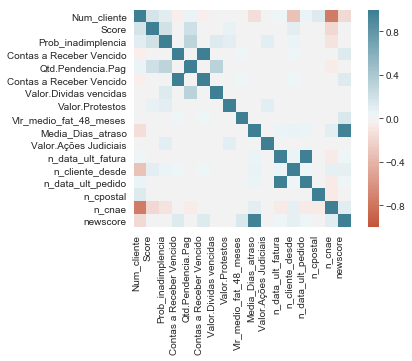

In [71]:
corr = df_score.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');

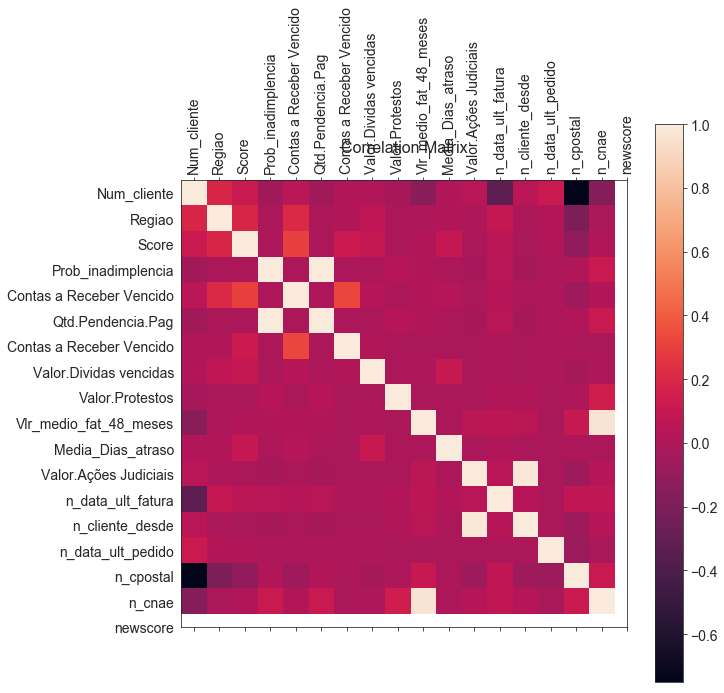

In [72]:
import matplotlib.pyplot as plt

df = df_score
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [73]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.title('Correlation Matrix', fontsize=16);
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [74]:
def plot_bar(countdata, label_title, label_x, label_y, label_color, y_limit):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import matplotlib.font_manager as fm
    import matplotlib.patches as mpatches

    # Formating Graphics
    title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
    label_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='normal', stretch='normal')
    ticks_font = fm.FontProperties(family='Arial', style='normal', size=12, weight='normal', stretch='normal')
    annotation_font = fm.FontProperties(family='Arial', style='normal', size=11, weight='normal', stretch='normal')

    # plot a histogram of the countries
    ax = countdata.plot(kind='bar', figsize=[9, 6], width=0.9, alpha=0.6,
            color=label_color, edgecolor='w', grid=False,  ylim=[0, y_limit])

    ax.set_xticks(range(len(countdata)))
    ax.set_xticklabels(countdata.index, rotation=90, rotation_mode='anchor', ha='right', fontproperties=ticks_font)

    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    ax.set_title(label_title, fontproperties=title_font)
    ax.set_xlabel(label_x, fontproperties=label_font)
    ax.set_ylabel(label_y, fontproperties=label_font)
    plt.show()
    return

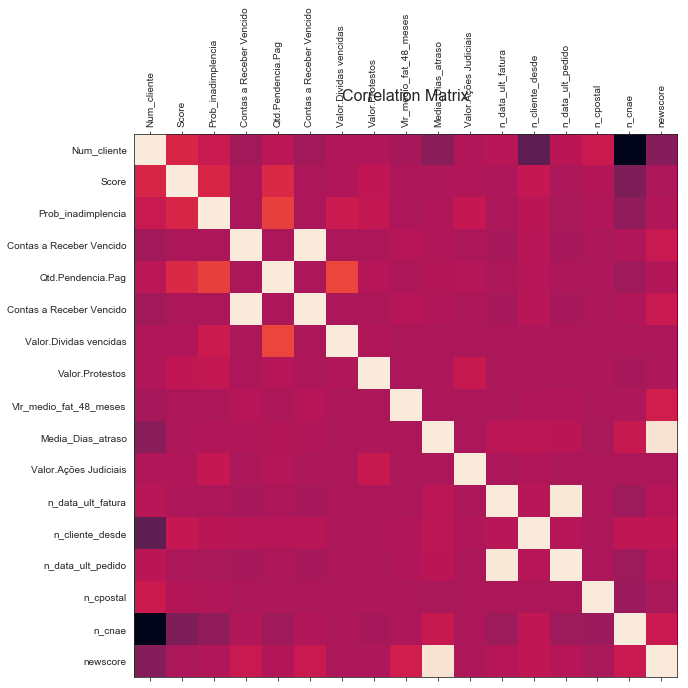

In [75]:
plot_corr(df_score)

In [76]:
# load the python packages
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

(array([3.4616e+04, 1.3080e+03, 5.3300e+02, 2.6000e+02, 1.5700e+02,
        1.1600e+02, 8.5000e+01, 4.7000e+01, 4.1000e+01, 2.1000e+01,
        1.8000e+01, 1.8000e+01, 1.6000e+01, 2.0000e+00, 6.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([  0. ,  33.3,  66.6,  99.9, 133.2, 166.5, 199.8, 233.1, 266.4,
        299.7, 333. , 366.3, 399.6, 432.9, 466.2, 499.5, 532.8, 566.1,
        599.4, 632.7, 666. , 699.3, 732.6, 765.9, 799.2, 832.5, 865.8,
        899.1, 932.4, 965.7, 999. ]),
 <a list of 30 Patch objects>)

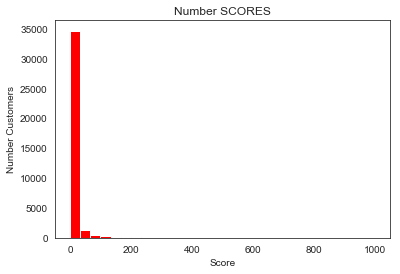

In [77]:
plt.title("Number SCORES")
plt.xlabel("Score")
plt.ylabel("Number Customers")
plt.hist(df_score.newscore, bins=30, align=('mid'), color=['red'], label=['A'])

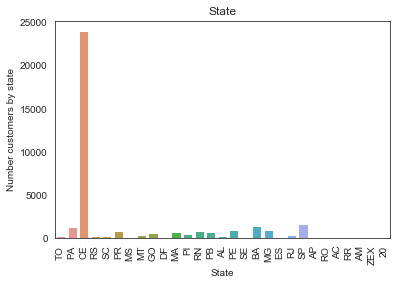

In [78]:
# Count categorial columns
ax=sns.countplot(df_score.Regiao)
ax.set_title('State')
ax.set_ylabel('Number customers by state')
ax.set_xlabel('State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center');

In [79]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37272 entries, 3 to 54331
Data columns (total 18 columns):
Num_cliente                 37272 non-null int64
Regiao                      37272 non-null object
Score                       37272 non-null int64
Prob_inadimplencia          37272 non-null float64
Contas a Receber Vencido    37272 non-null int32
Qtd.Pendencia.Pag           37272 non-null int64
Contas a Receber Vencido    37272 non-null int32
Valor.Dividas vencidas      37272 non-null int64
Valor.Protestos             37272 non-null int64
Vlr_medio_fat_48_meses      37272 non-null int32
Media_Dias_atraso           37272 non-null int64
Valor.Ações Judiciais       37272 non-null int64
n_data_ult_fatura           37272 non-null float64
n_cliente_desde             37272 non-null float64
n_data_ult_pedido           37272 non-null float64
n_cpostal                   37272 non-null float64
n_cnae                      37272 non-null float64
newscore                    37272 non-null fl

In [80]:
# Transform CNAE to Object
df_score['n_cnae'] = df_score['n_cnae'].astype(str)


In [81]:
# Count By regiao
countdata = df_score['Regiao'].value_counts()
countdata = countdata.head(30)  # First 30 registers
countdata.sort_values(ascending=False, inplace=True)  # Descending
countdata

CE     23988
SP      1691
BA      1403
PA      1279
PE      1028
MG      1027
RN       876
PR       826
PB       725
MA       703
GO       575
PI       526
RJ       397
MT       355
TO       305
RS       291
SC       269
AL       259
SE       173
DF       150
AM       105
RO        97
MS        89
ES        51
AP        40
AC        23
RR        16
ZEX        4
20         1
Name: Regiao, dtype: int64

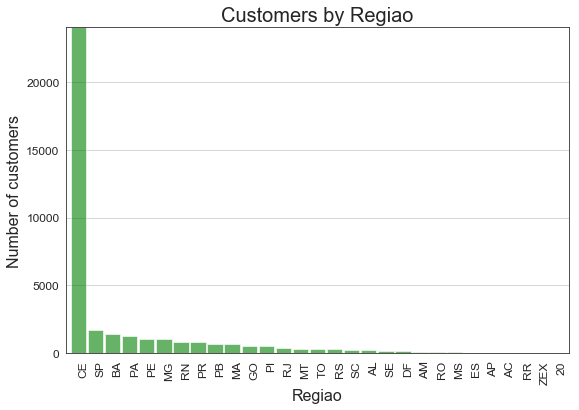

In [82]:
plot_bar(countdata, 'Customers by Regiao','Regiao', 'Number of customers', 'g', 24000)

In [83]:
# Count By CNAE
countdata = df_score['n_cnae'].value_counts()
countdata = countdata.head(30)  # First 30 registers
countdata.sort_values(ascending=False, inplace=True)  # Descending
countdata

0.0       12732
4744.0     5922
4120.0     2650
2512.0      664
4110.0      601
2330.0      501
2542.0      440
4731.0      417
2599.0      403
4672.0      384
2511.0      342
4679.0      334
3102.0      318
4712.0      312
4530.0      303
8112.0      268
9491.0      258
4930.0      238
6810.0      238
4711.0      235
4789.0      225
7112.0      216
4754.0      188
3101.0      184
4399.0      180
2539.0      162
4520.0      150
4685.0      148
5611.0      147
2532.0      139
Name: n_cnae, dtype: int64

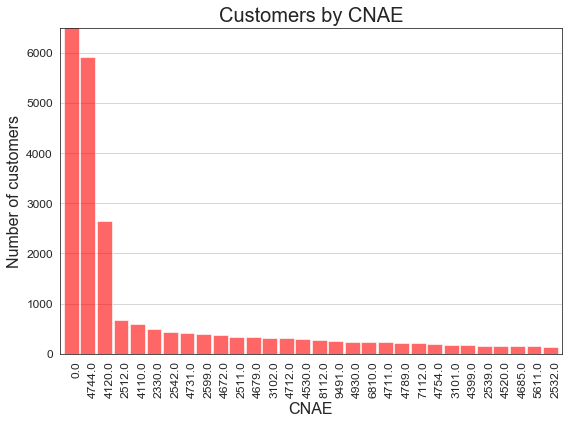

In [84]:
plot_bar(countdata, 'Customers by CNAE','CNAE', 'Number of customers', 'r', 6500)

In [85]:
# Count By Vendor
countdata = df_2['Vendedor'].value_counts()
countdata = countdata.head(30)  # First 30 registers
countdata.sort_values(ascending=False, inplace=True)  # Descending
countdata

JOÃO JOS    3302
FRANCISC    2838
EDNILTON    2348
LEANDRO     2329
CAROLINA    1658
ANDREIA     1568
LORNA PA    1359
MARCELO     1271
BRUNO       1236
AMANDA      1170
NAYANA R     787
JOSE IGO     662
THIAGO B     487
MARIA TE     472
ACERO        467
CCESAR       467
VANDI CE     464
IRANILCE     450
RAIMUNDO     444
JOSÉ BAT     437
NÁGELA F     409
CRISTOVA     401
CLARA        358
FERNANDO     334
JOAO BAT     320
JULIANE      315
JOSE VAL     300
VALESKA      297
MARIANA      289
HUGU'S F     287
Name: Vendedor, dtype: int64

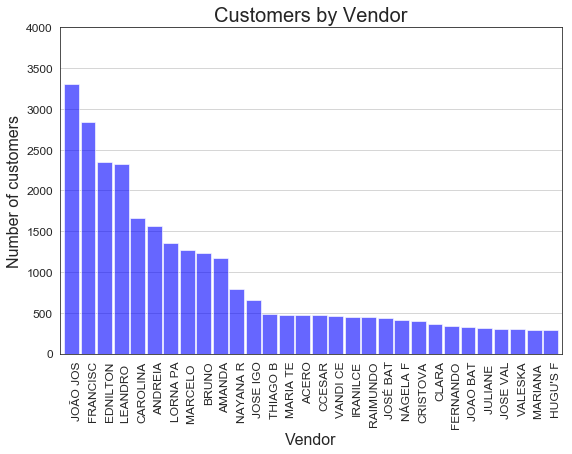

In [86]:
plot_bar(countdata, 'Customers by Vendor','Vendor', 'Number of customers', 'b', 4000)

In [87]:
# Count By Transport
countdata = df_2['Zona de transporte'].value_counts()
countdata = countdata.head(30)  # First 30 registers
countdata.sort_values(ascending=False, inplace=True)  # Descending
countdata

FO02    4155
FO06    3542
FO05    2925
FO01    2565
FO03    1980
FO00    1812
FO04    1658
CE04    1248
CE07     889
CE01     848
SP00     836
CE02     796
CE05     613
CE06     610
PA00     469
PE00     434
RN00     368
RJ00     351
CE03     343
PB00     323
MG00     322
GO00     311
RN02     281
PR03     280
PB01     270
PR02     261
BA02     249
PE02     248
PI00     245
BA00     244
Name: Zona de transporte, dtype: int64

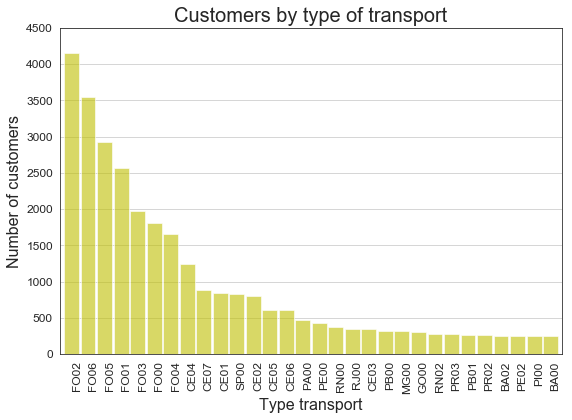

In [88]:
plot_bar(countdata, 'Customers by type of transport','Type transport', 'Number of customers', 'y', 4500)

In [89]:
# Transform CNAE to Numeric
df_score['n_cnae'] = df_score['n_cnae'].astype(float)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

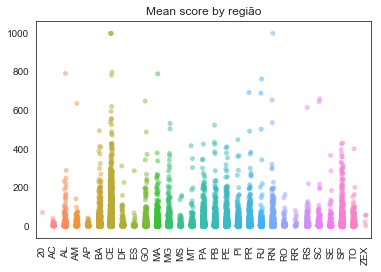

In [90]:
g=sns.stripplot(x = df_score.Regiao.values, y = df_score.newscore.values,
order = np.sort(df_score.Regiao.unique()),
jitter=0.1, alpha=0.5)
g.set_title('Mean score by região')
plt.xticks(rotation=90)

In [91]:
# Plot Mean Score by state Ordered
df1 = df_score.groupby('Regiao')['newscore'].mean()
df1 = df1.sort_values()
df1

Regiao
CE      6.480653
AC      7.733817
AP      8.507680
ES     11.934104
RO     13.059204
MT     13.551412
MS     13.595135
RS     14.084631
MG     14.330163
SP     15.408426
RN     16.508319
SC     16.522690
RJ     16.624137
DF     16.889009
PI     17.113927
PE     17.285476
BA     17.300612
SE     17.343597
TO     17.447783
PA     17.675800
PR     18.382510
GO     18.584576
MA     18.584614
PB     20.120731
RR     20.133744
AL     20.587513
AM     24.445860
ZEX    33.650325
20     71.099900
Name: newscore, dtype: float64

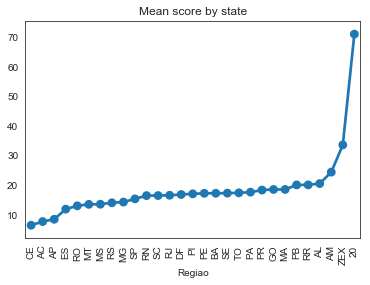

In [92]:
# Plot Mean Score by state Ordered
g = sns.pointplot(x = df1.index, y = df1.values, order = df1.index)
g.set_title('Mean score by state')
plt.xticks(rotation=90)
plt.show()

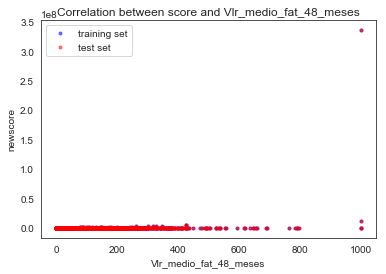

In [93]:
# Plot train Data Correlation between Score and Vlr_medio_fat_48_meses 
plt.plot(df_score.newscore,df_score.Vlr_medio_fat_48_meses,
'.', alpha=0.5, color=('blue'), label = 'training set')

# Plot test Data
plt.plot(df_score.newscore, df_score.Vlr_medio_fat_48_meses,
'.', alpha=0.5, color=('red'), label = 'test set')

plt.title("Correlation between score and Vlr_medio_fat_48_meses")
plt.ylabel("newscore")
plt.xlabel("Vlr_medio_fat_48_meses")
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002102FB60EB8>,
      dtype=object)

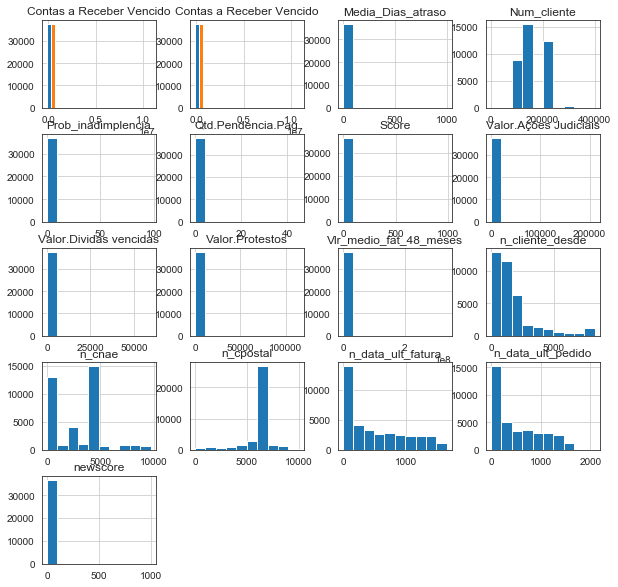

In [94]:
df_score.hist(figsize = (10,10))

In [95]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37272 entries, 3 to 54331
Data columns (total 18 columns):
Num_cliente                 37272 non-null int64
Regiao                      37272 non-null object
Score                       37272 non-null int64
Prob_inadimplencia          37272 non-null float64
Contas a Receber Vencido    37272 non-null int32
Qtd.Pendencia.Pag           37272 non-null int64
Contas a Receber Vencido    37272 non-null int32
Valor.Dividas vencidas      37272 non-null int64
Valor.Protestos             37272 non-null int64
Vlr_medio_fat_48_meses      37272 non-null int32
Media_Dias_atraso           37272 non-null int64
Valor.Ações Judiciais       37272 non-null int64
n_data_ult_fatura           37272 non-null float64
n_cliente_desde             37272 non-null float64
n_data_ult_pedido           37272 non-null float64
n_cpostal                   37272 non-null float64
n_cnae                      37272 non-null float64
newscore                    37272 non-null fl

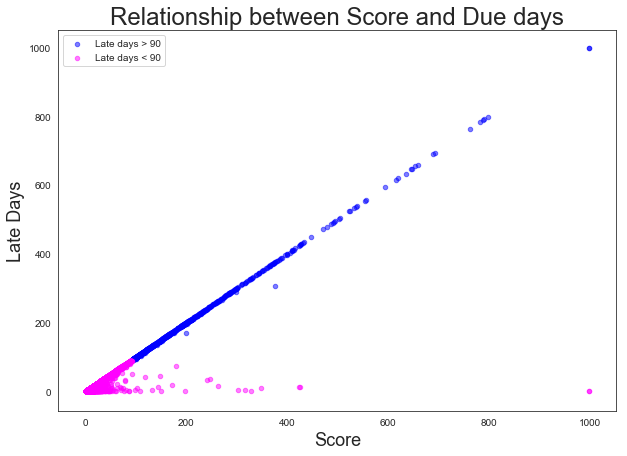

In [96]:
ax1= df_score[df_score['Media_Dias_atraso'] > 90].plot(kind='scatter', x='newscore',y='Media_Dias_atraso', color='blue',alpha=0.5, figsize=(10,7))

df_score[df_score['Media_Dias_atraso'] <= 90].plot(kind='scatter', x='newscore',y='Media_Dias_atraso', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)

plt.legend(labels=['Late days > 90','Late days < 90'])
plt.title('Relationship between Score and Due days', size=24)
plt.xlabel('Score', size=18)
plt.ylabel('Late Days', size=18);

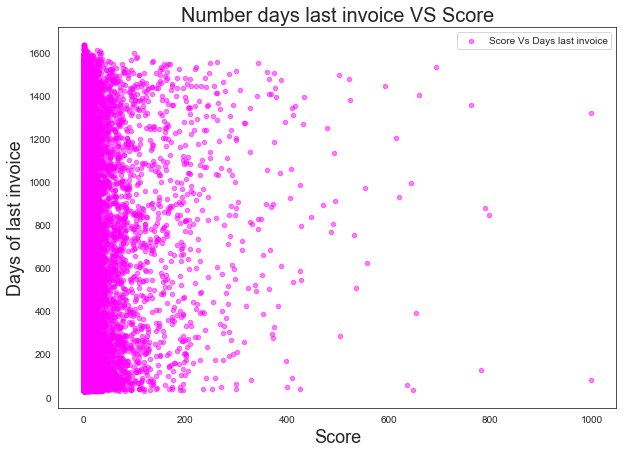

In [97]:
# Scatter plot of 500 registers

sample_df = df_score[df_score['n_data_ult_fatura'] > 30]  #.sample(500)
sample_df.plot(kind='scatter', x='newscore',y='n_data_ult_fatura', color='magenta',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Score Vs Days last invoice'])
plt.title('Number days last invoice VS Score', size=20)
plt.xlabel('Score', size=18)
plt.ylabel('Days of last invoice', size=18);

## Transforming

In [98]:
# Verify all distinct values for a column  
df_score["Regiao"].value_counts()

CE     23988
SP      1691
BA      1403
PA      1279
PE      1028
MG      1027
RN       876
PR       826
PB       725
MA       703
GO       575
PI       526
RJ       397
MT       355
TO       305
RS       291
SC       269
AL       259
SE       173
DF       150
AM       105
RO        97
MS        89
ES        51
AP        40
AC        23
RR        16
ZEX        4
20         1
Name: Regiao, dtype: int64

In [99]:
# Create a List whith Values
target_names = df_score["Regiao"].unique()
target_names

array(['TO', 'PA', 'CE', 'RS', 'SC', 'PR', 'MS', 'MT', 'GO', 'DF', 'MA',
       'PI', 'RN', 'PB', 'AL', 'PE', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP',
       'AP', 'RO', 'AC', 'RR', 'AM', 'ZEX', '20'], dtype=object)

In [100]:
# Create a dictionary whith Values and index
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'TO': 0,
 'PA': 1,
 'CE': 2,
 'RS': 3,
 'SC': 4,
 'PR': 5,
 'MS': 6,
 'MT': 7,
 'GO': 8,
 'DF': 9,
 'MA': 10,
 'PI': 11,
 'RN': 12,
 'PB': 13,
 'AL': 14,
 'PE': 15,
 'SE': 16,
 'BA': 17,
 'MG': 18,
 'ES': 19,
 'RJ': 20,
 'SP': 21,
 'AP': 22,
 'RO': 23,
 'AC': 24,
 'RR': 25,
 'AM': 26,
 'ZEX': 27,
 '20': 28}

In [101]:
# Convert to numbers - Regiao
df_score.Regiao = df_score.Regiao.replace(target_dict)

df_score.Regiao.head()

3     0
4     1
7     2
8     2
10    2
Name: Regiao, dtype: int64

In [102]:
#df_score['CNPJ'] = df_score['CNPJ'].astype(float)
df_score.dtypes

Num_cliente                   int64
Regiao                        int64
Score                         int64
Prob_inadimplencia          float64
Contas a Receber Vencido      int32
Qtd.Pendencia.Pag             int64
Contas a Receber Vencido      int32
Valor.Dividas vencidas        int64
Valor.Protestos               int64
Vlr_medio_fat_48_meses        int32
Media_Dias_atraso             int64
Valor.Ações Judiciais         int64
n_data_ult_fatura           float64
n_cliente_desde             float64
n_data_ult_pedido           float64
n_cpostal                   float64
n_cnae                      float64
newscore                    float64
dtype: object

# MODELING Keras


## Multiple Regression
Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

#### DOC:

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
https://www.w3schools.com/python/python_ml_multiple_regression.asp
https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

In [103]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [104]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37272 entries, 3 to 54331
Data columns (total 18 columns):
Num_cliente                 37272 non-null int64
Regiao                      37272 non-null int64
Score                       37272 non-null int64
Prob_inadimplencia          37272 non-null float64
Contas a Receber Vencido    37272 non-null int32
Qtd.Pendencia.Pag           37272 non-null int64
Contas a Receber Vencido    37272 non-null int32
Valor.Dividas vencidas      37272 non-null int64
Valor.Protestos             37272 non-null int64
Vlr_medio_fat_48_meses      37272 non-null int32
Media_Dias_atraso           37272 non-null int64
Valor.Ações Judiciais       37272 non-null int64
n_data_ult_fatura           37272 non-null float64
n_cliente_desde             37272 non-null float64
n_data_ult_pedido           37272 non-null float64
n_cpostal                   37272 non-null float64
n_cnae                      37272 non-null float64
newscore                    37272 non-null flo

In [105]:
df_score.shape

(37272, 18)

In [106]:
df_score.describe()

Num_cliente        Regiao         Score  Prob_inadimplencia  \
count   37272.000000  37272.000000  37272.000000        37272.000000   
mean   155399.394103      5.702833     18.755554            0.634796   
std     44474.440738      6.388012    116.342919            6.472508   
min      1104.000000      0.000000      0.000000            0.000000   
25%    121941.750000      2.000000      0.000000            0.000000   
50%    135437.000000      2.000000      0.000000            0.000000   
75%    209051.500000      8.000000      0.000000            0.000000   
max    400007.000000     28.000000    984.000000           97.000000   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
count              3.727200e+04       37272.000000              3.727200e+04   
mean               3.502848e+03           0.026535              3.502848e+03   
std                9.212468e+04           0.519656              9.212468e+04   
min               -2.621660e+05           0.000000             -2.621660e+05   
25%                0.000000e+00           0.000000              0.000000e+00   
50%                0.000000e+00           0.000000              0.000000e+00   
75%                0.000000e+00           0.000000              0.000000e+00   
max                1.090323e+07          45.000000              1.090323e+07   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
count            37272.000000     37272.000000            3.727200e+04   
mean                 4.716651        13.227248            1.577436e+04   
std                458.857981       788.755194            1.740376e+06   
min                  0.000000         0.000000            0.000000e+00   
25%                  0.000000         0.000000            3.000000e+01   
50%                  0.000000         0.000000            2.750000e+02   
75%                  0.000000         0.000000            1.942000e+03   
max              59540.000000    113978.000000            3.355965e+08   

       Media_Dias_atraso  Valor.Ações Judiciais  n_data_ult_fatura  \
count       37272.000000           37272.000000       37272.000000   
mean            9.515964              10.287106         510.458602   
std            35.606786            1182.727521         486.851381   
min             0.000000               0.000000           0.000000   
25%             0.000000               0.000000          58.000000   
50%             1.000000               0.000000         355.000000   
75%             3.000000               0.000000         899.000000   
max           999.000000          210199.000000        1635.000000   

       n_cliente_desde  n_data_ult_pedido     n_cpostal        n_cnae  \
count     37272.000000       37272.000000  37272.000000  37272.000000   
mean       1732.612310         503.341838   5896.316994   2881.354583   
std        1789.897111         483.112295   1398.648325   2478.019569   
min           0.000000           0.000000      0.000000      0.000000   
25%         565.000000          55.000000   6006.000000      0.000000   
50%        1235.000000         347.000000   6074.000000   3102.000000   
75%        2021.000000         881.000000   6274.000000   4744.000000   
max        8226.000000        2088.000000   9995.000000   9700.000000   

           newscore  
count  37272.000000  
mean      10.214249  
std       36.838701  
min        0.000000  
25%        0.004900  
50%        1.047500  
75%        4.142925  
max      999.000000

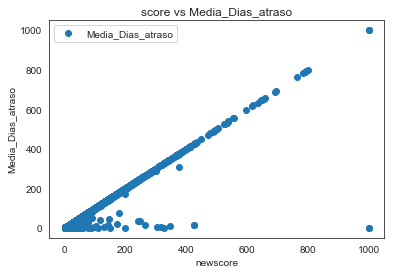

In [107]:
df_score.plot(x='newscore', y='Media_Dias_atraso', style='o')  
plt.title('score vs Media_Dias_atraso')  
plt.xlabel('newscore')  
plt.ylabel('Media_Dias_atraso')  
plt.show()

C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


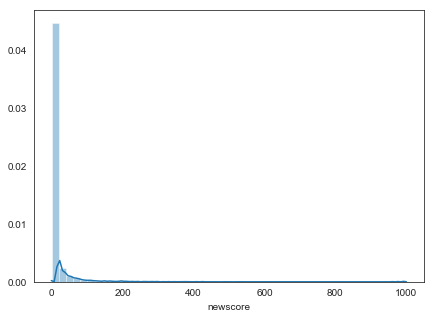

In [108]:
# Let's check the average value of the “newscore” column.
plt.figure(figsize=(7,5))
plt.tight_layout()
seabornInstance.distplot(df_score['newscore'])

In [109]:
# Delete column
#df_score.drop('CNPJ', axis=1, inplace=True)

In [110]:
from sklearn.model_selection import train_test_split
df_model = df_score

In [111]:
# Create X and Y
X = df_model.drop('newscore', axis = 1)   # X  For Train
y = df_model['newscore']                  # y  For TEST

In [112]:
# X have all values to use in multiple regression (delete column tha we predict (newscore in tha case))
X.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104       0      0                 0.0                       128   
4          3101       1      0                 0.0                    176487   
7          3201       2      0                 0.0                   7509041   
8          3203       2      0                 0.0                    114978   
10         4101       2      0                 0.0                     55144   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   

    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
3                       0              108.0              0.0   
4                       0                1.0           5165.0   
7                       0                1.0           8081.0   
8                       0                4.0           4192.0   
10                      0                3.0           8083.0   

    n_data_ult_pedido  n_cpostal  n_cnae  
3              1781.0     7795.0   210.0  
4                 0.0     6850.0  2423.0  
7               101.0     6161.0  2431.0  
8                 0.0     6161.0  2431.0  
10             1850.0     6004.0  4672.0

In [113]:
# y have the value to predict
y.head()

3      11.5108
4     347.0028
7     999.0000
8     262.7217
10     36.1605
Name: newscore, dtype: float64

In [116]:
# Create data Train and Data Test
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20,random_state=0)

print('TRAIN dataset has {} records and TEST has {} records.'.format(X_train.shape[0], X_test.shape[0]))

TRAIN dataset has 29817 records and TEST has 7455 records.


In [117]:
# # Let us clean our data little bit, So first check which are the columns the contains NaN values in it :
df_score.isnull().any()

Num_cliente                 False
Regiao                      False
Score                       False
Prob_inadimplencia          False
Contas a Receber Vencido    False
Qtd.Pendencia.Pag           False
Contas a Receber Vencido    False
Valor.Dividas vencidas      False
Valor.Protestos             False
Vlr_medio_fat_48_meses      False
Media_Dias_atraso           False
Valor.Ações Judiciais       False
n_data_ult_fatura           False
n_cliente_desde             False
n_data_ult_pedido           False
n_cpostal                   False
n_cnae                      False
newscore                    False
dtype: bool

In [118]:
#A good clean way to count all NaN's in all columns of your dataframe would be ...

print(df_score.isna().sum().sum())

0


In [119]:
df_score.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  Contas a Receber Vencido  \
3          1104       0      0                 0.0                       128   
4          3101       1      0                 0.0                    176487   
7          3201       2      0                 0.0                   7509041   
8          3203       2      0                 0.0                    114978   
10         4101       2      0                 0.0                     55144   

    Qtd.Pendencia.Pag  Contas a Receber Vencido  Valor.Dividas vencidas  \
3                   0                       128                       0   
4                   0                    176487                       0   
7                   0                   7509041                       0   
8                   0                    114978                       0   
10                  0                     55144                       0   

    Valor.Protestos  Vlr_medio_fat_48_meses  Media_Dias_atraso  \
3                 0                    5108                 11   
4                 0                 3370028                 10   
7                 0                12019240                  2   
8                 0                 2457217                 17   
10                0                    1605                 36   

    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
3                       0              108.0              0.0   
4                       0                1.0           5165.0   
7                       0                1.0           8081.0   
8                       0                4.0           4192.0   
10                      0                3.0           8083.0   

    n_data_ult_pedido  n_cpostal  n_cnae  newscore  
3              1781.0     7795.0   210.0   11.5108  
4                 0.0     6850.0  2423.0  347.0028  
7               101.0     6161.0  2431.0  999.0000  
8                 0.0     6161.0  2431.0  262.7217  
10             1850.0     6004.0  4672.0   36.1605

In [120]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
# the linear regression model basically finds the best value for the intercept and slope, 
# which results in a line that best fits the data.
# To retrieve the intercept:

print('Intercept:',model.intercept_)

# For retrieving the slope:
print('Slope:',model.coef_)

Intercept: -0.012601834528620515
Slope: [-6.21214290e-07  1.04279633e-02 -3.85284586e-05 -2.61878630e-04
 -3.55716612e-07 -5.19836253e-04 -3.55716612e-07 -7.00810262e-09
  1.32009113e-07  8.95666174e-05  9.99889224e-01 -5.60069795e-07
 -4.17259490e-04  2.43697892e-05  3.34362669e-04  2.28410232e-05
 -5.19730333e-06]


In [123]:
# the case of multivariable linear regression, the regression model has to find the most 
# optimal coefficients for all the attributes. To see what coefficients our regression 
# model has chosen, execute the following script:

# This means that for a unit increase in “Media_Dias_atraso	”, there is a incrase of 9.99 units in the score.
    
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
Num_cliente              -6.212143e-07
Regiao                    1.042796e-02
Score                    -3.852846e-05
Prob_inadimplencia       -2.618786e-04
Contas a Receber Vencido -3.557166e-07
Qtd.Pendencia.Pag        -5.198363e-04
Contas a Receber Vencido -3.557166e-07
Valor.Dividas vencidas   -7.008103e-09
Valor.Protestos           1.320091e-07
Vlr_medio_fat_48_meses    8.956662e-05
Media_Dias_atraso         9.998892e-01
Valor.Ações Judiciais    -5.600698e-07
n_data_ult_fatura        -4.172595e-04
n_cliente_desde           2.436979e-05
n_data_ult_pedido         3.343627e-04
n_cpostal                 2.284102e-05
n_cnae                   -5.197303e-06

In [124]:
# do some predictions. To do so, we will use our test data and see 
# how accurately our algorithm predicts the percentage score. 

y_pred = model.predict(X_test)

In [125]:
X_test.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  \
22479       124769       2      0                 0.0   
11557       111722      12      0                 0.0   
45870       210578       2      0                 0.0   
51224       216596       2      0                 0.0   
51782       217218       2      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
22479                         0                  0                         0   
11557                         0                  0                         0   
45870                         0                  0                         0   
51224                         0                  0                         0   
51782                         0                  0                         0   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
22479                       0                0                      32   
11557                       0                0                    4472   
45870                       0                0                     135   
51224                       0                0                      89   
51782                       0                0                       3   

       Media_Dias_atraso  Valor.Ações Judiciais  n_data_ult_fatura  \
22479                  0                      0             1440.0   
11557                  1                      0               95.0   
45870                  3                      0             1375.0   
51224                  1                      0              321.0   
51782                  0                      0              262.0   

       n_cliente_desde  n_data_ult_pedido  n_cpostal  n_cnae  
22479           1446.0             1446.0     6193.0  9313.0  
11557           5850.0              101.0     5961.0  3102.0  
45870           1385.0             1385.0     6268.0     0.0  
51224            345.0              345.0     6193.0     0.0  
51782            262.0              262.0     6076.0     0.0

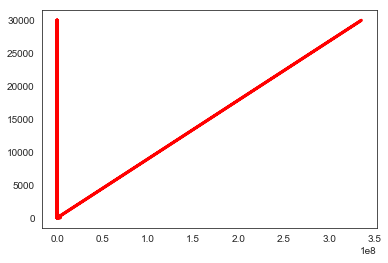

In [126]:
# Plot outputs
plt.plot(X_test, model.predict(X_test), color='red',linewidth=3)

In [127]:
y_train.head()

13527    10.1715
40436     0.0033
27566     0.0016
2670      1.5553
47725     1.0032
Name: newscore, dtype: float64

In [128]:
y_test.head()

22479    0.0032
11557    1.4472
45870    3.0135
51224    1.0089
51782    0.0003
Name: newscore, dtype: float64

In [129]:
# Ravel command creates a list with all values
y_test.ravel()

array([3.20000e-03, 1.44720e+00, 3.01350e+00, ..., 3.11380e+00,
       8.70000e-03, 1.31446e+01])

In [130]:
# Now compare the actual output values for X_test with the predicted values
# Check the difference between the actual value and predicted value.

df_pred = pd.DataFrame({'Index': y_test.index, 'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})
df_pred.head()

Index  Actual  Predicted
0  22479  0.0032  -0.055463
1  11557  1.4472   1.700289
2  45870  3.0135   2.955479
3  51224  1.0089   1.012839
4  51782  0.0003  -0.002968

In [131]:
# Transform column Index in the index of the table
df_pred.set_index('Index', inplace=True)
df_pred.head()

Actual  Predicted
Index                   
22479  0.0032  -0.055463
11557  1.4472   1.700289
45870  3.0135   2.955479
51224  1.0089   1.012839
51782  0.0003  -0.002968

In [132]:
X_test.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  \
22479       124769       2      0                 0.0   
11557       111722      12      0                 0.0   
45870       210578       2      0                 0.0   
51224       216596       2      0                 0.0   
51782       217218       2      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
22479                         0                  0                         0   
11557                         0                  0                         0   
45870                         0                  0                         0   
51224                         0                  0                         0   
51782                         0                  0                         0   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
22479                       0                0                      32   
11557                       0                0                    4472   
45870                       0                0                     135   
51224                       0                0                      89   
51782                       0                0                       3   

       Media_Dias_atraso  Valor.Ações Judiciais  n_data_ult_fatura  \
22479                  0                      0             1440.0   
11557                  1                      0               95.0   
45870                  3                      0             1375.0   
51224                  1                      0              321.0   
51782                  0                      0              262.0   

       n_cliente_desde  n_data_ult_pedido  n_cpostal  n_cnae  
22479           1446.0             1446.0     6193.0  9313.0  
11557           5850.0              101.0     5961.0  3102.0  
45870           1385.0             1385.0     6268.0     0.0  
51224            345.0              345.0     6193.0     0.0  
51782            262.0              262.0     6076.0     0.0

In [133]:
#a.set_index('Index', inplace=True)

In [134]:
import pandas as pd
# Test to concatenate
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

a = X_test.head(20) 
b = df_pred.head(20) 

# Transform index in a column
a['index1'] = a.index
b['index1'] = b.index
cols_ = a.columns

# Concatenate 2 dataframes
frames = [a , b]
result = pd.concat(frames, axis=1, sort=False)

result.head()

C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Num_cliente  Regiao  Score  Prob_inadimplencia  \
Index                                                   
22479       124769       2      0                 0.0   
11557       111722      12      0                 0.0   
45870       210578       2      0                 0.0   
51224       216596       2      0                 0.0   
51782       217218       2      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
Index                                                                          
22479                         0                  0                         0   
11557                         0                  0                         0   
45870                         0                  0                         0   
51224                         0                  0                         0   
51782                         0                  0                         0   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
Index                                                                    
22479                       0                0                      32   
11557                       0                0                    4472   
45870                       0                0                     135   
51224                       0                0                      89   
51782                       0                0                       3   

        ...    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
Index   ...                                                                
22479   ...                        0             1440.0           1446.0   
11557   ...                        0               95.0           5850.0   
45870   ...                        0             1375.0           1385.0   
51224   ...                        0              321.0            345.0   
51782   ...                        0              262.0            262.0   

       n_data_ult_pedido  n_cpostal  n_cnae  index1  Actual  Predicted  index1  
Index                                                                           
22479             1446.0     6193.0  9313.0   22479  0.0032  -0.055463   22479  
11557              101.0     5961.0  3102.0   11557  1.4472   1.700289   11557  
45870             1385.0     6268.0     0.0   45870  3.0135   2.955479   45870  
51224              345.0     6193.0     0.0   51224  1.0089   1.012839   51224  
51782              262.0     6076.0     0.0   51782  0.0003  -0.002968   51782  

[5 rows x 21 columns]

In [135]:
# Concatenate Train data Frame and Test data frame to plot 
a = X_test 
b = df_pred 

# Transform index in a column
a['index1'] = a.index
b['index1'] = b.index
cols_ = a.columns

# Concatenate 2 dataframes
frames = [a , b]
result_join = pd.concat(frames, axis=1, sort=False)

result_join.head()

C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Num_cliente  Regiao  Score  Prob_inadimplencia  \
Index                                                   
22479       124769       2      0                 0.0   
11557       111722      12      0                 0.0   
45870       210578       2      0                 0.0   
51224       216596       2      0                 0.0   
51782       217218       2      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
Index                                                                          
22479                         0                  0                         0   
11557                         0                  0                         0   
45870                         0                  0                         0   
51224                         0                  0                         0   
51782                         0                  0                         0   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
Index                                                                    
22479                       0                0                      32   
11557                       0                0                    4472   
45870                       0                0                     135   
51224                       0                0                      89   
51782                       0                0                       3   

        ...    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
Index   ...                                                                
22479   ...                        0             1440.0           1446.0   
11557   ...                        0               95.0           5850.0   
45870   ...                        0             1375.0           1385.0   
51224   ...                        0              321.0            345.0   
51782   ...                        0              262.0            262.0   

       n_data_ult_pedido  n_cpostal  n_cnae  index1  Actual  Predicted  index1  
Index                                                                           
22479             1446.0     6193.0  9313.0   22479  0.0032  -0.055463   22479  
11557              101.0     5961.0  3102.0   11557  1.4472   1.700289   11557  
45870             1385.0     6268.0     0.0   45870  3.0135   2.955479   45870  
51224              345.0     6193.0     0.0   51224  1.0089   1.012839   51224  
51782              262.0     6076.0     0.0   51782  0.0003  -0.002968   51782  

[5 rows x 21 columns]

In [136]:
# Sort pandas data frame
result_join.sort_values(by=['Predicted'], ascending=False, inplace=True)

# Filter many columns
result_join_x = result_join[(result_join.Predicted < 1000 ) & (result_join.Predicted > 1 )]
result_join_x.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  \
Index                                                   
20483       122015      20      0                 0.0   
23560       126138      12      0                 0.0   
29739       134770       2      0                 0.0   
22618       124949       2      0                 0.0   
21526       123480      17      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
Index                                                                          
20483                         0                  0                         0   
23560                         0                  0                         0   
29739                         0                  0                         0   
22618                         0                  0                         0   
21526                      7959                  0                      7959   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
Index                                                                    
20483                       0                0                    3436   
23560                       0                0                     203   
29739                       0                0                     248   
22618                       0                0                     306   
21526                       0                0                    2345   

        ...    Valor.Ações Judiciais  n_data_ult_fatura  n_cliente_desde  \
Index   ...                                                                
20483   ...                        0             1356.0           1643.0   
23560   ...                        0              389.0           1329.0   
29739   ...                        0              620.0            634.0   
22618   ...                        0             1380.0           1433.0   
21526   ...                        0              910.0           1585.0   

       n_data_ult_pedido  n_cpostal  n_cnae  index1    Actual   Predicted  \
Index                                                                       
20483             1531.0     2652.0  4744.0   20483  762.3436  762.365563   
23560              389.0     5936.0  4744.0   23560  654.0203  654.090979   
29739              626.0     6032.0  4120.0   29739  557.0248  556.967468   
22618             1390.0     6276.0  4744.0   22618  525.0306  524.942446   
21526              918.0     4507.0  4744.0   21526  494.2345  494.281768   

       index1  
Index          
20483   20483  
23560   23560  
29739   29739  
22618   22618  
21526   21526  

[5 rows x 21 columns]

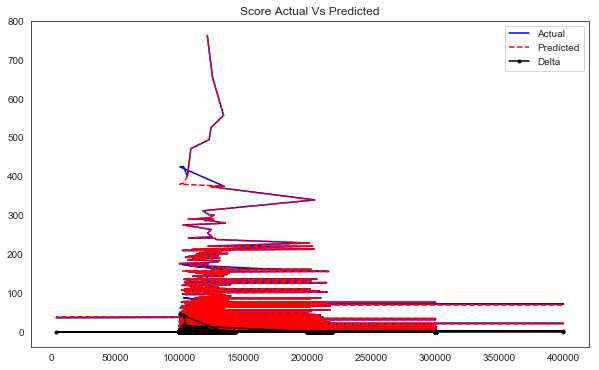

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
line1, = plt.plot(result_join_x.Num_cliente, result_join_x.Actual, 'b-', label='Actual')
line2, = plt.plot(result_join_x.Num_cliente, result_join_x.Predicted, 'r--', label='Predicted')
line3, = plt.plot(result_join_x.Num_cliente, result_join_x.Actual - result_join_x.Predicted, 'k.-', label='Delta')

plt.title('Score Actual Vs Predicted')
plt.legend(loc='upper right')

In [138]:
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (y_test[0:1], y_pred[0:1]))

X=22479    0.0032
Name: newscore, dtype: float64, Predicted=[-0.05546262]


In [139]:
df1 = df_pred[['Actual','Predicted']]
df1.head()

Actual  Predicted
Index                   
22479  0.0032  -0.055463
11557  1.4472   1.700289
45870  3.0135   2.955479
51224  1.0089   1.012839
51782  0.0003  -0.002968

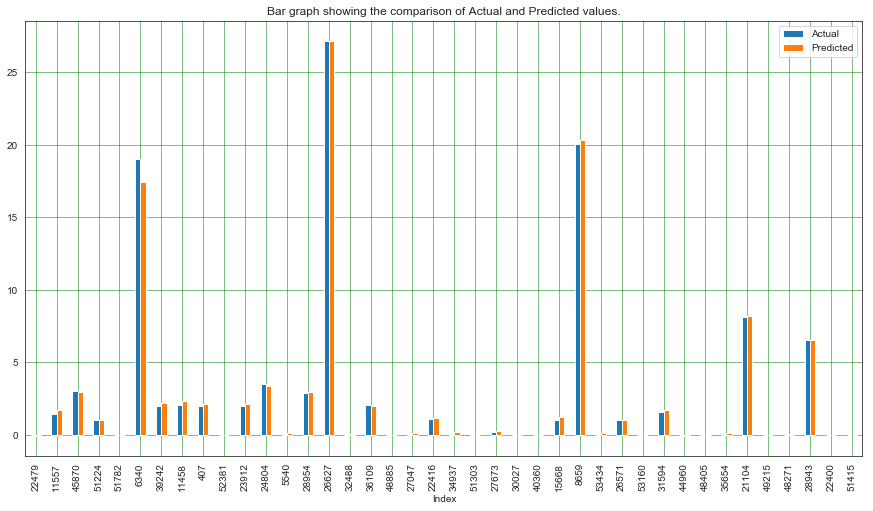

In [140]:
# visualize comparison result as a bar graph
df1 = df1.head(40)
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Bar graph showing the comparison of Actual and Predicted values.')
plt.show()

In [141]:
# Let’s find the values for these metrics using our test data.
# The final step is to evaluate the performance of the algorithm. 
# We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:
    
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.006898833765566
Mean Squared Error: 113292.94829549553
Root Mean Squared Error: 336.59017854877396


There are many factors that may have contributed to this inaccuracy, for example :
>> Need more data: We need to have a huge amount of data to get the best possible prediction.

>> Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

>> Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.
    

In [142]:
# Analyse scores
from sklearn.model_selection import cross_val_score

In [143]:
scores = cross_val_score(model, X, y, cv=5, scoring = 'neg_mean_squared_error')
scores = np.sqrt(abs(scores))
print("CV score: ", scores.mean())

CV score:  77.06159008121399


In [144]:
# Compute the errors made by our model both as values and as percentages
# of the true score:
#EXEC_errors = np.exp(y_test) - np.exp(y_test_predicted)

EXEC_errors = y_test - y_pred
percent_errors = EXEC_errors/np.exp(y_test) * 100

Text(0.5, 0, '# Error in Score')

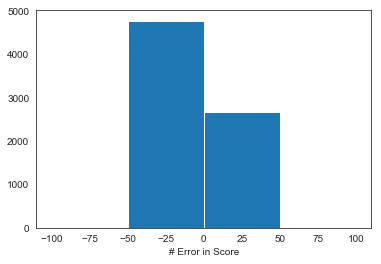

In [145]:
# Plot results
plt.hist(EXEC_errors, bins = np.linspace(-100, 100, 5))
plt.xlabel('# Error in Score')

Text(0.5, 0, '% error in score')

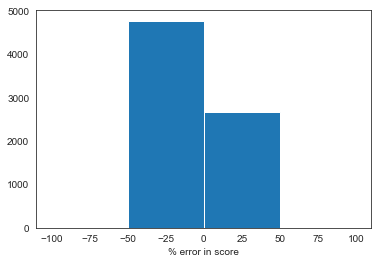

In [146]:
# Plot results
plt.hist(percent_errors, bins = np.linspace(-100,100,5))
plt.xlabel('% error in score')

In [147]:
X_test.head()

Num_cliente  Regiao  Score  Prob_inadimplencia  \
22479       124769       2      0                 0.0   
11557       111722      12      0                 0.0   
45870       210578       2      0                 0.0   
51224       216596       2      0                 0.0   
51782       217218       2      0                 0.0   

       Contas a Receber Vencido  Qtd.Pendencia.Pag  Contas a Receber Vencido  \
22479                         0                  0                         0   
11557                         0                  0                         0   
45870                         0                  0                         0   
51224                         0                  0                         0   
51782                         0                  0                         0   

       Valor.Dividas vencidas  Valor.Protestos  Vlr_medio_fat_48_meses  \
22479                       0                0                      32   
11557                       0                0                    4472   
45870                       0                0                     135   
51224                       0                0                      89   
51782                       0                0                       3   

       Media_Dias_atraso  Valor.Ações Judiciais  n_data_ult_fatura  \
22479                  0                      0             1440.0   
11557                  1                      0               95.0   
45870                  3                      0             1375.0   
51224                  1                      0              321.0   
51782                  0                      0              262.0   

       n_cliente_desde  n_data_ult_pedido  n_cpostal  n_cnae  index1  
22479           1446.0             1446.0     6193.0  9313.0   22479  
11557           5850.0              101.0     5961.0  3102.0   11557  
45870           1385.0             1385.0     6268.0     0.0   45870  
51224            345.0              345.0     6193.0     0.0   51224  
51782            262.0              262.0     6076.0     0.0   51782

In [148]:
# Predict and example:
# The same input values than X_test

def predict_score(p_Num_cliente, p_Regiao, p_Score, p_Prob_inadimplencia,
                  p_Contas_a_Receber_Vencido, p_Qtd_Pendencia_Pag, p_Contas_a_Receber_Vencido2,
                  p_Valor_Dividas_vencidas, p_Valor_Protestos, p_Vlr_medio_fat_48_meses,  
                  p_Media_Dias_atraso, p_Valor_Açoes_Judiciais, 
                  p_n_data_ult_fatura, p_n_cliente_desde, p_n_data_ult_pedido, p_n_cpostal, p_n_cnae):

    predicted_example = model.predict([[p_Num_cliente, p_Regiao, p_Score, p_Prob_inadimplencia,
                                        p_Contas_a_Receber_Vencido, p_Qtd_Pendencia_Pag, p_Contas_a_Receber_Vencido2,
                                        p_Valor_Dividas_vencidas, p_Valor_Protestos, p_Vlr_medio_fat_48_meses,  
                                        p_Media_Dias_atraso, p_Valor_Açoes_Judiciais, 
                                        p_n_data_ult_fatura, p_n_cliente_desde, p_n_data_ult_pedido, p_n_cpostal, p_n_cnae]])
    return predicted_example

In [149]:
p_Num_cliente = 3101
p_Regiao = 2
p_Score = 0
p_Prob_inadimplencia = 10
p_Contas_a_Receber_Vencido = 1000
p_Qtd_Pendencia_Pag = 10
p_Contas_a_Receber_Vencido2 = 1000
p_Valor_Dividas_vencidas = 0
p_Valor_Protestos = 0
p_Vlr_medio_fat_48_meses = 5000
p_Media_Dias_atraso = 30
p_Valor_Açoes_Judiciais = 0
p_n_data_ult_fatura = 300
p_n_cliente_desde = 500
p_n_data_ult_pedido = 30
p_n_cpostal = 1446
p_n_cnae = 6193

predicted_example = predict_score(p_Num_cliente, p_Regiao, p_Score, p_Prob_inadimplencia,
                                        p_Contas_a_Receber_Vencido, p_Qtd_Pendencia_Pag, p_Contas_a_Receber_Vencido2,
                                        p_Valor_Dividas_vencidas, p_Valor_Protestos, p_Vlr_medio_fat_48_meses,  
                                        p_Media_Dias_atraso, p_Valor_Açoes_Judiciais, 
                                        p_n_data_ult_fatura, p_n_cliente_desde, p_n_data_ult_pedido, p_n_cpostal, p_n_cnae)


print('Score Predicted:', predicted_example)

Score Predicted: [30.34018809]


In [371]:
#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.show()

In [ ]:
# First Save the Model
joblib.dump(regressor, "regressor.sav")

In [312]:
pd.DataFrame(X_train.columns).to_csv("feature_list.csv", index = None)

In [313]:
pd.DataFrame(X_train.dtypes).reset_index().to_csv("data_types.csv", index = None)

In [363]:
# Write pandas data frame to excel
from pandas import ExcelWriter

writer = ExcelWriter('PythonExport.xlsx')
result_join.to_excel(writer,'Sheet1')
writer.save()

In [154]:
# https://www.datacamp.com/community/tutorials/gui-tkinter-python
# https://www.geeksforgeeks.org/python-gui-tkinter/
# https://likegeeks.com/python-gui-examples-tkinter-tutorial/

from tkinter import *
from tkinter import messagebox

def data_score():
    message = " Cliente: "+  e0.get()
    p_Num_cliente = float(e0.get())
    p_Regiao = float(e1.get())
    p_Score = float(e2.get())
    p_Prob_inadimplencia = float(e3.get())
    p_Contas_a_Receber_Vencido = float(e4.get())
    p_Qtd_Pendencia_Pag = float(e5.get())
    p_Contas_a_Receber_Vencido2 = float(e4.get())
    p_Valor_Dividas_vencidas = float(e6.get())
    p_Valor_Protestos = float(e7.get())
    p_Vlr_medio_fat_48_meses = float(e8.get())
    p_Media_Dias_atraso = float(e9.get())
    p_Valor_Açoes_Judiciais = float(e10.get())
    p_n_data_ult_fatura = float(e11.get())
    p_n_cliente_desde = float(e12.get())
    p_n_data_ult_pedido = float(e13.get())
    p_n_cpostal = float(e14.get())
    p_n_cnae = float(e15.get())
    
    xscore = predict_score(p_Num_cliente, p_Regiao, p_Score, p_Prob_inadimplencia,
                           p_Contas_a_Receber_Vencido, p_Qtd_Pendencia_Pag, p_Contas_a_Receber_Vencido2,
                           p_Valor_Dividas_vencidas, p_Valor_Protestos, p_Vlr_medio_fat_48_meses,  
                           p_Media_Dias_atraso, p_Valor_Açoes_Judiciais, 
                           p_n_data_ult_fatura, p_n_cliente_desde, p_n_data_ult_pedido, p_n_cpostal, p_n_cnae)
    
    message = message + ', Predict score:' +str(xscore)
    tk.messagebox.showinfo("Alert Message for predicted score", message)
    return

In [155]:
# https://www.datacamp.com/community/tutorials/gui-tkinter-python
# https://www.geeksforgeeks.org/python-gui-tkinter/
# https://likegeeks.com/python-gui-examples-tkinter-tutorial/

import tkinter as tk
from tkinter import *


window = Tk()
window.title("GUI-Predict Score to Customer")
window.geometry('500x400')
    
#-- First line    
lbl0 = Label(window, text = "Customer").grid(row = 0)
e0 = Entry(window) 
e0.grid(row = 0, column = 1)
# Button    
btn = Button(window, text = "Calcutates SCORE",command = data_score)
btn.grid(row=0,column=40)
#--
lbl1 = Label(window, text = "Regiao").grid(row = 1)
e1 = Entry(window) 
e1.grid(row = 1, column = 1)
#--
lbl2 = Label(window, text = "Score Serasa").grid(row = 2)
e2 = Entry(window)
e2.grid(row = 2, column = 1)
#--
lbl3 = Label(window, text = "Prob.Inadimplencia Serasa").grid(row = 3)
e3 = tk.Entry(window) 
e3.grid(row = 3, column = 1)
#--
lbl4 = Label(window, text = "Contas_a_Receber_Vencido").grid(row = 4)
e4 = tk.Entry(window) 
e4.grid(row = 4, column = 1)
#--
lbl5 = Label(window, text = "Qtd_Pendencia_Pag").grid(row = 5)
e5 = tk.Entry(window) 
e5.grid(row = 5, column = 1)
#--
lbl6 = Label(window, text = "Valor_Dividas_vencidas").grid(row = 6)
e6 = tk.Entry(window) 
e6.grid(row = 6, column = 1)
#--
lbl7 = Label(window, text = "Valor_Protestos").grid(row = 7)
e7 = tk.Entry(window) 
e7.grid(row = 7, column = 1)
#--
lbl8 = Label(window, text = "Vlr_medio_fat_48_meses").grid(row = 8)
e8 = tk.Entry(window) 
e8.grid(row = 8, column = 1)
#--
lbl9 = Label(window, text = "Media_Dias_atraso").grid(row = 9)
e9 = tk.Entry(window) 
e9.grid(row = 9, column = 1)
#--
lbl10 = Label(window, text = "Valor_Açoes_Judiciais").grid(row = 10)
e10 = tk.Entry(window) 
e10.grid(row = 10, column = 1)
#--
lbl11 = Label(window, text = "Dias-data_ult_fatura").grid(row = 11)
e11 = tk.Entry(window) 
e11.grid(row = 11, column = 1)
#--
lbl12 = Label(window, text = "Dias-cliente_desde").grid(row = 12)
e12 = tk.Entry(window) 
e12.grid(row = 12, column = 1)
#--
lbl13 = Label(window, text = "Dias-data_ult_pedido").grid(row = 13)
e13 = tk.Entry(window) 
e13.grid(row = 13, column = 1)
#--
lbl14 = Label(window, text = "4 digitos do cod.postal").grid(row = 14)
e14 = tk.Entry(window) 
e14.grid(row = 14, column = 1)
#--
lbl15 = Label(window, text = "4 digitos do cnae").grid(row = 15)
e15 = tk.Entry(window) 
e15.grid(row = 15, column = 1)

window.mainloop()

In [168]:
# Test to tkinter
# https://www.datacamp.com/community/tutorials/gui-tkinter-python
# https://www.geeksforgeeks.org/python-gui-tkinter/
'''
import tkinter as tk
from tkinter import ttk
import tkinter.messagebox
from tkinter import *


window = tk.Tk()
window.title("GUI-Predict Score to Customer")
window.geometry('350x200')

def Data_score():
    message = "This is just a alert message! - "+ e1
    label = tk.Label(window, text="SCORE - " + e1).grid(row = 12)
    tk.messagebox.showinfo("Alert Message for predicted score", message)
    
#-- First line    
tk.Label(window, text = "Customer").grid(row = 0)
e1 = tk.Entry(window, textvariable='azx').grid(row = 0, column = 1)
    
tk.Button(window, text = "Calcutates SCORE",command = Data_score).grid(row = 10)

window.mainloop()
'''

'\nimport tkinter as tk\nfrom tkinter import ttk\nimport tkinter.messagebox\nfrom tkinter import *\n\n\nwindow = tk.Tk()\nwindow.title("GUI-Predict Score to Customer")\nwindow.geometry(\'350x200\')\n\ndef Data_score():\n    message = "This is just a alert message! - "+ e1\n    label = tk.Label(window, text="SCORE - " + e1).grid(row = 12)\n    tk.messagebox.showinfo("Alert Message for predicted score", message)\n    \n#-- First line    \ntk.Label(window, text = "Customer").grid(row = 0)\ne1 = tk.Entry(window, textvariable=\'azx\').grid(row = 0, column = 1)\n    \ntk.Button(window, text = "Calcutates SCORE",command = Data_score).grid(row = 10)\n\nwindow.mainloop()\n'

In [156]:
'''
# Test using tkinter
from tkinter import *

window = Tk()

window.title("Welcome to LikeGeeks app")

window.geometry('350x200')

lbl = Label(window, text="Hello")

lbl.grid(column=0, row=0)

txt = Entry(window,width=10)

txt.grid(column=1, row=0)

def clicked():

    res = "Welcome to " + txt.get()

    lbl.configure(text= res)

btn = Button(window, text="Click Me", command=clicked)

btn.grid(column=2, row=0)

window.mainloop()
'''

'\n# Test using tkinter\nfrom tkinter import *\n\nwindow = Tk()\n\nwindow.title("Welcome to LikeGeeks app")\n\nwindow.geometry(\'350x200\')\n\nlbl = Label(window, text="Hello")\n\nlbl.grid(column=0, row=0)\n\ntxt = Entry(window,width=10)\n\ntxt.grid(column=1, row=0)\n\ndef clicked():\n\n    res = "Welcome to " + txt.get()\n\n    lbl.configure(text= res)\n\nbtn = Button(window, text="Click Me", command=clicked)\n\nbtn.grid(column=2, row=0)\n\nwindow.mainloop()\n'